In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"
#dataFramePickleAddress="D:/Non-academic/GSOC23/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  ...  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151  ...   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394  ...   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634  ...   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642  ...   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030  ...   
...                                                 ...       ...  ...   
1785  [2.2846011835800297, 1.1570531332525222, 1.105...    14.9

In [6]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [7]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [8]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()+epsilon
thoriumAbundances=dataframe['Thorium'].to_numpy()+epsilon
uraniumAbundances=dataframe['Uranium'].to_numpy()+epsilon

In [9]:
#scale nuclear abundance values between 0 and 1
potassiumAbundances=(potassiumAbundances-np.amin(potassiumAbundances))/np.ptp(potassiumAbundances)
thoriumAbundances=(thoriumAbundances-np.amin(thoriumAbundances))/np.ptp(thoriumAbundances)
uraniumAbundances=(uraniumAbundances-np.amin(uraniumAbundances))/np.ptp(uraniumAbundances)

In [10]:
#create an list which contains the element names to be estimated
regularElementNames=['Aluminum',
                     'Calcium',
                     'Iron',
                     'Magnesium',
                     'Oxygen',
                     'Silicon',
                     'Titanium']
#conver the list to a numpy array
regularElementNames=np.array(regularElementNames)

In [11]:
#combine the elemental abundances into a single matrix
regularElementalAbundances=np.dstack([aluminiumAbundances,
                                      calciumAbundances,
                                      ironAbundances,
                                      magnesiumAbundances,
                                      oxygenAbundances,
                                      siliconAbundances,
                                      titaniumAbundances])
#reshape the abundance matrix
regularElementalAbundances=regularElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
regularElementalAbundances=regularElementalAbundances/100

In [12]:
#create an list which contains the element names to be estimated
nuclearElementNames=['Potassium',
                     'Thorium',
                     'Uranium']
#conver the list to a numpy array
nuclearElementNames=np.array(nuclearElementNames)

In [13]:
#create an array containing the names of all elements
allElementNames=np.hstack([regularElementNames,nuclearElementNames])

In [14]:
#combine the elemental abundances into a single matrix
nuclearElementalAbundances=np.dstack([potassiumAbundances,
                                      thoriumAbundances,
                                      uraniumAbundances])
#reshape the abundance matrix
nuclearElementalAbundances=nuclearElementalAbundances[0,:,:]

In [15]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [16]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [17]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [18]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [19]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [20]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

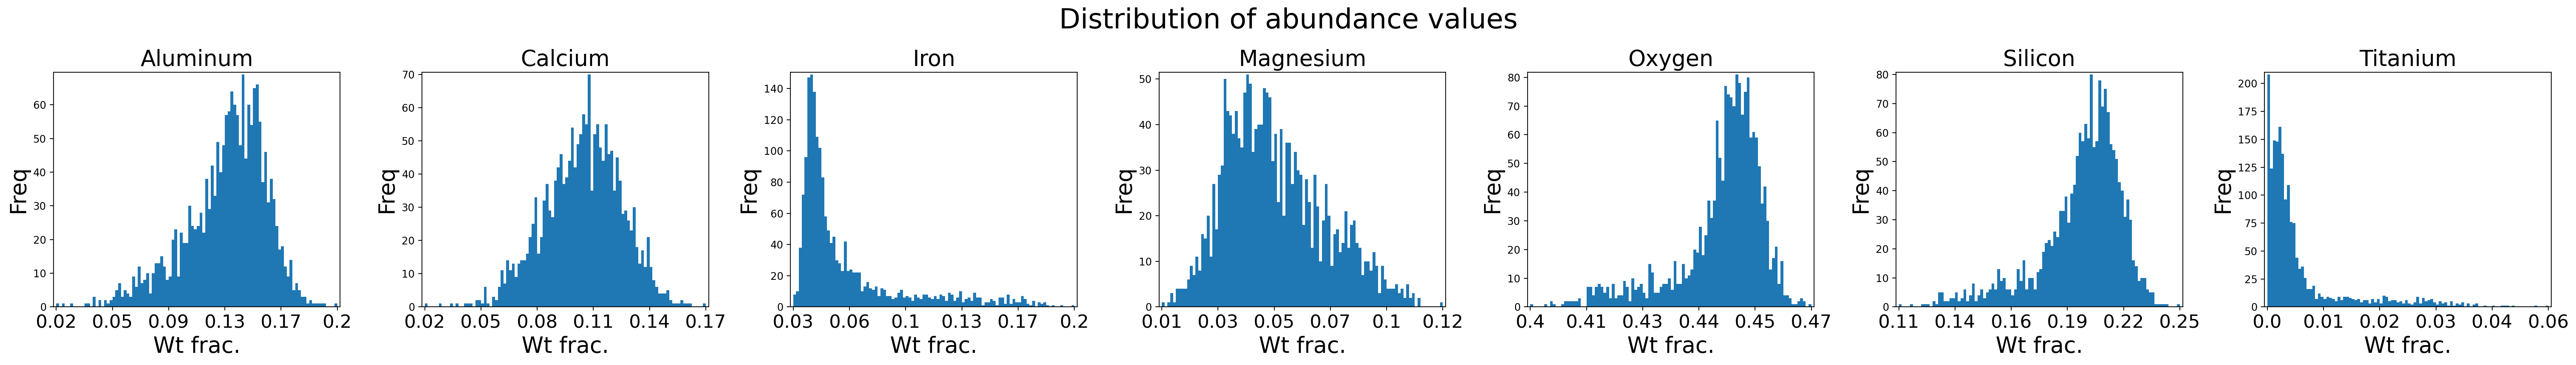

In [21]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

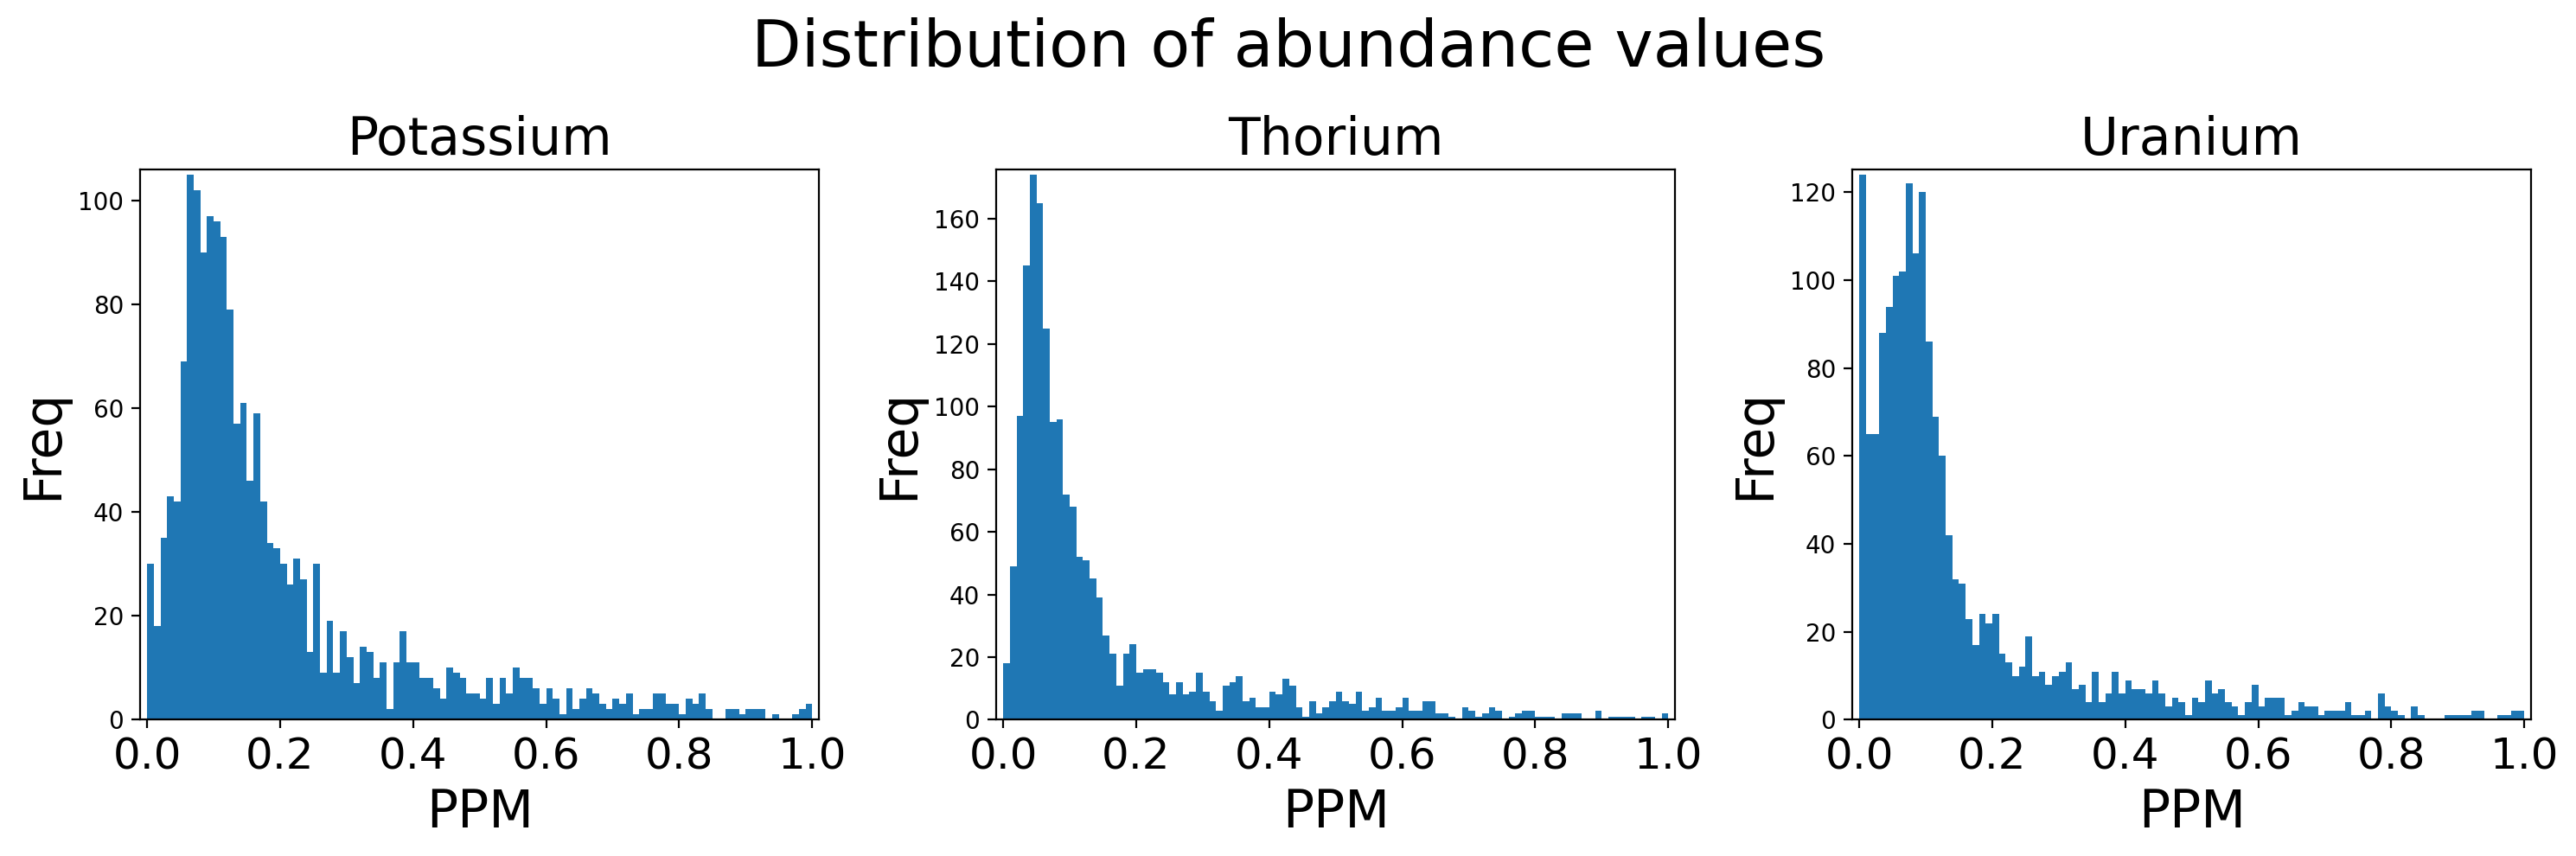

In [22]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

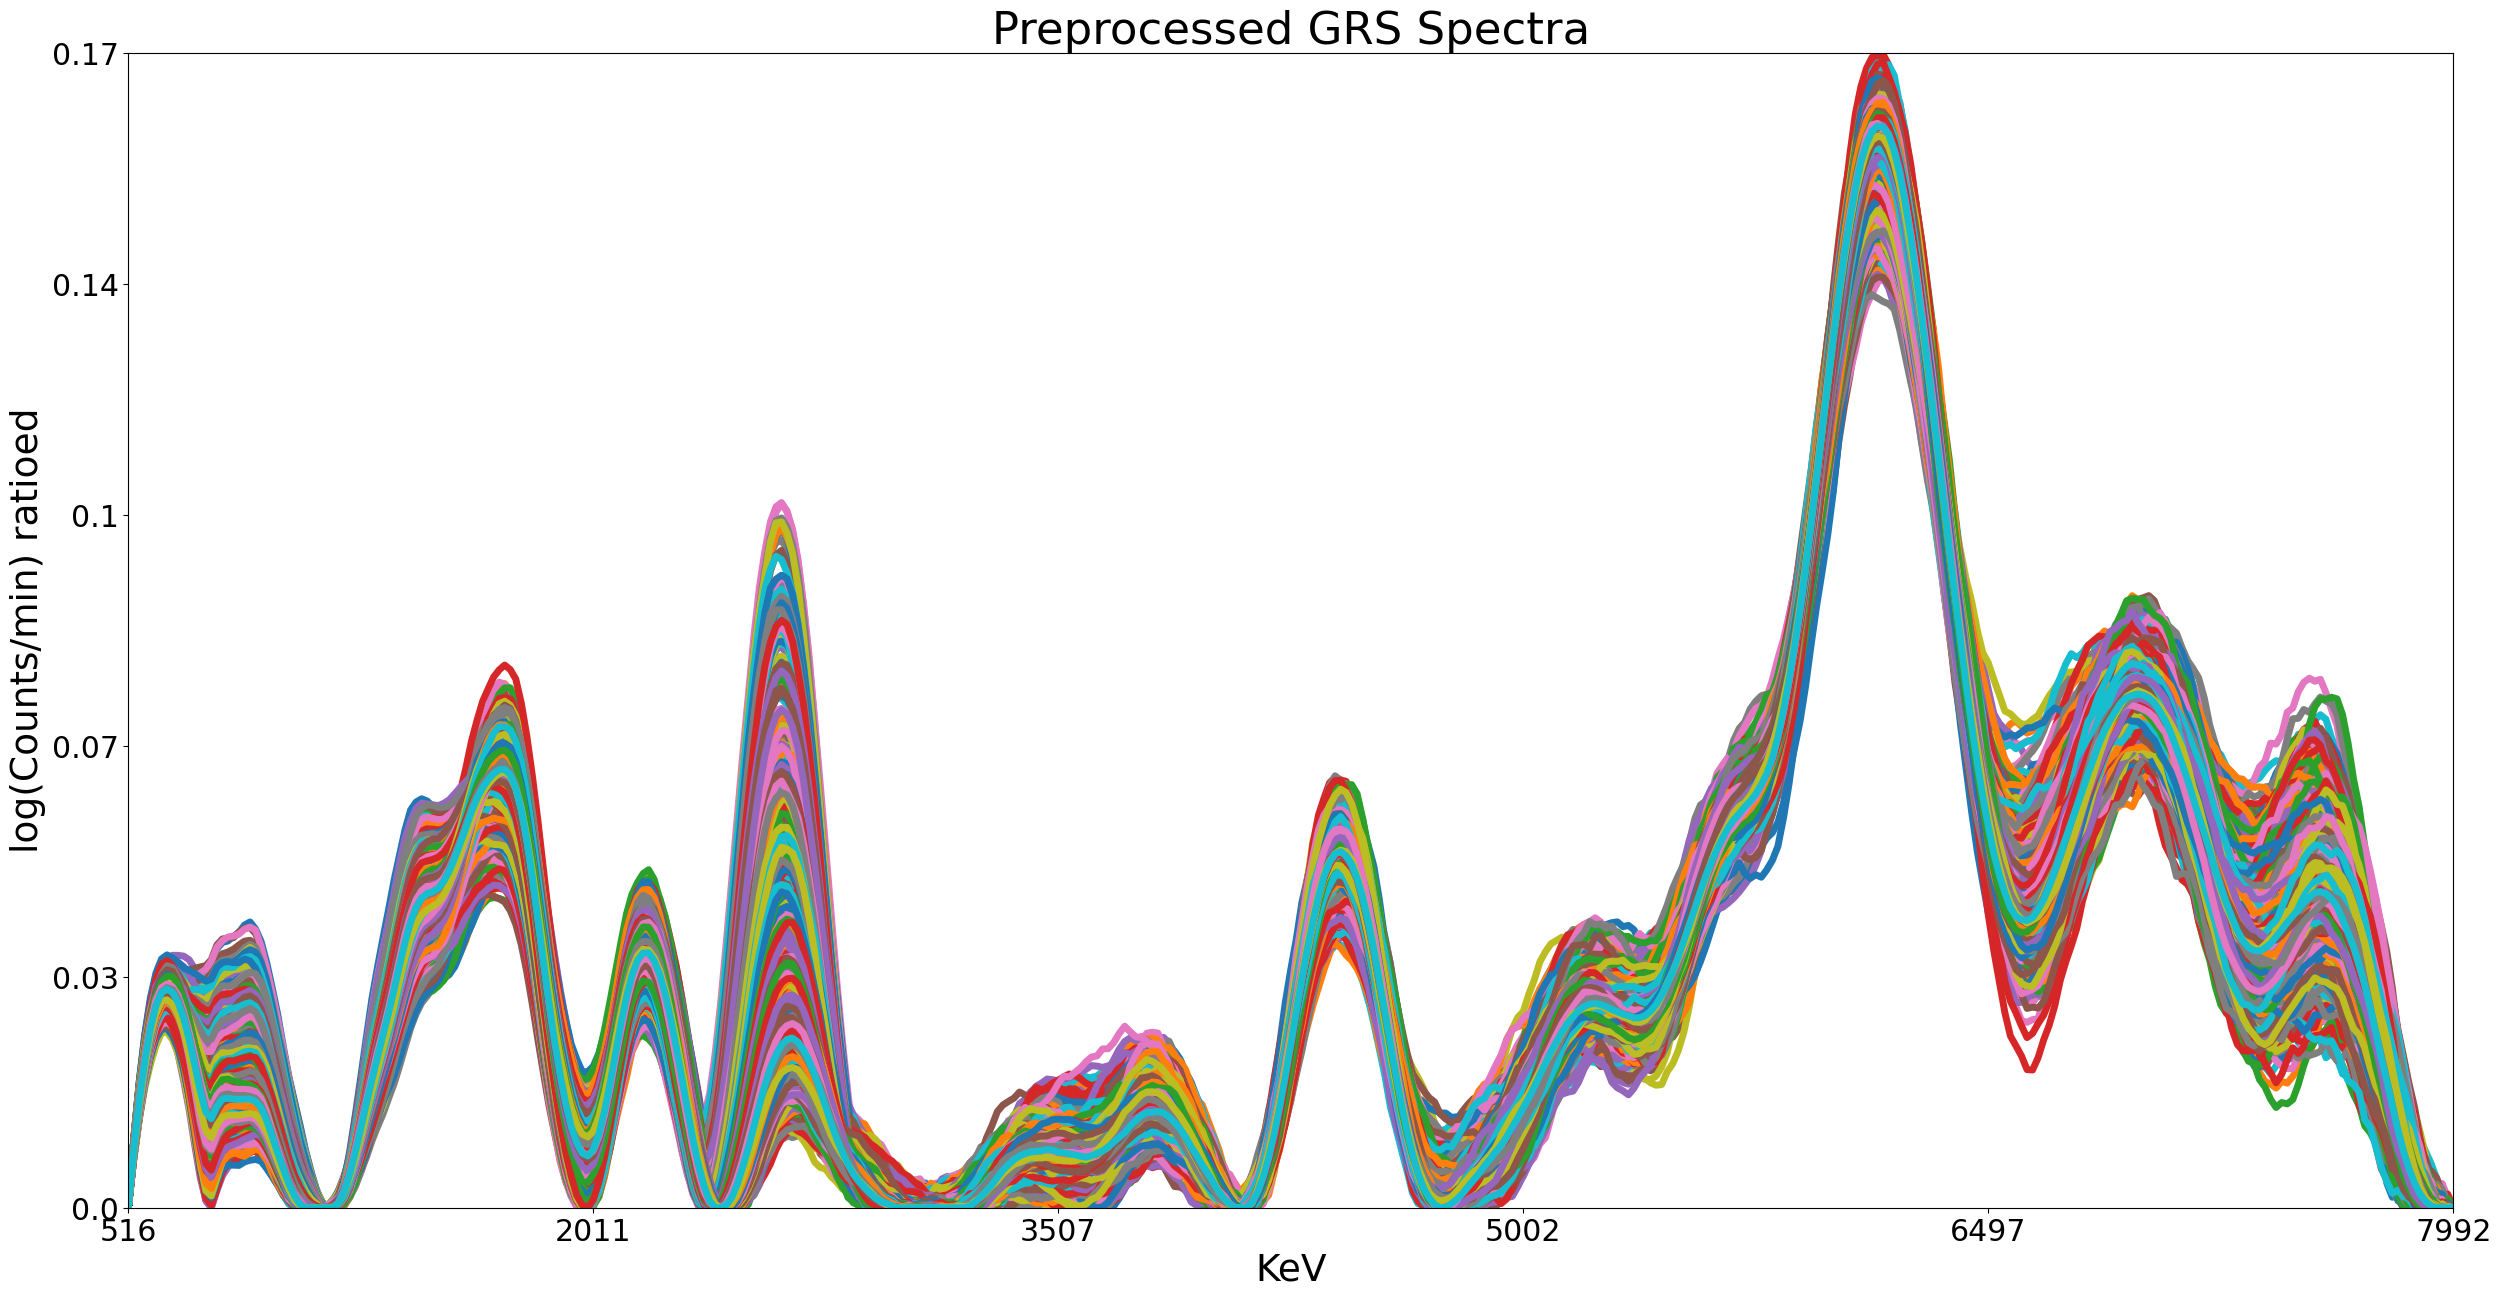

In [23]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [24]:
#import tensorflow
import tensorflow as tf

In [25]:
#set a global seed value
globalSeed=23

In [26]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]

In [27]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [28]:
# define a funtion which creates the CAM (Channel Attention Module)
def createCAM(inputFeatureBlock,reductionRatio):
    #perform max pooling along the channel dimension
    channelMaxPooledFeatures=tf.math.reduce_max(inputFeatureBlock,
                                                axis=1,
                                                keepdims=False)
    
    #perform avg pooling along the channel dimension
    channelAvgPooledFeatures=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=1,
                                                 keepdims=False)
    
    #create the bottleneck for the MLP
    bottleneckLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1]//reductionRatio,
                                          activation='relu')
    
    #create the recontruction layer for the MLP
    outputLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1],
                                      activation='relu')
    
    
    #pass the max pooled features through the bottle-neck
    reconstructeedMaxPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #pass the avg pooled features through the bottle-neck
    reconstructeedAvgPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #add the two reconstructed features together
    summedFeatures=tf.math.add(reconstructeedMaxPooledFeatures,
                               reconstructeedAvgPooledFeatures)
    
    #apply sigmoid activation to the summed features to get the channel attention map
    channelAttentionMap=tf.keras.activations.sigmoid(summedFeatures)
    
    #return the channel attention map
    return channelAttentionMap

In [29]:
#define a function to create the Spatial attention module (SAM)
def createSAM(inputFeatureBlock,kernelSize):
    #perform max pooling on the input features
    maxPooledFeatureMap=tf.math.reduce_max(inputFeatureBlock,
                                           axis=-1,
                                           keepdims=False)
    #perform average pooling on the input features
    averagePooledFeatureMap=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=-1,
                                                 keepdims=False)
    
    #concatenate the feature maps together
    concatenatedFeatureMaps=tf.concat([tf.expand_dims(maxPooledFeatureMap,
                                                      axis=-1),
                                       tf.expand_dims(averagePooledFeatureMap,
                                                      axis=-1)],
                                      axis=-1)
    
    #create the convolutional layer to be applied to the concatenated feature map
    convolutionLayer=tf.keras.layers.Conv1D(filters=1,
                                            kernel_size=kernelSize,
                                            strides=1,
                                            padding='same',
                                            activation='sigmoid')
    
    
    #get the spatial attention map
    spatialAttentionMap=convolutionLayer(concatenatedFeatureMaps)
    
    
    #return the channel attention map
    return spatialAttentionMap

In [30]:
#define a function which creates a CBAM block
def createCBAM(inputLayer,convolutionalKernelSize,noOfConvolutionalFilters,reductionRatio,spatialKernelSize):
    #create a convolutional layer
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfConvolutionalFilters,
                                              kernel_size=convolutionalKernelSize,
                                              strides=1,
                                              padding='same')
    #get the feature block from the convolutional layer
    convolutionalFeatures=convolutionalLayer(inputLayer)
    
    #get the channel attention map
    channelAttentionMap=createCAM(convolutionalFeatures,
                                  reductionRatio)
    
    #replicate the channel attention to make it multiplicative with the features
    replicatedChannelAttentionMaps=tf.expand_dims(channelAttentionMap,
                                                  axis=1)
    replicatedChannelAttentionMaps=tf.repeat(replicatedChannelAttentionMaps,
                                             convolutionalFeatures.shape[1],
                                             axis=1)
    
    #compute the channel refined feature by performing element-wise multiplication between the features and the channel attention maps
    channelRefinedFeatures=tf.math.multiply(replicatedChannelAttentionMaps,
                                            convolutionalFeatures)
    
    #get the spatial attention map
    spatialAttentionMap=createSAM(channelRefinedFeatures,
                                  spatialKernelSize)
    
    #replicate the attention map to make it multiplicative with the channel-refined features
    replicatedSpatialAttentionMaps=tf.repeat(spatialAttentionMap,
                                             channelRefinedFeatures.shape[-1],
                                             axis=-1)
    
    #multiply the attention map with the channel refined features
    spatiallyRefinedFeatures=tf.math.multiply(replicatedSpatialAttentionMaps,
                                              channelRefinedFeatures)
    
    
    #add the refined features to the original features
    refinedFeatures=tf.math.add(convolutionalFeatures,
                                spatiallyRefinedFeatures)
    
    #return the refined features (i.e. the output of the CBAM)
    return refinedFeatures

In [31]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, stride,, and dropout rate are specified
def createConvolutionalBlock(inputVolume,noOfFilters,kernelSize,strideSize,dropoutRate,noOfCBAMBLocks):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                                   kernel_size=kernelSize,
                                                   strides=strideSize,
                                                   padding='valid')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)

    #apply Relu activation
    preluActivation=tf.keras.layers.PReLU()
    #add the 1st activation layer to the graph
    volume=preluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)

    #apply dropout
    dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                         noise_shape=None,
                                         seed=globalSeed)
    #add the 1st dropout layer to the graph
    volume=dropoutLayer(volume)
    
    #add the specified number of CBAM blocks
    for i in range(noOfCBAMBLocks):
        #add the CBAM module
        volume=createCBAM(volume,
                          convolutionalKernelSize=kernelSize,
                          noOfConvolutionalFilters=noOfFilters,
                          reductionRatio=2,
                          spatialKernelSize=3)
        
        
        #apply batch norm over the refined features
        batchNormalization=tf.keras.layers.BatchNormalization()
        #add the 1st batch-norm layer to the graph
        volume=batchNormalization(volume)
        
        #apply dropout
        dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                             noise_shape=None,
                                             seed=globalSeed)
        #add the 1st dropout layer to the graph
        volume=dropoutLayer(volume)
    
    return volume

In [32]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[4,4,4,4]

In [33]:
#create a NN (Neural Network) graph containing just the input layer
regularElementFeatures=inputLayer
nuclearElementFeatures=inputLayer

In [34]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    regularElementFeatures=createConvolutionalBlock(regularElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i],
                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {regularElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [35]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [36]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [37]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[2,2,2,2]

In [38]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    nuclearElementFeatures=createConvolutionalBlock(nuclearElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i],
                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {nuclearElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [39]:
#Flatten the features for the nuclear elements
nuclearElementFeatures=tf.keras.layers.Flatten()(nuclearElementFeatures)
print(f"Shape of flattened features {nuclearElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [40]:
#get the regular elements' abundances from the generated features
#it consists of three steps
#1. Apply a dense layer with 7 nodes without any activation
#2. Compute the absolute value of the values computed by dense layer
#3. Compute the l1-norm of the 7 regular elements and and divide them by it


In [41]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes,name):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                        axis=-1,
                                        keepdims=True)
    sampleWiseSums=tf.repeat(sampleWiseSums,
                             sampleWiseSums.shape[-1],
                             axis=-1)
    return tf.math.divide(inputNodes,
                          sampleWiseSums+1e-10,
                          name=name)

In [42]:
#add a fully connected layer to the network (output layer)
regularElementStage1=tf.keras.layers.Dense(7,activation=None)(regularElementFeatures)
#compute absolute values
regularElementStage2=tf.math.abs(regularElementStage1)
#add a normalization layer to the network
regularAbundanceEmbedding=estimateAbundances(regularElementStage2,
                                             name="Regular_Abundances")


#print shape of abundances
print(f"Unscaled regular element shape {regularAbundanceEmbedding.shape}")


Unscaled regular element shape (None, 7)


In [43]:
#get the abundances for the nuclear elements from their features
nuclearElementStage1=tf.keras.layers.Dense(3,activation=None)(nuclearElementFeatures)
#compute absolute values
nuclearAbundanceEmbedding=tf.math.abs(nuclearElementStage1,name="Nuclear_Abundances")
#print shape of abundances
print(f"Unscaled regular element shape {nuclearAbundanceEmbedding.shape}")

Unscaled regular element shape (None, 3)


In [44]:
#concattenate the two abundances
fullAbundanceEmbedding=tf.concat([regularAbundanceEmbedding,nuclearAbundanceEmbedding],
                                 axis=-1)

print(f"All element shape {fullAbundanceEmbedding.shape}")

All element shape (None, 10)


In [45]:
#define regularization for the element-wise spectra
#the regularizer encourages the elemental spectra to be different
#this is done by computing the pairwise cosine distances, summing them up and maximizing this sum

#as these weights are from seperate (parallel)layers this regularization could not be implemented as inheriting the kernel regularization class
#therefore it is implemented as a loss. As such it recieves the true and predicted values but ignores them
class spectralDisimilarityRegularization(tf.keras.losses.Loss):
    def call(self,linearLayerWeights,_):
        #normalize the weights
        linearLayerWeights=tf.math.l2_normalize(linearLayerWeights,
                                                axis=-2,
                                                epsilon=1e-1)

        #multiply the weights by their transpose to get the dot products (provided the weight vectors have an l2-norm of 1)
        #sum the dot products up to get a value proportional to the sum of pairwise dot products
        unmixingSpectralSimilarity=tf.math.reduce_sum(tf.linalg.matmul(linearLayerWeights,
                                                                       linearLayerWeights,
                                                                       transpose_b=True))
        #compute sum of cosine similarities by subtracting the number of sames from the data and then dividing by half
        unmixingSpectralSimilarity=(unmixingSpectralSimilarity-linearLayerWeights.shape[-1])/2

        #return the similarity estimate which is the regularization value
        return unmixingSpectralSimilarity
    

In [46]:
#create a composite constraint to be applied to the weights of the hidden layers which are the weights
class UnitNormNonNegetivityConstraint(tf.keras.constraints.Constraint):
    def __init__(self,axis=0):
        self.axis=axis
    def __call__(self, w):
        #apply positivity constraint
        w=w*tf.cast(tf.greater_equal(w,0.0),
                    tf.keras.backend.floatx())
        
        return w



#create the composite constraint by combining the two constraints
unitNormNonNegetivityConstraint=UnitNormNonNegetivityConstraint()

In [47]:
#create an input layer which consists of the number one, it will be used to get the learnt spectra
unitNodeLayer=tf.keras.Input(shape=(1))

In [48]:
#create the linear hidden layer as a combination of ten hidden layers each connected to a single abundance value
elementWiseHiddenLayers=[]
abundanceScaledElementalSpectra=[]
#create a list to hold the unscaled elemental spectra
unscaledElementalSpectra=[]
#create a list to hold the unscaled elemental spectra
unscaledElementalSpectra=[]
#iterate through each element
for i in range(fullAbundanceEmbedding.shape[-1]):
    #create a contraintedhidden layer to learn the current element's spectra
    temp=tf.keras.layers.Dense(noOfChannels,
                               activation=None,
                               use_bias=False,
                               kernel_constraint=unitNormNonNegetivityConstraint,
                               name=allElementNames[i]+"_Spectra")
    
    
    #save the layer to a list
    elementWiseHiddenLayers.append(temp)
    
    
    #multiply the layer by a the estimated abundance to scale the spectra by the abundance
    temp1=temp(tf.expand_dims(fullAbundanceEmbedding[:,i],
                             -1))
    #save the learnt spectra scaled by the abundance
    abundanceScaledElementalSpectra.append(temp1)
    
    
    #multiply the layer by a the estimated abundance to scale the spectra by the abundance
    temp2=temp(unitNodeLayer)
    #save the learnt spectra
    unscaledElementalSpectra.append(temp2)
    
    #delete the temporary variable
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {abundanceScaledElementalSpectra[-1].shape}")


Shape of the spectra outputed by Aluminum (None, 421)
Shape of the spectra outputed by Calcium (None, 421)
Shape of the spectra outputed by Iron (None, 421)
Shape of the spectra outputed by Magnesium (None, 421)
Shape of the spectra outputed by Oxygen (None, 421)
Shape of the spectra outputed by Silicon (None, 421)
Shape of the spectra outputed by Titanium (None, 421)
Shape of the spectra outputed by Potassium (None, 421)
Shape of the spectra outputed by Thorium (None, 421)
Shape of the spectra outputed by Uranium (None, 421)


In [49]:
#stack the abundance scaled elemental spectra together
abundanceScaledElementalSpectraStack=tf.stack(abundanceScaledElementalSpectra,axis=-1)
print(f"Shape of tensor containing all ten elemental spectra scaled by abundance {abundanceScaledElementalSpectraStack.shape}")

Shape of tensor containing all ten elemental spectra scaled by abundance (None, 421, 10)


In [50]:
#stack the abundance scaled elemental spectra together
unscaledElementalSpectraStack=tf.stack(unscaledElementalSpectra,axis=-1)
print(f"Shape of tensor containing all ten elemental spectra {abundanceScaledElementalSpectraStack.shape}")

Shape of tensor containing all ten elemental spectra (None, 421, 10)


In [51]:
#add the element wise spectra
linearMixedSpectra=tf.keras.backend.sum(abundanceScaledElementalSpectraStack,
                                        axis=-1,
                                        keepdims=True)
print(f"Shape of the linearly mixed spectra {linearMixedSpectra.shape}")

Shape of the linearly mixed spectra (None, 421, 1)


In [52]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[64,64,64,64]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[3,3,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[1,1,1,1]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[2,2,2,2]

In [53]:
nuclearElementFeatures=linearMixedSpectra
#add Convolutional blocks to create the feature extractor for the non-linear part of the decoder
for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    recontructionFeatures=createConvolutionalBlock(nuclearElementFeatures,
                                                   noOfChannelsInEachConvBlock[i],
                                                   filterSizesForEachConvBlock[i],
                                                   strideSizesForEachConvBlock[i],
                                                   dropoutForEachConvBlock[i],
                                                   attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the {i}th Conv. Block {nuclearElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 421, 1)
Shape of the tensor outputted by the 1th Conv. Block (None, 421, 1)
Shape of the tensor outputted by the 2th Conv. Block (None, 421, 1)
Shape of the tensor outputted by the 3th Conv. Block (None, 421, 1)


In [54]:
#Flatten the features for the non-linearly reconstructed spectra
recontructionFeatures=tf.keras.layers.Flatten()(recontructionFeatures)
print(f"Shape of flattened features {recontructionFeatures.shape}")

Shape of flattened features (None, 26816)


In [55]:
#get the reconstructed spectra
reconstructedSpectra=tf.keras.layers.Dense(preprocessedSpectra.shape[1],activation='relu')(recontructionFeatures)

#print shape of abundances
print(f"Unscaled regular element shape {reconstructedSpectra.shape}")

Unscaled regular element shape (None, 421)


In [56]:
#build the model
unmixingModel=tf.keras.Model(inputs=[inputLayer,
                                     unitNodeLayer],
                             outputs=[regularAbundanceEmbedding,
                                      nuclearAbundanceEmbedding,
                                      reconstructedSpectra,
                                      unscaledElementalSpectraStack],
                             name="Attention_Based_Regularized_Constrained_Dual_Encoder_Unmxing_Model")

In [57]:
#create loss functions for the embeddings, Mean Squared Error
regularAbundanceLossFunction=tf.keras.losses.MeanSquaredError()
nuclearAbundanceLossFunction=tf.keras.losses.MeanSquaredError()
#create the loss function for the reconstructed spectra, Cosine loss
recontructedSpectraLoss=tf.keras.losses.CosineSimilarity()
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
#set the number of epochs the model is to be trained for
noOfEpochs=2000
#set the batch size
batchSize=16

#create the regularizer
spectralDisimilarityRegularizer=spectralDisimilarityRegularization()

#steps the number of steps to be processed in one execution
stepsPerExecution=60

In [58]:
#create a loss dictionary
lossDictionary=[regularAbundanceLossFunction,
                nuclearAbundanceLossFunction,
                recontructedSpectraLoss,
                spectralDisimilarityRegularizer]

In [59]:
#creat a list with loss weights
lossWeights=[25e-2,
             1,
             1e-3,
             1e-2]

In [60]:
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=lossDictionary,
                      loss_weights=lossWeights,
                      steps_per_execution=stepsPerExecution)

In [61]:
#summarize the model
unmixingModel.summary()

Model: "Attention_Based_Regularized_Constrained_Dual_Encoder_Unmxing_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 421, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 139, 128)     1024        ['input_1[0][0]']                
                                                                                                  
 p_re_lu (PReLU)                (None, 139, 128)     17792       ['conv1d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 139, 128)    512         ['p_re_lu[0][0]']                
 alization)                      

                                                                                                  
 tf.repeat_2 (TFOpLambda)       (None, 139, 128)     0           ['tf.expand_dims_3[0][0]']       
                                                                                                  
 tf.math.multiply_2 (TFOpLambda  (None, 139, 128)    0           ['tf.repeat_2[0][0]',            
 )                                                                'conv1d_3[0][0]']               
                                                                                                  
 tf.math.reduce_max_3 (TFOpLamb  (None, 139)         0           ['tf.math.multiply_2[0][0]']     
 da)                                                                                              
                                                                                                  
 tf.math.reduce_mean_3 (TFOpLam  (None, 139)         0           ['tf.math.multiply_2[0][0]']     
 bda)     

 dropout_3 (Dropout)            (None, 139, 128)     0           ['batch_normalization_3[0][0]']  
                                                                                                  
 conv1d_7 (Conv1D)              (None, 139, 128)     114816      ['dropout_3[0][0]']              
                                                                                                  
 tf.math.reduce_max_6 (TFOpLamb  (None, 128)         0           ['conv1d_7[0][0]']               
 da)                                                                                              
                                                                                                  
 dense_6 (Dense)                (None, 64)           8256        ['tf.math.reduce_max_6[0][0]',   
                                                                  'tf.math.reduce_max_6[0][0]']   
                                                                                                  
 dense_7 (

 )                                                                'conv1d_10[0][0]']              
                                                                                                  
 tf.math.reduce_max_9 (TFOpLamb  (None, 45)          0           ['tf.math.multiply_8[0][0]']     
 da)                                                                                              
                                                                                                  
 tf.math.reduce_mean_9 (TFOpLam  (None, 45)          0           ['tf.math.multiply_8[0][0]']     
 bda)                                                                                             
                                                                                                  
 tf.expand_dims_13 (TFOpLambda)  (None, 45, 1)       0           ['tf.math.reduce_max_9[0][0]']   
                                                                                                  
 tf.expand

 tf.math.reduce_max_12 (TFOpLam  (None, 256)         0           ['conv1d_14[0][0]']              
 bda)                                                                                             
                                                                                                  
 dense_12 (Dense)               (None, 128)          32896       ['tf.math.reduce_max_12[0][0]',  
                                                                  'tf.math.reduce_max_12[0][0]']  
                                                                                                  
 dense_13 (Dense)               (None, 256)          33024       ['dense_12[0][0]',               
                                                                  'dense_12[1][0]']               
                                                                                                  
 tf.math.add_12 (TFOpLambda)    (None, 256)          0           ['dense_13[0][0]',               
          

                                                                  'tf.expand_dims_23[0][0]']      
                                                                                                  
 conv1d_17 (Conv1D)             (None, 45, 1)        7           ['tf.concat_7[0][0]']            
                                                                                                  
 tf.repeat_15 (TFOpLambda)      (None, 45, 256)      0           ['conv1d_17[0][0]']              
                                                                                                  
 tf.math.multiply_15 (TFOpLambd  (None, 45, 256)     0           ['tf.repeat_15[0][0]',           
 a)                                                               'tf.math.multiply_14[0][0]']    
                                                                                                  
 tf.math.add_15 (TFOpLambda)    (None, 45, 256)      0           ['conv1d_16[0][0]',              
          

 tf.repeat_16 (TFOpLambda)      (None, 22, 512)      0           ['tf.expand_dims_24[0][0]']      
                                                                                                  
 tf.expand_dims_49 (TFOpLambda)  (None, 139, 1)      0           ['tf.math.reduce_max_33[0][0]']  
                                                                                                  
 tf.expand_dims_50 (TFOpLambda)  (None, 139, 1)      0           ['tf.math.reduce_mean_33[0][0]'] 
                                                                                                  
 tf.math.multiply_16 (TFOpLambd  (None, 22, 512)     0           ['tf.repeat_16[0][0]',           
 a)                                                               'conv1d_19[0][0]']              
                                                                                                  
 tf.concat_16 (TFOpLambda)      (None, 139, 2)       0           ['tf.expand_dims_49[0][0]',      
          

 tf.expand_dims_51 (TFOpLambda)  (None, 1, 128)      0           ['tf.math.sigmoid_17[0][0]']     
                                                                                                  
 tf.math.add_18 (TFOpLambda)    (None, 512)          0           ['dense_19[0][0]',               
                                                                  'dense_19[1][0]']               
                                                                                                  
 tf.repeat_34 (TFOpLambda)      (None, 139, 128)     0           ['tf.expand_dims_51[0][0]']      
                                                                                                  
 tf.math.sigmoid_9 (TFOpLambda)  (None, 512)         0           ['tf.math.add_18[0][0]']         
                                                                                                  
 tf.math.multiply_34 (TFOpLambd  (None, 139, 128)    0           ['tf.repeat_34[0][0]',           
 a)       

                                                                                                  
 dropout_23 (Dropout)           (None, 45, 256)      0           ['batch_normalization_23[0][0]'] 
                                                                                                  
 tf.math.reduce_max_20 (TFOpLam  (None, 512)         0           ['conv1d_23[0][0]']              
 bda)                                                                                             
                                                                                                  
 conv1d_42 (Conv1D)             (None, 45, 256)      327936      ['dropout_23[0][0]']             
                                                                                                  
 dense_20 (Dense)               (None, 256)          131328      ['tf.math.reduce_max_20[0][0]',  
                                                                  'tf.math.reduce_max_20[0][0]']  
          

                                                                                                  
 tf.repeat_37 (TFOpLambda)      (None, 45, 256)      0           ['conv1d_43[0][0]']              
                                                                                                  
 tf.math.add_21 (TFOpLambda)    (None, 22, 512)      0           ['conv1d_23[0][0]',              
                                                                  'tf.math.multiply_21[0][0]']    
                                                                                                  
 tf.math.multiply_37 (TFOpLambd  (None, 45, 256)     0           ['tf.repeat_37[0][0]',           
 a)                                                               'tf.math.multiply_36[0][0]']    
                                                                                                  
 batch_normalization_13 (BatchN  (None, 22, 512)     2048        ['tf.math.add_21[0][0]']         
 ormalizat

 tf.math.reduce_mean_39 (TFOpLa  (None, 45)          0           ['tf.math.multiply_38[0][0]']    
 mbda)                                                                                            
                                                                                                  
 tf.concat_11 (TFOpLambda)      (None, 22, 2)        0           ['tf.expand_dims_34[0][0]',      
                                                                  'tf.expand_dims_35[0][0]']      
                                                                                                  
 tf.expand_dims_58 (TFOpLambda)  (None, 45, 1)       0           ['tf.math.reduce_max_39[0][0]']  
                                                                                                  
 tf.expand_dims_59 (TFOpLambda)  (None, 45, 1)       0           ['tf.math.reduce_mean_39[0][0]'] 
                                                                                                  
 conv1d_26

 dense_41 (Dense)               (None, 512)          131584      ['dense_40[0][0]',               
                                                                  'dense_40[1][0]']               
                                                                                                  
 tf.math.sigmoid_12 (TFOpLambda  (None, 1024)        0           ['tf.math.add_24[0][0]']         
 )                                                                                                
                                                                                                  
 tf.math.add_40 (TFOpLambda)    (None, 512)          0           ['dense_41[0][0]',               
                                                                  'dense_41[1][0]']               
                                                                                                  
 tf.expand_dims_36 (TFOpLambda)  (None, 1, 1024)     0           ['tf.math.sigmoid_12[0][0]']     
          

                                                                                                  
 tf.math.reduce_max_26 (TFOpLam  (None, 1024)        0           ['conv1d_30[0][0]']              
 bda)                                                                                             
                                                                                                  
 conv1d_49 (Conv1D)             (None, 22, 512)      786944      ['dropout_27[0][0]']             
                                                                                                  
 dense_26 (Dense)               (None, 512)          524800      ['tf.math.reduce_max_26[0][0]',  
                                                                  'tf.math.reduce_max_26[0][0]']  
                                                                                                  
 tf.math.reduce_max_42 (TFOpLam  (None, 512)         0           ['conv1d_49[0][0]']              
 bda)     

                                                                                                  
 tf.math.add_27 (TFOpLambda)    (None, 10, 1024)     0           ['conv1d_30[0][0]',              
                                                                  'tf.math.multiply_27[0][0]']    
                                                                                                  
 tf.math.multiply_43 (TFOpLambd  (None, 22, 512)     0           ['tf.repeat_43[0][0]',           
 a)                                                               'tf.math.multiply_42[0][0]']    
                                                                                                  
 batch_normalization_17 (BatchN  (None, 10, 1024)    4096        ['tf.math.add_27[0][0]']         
 ormalization)                                                                                    
                                                                                                  
 tf.math.a

 tf.expand_dims_66 (TFOpLambda)  (None, 1, 1024)     0           ['tf.math.sigmoid_22[0][0]']     
                                                                                                  
 conv1d_33 (Conv1D)             (None, 10, 1)        7           ['tf.concat_14[0][0]']           
                                                                                                  
 tf.repeat_44 (TFOpLambda)      (None, 10, 1024)     0           ['tf.expand_dims_66[0][0]']      
                                                                                                  
 tf.repeat_29 (TFOpLambda)      (None, 10, 1024)     0           ['conv1d_33[0][0]']              
                                                                                                  
 tf.math.multiply_44 (TFOpLambd  (None, 10, 1024)    0           ['tf.repeat_44[0][0]',           
 a)                                                               'conv1d_52[0][0]']              
          

                                                                  'dense_46[1][0]']               
                                                                                                  
 tf.math.reduce_max_31 (TFOpLam  (None, 10)          0           ['tf.math.multiply_30[0][0]']    
 bda)                                                                                             
                                                                                                  
 tf.math.reduce_mean_31 (TFOpLa  (None, 10)          0           ['tf.math.multiply_30[0][0]']    
 mbda)                                                                                            
                                                                                                  
 tf.math.add_46 (TFOpLambda)    (None, 1024)         0           ['dense_47[0][0]',               
                                                                  'dense_47[1][0]']               
          

                                                                                                  
 flatten_2 (Flatten)            (None, 10240)        0           ['dropout_31[0][0]']             
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 1)           0           ['tf.repeat_48[0][0]']           
 da)                                                                                              
                                                                                                  
 dense_49 (Dense)               (None, 3)            30723       ['flatten_2[0][0]']              
                                                                                                  
 tf.math.divide (TFOpLambda)    (None, 7)            0           ['tf.math.abs[0][0]',            
                                                                  'tf.__operators__.add[0][0]']   
          

                                                                  'input_2[0][0]']                
                                                                                                  
 Magnesium_Spectra (Dense)      (None, 421)          421         ['tf.expand_dims_75[0][0]',      
                                                                  'input_2[0][0]']                
                                                                                                  
 Oxygen_Spectra (Dense)         (None, 421)          421         ['tf.expand_dims_76[0][0]',      
                                                                  'input_2[0][0]']                
                                                                                                  
 Silicon_Spectra (Dense)        (None, 421)          421         ['tf.expand_dims_77[0][0]',      
                                                                  'input_2[0][0]']                
          

 tf.concat_31 (TFOpLambda)      (None, 419, 2)       0           ['tf.expand_dims_101[0][0]',     
                                                                  'tf.expand_dims_102[0][0]']     
                                                                                                  
 conv1d_73 (Conv1D)             (None, 419, 1)       7           ['tf.concat_31[0][0]']           
                                                                                                  
 tf.repeat_62 (TFOpLambda)      (None, 419, 64)      0           ['conv1d_73[0][0]']              
                                                                                                  
 tf.math.multiply_61 (TFOpLambd  (None, 419, 64)     0           ['tf.repeat_62[0][0]',           
 a)                                                               'tf.math.multiply_60[0][0]']    
                                                                                                  
 tf.math.a

                                                                  'Oxygen_Spectra[1][0]',         
                                                                  'Silicon_Spectra[1][0]',        
                                                                  'Titanium_Spectra[1][0]',       
                                                                  'Potassium_Spectra[1][0]',      
                                                                  'Thorium_Spectra[1][0]',        
                                                                  'Uranium_Spectra[1][0]']        
                                                                                                  
Total params: 50,518,039
Trainable params: 50,486,935
Non-trainable params: 31,104
__________________________________________________________________________________________________


In [62]:
#set the address where the untrained model will be saved
untrainedModelWeightsAddress="C:/ML4Sci/Models/untrained_Attention_Based_Regularized_Constrainted_Dual_Unmixing_Post_Non_Linear_Model_With_PReLU_Weights.h5"
#untrainedModelWeightsAddress="D:/Non-academic/GSOC23/untrained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"

In [63]:
#save the untrained model
unmixingModel.save_weights(untrainedModelWeightsAddress,
                           overwrite=True)

In [64]:
#import KFold from sklearn, to be used for KFold validation
from sklearn.model_selection import KFold

In [65]:
#set the number of folds across which the model is to be evaluated
noOfFolds=5
#create a K-Fold splitter
splitter=KFold(n_splits=noOfFolds,
               shuffle=True,
               random_state=globalSeed)

In [66]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [67]:
noOfXticks=3
noOfYticks=5

In [68]:
#create a list to hold model training history
modelTrainingHistories=[]

In [69]:
#create an array to save the element-wise learnt spectra across folds
foldWiseLearntElementalSpectra=np.zeros((noOfChannels,
                                         fullAbundanceEmbedding.shape[-1],
                                         noOfFolds))

In [70]:
#create an array to hold foldwise outputs
foldWisePredictedRegularAbundances=np.zeros_like(regularElementalAbundances)
foldWisePredictedNuclearAbundaces=np.zeros_like(nuclearElementalAbundances)
foldWiseReconstructedSpectra=np.zeros_like(preprocessedSpectra)

In [71]:
#iterate through the folds
for j,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):

    #print that new fold has started
    print(f"Staritng fold {j+1}")
    #load the initial weights of the model (before training)
    unmixingModel.load_weights(untrainedModelWeightsAddress)
    #compile the model
    unmixingModel.compile(optimizer=optimizer,
                          loss=lossDictionary,
                          loss_weights=lossWeights,
                          steps_per_execution=stepsPerExecution)

    #fit the model to the current fold's data
    currentModelTrainingHistory=unmixingModel.fit(x=[preprocessedSpectra[trainingIndices,:],
                                                     np.ones(len(trainingIndices))
                                                    ],
                                                  y=[regularElementalAbundances[trainingIndices,:],
                                                     nuclearElementalAbundances[trainingIndices,:],
                                                     preprocessedSpectra[trainingIndices,:],
                                                     nuclearElementalAbundances[trainingIndices,:]
                                                    ],
                                                  batch_size=batchSize,
                                                  epochs=noOfEpochs,
                                                  validation_data=([preprocessedSpectra[testingIndices,:],
                                                                    np.ones(len(testingIndices))
                                                                   ],
                                                                   [regularElementalAbundances[testingIndices,:],
                                                                    nuclearElementalAbundances[testingIndices,:],
                                                                    preprocessedSpectra[testingIndices,:],
                                                                    nuclearElementalAbundances[testingIndices,:]
                                                                   ]
                                                                  ),
                                                  verbose=2
                                                 )
    
    #print that model history is being saved
    print(f"Saving model history, weights and learnt spectra")
    
    #save the training history of the current model
    modelTrainingHistories.append(currentModelTrainingHistory)
    
    #set the address where the untrained model will be saved
    #trainedModelWeightsAddress="D:/Non-academic/GSOC23/trained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"
    trainedModelWeightsAddress="C:/ML4Sci/Models/untrained_Attention_Based_Regularized_Constrainted_Dual_Unmixing_Post_Non_Linear_Model_With_PReLU_Weights_Fold_"+str(j+1)+".h5"

    #save the untrained model
    unmixingModel.save_weights(trainedModelWeightsAddress,
                               overwrite=True)
    
    #iterate through all the elements and save their learnt spectra
    for i in range(len(allElementNames)):

        #get the mean spectrum for the current element
        currentElementSpectrum=unmixingModel.get_layer(allElementNames[i]+"_Spectra").get_weights()[0][0]

        #save the spectrum
        foldWiseLearntElementalSpectra[:,i,j]=currentElementSpectrum
        
    #print that the predicted values are being saved
    print(f"Saving predicted values and spectra for test set")
        
    #predict the output values for the current fold
    predictedRegularAbundance,predictedNuclearAbundance,reconstructedTestSpectra,_=unmixingModel.predict([preprocessedSpectra[testingIndices,:],
                                                                                                          np.ones(len(testingIndices))
                                                                                                         ]
                                                                                                        )
    
    #save the predicted test values for the current fold
    foldWisePredictedRegularAbundances[testingIndices,:]=predictedRegularAbundance
    foldWisePredictedNuclearAbundaces[testingIndices,:]=predictedNuclearAbundance
    foldWiseReconstructedSpectra[testingIndices,:]=reconstructedTestSpectra

Staritng fold 1
Epoch 1/2000
90/90 - 75s - loss: 11.9774 - tf.math.divide_loss: 0.0014 - tf.math.abs_1_loss: 11.8684 - dense_66_loss: -9.6953e-01 - tf.stack_1_loss: 10.9627 - val_loss: 3.1257 - val_tf.math.divide_loss: 0.0439 - val_tf.math.abs_1_loss: 3.0001 - val_dense_66_loss: -9.8839e-01 - val_tf.stack_1_loss: 11.5630 - 75s/epoch - 833ms/step
Epoch 2/2000
90/90 - 21s - loss: 0.7575 - tf.math.divide_loss: 4.7784e-04 - tf.math.abs_1_loss: 0.6474 - dense_66_loss: -9.8828e-01 - tf.stack_1_loss: 11.0964 - val_loss: 0.1972 - val_tf.math.divide_loss: 0.0477 - val_tf.math.abs_1_loss: 0.0706 - val_dense_66_loss: -9.8874e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 230ms/step
Epoch 3/2000
90/90 - 20s - loss: 0.5679 - tf.math.divide_loss: 4.1532e-04 - tf.math.abs_1_loss: 0.4569 - dense_66_loss: -9.8906e-01 - tf.stack_1_loss: 11.1867 - val_loss: 0.2251 - val_tf.math.divide_loss: 0.0174 - val_tf.math.abs_1_loss: 0.1061 - val_dense_66_loss: -9.8966e-01 - val_tf.stack_1_loss: 11.5630 - 20s/epo

Epoch 26/2000
90/90 - 21s - loss: 0.2641 - tf.math.divide_loss: 1.6024e-04 - tf.math.abs_1_loss: 0.1492 - dense_66_loss: -9.9193e-01 - tf.stack_1_loss: 11.5825 - val_loss: 0.1666 - val_tf.math.divide_loss: 1.5921e-04 - val_tf.math.abs_1_loss: 0.0519 - val_dense_66_loss: -9.9208e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 235ms/step
Epoch 27/2000
90/90 - 22s - loss: 0.2256 - tf.math.divide_loss: 1.6591e-04 - tf.math.abs_1_loss: 0.1160 - dense_66_loss: -9.9186e-01 - tf.stack_1_loss: 11.0530 - val_loss: 0.1909 - val_tf.math.divide_loss: 1.8025e-04 - val_tf.math.abs_1_loss: 0.0762 - val_dense_66_loss: -9.9202e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 28/2000
90/90 - 22s - loss: 0.1989 - tf.math.divide_loss: 1.6611e-04 - tf.math.abs_1_loss: 0.0875 - dense_66_loss: -9.9183e-01 - tf.stack_1_loss: 11.2381 - val_loss: 0.1493 - val_tf.math.divide_loss: 1.4880e-04 - val_tf.math.abs_1_loss: 0.0346 - val_dense_66_loss: -9.9224e-01 - val_tf.stack_1_loss: 11.5630 - 22s/ep

Epoch 51/2000
90/90 - 31s - loss: 0.1587 - tf.math.divide_loss: 1.4289e-04 - tf.math.abs_1_loss: 0.0495 - dense_66_loss: -9.9300e-01 - tf.stack_1_loss: 11.0142 - val_loss: 0.1694 - val_tf.math.divide_loss: 1.2811e-04 - val_tf.math.abs_1_loss: 0.0548 - val_dense_66_loss: -9.9315e-01 - val_tf.stack_1_loss: 11.5630 - 31s/epoch - 347ms/step
Epoch 52/2000
90/90 - 26s - loss: 0.1750 - tf.math.divide_loss: 1.4732e-04 - tf.math.abs_1_loss: 0.0666 - dense_66_loss: -9.9294e-01 - tf.stack_1_loss: 10.9368 - val_loss: 0.1398 - val_tf.math.divide_loss: 1.6073e-04 - val_tf.math.abs_1_loss: 0.0251 - val_dense_66_loss: -9.9283e-01 - val_tf.stack_1_loss: 11.5630 - 26s/epoch - 288ms/step
Epoch 53/2000
90/90 - 22s - loss: 0.1558 - tf.math.divide_loss: 1.3939e-04 - tf.math.abs_1_loss: 0.0462 - dense_66_loss: -9.9299e-01 - tf.stack_1_loss: 11.0531 - val_loss: 0.1421 - val_tf.math.divide_loss: 1.2922e-04 - val_tf.math.abs_1_loss: 0.0275 - val_dense_66_loss: -9.9316e-01 - val_tf.stack_1_loss: 11.5630 - 22s/ep

Epoch 76/2000
90/90 - 23s - loss: 0.2462 - tf.math.divide_loss: 1.3717e-04 - tf.math.abs_1_loss: 0.1374 - dense_66_loss: -9.9324e-01 - tf.stack_1_loss: 10.9716 - val_loss: 0.1572 - val_tf.math.divide_loss: 1.3482e-04 - val_tf.math.abs_1_loss: 0.0426 - val_dense_66_loss: -9.9331e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 250ms/step
Epoch 77/2000
90/90 - 22s - loss: 0.2917 - tf.math.divide_loss: 1.3510e-04 - tf.math.abs_1_loss: 0.1823 - dense_66_loss: -9.9317e-01 - tf.stack_1_loss: 11.0365 - val_loss: 0.7187 - val_tf.math.divide_loss: 1.2679e-04 - val_tf.math.abs_1_loss: 0.6040 - val_dense_66_loss: -9.9329e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 78/2000
90/90 - 23s - loss: 0.3096 - tf.math.divide_loss: 1.3293e-04 - tf.math.abs_1_loss: 0.2002 - dense_66_loss: -9.9313e-01 - tf.stack_1_loss: 11.0325 - val_loss: 1.9669 - val_tf.math.divide_loss: 1.4024e-04 - val_tf.math.abs_1_loss: 1.8522 - val_dense_66_loss: -9.9211e-01 - val_tf.stack_1_loss: 11.5630 - 23s/ep

Epoch 101/2000
90/90 - 22s - loss: 0.1870 - tf.math.divide_loss: 1.2656e-04 - tf.math.abs_1_loss: 0.0734 - dense_66_loss: -9.9322e-01 - tf.stack_1_loss: 11.4515 - val_loss: 0.1799 - val_tf.math.divide_loss: 1.2500e-04 - val_tf.math.abs_1_loss: 0.0653 - val_dense_66_loss: -9.9337e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 244ms/step
Epoch 102/2000
90/90 - 22s - loss: 0.1821 - tf.math.divide_loss: 1.2996e-04 - tf.math.abs_1_loss: 0.0711 - dense_66_loss: -9.9322e-01 - tf.stack_1_loss: 11.1963 - val_loss: 0.1402 - val_tf.math.divide_loss: 1.4543e-04 - val_tf.math.abs_1_loss: 0.0255 - val_dense_66_loss: -9.9326e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 241ms/step
Epoch 103/2000
90/90 - 22s - loss: 0.1727 - tf.math.divide_loss: 1.2702e-04 - tf.math.abs_1_loss: 0.0650 - dense_66_loss: -9.9329e-01 - tf.stack_1_loss: 10.8653 - val_loss: 0.1259 - val_tf.math.divide_loss: 1.4548e-04 - val_tf.math.abs_1_loss: 0.0112 - val_dense_66_loss: -9.9314e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 126/2000
90/90 - 22s - loss: 0.1654 - tf.math.divide_loss: 1.2016e-04 - tf.math.abs_1_loss: 0.0553 - dense_66_loss: -9.9336e-01 - tf.stack_1_loss: 11.1108 - val_loss: 0.1347 - val_tf.math.divide_loss: 1.2652e-04 - val_tf.math.abs_1_loss: 0.0201 - val_dense_66_loss: -9.9342e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 243ms/step
Epoch 127/2000
90/90 - 22s - loss: 0.1684 - tf.math.divide_loss: 1.2210e-04 - tf.math.abs_1_loss: 0.0536 - dense_66_loss: -9.9333e-01 - tf.stack_1_loss: 11.5799 - val_loss: 0.1649 - val_tf.math.divide_loss: 1.2034e-04 - val_tf.math.abs_1_loss: 0.0503 - val_dense_66_loss: -9.9340e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 128/2000
90/90 - 22s - loss: 0.1847 - tf.math.divide_loss: 1.1806e-04 - tf.math.abs_1_loss: 0.0757 - dense_66_loss: -9.9340e-01 - tf.stack_1_loss: 10.9956 - val_loss: 0.1517 - val_tf.math.divide_loss: 1.2268e-04 - val_tf.math.abs_1_loss: 0.0370 - val_dense_66_loss: -9.9352e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 151/2000
90/90 - 22s - loss: 0.1527 - tf.math.divide_loss: 1.1181e-04 - tf.math.abs_1_loss: 0.0407 - dense_66_loss: -9.9346e-01 - tf.stack_1_loss: 11.2898 - val_loss: 0.2257 - val_tf.math.divide_loss: 1.1654e-04 - val_tf.math.abs_1_loss: 0.1110 - val_dense_66_loss: -9.9358e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246ms/step
Epoch 152/2000
90/90 - 22s - loss: 0.1437 - tf.math.divide_loss: 1.1333e-04 - tf.math.abs_1_loss: 0.0342 - dense_66_loss: -9.9349e-01 - tf.stack_1_loss: 11.0499 - val_loss: 0.1454 - val_tf.math.divide_loss: 1.2005e-04 - val_tf.math.abs_1_loss: 0.0307 - val_dense_66_loss: -9.9343e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 241ms/step
Epoch 153/2000
90/90 - 22s - loss: 0.1535 - tf.math.divide_loss: 1.1698e-04 - tf.math.abs_1_loss: 0.0437 - dense_66_loss: -9.9345e-01 - tf.stack_1_loss: 11.0713 - val_loss: 0.2803 - val_tf.math.divide_loss: 1.2309e-04 - val_tf.math.abs_1_loss: 0.1656 - val_dense_66_loss: -9.9342e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 176/2000
90/90 - 21s - loss: 0.1450 - tf.math.divide_loss: 1.0956e-04 - tf.math.abs_1_loss: 0.0340 - dense_66_loss: -9.9362e-01 - tf.stack_1_loss: 11.2027 - val_loss: 0.2738 - val_tf.math.divide_loss: 1.1148e-04 - val_tf.math.abs_1_loss: 0.1591 - val_dense_66_loss: -9.9348e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 238ms/step
Epoch 177/2000
90/90 - 22s - loss: 0.1485 - tf.math.divide_loss: 1.1009e-04 - tf.math.abs_1_loss: 0.0338 - dense_66_loss: -9.9362e-01 - tf.stack_1_loss: 11.5649 - val_loss: 0.1326 - val_tf.math.divide_loss: 1.3099e-04 - val_tf.math.abs_1_loss: 0.0179 - val_dense_66_loss: -9.9357e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 248ms/step
Epoch 178/2000
90/90 - 22s - loss: 0.1389 - tf.math.divide_loss: 1.0657e-04 - tf.math.abs_1_loss: 0.0286 - dense_66_loss: -9.9361e-01 - tf.stack_1_loss: 11.1264 - val_loss: 0.1390 - val_tf.math.divide_loss: 1.1615e-04 - val_tf.math.abs_1_loss: 0.0243 - val_dense_66_loss: -9.9370e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 201/2000
90/90 - 22s - loss: 0.1149 - tf.math.divide_loss: 1.0280e-04 - tf.math.abs_1_loss: 0.0038 - dense_66_loss: -9.9387e-01 - tf.stack_1_loss: 11.2065 - val_loss: 0.1187 - val_tf.math.divide_loss: 1.1242e-04 - val_tf.math.abs_1_loss: 0.0040 - val_dense_66_loss: -9.9401e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 240ms/step
Epoch 202/2000
90/90 - 22s - loss: 0.1139 - tf.math.divide_loss: 1.0448e-04 - tf.math.abs_1_loss: 0.0039 - dense_66_loss: -9.9393e-01 - tf.stack_1_loss: 11.1036 - val_loss: 0.1167 - val_tf.math.divide_loss: 1.1372e-04 - val_tf.math.abs_1_loss: 0.0021 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 248ms/step
Epoch 203/2000
90/90 - 24s - loss: 0.1155 - tf.math.divide_loss: 1.0518e-04 - tf.math.abs_1_loss: 0.0046 - dense_66_loss: -9.9392e-01 - tf.stack_1_loss: 11.1848 - val_loss: 0.1180 - val_tf.math.divide_loss: 1.1631e-04 - val_tf.math.abs_1_loss: 0.0034 - val_dense_66_loss: -9.9406e-01 - val_tf.stack_1_loss: 11.5630 - 24s

Epoch 226/2000
90/90 - 21s - loss: 0.1137 - tf.math.divide_loss: 9.8857e-05 - tf.math.abs_1_loss: 0.0033 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 11.1407 - val_loss: 0.1168 - val_tf.math.divide_loss: 1.2076e-04 - val_tf.math.abs_1_loss: 0.0021 - val_dense_66_loss: -9.9398e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 236ms/step
Epoch 227/2000
90/90 - 22s - loss: 0.1136 - tf.math.divide_loss: 9.9955e-05 - tf.math.abs_1_loss: 0.0032 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 11.1333 - val_loss: 0.1237 - val_tf.math.divide_loss: 1.1730e-04 - val_tf.math.abs_1_loss: 0.0090 - val_dense_66_loss: -9.9369e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 243ms/step
Epoch 228/2000
90/90 - 22s - loss: 0.1168 - tf.math.divide_loss: 1.0212e-04 - tf.math.abs_1_loss: 0.0048 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 11.2910 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1957e-04 - val_tf.math.abs_1_loss: 0.0025 - val_dense_66_loss: -9.9391e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 251/2000
90/90 - 22s - loss: 0.1152 - tf.math.divide_loss: 9.6062e-05 - tf.math.abs_1_loss: 0.0023 - dense_66_loss: -9.9407e-01 - tf.stack_1_loss: 11.3864 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.1683e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9413e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 244ms/step
Epoch 252/2000
90/90 - 22s - loss: 0.1134 - tf.math.divide_loss: 9.3597e-05 - tf.math.abs_1_loss: 0.0022 - dense_66_loss: -9.9406e-01 - tf.stack_1_loss: 11.2120 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2079e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9410e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 241ms/step
Epoch 253/2000
90/90 - 22s - loss: 0.1137 - tf.math.divide_loss: 9.7560e-05 - tf.math.abs_1_loss: 0.0020 - dense_66_loss: -9.9404e-01 - tf.stack_1_loss: 11.2645 - val_loss: 0.1178 - val_tf.math.divide_loss: 1.1648e-04 - val_tf.math.abs_1_loss: 0.0031 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 276/2000
90/90 - 22s - loss: 0.1127 - tf.math.divide_loss: 9.2979e-05 - tf.math.abs_1_loss: 0.0020 - dense_66_loss: -9.9450e-01 - tf.stack_1_loss: 11.1673 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.2312e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9442e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 239ms/step
Epoch 277/2000
90/90 - 22s - loss: 0.1104 - tf.math.divide_loss: 8.9009e-05 - tf.math.abs_1_loss: 0.0020 - dense_66_loss: -9.9452e-01 - tf.stack_1_loss: 10.9360 - val_loss: 0.1184 - val_tf.math.divide_loss: 1.1399e-04 - val_tf.math.abs_1_loss: 0.0037 - val_dense_66_loss: -9.9443e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 239ms/step
Epoch 278/2000
90/90 - 22s - loss: 0.1116 - tf.math.divide_loss: 9.1973e-05 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9454e-01 - tf.stack_1_loss: 11.0622 - val_loss: 0.1167 - val_tf.math.divide_loss: 1.2219e-04 - val_tf.math.abs_1_loss: 0.0020 - val_dense_66_loss: -9.9454e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 301/2000
90/90 - 22s - loss: 0.1096 - tf.math.divide_loss: 8.8582e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9453e-01 - tf.stack_1_loss: 10.8831 - val_loss: 0.1164 - val_tf.math.divide_loss: 1.1713e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9453e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 302/2000
90/90 - 21s - loss: 0.1119 - tf.math.divide_loss: 8.9403e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9457e-01 - tf.stack_1_loss: 11.1252 - val_loss: 0.1168 - val_tf.math.divide_loss: 1.1880e-04 - val_tf.math.abs_1_loss: 0.0022 - val_dense_66_loss: -9.9462e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 237ms/step
Epoch 303/2000
90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 8.7033e-05 - tf.math.abs_1_loss: 0.0022 - dense_66_loss: -9.9456e-01 - tf.stack_1_loss: 11.0153 - val_loss: 0.1162 - val_tf.math.divide_loss: 1.1947e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9443e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 326/2000
90/90 - 21s - loss: 0.1127 - tf.math.divide_loss: 8.3856e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9457e-01 - tf.stack_1_loss: 11.1892 - val_loss: 0.1164 - val_tf.math.divide_loss: 1.1352e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9455e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 237ms/step
Epoch 327/2000
90/90 - 22s - loss: 0.1127 - tf.math.divide_loss: 8.3435e-05 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9458e-01 - tf.stack_1_loss: 11.1798 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.1929e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9464e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 249ms/step
Epoch 328/2000
90/90 - 22s - loss: 0.1126 - tf.math.divide_loss: 8.4023e-05 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9460e-01 - tf.stack_1_loss: 11.1690 - val_loss: 0.1164 - val_tf.math.divide_loss: 1.1583e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9460e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 351/2000
90/90 - 22s - loss: 0.1145 - tf.math.divide_loss: 8.0249e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9460e-01 - tf.stack_1_loss: 11.3832 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2891e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9460e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 239ms/step
Epoch 352/2000
90/90 - 22s - loss: 0.1097 - tf.math.divide_loss: 8.2843e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9459e-01 - tf.stack_1_loss: 10.8937 - val_loss: 0.1178 - val_tf.math.divide_loss: 1.2453e-04 - val_tf.math.abs_1_loss: 0.0032 - val_dense_66_loss: -9.9447e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 243ms/step
Epoch 353/2000
90/90 - 22s - loss: 0.1115 - tf.math.divide_loss: 8.0119e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9461e-01 - tf.stack_1_loss: 11.0614 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.1765e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9472e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 376/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 7.6622e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9475e-01 - tf.stack_1_loss: 10.9013 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2478e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9472e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246ms/step
Epoch 377/2000
90/90 - 22s - loss: 0.1126 - tf.math.divide_loss: 7.8591e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9476e-01 - tf.stack_1_loss: 11.1982 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.1703e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9473e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 241ms/step
Epoch 378/2000
90/90 - 22s - loss: 0.1134 - tf.math.divide_loss: 7.8528e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9478e-01 - tf.stack_1_loss: 11.2750 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.1776e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9485e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 401/2000
90/90 - 21s - loss: 0.1124 - tf.math.divide_loss: 7.3688e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9478e-01 - tf.stack_1_loss: 11.1901 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.1507e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9475e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 239ms/step
Epoch 402/2000
90/90 - 22s - loss: 0.1113 - tf.math.divide_loss: 7.3619e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9480e-01 - tf.stack_1_loss: 11.0577 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2308e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9485e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 244ms/step
Epoch 403/2000
90/90 - 22s - loss: 0.1136 - tf.math.divide_loss: 7.4139e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9478e-01 - tf.stack_1_loss: 11.3049 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.1759e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9479e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 426/2000
90/90 - 22s - loss: 0.1129 - tf.math.divide_loss: 6.8487e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9477e-01 - tf.stack_1_loss: 11.2400 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3167e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9485e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 241ms/step
Epoch 427/2000
90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 6.8522e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9481e-01 - tf.stack_1_loss: 11.0770 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3411e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9483e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246ms/step
Epoch 428/2000
90/90 - 22s - loss: 0.1123 - tf.math.divide_loss: 7.1212e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9479e-01 - tf.stack_1_loss: 11.1700 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.1914e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9482e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 451/2000
90/90 - 22s - loss: 0.1097 - tf.math.divide_loss: 6.5550e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9478e-01 - tf.stack_1_loss: 10.9160 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2773e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9488e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 452/2000
90/90 - 22s - loss: 0.1096 - tf.math.divide_loss: 6.3785e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9481e-01 - tf.stack_1_loss: 10.9053 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2544e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9489e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 244ms/step
Epoch 453/2000
90/90 - 22s - loss: 0.1111 - tf.math.divide_loss: 6.2821e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9478e-01 - tf.stack_1_loss: 11.0517 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.2928e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9474e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 476/2000
90/90 - 22s - loss: 0.1128 - tf.math.divide_loss: 6.2216e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9482e-01 - tf.stack_1_loss: 11.2342 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2254e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9488e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 477/2000
90/90 - 22s - loss: 0.1134 - tf.math.divide_loss: 6.3122e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9478e-01 - tf.stack_1_loss: 11.2782 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2036e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9479e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 248ms/step
Epoch 478/2000
90/90 - 22s - loss: 0.1124 - tf.math.divide_loss: 6.1392e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9480e-01 - tf.stack_1_loss: 11.1863 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2211e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9474e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 501/2000
90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 5.8746e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9482e-01 - tf.stack_1_loss: 11.0920 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2511e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9487e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 244ms/step
Epoch 502/2000
90/90 - 21s - loss: 0.1111 - tf.math.divide_loss: 5.9302e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9484e-01 - tf.stack_1_loss: 11.0669 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2357e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9485e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 239ms/step
Epoch 503/2000
90/90 - 22s - loss: 0.1146 - tf.math.divide_loss: 5.8422e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9482e-01 - tf.stack_1_loss: 11.4017 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3128e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9478e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 526/2000
90/90 - 22s - loss: 0.1102 - tf.math.divide_loss: 5.3636e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9481e-01 - tf.stack_1_loss: 10.9707 - val_loss: 0.1162 - val_tf.math.divide_loss: 1.2496e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9482e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 527/2000
90/90 - 22s - loss: 0.1101 - tf.math.divide_loss: 5.4992e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9481e-01 - tf.stack_1_loss: 10.9770 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.2998e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9485e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 528/2000
90/90 - 22s - loss: 0.1101 - tf.math.divide_loss: 5.5247e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9480e-01 - tf.stack_1_loss: 10.9611 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2751e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9486e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 551/2000
90/90 - 22s - loss: 0.1107 - tf.math.divide_loss: 5.4723e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9478e-01 - tf.stack_1_loss: 11.0047 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3127e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9484e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 242ms/step
Epoch 552/2000
90/90 - 22s - loss: 0.1116 - tf.math.divide_loss: 5.1676e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9480e-01 - tf.stack_1_loss: 11.1136 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2902e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9478e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 242ms/step
Epoch 553/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 5.2942e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9482e-01 - tf.stack_1_loss: 10.8939 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2861e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9488e-01 - val_tf.stack_1_loss: 11.5630 - 23s

Epoch 576/2000
90/90 - 23s - loss: 0.1118 - tf.math.divide_loss: 5.0784e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9481e-01 - tf.stack_1_loss: 11.1257 - val_loss: 0.1162 - val_tf.math.divide_loss: 1.2660e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9486e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 254ms/step
Epoch 577/2000
90/90 - 23s - loss: 0.1146 - tf.math.divide_loss: 4.9659e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9482e-01 - tf.stack_1_loss: 11.4164 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2361e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9487e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 255ms/step
Epoch 578/2000
90/90 - 23s - loss: 0.1079 - tf.math.divide_loss: 5.0406e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9483e-01 - tf.stack_1_loss: 10.7560 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.2634e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9472e-01 - val_tf.stack_1_loss: 11.5630 - 23s

Epoch 601/2000
90/90 - 22s - loss: 0.1127 - tf.math.divide_loss: 4.7937e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9483e-01 - tf.stack_1_loss: 11.2263 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.3146e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9472e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246ms/step
Epoch 602/2000
90/90 - 22s - loss: 0.1135 - tf.math.divide_loss: 4.7748e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9483e-01 - tf.stack_1_loss: 11.3004 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3020e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9483e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 603/2000
90/90 - 22s - loss: 0.1119 - tf.math.divide_loss: 4.6782e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9485e-01 - tf.stack_1_loss: 11.1433 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3577e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9489e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 626/2000
90/90 - 23s - loss: 0.1133 - tf.math.divide_loss: 4.6287e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9483e-01 - tf.stack_1_loss: 11.2769 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3154e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9488e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 252ms/step
Epoch 627/2000
90/90 - 23s - loss: 0.1117 - tf.math.divide_loss: 4.6573e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9483e-01 - tf.stack_1_loss: 11.1292 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3333e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9475e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 257ms/step
Epoch 628/2000
90/90 - 25s - loss: 0.1133 - tf.math.divide_loss: 4.4472e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9482e-01 - tf.stack_1_loss: 11.2796 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.3213e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9488e-01 - val_tf.stack_1_loss: 11.5630 - 25s

Epoch 651/2000
90/90 - 23s - loss: 0.1106 - tf.math.divide_loss: 4.1197e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9482e-01 - tf.stack_1_loss: 11.0170 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.3278e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9481e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 254ms/step
Epoch 652/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 4.1478e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9479e-01 - tf.stack_1_loss: 11.0346 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2786e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9488e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 256ms/step
Epoch 653/2000
90/90 - 24s - loss: 0.1122 - tf.math.divide_loss: 4.2720e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9483e-01 - tf.stack_1_loss: 11.1850 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3020e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9485e-01 - val_tf.stack_1_loss: 11.5630 - 24s

Epoch 676/2000
90/90 - 25s - loss: 0.1118 - tf.math.divide_loss: 3.9467e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9487e-01 - tf.stack_1_loss: 11.1452 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3158e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9489e-01 - val_tf.stack_1_loss: 11.5630 - 25s/epoch - 282ms/step
Epoch 677/2000
90/90 - 24s - loss: 0.1141 - tf.math.divide_loss: 4.1252e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9486e-01 - tf.stack_1_loss: 11.3669 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.3588e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9487e-01 - val_tf.stack_1_loss: 11.5630 - 24s/epoch - 268ms/step
Epoch 678/2000
90/90 - 25s - loss: 0.1112 - tf.math.divide_loss: 3.9737e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9487e-01 - tf.stack_1_loss: 11.0861 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3411e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9491e-01 - val_tf.stack_1_loss: 11.5630 - 25s

Epoch 701/2000
90/90 - 23s - loss: 0.1116 - tf.math.divide_loss: 3.8255e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9485e-01 - tf.stack_1_loss: 11.1251 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2689e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9486e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 255ms/step
Epoch 702/2000
90/90 - 23s - loss: 0.1107 - tf.math.divide_loss: 3.6641e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9485e-01 - tf.stack_1_loss: 11.0225 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.4072e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9488e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 251ms/step
Epoch 703/2000
90/90 - 23s - loss: 0.1130 - tf.math.divide_loss: 3.7082e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9487e-01 - tf.stack_1_loss: 11.2580 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3583e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9481e-01 - val_tf.stack_1_loss: 11.5630 - 23s

Epoch 726/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 3.6999e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9485e-01 - tf.stack_1_loss: 11.0547 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3257e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9484e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 254ms/step
Epoch 727/2000
90/90 - 22s - loss: 0.1106 - tf.math.divide_loss: 3.4433e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9488e-01 - tf.stack_1_loss: 11.0288 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.3155e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9490e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 728/2000
90/90 - 23s - loss: 0.1143 - tf.math.divide_loss: 3.5838e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9487e-01 - tf.stack_1_loss: 11.3905 - val_loss: 0.1167 - val_tf.math.divide_loss: 1.3283e-04 - val_tf.math.abs_1_loss: 0.0020 - val_dense_66_loss: -9.9488e-01 - val_tf.stack_1_loss: 11.5630 - 23s

Epoch 751/2000
90/90 - 23s - loss: 0.1151 - tf.math.divide_loss: 3.3712e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9489e-01 - tf.stack_1_loss: 11.4757 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2958e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9493e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 254ms/step
Epoch 752/2000
90/90 - 24s - loss: 0.1104 - tf.math.divide_loss: 3.4037e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9487e-01 - tf.stack_1_loss: 10.9959 - val_loss: 0.1162 - val_tf.math.divide_loss: 1.3339e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9485e-01 - val_tf.stack_1_loss: 11.5630 - 24s/epoch - 263ms/step
Epoch 753/2000
90/90 - 25s - loss: 0.1129 - tf.math.divide_loss: 3.3564e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9488e-01 - tf.stack_1_loss: 11.2561 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2984e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9493e-01 - val_tf.stack_1_loss: 11.5630 - 25s

Epoch 776/2000
90/90 - 26s - loss: 0.1107 - tf.math.divide_loss: 3.2313e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9487e-01 - tf.stack_1_loss: 11.0338 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3108e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9492e-01 - val_tf.stack_1_loss: 11.5630 - 26s/epoch - 289ms/step
Epoch 777/2000
90/90 - 26s - loss: 0.1129 - tf.math.divide_loss: 3.3381e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9488e-01 - tf.stack_1_loss: 11.2634 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3100e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9488e-01 - val_tf.stack_1_loss: 11.5630 - 26s/epoch - 284ms/step
Epoch 778/2000
90/90 - 25s - loss: 0.1127 - tf.math.divide_loss: 3.2727e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9487e-01 - tf.stack_1_loss: 11.2378 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3157e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9487e-01 - val_tf.stack_1_loss: 11.5630 - 25s

Epoch 801/2000
90/90 - 22s - loss: 0.1116 - tf.math.divide_loss: 3.1069e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9489e-01 - tf.stack_1_loss: 11.1309 - val_loss: 0.1162 - val_tf.math.divide_loss: 1.3242e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9489e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 802/2000
90/90 - 25s - loss: 0.1115 - tf.math.divide_loss: 3.0953e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9486e-01 - tf.stack_1_loss: 11.1080 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3150e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9491e-01 - val_tf.stack_1_loss: 11.5630 - 25s/epoch - 274ms/step
Epoch 803/2000
90/90 - 31s - loss: 0.1124 - tf.math.divide_loss: 2.9474e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9487e-01 - tf.stack_1_loss: 11.2122 - val_loss: 0.1166 - val_tf.math.divide_loss: 1.2821e-04 - val_tf.math.abs_1_loss: 0.0019 - val_dense_66_loss: -9.9484e-01 - val_tf.stack_1_loss: 11.5630 - 31s

Epoch 826/2000
90/90 - 24s - loss: 0.1117 - tf.math.divide_loss: 2.8148e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9488e-01 - tf.stack_1_loss: 11.1382 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.3110e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9492e-01 - val_tf.stack_1_loss: 11.5630 - 24s/epoch - 261ms/step
Epoch 827/2000
90/90 - 22s - loss: 0.1125 - tf.math.divide_loss: 2.7769e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9489e-01 - tf.stack_1_loss: 11.2272 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.2942e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9488e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 241ms/step
Epoch 828/2000
90/90 - 22s - loss: 0.1122 - tf.math.divide_loss: 2.9114e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9487e-01 - tf.stack_1_loss: 11.1852 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3214e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9483e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 851/2000
90/90 - 22s - loss: 0.1123 - tf.math.divide_loss: 2.6684e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9488e-01 - tf.stack_1_loss: 11.1864 - val_loss: 0.1162 - val_tf.math.divide_loss: 1.3298e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9491e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 243ms/step
Epoch 852/2000
90/90 - 22s - loss: 0.1108 - tf.math.divide_loss: 2.7037e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9488e-01 - tf.stack_1_loss: 11.0464 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3176e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9491e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 243ms/step
Epoch 853/2000
90/90 - 22s - loss: 0.1128 - tf.math.divide_loss: 2.7867e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9488e-01 - tf.stack_1_loss: 11.2529 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3350e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9491e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 876/2000
90/90 - 22s - loss: 0.1119 - tf.math.divide_loss: 2.6005e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9487e-01 - tf.stack_1_loss: 11.1614 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2937e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9489e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 243ms/step
Epoch 877/2000
90/90 - 22s - loss: 0.1131 - tf.math.divide_loss: 2.5541e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9488e-01 - tf.stack_1_loss: 11.2575 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2936e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9495e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 244ms/step
Epoch 878/2000
90/90 - 22s - loss: 0.1123 - tf.math.divide_loss: 2.6097e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9491e-01 - tf.stack_1_loss: 11.2083 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.3335e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9484e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 901/2000
90/90 - 22s - loss: 0.1138 - tf.math.divide_loss: 2.5211e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9492e-01 - tf.stack_1_loss: 11.3509 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3284e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9494e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 902/2000
90/90 - 22s - loss: 0.1124 - tf.math.divide_loss: 2.4905e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9493e-01 - tf.stack_1_loss: 11.2126 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2832e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9495e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 240ms/step
Epoch 903/2000
90/90 - 22s - loss: 0.1094 - tf.math.divide_loss: 2.4654e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9491e-01 - tf.stack_1_loss: 10.9034 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.3566e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9493e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 926/2000
90/90 - 22s - loss: 0.1113 - tf.math.divide_loss: 2.4141e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9491e-01 - tf.stack_1_loss: 11.1004 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2996e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9496e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 242ms/step
Epoch 927/2000
90/90 - 22s - loss: 0.1112 - tf.math.divide_loss: 2.3797e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9492e-01 - tf.stack_1_loss: 11.0868 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.3574e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9492e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 928/2000
90/90 - 22s - loss: 0.1125 - tf.math.divide_loss: 2.4306e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9493e-01 - tf.stack_1_loss: 11.2126 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.3281e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9493e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 951/2000
90/90 - 22s - loss: 0.1121 - tf.math.divide_loss: 2.2907e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9492e-01 - tf.stack_1_loss: 11.1806 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2769e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9492e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 240ms/step
Epoch 952/2000
90/90 - 22s - loss: 0.1140 - tf.math.divide_loss: 2.3488e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9491e-01 - tf.stack_1_loss: 11.3581 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2828e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9496e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 242ms/step
Epoch 953/2000
90/90 - 22s - loss: 0.1141 - tf.math.divide_loss: 2.2241e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9494e-01 - tf.stack_1_loss: 11.3855 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.3176e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9497e-01 - val_tf.stack_1_loss: 11.5630 - 22s

Epoch 976/2000
90/90 - 22s - loss: 0.1132 - tf.math.divide_loss: 2.3402e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9494e-01 - tf.stack_1_loss: 11.2826 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3034e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9497e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 240ms/step
Epoch 977/2000
90/90 - 22s - loss: 0.1146 - tf.math.divide_loss: 2.1584e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9493e-01 - tf.stack_1_loss: 11.4453 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3125e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9490e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 978/2000
90/90 - 21s - loss: 0.1136 - tf.math.divide_loss: 2.2367e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9493e-01 - tf.stack_1_loss: 11.3430 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3132e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9495e-01 - val_tf.stack_1_loss: 11.5630 - 21s

Epoch 1001/2000
90/90 - 22s - loss: 0.1135 - tf.math.divide_loss: 2.1288e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9498e-01 - tf.stack_1_loss: 11.3120 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2641e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9504e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 244ms/step
Epoch 1002/2000
90/90 - 22s - loss: 0.1105 - tf.math.divide_loss: 2.0628e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9498e-01 - tf.stack_1_loss: 11.0198 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2904e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9502e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 243ms/step
Epoch 1003/2000
90/90 - 22s - loss: 0.1097 - tf.math.divide_loss: 2.1628e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9497e-01 - tf.stack_1_loss: 10.9408 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.3048e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9502e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 21s - loss: 0.1110 - tf.math.divide_loss: 2.1167e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9499e-01 - tf.stack_1_loss: 11.0737 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.2678e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9500e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 236ms/step
Epoch 1026/2000
90/90 - 21s - loss: 0.1103 - tf.math.divide_loss: 2.0941e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9500e-01 - tf.stack_1_loss: 11.0138 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2951e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9501e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 236ms/step
Epoch 1027/2000
90/90 - 22s - loss: 0.1097 - tf.math.divide_loss: 2.1019e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9498e-01 - tf.stack_1_loss: 10.9381 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2833e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9503e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 239m

Epoch 1050/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 2.0304e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9499e-01 - tf.stack_1_loss: 10.9533 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2911e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9497e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 242ms/step
Epoch 1051/2000
90/90 - 22s - loss: 0.1146 - tf.math.divide_loss: 2.1111e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9499e-01 - tf.stack_1_loss: 11.4311 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2996e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9499e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 1052/2000
90/90 - 21s - loss: 0.1117 - tf.math.divide_loss: 2.0745e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9500e-01 - tf.stack_1_loss: 11.1495 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.3156e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9499e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 21s - loss: 0.1127 - tf.math.divide_loss: 1.9243e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9499e-01 - tf.stack_1_loss: 11.2424 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3040e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9496e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 236ms/step
Epoch 1075/2000
90/90 - 21s - loss: 0.1113 - tf.math.divide_loss: 1.8920e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9499e-01 - tf.stack_1_loss: 11.1095 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3130e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9505e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 237ms/step
Epoch 1076/2000
90/90 - 21s - loss: 0.1104 - tf.math.divide_loss: 1.9342e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9498e-01 - tf.stack_1_loss: 11.0278 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.2900e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9499e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 238m

Epoch 1099/2000
90/90 - 21s - loss: 0.1116 - tf.math.divide_loss: 1.9129e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9498e-01 - tf.stack_1_loss: 11.1360 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.3497e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9502e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 238ms/step
Epoch 1100/2000
90/90 - 22s - loss: 0.1130 - tf.math.divide_loss: 1.9533e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9500e-01 - tf.stack_1_loss: 11.2785 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3623e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9501e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 1101/2000
90/90 - 22s - loss: 0.1117 - tf.math.divide_loss: 1.9689e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9496e-01 - tf.stack_1_loss: 11.1365 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.2768e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9500e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 22s - loss: 0.1129 - tf.math.divide_loss: 1.8550e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9499e-01 - tf.stack_1_loss: 11.2671 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2992e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9505e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246ms/step
Epoch 1124/2000
90/90 - 22s - loss: 0.1091 - tf.math.divide_loss: 1.9224e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9500e-01 - tf.stack_1_loss: 10.8826 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.3283e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9501e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 243ms/step
Epoch 1125/2000
90/90 - 22s - loss: 0.1146 - tf.math.divide_loss: 1.8437e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9498e-01 - tf.stack_1_loss: 11.4298 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3085e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9503e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 240m

Epoch 1148/2000
90/90 - 22s - loss: 0.1093 - tf.math.divide_loss: 1.8069e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9510e-01 - tf.stack_1_loss: 10.9152 - val_loss: 0.1162 - val_tf.math.divide_loss: 1.3104e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9510e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 243ms/step
Epoch 1149/2000
90/90 - 21s - loss: 0.1117 - tf.math.divide_loss: 1.8406e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9510e-01 - tf.stack_1_loss: 11.1482 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3078e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9510e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 238ms/step
Epoch 1150/2000
90/90 - 22s - loss: 0.1121 - tf.math.divide_loss: 1.8235e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9512e-01 - tf.stack_1_loss: 11.1926 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2868e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9512e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 22s - loss: 0.1112 - tf.math.divide_loss: 1.7996e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9509e-01 - tf.stack_1_loss: 11.0950 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2580e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9514e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 239ms/step
Epoch 1173/2000
90/90 - 23s - loss: 0.1150 - tf.math.divide_loss: 1.8403e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9511e-01 - tf.stack_1_loss: 11.4792 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3325e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9514e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 251ms/step
Epoch 1174/2000
90/90 - 22s - loss: 0.1108 - tf.math.divide_loss: 1.7886e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9513e-01 - tf.stack_1_loss: 11.0659 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2841e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9515e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 249m

Epoch 1197/2000
90/90 - 22s - loss: 0.1121 - tf.math.divide_loss: 1.7347e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9511e-01 - tf.stack_1_loss: 11.1843 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.2864e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9513e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 242ms/step
Epoch 1198/2000
90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 1.7133e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9512e-01 - tf.stack_1_loss: 11.1167 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2950e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9511e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246ms/step
Epoch 1199/2000
90/90 - 22s - loss: 0.1132 - tf.math.divide_loss: 1.7240e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9512e-01 - tf.stack_1_loss: 11.3054 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2930e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9512e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 21s - loss: 0.1098 - tf.math.divide_loss: 1.6842e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9512e-01 - tf.stack_1_loss: 10.9589 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.3012e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9514e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 238ms/step
Epoch 1222/2000
90/90 - 22s - loss: 0.1120 - tf.math.divide_loss: 1.6618e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9513e-01 - tf.stack_1_loss: 11.1790 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.3173e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9509e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 241ms/step
Epoch 1223/2000
90/90 - 22s - loss: 0.1116 - tf.math.divide_loss: 1.7154e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9512e-01 - tf.stack_1_loss: 11.1478 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2701e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9515e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246m

Epoch 1246/2000
90/90 - 22s - loss: 0.1095 - tf.math.divide_loss: 1.6427e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9513e-01 - tf.stack_1_loss: 10.9229 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2836e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9508e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246ms/step
Epoch 1247/2000
90/90 - 21s - loss: 0.1114 - tf.math.divide_loss: 1.6355e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9511e-01 - tf.stack_1_loss: 11.1130 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2961e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9498e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 238ms/step
Epoch 1248/2000
90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 1.6834e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9511e-01 - tf.stack_1_loss: 11.1244 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.2841e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9516e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 21s - loss: 0.1128 - tf.math.divide_loss: 1.6338e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9511e-01 - tf.stack_1_loss: 11.2497 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.3299e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9512e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 239ms/step
Epoch 1271/2000
90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 1.5812e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9514e-01 - tf.stack_1_loss: 11.1219 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3165e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9516e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 240ms/step
Epoch 1272/2000
90/90 - 22s - loss: 0.1088 - tf.math.divide_loss: 1.6027e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9513e-01 - tf.stack_1_loss: 10.8628 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3491e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9511e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 241m

Epoch 1295/2000
90/90 - 22s - loss: 0.1157 - tf.math.divide_loss: 1.6057e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9512e-01 - tf.stack_1_loss: 11.5463 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2762e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9510e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 243ms/step
Epoch 1296/2000
90/90 - 22s - loss: 0.1124 - tf.math.divide_loss: 1.6129e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9512e-01 - tf.stack_1_loss: 11.2214 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3164e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9515e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 242ms/step
Epoch 1297/2000
90/90 - 22s - loss: 0.1086 - tf.math.divide_loss: 1.5871e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9514e-01 - tf.stack_1_loss: 10.8382 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.2977e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9508e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 22s - loss: 0.1109 - tf.math.divide_loss: 1.5979e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9514e-01 - tf.stack_1_loss: 11.0753 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2973e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9512e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 240ms/step
Epoch 1320/2000
90/90 - 22s - loss: 0.1106 - tf.math.divide_loss: 1.5014e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9513e-01 - tf.stack_1_loss: 11.0491 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3079e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9517e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 1321/2000
90/90 - 22s - loss: 0.1126 - tf.math.divide_loss: 1.5779e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9512e-01 - tf.stack_1_loss: 11.2433 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3176e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9514e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 241m

Epoch 1344/2000
90/90 - 22s - loss: 0.1110 - tf.math.divide_loss: 1.4924e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9513e-01 - tf.stack_1_loss: 11.0833 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2897e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9516e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 241ms/step
Epoch 1345/2000
90/90 - 21s - loss: 0.1150 - tf.math.divide_loss: 1.5061e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9513e-01 - tf.stack_1_loss: 11.4816 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2983e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9515e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 237ms/step
Epoch 1346/2000
90/90 - 22s - loss: 0.1111 - tf.math.divide_loss: 1.6246e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9514e-01 - tf.stack_1_loss: 11.0901 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2708e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9512e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 22s - loss: 0.1107 - tf.math.divide_loss: 1.5454e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9516e-01 - tf.stack_1_loss: 11.0642 - val_loss: 0.1162 - val_tf.math.divide_loss: 1.2865e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9509e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 241ms/step
Epoch 1369/2000
90/90 - 22s - loss: 0.1130 - tf.math.divide_loss: 1.4999e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9514e-01 - tf.stack_1_loss: 11.2836 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2981e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9516e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 243ms/step
Epoch 1370/2000
90/90 - 22s - loss: 0.1116 - tf.math.divide_loss: 1.5002e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9513e-01 - tf.stack_1_loss: 11.1365 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.3133e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9515e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 242m

Epoch 1393/2000
90/90 - 22s - loss: 0.1142 - tf.math.divide_loss: 1.4716e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9514e-01 - tf.stack_1_loss: 11.4107 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3016e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9513e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 248ms/step
Epoch 1394/2000
90/90 - 22s - loss: 0.1090 - tf.math.divide_loss: 1.4723e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9515e-01 - tf.stack_1_loss: 10.8883 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2994e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9515e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 244ms/step
Epoch 1395/2000
90/90 - 21s - loss: 0.1106 - tf.math.divide_loss: 1.4149e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9514e-01 - tf.stack_1_loss: 11.0438 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2988e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9506e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 21s - loss: 0.1125 - tf.math.divide_loss: 1.4377e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9515e-01 - tf.stack_1_loss: 11.2378 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.3121e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9506e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 237ms/step
Epoch 1418/2000
90/90 - 22s - loss: 0.1091 - tf.math.divide_loss: 1.4253e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9514e-01 - tf.stack_1_loss: 10.8879 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2980e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9511e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 1419/2000
90/90 - 21s - loss: 0.1150 - tf.math.divide_loss: 1.4003e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9516e-01 - tf.stack_1_loss: 11.4830 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3023e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9513e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 237m

Epoch 1442/2000
90/90 - 22s - loss: 0.1133 - tf.math.divide_loss: 1.4247e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9515e-01 - tf.stack_1_loss: 11.3076 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.2964e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9515e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 249ms/step
Epoch 1443/2000
90/90 - 22s - loss: 0.1110 - tf.math.divide_loss: 1.4452e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9515e-01 - tf.stack_1_loss: 11.0824 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2847e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9512e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 1444/2000
90/90 - 22s - loss: 0.1111 - tf.math.divide_loss: 1.5141e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9515e-01 - tf.stack_1_loss: 11.1003 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3016e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9516e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 22s - loss: 0.1125 - tf.math.divide_loss: 1.3564e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9520e-01 - tf.stack_1_loss: 11.2392 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3053e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9515e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246ms/step
Epoch 1467/2000
90/90 - 22s - loss: 0.1139 - tf.math.divide_loss: 1.3599e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9520e-01 - tf.stack_1_loss: 11.3822 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3164e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9522e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 1468/2000
90/90 - 22s - loss: 0.1129 - tf.math.divide_loss: 1.3390e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9519e-01 - tf.stack_1_loss: 11.2722 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.3220e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9519e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246m

Epoch 1491/2000
90/90 - 22s - loss: 0.1084 - tf.math.divide_loss: 1.3241e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9519e-01 - tf.stack_1_loss: 10.8227 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2740e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9523e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 243ms/step
Epoch 1492/2000
90/90 - 22s - loss: 0.1105 - tf.math.divide_loss: 1.4212e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9519e-01 - tf.stack_1_loss: 11.0446 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3031e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9522e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 1493/2000
90/90 - 22s - loss: 0.1086 - tf.math.divide_loss: 1.4216e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9522e-01 - tf.stack_1_loss: 10.8399 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2993e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9522e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 22s - loss: 0.1130 - tf.math.divide_loss: 1.3393e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 11.2950 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.3045e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9519e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 240ms/step
Epoch 1516/2000
90/90 - 22s - loss: 0.1096 - tf.math.divide_loss: 1.2997e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9525e-01 - tf.stack_1_loss: 10.9606 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2887e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9525e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 242ms/step
Epoch 1517/2000
90/90 - 23s - loss: 0.1135 - tf.math.divide_loss: 1.3691e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 11.3304 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.3123e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9525e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 252m

Epoch 1540/2000
90/90 - 22s - loss: 0.1156 - tf.math.divide_loss: 1.3627e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 11.5553 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.3242e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9518e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 241ms/step
Epoch 1541/2000
90/90 - 23s - loss: 0.1119 - tf.math.divide_loss: 1.2654e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9521e-01 - tf.stack_1_loss: 11.1894 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.3092e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9521e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 252ms/step
Epoch 1542/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 1.3539e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 10.9756 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2985e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9522e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 22s - loss: 0.1105 - tf.math.divide_loss: 1.2749e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9523e-01 - tf.stack_1_loss: 11.0364 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.3198e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9521e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 1565/2000
90/90 - 23s - loss: 0.1122 - tf.math.divide_loss: 1.3019e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9523e-01 - tf.stack_1_loss: 11.2102 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2935e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9523e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 254ms/step
Epoch 1566/2000
90/90 - 22s - loss: 0.1127 - tf.math.divide_loss: 1.2869e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9525e-01 - tf.stack_1_loss: 11.2683 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2998e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9522e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 248m

Epoch 1589/2000
90/90 - 22s - loss: 0.1138 - tf.math.divide_loss: 1.3250e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9523e-01 - tf.stack_1_loss: 11.3812 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.3234e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9520e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 249ms/step
Epoch 1590/2000
90/90 - 22s - loss: 0.1116 - tf.math.divide_loss: 1.3013e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 11.1482 - val_loss: 0.1162 - val_tf.math.divide_loss: 1.3391e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9524e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 1591/2000
90/90 - 22s - loss: 0.1117 - tf.math.divide_loss: 1.2553e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 11.1654 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3018e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9518e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 1.2638e-05 - tf.math.abs_1_loss: 9.9525e-04 - dense_66_loss: -9.9526e-01 - tf.stack_1_loss: 10.8464 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3055e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9523e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 252ms/step
Epoch 1614/2000
90/90 - 22s - loss: 0.1081 - tf.math.divide_loss: 1.2565e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9525e-01 - tf.stack_1_loss: 10.8005 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3322e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9522e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 1615/2000
90/90 - 22s - loss: 0.1103 - tf.math.divide_loss: 1.2777e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9523e-01 - tf.stack_1_loss: 11.0231 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.3075e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9524e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 

90/90 - 22s - loss: 0.1132 - tf.math.divide_loss: 1.2312e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 11.3161 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2791e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9526e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246ms/step
Epoch 1638/2000
90/90 - 22s - loss: 0.1117 - tf.math.divide_loss: 1.2822e-05 - tf.math.abs_1_loss: 9.7770e-04 - dense_66_loss: -9.9525e-01 - tf.stack_1_loss: 11.1752 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3164e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9525e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 244ms/step
Epoch 1639/2000
90/90 - 22s - loss: 0.1084 - tf.math.divide_loss: 1.3187e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 10.8252 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3181e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9523e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 

Epoch 1662/2000
90/90 - 23s - loss: 0.1134 - tf.math.divide_loss: 1.2187e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9525e-01 - tf.stack_1_loss: 11.3323 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.3321e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9515e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 252ms/step
Epoch 1663/2000
90/90 - 22s - loss: 0.1122 - tf.math.divide_loss: 1.2349e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 11.2168 - val_loss: 0.1162 - val_tf.math.divide_loss: 1.2926e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9524e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246ms/step
Epoch 1664/2000
90/90 - 22s - loss: 0.1109 - tf.math.divide_loss: 1.2654e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 11.0846 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2951e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9526e-01 - val_tf.stack_1_loss: 11.5630 - 

90/90 - 22s - loss: 0.1148 - tf.math.divide_loss: 1.1835e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9526e-01 - tf.stack_1_loss: 11.4754 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2870e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9525e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 1687/2000
90/90 - 22s - loss: 0.1139 - tf.math.divide_loss: 1.2182e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9525e-01 - tf.stack_1_loss: 11.3838 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2869e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9526e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 244ms/step
Epoch 1688/2000
90/90 - 22s - loss: 0.1138 - tf.math.divide_loss: 1.1880e-05 - tf.math.abs_1_loss: 9.7274e-04 - dense_66_loss: -9.9526e-01 - tf.stack_1_loss: 11.3787 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2685e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9518e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 

90/90 - 22s - loss: 0.1126 - tf.math.divide_loss: 1.1816e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9527e-01 - tf.stack_1_loss: 11.2503 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2874e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9523e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 248ms/step
Epoch 1711/2000
90/90 - 22s - loss: 0.1091 - tf.math.divide_loss: 1.2326e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9526e-01 - tf.stack_1_loss: 10.8976 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.2937e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9522e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 250ms/step
Epoch 1712/2000
90/90 - 22s - loss: 0.1105 - tf.math.divide_loss: 1.2411e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9525e-01 - tf.stack_1_loss: 11.0411 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.3062e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9523e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246m

Epoch 1734/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 1.1579e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 11.0679 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2704e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9526e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 253ms/step
Epoch 1735/2000
90/90 - 22s - loss: 0.1110 - tf.math.divide_loss: 1.1816e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9525e-01 - tf.stack_1_loss: 11.0947 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2735e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9519e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 250ms/step
Epoch 1736/2000
90/90 - 22s - loss: 0.1099 - tf.math.divide_loss: 1.2442e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9526e-01 - tf.stack_1_loss: 10.9865 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3288e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9526e-01 - val_tf.stack_1_loss: 11.5630 - 

Epoch 1758/2000
90/90 - 22s - loss: 0.1115 - tf.math.divide_loss: 1.1514e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9525e-01 - tf.stack_1_loss: 11.1441 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2948e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9525e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 250ms/step
Epoch 1759/2000
90/90 - 22s - loss: 0.1095 - tf.math.divide_loss: 1.1736e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 10.9411 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2836e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9525e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 248ms/step
Epoch 1760/2000
90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 1.1360e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9525e-01 - tf.stack_1_loss: 11.1388 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3001e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9521e-01 - val_tf.stack_1_loss: 11.5630 - 

Epoch 1782/2000
90/90 - 22s - loss: 0.1093 - tf.math.divide_loss: 1.1708e-05 - tf.math.abs_1_loss: 9.8611e-04 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 10.9292 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2781e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9524e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 248ms/step
Epoch 1783/2000
90/90 - 22s - loss: 0.1089 - tf.math.divide_loss: 1.1368e-05 - tf.math.abs_1_loss: 9.8808e-04 - dense_66_loss: -9.9526e-01 - tf.stack_1_loss: 10.8936 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2831e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9523e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 250ms/step
Epoch 1784/2000
90/90 - 22s - loss: 0.1108 - tf.math.divide_loss: 1.1697e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9524e-01 - tf.stack_1_loss: 11.0771 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.2651e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9524e-01 - val_tf.stack_1_loss: 11

Epoch 1806/2000
90/90 - 22s - loss: 0.1150 - tf.math.divide_loss: 1.1462e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9523e-01 - tf.stack_1_loss: 11.4988 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2935e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9524e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 1807/2000
90/90 - 22s - loss: 0.1134 - tf.math.divide_loss: 1.1497e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9527e-01 - tf.stack_1_loss: 11.3401 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2700e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9526e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 246ms/step
Epoch 1808/2000
90/90 - 22s - loss: 0.1099 - tf.math.divide_loss: 1.1498e-05 - tf.math.abs_1_loss: 9.9071e-04 - dense_66_loss: -9.9527e-01 - tf.stack_1_loss: 10.9870 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2657e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9523e-01 - val_tf.stack_1_loss: 11.563

Epoch 1830/2000
90/90 - 23s - loss: 0.1107 - tf.math.divide_loss: 1.1202e-05 - tf.math.abs_1_loss: 9.6109e-04 - dense_66_loss: -9.9527e-01 - tf.stack_1_loss: 11.0701 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2840e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9527e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 253ms/step
Epoch 1831/2000
90/90 - 22s - loss: 0.1105 - tf.math.divide_loss: 1.1331e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9527e-01 - tf.stack_1_loss: 11.0486 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2818e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9520e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 1832/2000
90/90 - 22s - loss: 0.1125 - tf.math.divide_loss: 1.1060e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9527e-01 - tf.stack_1_loss: 11.2489 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2819e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9526e-01 - val_tf.stack_1_loss: 11.563

Epoch 1854/2000
90/90 - 22s - loss: 0.1112 - tf.math.divide_loss: 1.1451e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9526e-01 - tf.stack_1_loss: 11.1206 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2741e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9519e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 244ms/step
Epoch 1855/2000
90/90 - 23s - loss: 0.1103 - tf.math.divide_loss: 1.1589e-05 - tf.math.abs_1_loss: 9.8237e-04 - dense_66_loss: -9.9527e-01 - tf.stack_1_loss: 11.0319 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.2827e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9523e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 251ms/step
Epoch 1856/2000
90/90 - 22s - loss: 0.1141 - tf.math.divide_loss: 1.1049e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9526e-01 - tf.stack_1_loss: 11.4012 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2696e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9523e-01 - val_tf.stack_1_loss: 11.563

Epoch 1878/2000
90/90 - 22s - loss: 0.1115 - tf.math.divide_loss: 1.0869e-05 - tf.math.abs_1_loss: 9.5498e-04 - dense_66_loss: -9.9526e-01 - tf.stack_1_loss: 11.1530 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2840e-04 - val_tf.math.abs_1_loss: 9.9989e-04 - val_dense_66_loss: -9.9526e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 248ms/step
Epoch 1879/2000
90/90 - 23s - loss: 0.1111 - tf.math.divide_loss: 1.1352e-05 - tf.math.abs_1_loss: 9.8676e-04 - dense_66_loss: -9.9525e-01 - tf.stack_1_loss: 11.1138 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2788e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9529e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 253ms/step
Epoch 1880/2000
90/90 - 23s - loss: 0.1129 - tf.math.divide_loss: 1.1339e-05 - tf.math.abs_1_loss: 9.9818e-04 - dense_66_loss: -9.9526e-01 - tf.stack_1_loss: 11.2895 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2892e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9521e-01 - val_tf.stack_1_

Epoch 1902/2000
90/90 - 22s - loss: 0.1109 - tf.math.divide_loss: 1.0678e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9525e-01 - tf.stack_1_loss: 11.0833 - val_loss: 0.1161 - val_tf.math.divide_loss: 1.2888e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9523e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 245ms/step
Epoch 1903/2000
90/90 - 23s - loss: 0.1113 - tf.math.divide_loss: 1.0835e-05 - tf.math.abs_1_loss: 9.3181e-04 - dense_66_loss: -9.9528e-01 - tf.stack_1_loss: 11.1385 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.3144e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9520e-01 - val_tf.stack_1_loss: 11.5630 - 23s/epoch - 251ms/step
Epoch 1904/2000
90/90 - 22s - loss: 0.1141 - tf.math.divide_loss: 1.0787e-05 - tf.math.abs_1_loss: 9.4373e-04 - dense_66_loss: -9.9527e-01 - tf.stack_1_loss: 11.4145 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.2928e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9526e-01 - val_tf.stack_1_loss: 11

Epoch 1926/2000
90/90 - 22s - loss: 0.1126 - tf.math.divide_loss: 1.1292e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9527e-01 - tf.stack_1_loss: 11.2565 - val_loss: 0.1163 - val_tf.math.divide_loss: 1.2773e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9521e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 242ms/step
Epoch 1927/2000
90/90 - 22s - loss: 0.1103 - tf.math.divide_loss: 1.1126e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9527e-01 - tf.stack_1_loss: 11.0173 - val_loss: 0.1162 - val_tf.math.divide_loss: 1.2924e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9514e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 249ms/step
Epoch 1928/2000
90/90 - 22s - loss: 0.1120 - tf.math.divide_loss: 1.0316e-05 - tf.math.abs_1_loss: 9.4124e-04 - dense_66_loss: -9.9527e-01 - tf.stack_1_loss: 11.2053 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2792e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9525e-01 - val_tf.stack_1_loss: 11.563

Epoch 1950/2000
90/90 - 22s - loss: 0.1122 - tf.math.divide_loss: 1.0540e-05 - tf.math.abs_1_loss: 9.9173e-04 - dense_66_loss: -9.9528e-01 - tf.stack_1_loss: 11.2223 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.3131e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9528e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 240ms/step
Epoch 1951/2000
90/90 - 22s - loss: 0.1135 - tf.math.divide_loss: 1.0672e-05 - tf.math.abs_1_loss: 9.8184e-04 - dense_66_loss: -9.9526e-01 - tf.stack_1_loss: 11.3532 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2864e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9526e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 1952/2000
90/90 - 22s - loss: 0.1090 - tf.math.divide_loss: 1.0859e-05 - tf.math.abs_1_loss: 9.7937e-04 - dense_66_loss: -9.9528e-01 - tf.stack_1_loss: 10.8987 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.3017e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9526e-01 - val_tf.stack_1_loss

Epoch 1974/2000
90/90 - 22s - loss: 0.1146 - tf.math.divide_loss: 1.0574e-05 - tf.math.abs_1_loss: 9.4092e-04 - dense_66_loss: -9.9528e-01 - tf.stack_1_loss: 11.4641 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.3078e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9524e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 248ms/step
Epoch 1975/2000
90/90 - 22s - loss: 0.1112 - tf.math.divide_loss: 1.1377e-05 - tf.math.abs_1_loss: 9.8114e-04 - dense_66_loss: -9.9527e-01 - tf.stack_1_loss: 11.1188 - val_loss: 0.1158 - val_tf.math.divide_loss: 1.2907e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9524e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 244ms/step
Epoch 1976/2000
90/90 - 22s - loss: 0.1137 - tf.math.divide_loss: 1.0437e-05 - tf.math.abs_1_loss: 9.3410e-04 - dense_66_loss: -9.9526e-01 - tf.stack_1_loss: 11.3736 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2900e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9525e-01 - val_tf.stack_1_loss

Epoch 1998/2000
90/90 - 22s - loss: 0.1096 - tf.math.divide_loss: 1.0640e-05 - tf.math.abs_1_loss: 9.2946e-04 - dense_66_loss: -9.9535e-01 - tf.stack_1_loss: 10.9662 - val_loss: 0.1160 - val_tf.math.divide_loss: 1.3017e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9525e-01 - val_tf.stack_1_loss: 11.5630 - 22s/epoch - 247ms/step
Epoch 1999/2000
90/90 - 21s - loss: 0.1103 - tf.math.divide_loss: 1.0319e-05 - tf.math.abs_1_loss: 9.6993e-04 - dense_66_loss: -9.9534e-01 - tf.stack_1_loss: 11.0286 - val_loss: 0.1157 - val_tf.math.divide_loss: 1.2829e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9533e-01 - val_tf.stack_1_loss: 11.5630 - 21s/epoch - 238ms/step
Epoch 2000/2000
90/90 - 22s - loss: 0.1112 - tf.math.divide_loss: 1.0360e-05 - tf.math.abs_1_loss: 9.4549e-04 - dense_66_loss: -9.9537e-01 - tf.stack_1_loss: 11.1217 - val_loss: 0.1159 - val_tf.math.divide_loss: 1.3022e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9534e-01 - val_tf.stack_1_loss

Epoch 22/2000
90/90 - 22s - loss: 0.2959 - tf.math.divide_loss: 1.8541e-04 - tf.math.abs_1_loss: 0.1877 - dense_66_loss: -9.8954e-01 - tf.stack_1_loss: 10.9135 - val_loss: 0.2057 - val_tf.math.divide_loss: 1.6454e-04 - val_tf.math.abs_1_loss: 0.0825 - val_dense_66_loss: -9.9049e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 247ms/step
Epoch 23/2000
90/90 - 22s - loss: 0.2596 - tf.math.divide_loss: 1.8813e-04 - tf.math.abs_1_loss: 0.1528 - dense_66_loss: -9.8962e-01 - tf.stack_1_loss: 10.7801 - val_loss: 0.2328 - val_tf.math.divide_loss: 2.0790e-04 - val_tf.math.abs_1_loss: 0.1096 - val_dense_66_loss: -9.9050e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 24/2000
90/90 - 22s - loss: 0.2752 - tf.math.divide_loss: 1.8387e-04 - tf.math.abs_1_loss: 0.1669 - dense_66_loss: -9.8960e-01 - tf.stack_1_loss: 10.9271 - val_loss: 0.1521 - val_tf.math.divide_loss: 1.6645e-04 - val_tf.math.abs_1_loss: 0.0289 - val_dense_66_loss: -9.9041e-01 - val_tf.stack_1_loss: 12.4130 - 22s/ep

Epoch 47/2000
90/90 - 22s - loss: 0.1726 - tf.math.divide_loss: 1.6320e-04 - tf.math.abs_1_loss: 0.0672 - dense_66_loss: -9.9027e-01 - tf.stack_1_loss: 10.6412 - val_loss: 0.1588 - val_tf.math.divide_loss: 1.6290e-04 - val_tf.math.abs_1_loss: 0.0356 - val_dense_66_loss: -9.9115e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 250ms/step
Epoch 48/2000
90/90 - 22s - loss: 0.1792 - tf.math.divide_loss: 1.6149e-04 - tf.math.abs_1_loss: 0.0728 - dense_66_loss: -9.9053e-01 - tf.stack_1_loss: 10.7423 - val_loss: 0.1413 - val_tf.math.divide_loss: 1.5200e-04 - val_tf.math.abs_1_loss: 0.0181 - val_dense_66_loss: -9.9164e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 49/2000
90/90 - 22s - loss: 0.1739 - tf.math.divide_loss: 1.6334e-04 - tf.math.abs_1_loss: 0.0667 - dense_66_loss: -9.9101e-01 - tf.stack_1_loss: 10.8083 - val_loss: 0.1560 - val_tf.math.divide_loss: 1.5172e-04 - val_tf.math.abs_1_loss: 0.0328 - val_dense_66_loss: -9.9179e-01 - val_tf.stack_1_loss: 12.4130 - 22s/ep

Epoch 72/2000
90/90 - 22s - loss: 0.1727 - tf.math.divide_loss: 1.5371e-04 - tf.math.abs_1_loss: 0.0640 - dense_66_loss: -9.9139e-01 - tf.stack_1_loss: 10.9701 - val_loss: 0.1497 - val_tf.math.divide_loss: 1.4072e-04 - val_tf.math.abs_1_loss: 0.0265 - val_dense_66_loss: -9.9152e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 73/2000
90/90 - 22s - loss: 0.1589 - tf.math.divide_loss: 1.4753e-04 - tf.math.abs_1_loss: 0.0548 - dense_66_loss: -9.9148e-01 - tf.stack_1_loss: 10.5020 - val_loss: 0.1350 - val_tf.math.divide_loss: 1.4887e-04 - val_tf.math.abs_1_loss: 0.0118 - val_dense_66_loss: -9.9210e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 243ms/step
Epoch 74/2000
90/90 - 22s - loss: 0.1443 - tf.math.divide_loss: 1.4824e-04 - tf.math.abs_1_loss: 0.0396 - dense_66_loss: -9.9144e-01 - tf.stack_1_loss: 10.5664 - val_loss: 0.1505 - val_tf.math.divide_loss: 1.3242e-04 - val_tf.math.abs_1_loss: 0.0273 - val_dense_66_loss: -9.9192e-01 - val_tf.stack_1_loss: 12.4130 - 22s/ep

Epoch 97/2000
90/90 - 22s - loss: 0.1567 - tf.math.divide_loss: 1.4016e-04 - tf.math.abs_1_loss: 0.0469 - dense_66_loss: -9.9154e-01 - tf.stack_1_loss: 11.0809 - val_loss: 0.1406 - val_tf.math.divide_loss: 1.3385e-04 - val_tf.math.abs_1_loss: 0.0174 - val_dense_66_loss: -9.9219e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 98/2000
90/90 - 22s - loss: 0.1404 - tf.math.divide_loss: 1.3975e-04 - tf.math.abs_1_loss: 0.0375 - dense_66_loss: -9.9148e-01 - tf.stack_1_loss: 10.3879 - val_loss: 0.1303 - val_tf.math.divide_loss: 1.3699e-04 - val_tf.math.abs_1_loss: 0.0072 - val_dense_66_loss: -9.9210e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 244ms/step
Epoch 99/2000
90/90 - 22s - loss: 0.1543 - tf.math.divide_loss: 1.4209e-04 - tf.math.abs_1_loss: 0.0478 - dense_66_loss: -9.9150e-01 - tf.stack_1_loss: 10.7497 - val_loss: 0.1512 - val_tf.math.divide_loss: 1.3817e-04 - val_tf.math.abs_1_loss: 0.0280 - val_dense_66_loss: -9.9208e-01 - val_tf.stack_1_loss: 12.4130 - 22s/ep

Epoch 122/2000
90/90 - 23s - loss: 0.1327 - tf.math.divide_loss: 1.3441e-04 - tf.math.abs_1_loss: 0.0244 - dense_66_loss: -9.9159e-01 - tf.stack_1_loss: 10.9244 - val_loss: 0.1294 - val_tf.math.divide_loss: 1.2679e-04 - val_tf.math.abs_1_loss: 0.0062 - val_dense_66_loss: -9.9219e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251ms/step
Epoch 123/2000
90/90 - 22s - loss: 0.1421 - tf.math.divide_loss: 1.3234e-04 - tf.math.abs_1_loss: 0.0354 - dense_66_loss: -9.9162e-01 - tf.stack_1_loss: 10.7672 - val_loss: 0.2709 - val_tf.math.divide_loss: 1.2644e-04 - val_tf.math.abs_1_loss: 0.1477 - val_dense_66_loss: -9.9200e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 124/2000
90/90 - 22s - loss: 0.1370 - tf.math.divide_loss: 1.3527e-04 - tf.math.abs_1_loss: 0.0276 - dense_66_loss: -9.9159e-01 - tf.stack_1_loss: 11.0293 - val_loss: 0.1382 - val_tf.math.divide_loss: 1.2830e-04 - val_tf.math.abs_1_loss: 0.0150 - val_dense_66_loss: -9.9220e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 147/2000
90/90 - 22s - loss: 0.1346 - tf.math.divide_loss: 1.3119e-04 - tf.math.abs_1_loss: 0.0269 - dense_66_loss: -9.9166e-01 - tf.stack_1_loss: 10.8612 - val_loss: 0.1612 - val_tf.math.divide_loss: 1.2882e-04 - val_tf.math.abs_1_loss: 0.0380 - val_dense_66_loss: -9.9221e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 242ms/step
Epoch 148/2000
90/90 - 23s - loss: 0.1306 - tf.math.divide_loss: 1.3407e-04 - tf.math.abs_1_loss: 0.0214 - dense_66_loss: -9.9160e-01 - tf.stack_1_loss: 11.0169 - val_loss: 0.1288 - val_tf.math.divide_loss: 1.2755e-04 - val_tf.math.abs_1_loss: 0.0057 - val_dense_66_loss: -9.9169e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 250ms/step
Epoch 149/2000
90/90 - 22s - loss: 0.1200 - tf.math.divide_loss: 1.2927e-04 - tf.math.abs_1_loss: 0.0123 - dense_66_loss: -9.9171e-01 - tf.stack_1_loss: 10.8603 - val_loss: 0.1385 - val_tf.math.divide_loss: 1.2572e-04 - val_tf.math.abs_1_loss: 0.0153 - val_dense_66_loss: -9.9229e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 172/2000
90/90 - 22s - loss: 0.1178 - tf.math.divide_loss: 1.2509e-04 - tf.math.abs_1_loss: 0.0111 - dense_66_loss: -9.9173e-01 - tf.stack_1_loss: 10.7584 - val_loss: 0.1400 - val_tf.math.divide_loss: 1.2404e-04 - val_tf.math.abs_1_loss: 0.0169 - val_dense_66_loss: -9.9215e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 173/2000
90/90 - 22s - loss: 0.1260 - tf.math.divide_loss: 1.2462e-04 - tf.math.abs_1_loss: 0.0200 - dense_66_loss: -9.9169e-01 - tf.stack_1_loss: 10.7013 - val_loss: 0.1294 - val_tf.math.divide_loss: 1.2199e-04 - val_tf.math.abs_1_loss: 0.0062 - val_dense_66_loss: -9.9230e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 250ms/step
Epoch 174/2000
90/90 - 22s - loss: 0.1154 - tf.math.divide_loss: 1.2402e-04 - tf.math.abs_1_loss: 0.0098 - dense_66_loss: -9.9167e-01 - tf.stack_1_loss: 10.6547 - val_loss: 0.1299 - val_tf.math.divide_loss: 1.2227e-04 - val_tf.math.abs_1_loss: 0.0067 - val_dense_66_loss: -9.9181e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 197/2000
90/90 - 22s - loss: 0.1137 - tf.math.divide_loss: 1.2012e-04 - tf.math.abs_1_loss: 0.0079 - dense_66_loss: -9.9180e-01 - tf.stack_1_loss: 10.6797 - val_loss: 0.1294 - val_tf.math.divide_loss: 1.2659e-04 - val_tf.math.abs_1_loss: 0.0062 - val_dense_66_loss: -9.9221e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 198/2000
90/90 - 23s - loss: 0.1142 - tf.math.divide_loss: 1.1736e-04 - tf.math.abs_1_loss: 0.0076 - dense_66_loss: -9.9176e-01 - tf.stack_1_loss: 10.7551 - val_loss: 0.1299 - val_tf.math.divide_loss: 1.1920e-04 - val_tf.math.abs_1_loss: 0.0067 - val_dense_66_loss: -9.9198e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 250ms/step
Epoch 199/2000
90/90 - 23s - loss: 0.1179 - tf.math.divide_loss: 1.2036e-04 - tf.math.abs_1_loss: 0.0084 - dense_66_loss: -9.9181e-01 - tf.stack_1_loss: 11.0490 - val_loss: 0.1268 - val_tf.math.divide_loss: 1.2233e-04 - val_tf.math.abs_1_loss: 0.0037 - val_dense_66_loss: -9.9223e-01 - val_tf.stack_1_loss: 12.4130 - 23s

Epoch 222/2000
90/90 - 22s - loss: 0.1131 - tf.math.divide_loss: 1.1464e-04 - tf.math.abs_1_loss: 0.0054 - dense_66_loss: -9.9183e-01 - tf.stack_1_loss: 10.8631 - val_loss: 0.1257 - val_tf.math.divide_loss: 1.1363e-04 - val_tf.math.abs_1_loss: 0.0025 - val_dense_66_loss: -9.9228e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 223/2000
90/90 - 22s - loss: 0.1097 - tf.math.divide_loss: 1.1766e-04 - tf.math.abs_1_loss: 0.0044 - dense_66_loss: -9.9182e-01 - tf.stack_1_loss: 10.6323 - val_loss: 0.1260 - val_tf.math.divide_loss: 1.1886e-04 - val_tf.math.abs_1_loss: 0.0028 - val_dense_66_loss: -9.9229e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 224/2000
90/90 - 22s - loss: 0.1109 - tf.math.divide_loss: 1.1792e-04 - tf.math.abs_1_loss: 0.0049 - dense_66_loss: -9.9177e-01 - tf.stack_1_loss: 10.7041 - val_loss: 0.1257 - val_tf.math.divide_loss: 1.1557e-04 - val_tf.math.abs_1_loss: 0.0025 - val_dense_66_loss: -9.9232e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 247/2000
90/90 - 22s - loss: 0.1086 - tf.math.divide_loss: 1.1592e-04 - tf.math.abs_1_loss: 0.0031 - dense_66_loss: -9.9185e-01 - tf.stack_1_loss: 10.6448 - val_loss: 0.1269 - val_tf.math.divide_loss: 1.1673e-04 - val_tf.math.abs_1_loss: 0.0037 - val_dense_66_loss: -9.9227e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 244ms/step
Epoch 248/2000
90/90 - 23s - loss: 0.1073 - tf.math.divide_loss: 1.1088e-04 - tf.math.abs_1_loss: 0.0027 - dense_66_loss: -9.9185e-01 - tf.stack_1_loss: 10.5511 - val_loss: 0.1260 - val_tf.math.divide_loss: 1.1865e-04 - val_tf.math.abs_1_loss: 0.0028 - val_dense_66_loss: -9.9228e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 252ms/step
Epoch 249/2000
90/90 - 23s - loss: 0.1127 - tf.math.divide_loss: 1.1836e-04 - tf.math.abs_1_loss: 0.0029 - dense_66_loss: -9.9182e-01 - tf.stack_1_loss: 11.0723 - val_loss: 0.1252 - val_tf.math.divide_loss: 1.1592e-04 - val_tf.math.abs_1_loss: 0.0020 - val_dense_66_loss: -9.9231e-01 - val_tf.stack_1_loss: 12.4130 - 23s

Epoch 272/2000
90/90 - 22s - loss: 0.1097 - tf.math.divide_loss: 1.1561e-04 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9193e-01 - tf.stack_1_loss: 10.8765 - val_loss: 0.1247 - val_tf.math.divide_loss: 1.1503e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9230e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 273/2000
90/90 - 23s - loss: 0.1113 - tf.math.divide_loss: 1.1226e-04 - tf.math.abs_1_loss: 0.0023 - dense_66_loss: -9.9191e-01 - tf.stack_1_loss: 10.9976 - val_loss: 0.1247 - val_tf.math.divide_loss: 1.1553e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9243e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 254ms/step
Epoch 274/2000
90/90 - 22s - loss: 0.1096 - tf.math.divide_loss: 1.0996e-04 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9193e-01 - tf.stack_1_loss: 10.8767 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1800e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9237e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 297/2000
90/90 - 23s - loss: 0.1081 - tf.math.divide_loss: 1.0737e-04 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9194e-01 - tf.stack_1_loss: 10.7102 - val_loss: 0.1249 - val_tf.math.divide_loss: 1.1251e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9247e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251ms/step
Epoch 298/2000
90/90 - 22s - loss: 0.1103 - tf.math.divide_loss: 1.0860e-04 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9194e-01 - tf.stack_1_loss: 10.9499 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1214e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9243e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 299/2000
90/90 - 22s - loss: 0.1097 - tf.math.divide_loss: 1.0926e-04 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9194e-01 - tf.stack_1_loss: 10.8704 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1372e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9229e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 322/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 1.0746e-04 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9196e-01 - tf.stack_1_loss: 10.8779 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1104e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9245e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 253ms/step
Epoch 323/2000
90/90 - 23s - loss: 0.1084 - tf.math.divide_loss: 1.0611e-04 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9196e-01 - tf.stack_1_loss: 10.7780 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1124e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9238e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 250ms/step
Epoch 324/2000
90/90 - 22s - loss: 0.1096 - tf.math.divide_loss: 1.0518e-04 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9196e-01 - tf.stack_1_loss: 10.8895 - val_loss: 0.1250 - val_tf.math.divide_loss: 1.1457e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9241e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 347/2000
90/90 - 22s - loss: 0.1054 - tf.math.divide_loss: 1.0313e-04 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9194e-01 - tf.stack_1_loss: 10.4575 - val_loss: 0.1247 - val_tf.math.divide_loss: 1.0818e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9231e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 348/2000
90/90 - 22s - loss: 0.1099 - tf.math.divide_loss: 1.0431e-04 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9198e-01 - tf.stack_1_loss: 10.9031 - val_loss: 0.1248 - val_tf.math.divide_loss: 1.0714e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9241e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 349/2000
90/90 - 22s - loss: 0.1069 - tf.math.divide_loss: 1.0184e-04 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9200e-01 - tf.stack_1_loss: 10.6193 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.0677e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9243e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 372/2000
90/90 - 23s - loss: 0.1082 - tf.math.divide_loss: 1.0400e-04 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9203e-01 - tf.stack_1_loss: 10.7460 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.0843e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251ms/step
Epoch 373/2000
90/90 - 22s - loss: 0.1051 - tf.math.divide_loss: 1.0252e-04 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9201e-01 - tf.stack_1_loss: 10.4343 - val_loss: 0.1254 - val_tf.math.divide_loss: 1.0700e-04 - val_tf.math.abs_1_loss: 0.0023 - val_dense_66_loss: -9.9250e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 374/2000
90/90 - 22s - loss: 0.1111 - tf.math.divide_loss: 1.0371e-04 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9198e-01 - tf.stack_1_loss: 11.0224 - val_loss: 0.1247 - val_tf.math.divide_loss: 1.1136e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9242e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 397/2000
90/90 - 22s - loss: 0.1083 - tf.math.divide_loss: 9.8746e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9207e-01 - tf.stack_1_loss: 10.7635 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.1204e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 398/2000
90/90 - 22s - loss: 0.1087 - tf.math.divide_loss: 9.9374e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9203e-01 - tf.stack_1_loss: 10.7874 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1264e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9245e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 250ms/step
Epoch 399/2000
90/90 - 22s - loss: 0.1083 - tf.math.divide_loss: 1.0096e-04 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9205e-01 - tf.stack_1_loss: 10.7776 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.0578e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9258e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 422/2000
90/90 - 22s - loss: 0.1074 - tf.math.divide_loss: 9.8354e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9204e-01 - tf.stack_1_loss: 10.6699 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.0809e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 423/2000
90/90 - 22s - loss: 0.1051 - tf.math.divide_loss: 9.6701e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9204e-01 - tf.stack_1_loss: 10.4621 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.0958e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9250e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 424/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 9.7917e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9205e-01 - tf.stack_1_loss: 10.9137 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1294e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9242e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 447/2000
90/90 - 22s - loss: 0.1074 - tf.math.divide_loss: 9.5285e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9203e-01 - tf.stack_1_loss: 10.6854 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1108e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9250e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 243ms/step
Epoch 448/2000
90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 9.9094e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9203e-01 - tf.stack_1_loss: 10.7916 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.0803e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9249e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 253ms/step
Epoch 449/2000
90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 9.4803e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9204e-01 - tf.stack_1_loss: 10.7823 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.0939e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9248e-01 - val_tf.stack_1_loss: 12.4130 - 23s

Epoch 472/2000
90/90 - 22s - loss: 0.1063 - tf.math.divide_loss: 9.5228e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9206e-01 - tf.stack_1_loss: 10.5694 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.0522e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 244ms/step
Epoch 473/2000
90/90 - 22s - loss: 0.1082 - tf.math.divide_loss: 9.5643e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9205e-01 - tf.stack_1_loss: 10.7528 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.0573e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 474/2000
90/90 - 23s - loss: 0.1097 - tf.math.divide_loss: 9.5931e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9203e-01 - tf.stack_1_loss: 10.9205 - val_loss: 0.1247 - val_tf.math.divide_loss: 1.0617e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9251e-01 - val_tf.stack_1_loss: 12.4130 - 23s

Epoch 497/2000
90/90 - 22s - loss: 0.1068 - tf.math.divide_loss: 9.1805e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9204e-01 - tf.stack_1_loss: 10.6221 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.0616e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 498/2000
90/90 - 22s - loss: 0.1082 - tf.math.divide_loss: 9.2772e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9208e-01 - tf.stack_1_loss: 10.7678 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1368e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9249e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 499/2000
90/90 - 22s - loss: 0.1103 - tf.math.divide_loss: 9.2581e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.9502 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1577e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9250e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 522/2000
90/90 - 23s - loss: 0.1089 - tf.math.divide_loss: 9.0783e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9208e-01 - tf.stack_1_loss: 10.8562 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.1055e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 252ms/step
Epoch 523/2000
90/90 - 22s - loss: 0.1067 - tf.math.divide_loss: 8.9970e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9207e-01 - tf.stack_1_loss: 10.6177 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.0774e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 239ms/step
Epoch 524/2000
90/90 - 22s - loss: 0.1113 - tf.math.divide_loss: 9.2499e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9208e-01 - tf.stack_1_loss: 11.0698 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.0985e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9257e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 547/2000
90/90 - 23s - loss: 0.1081 - tf.math.divide_loss: 8.7988e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.7681 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1501e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9248e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 252ms/step
Epoch 548/2000
90/90 - 23s - loss: 0.1089 - tf.math.divide_loss: 9.0380e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.8501 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.0645e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9247e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251ms/step
Epoch 549/2000
90/90 - 22s - loss: 0.1097 - tf.math.divide_loss: 8.9898e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.9232 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1418e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9253e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 572/2000
90/90 - 23s - loss: 0.1068 - tf.math.divide_loss: 8.7862e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.6367 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1535e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9246e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 253ms/step
Epoch 573/2000
90/90 - 22s - loss: 0.1097 - tf.math.divide_loss: 8.9838e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9207e-01 - tf.stack_1_loss: 10.9173 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1165e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9191e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 574/2000
90/90 - 22s - loss: 0.1063 - tf.math.divide_loss: 8.9238e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.5921 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1367e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 597/2000
90/90 - 23s - loss: 0.1124 - tf.math.divide_loss: 8.6147e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 11.1934 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.0832e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9260e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 250ms/step
Epoch 598/2000
90/90 - 22s - loss: 0.1072 - tf.math.divide_loss: 8.4936e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.6850 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1125e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 242ms/step
Epoch 599/2000
90/90 - 22s - loss: 0.1064 - tf.math.divide_loss: 8.6172e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.5977 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1332e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 622/2000
90/90 - 22s - loss: 0.1086 - tf.math.divide_loss: 8.2906e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.8149 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.1018e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9246e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 623/2000
90/90 - 22s - loss: 0.1072 - tf.math.divide_loss: 8.3719e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.6763 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.1929e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9240e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 624/2000
90/90 - 22s - loss: 0.1099 - tf.math.divide_loss: 8.4608e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.9342 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.0725e-04 - val_tf.math.abs_1_loss: 9.7842e-04 - val_dense_66_loss: -9.9259e-01 - val_tf.stack_1_loss: 12.4130 -

Epoch 647/2000
90/90 - 22s - loss: 0.1105 - tf.math.divide_loss: 8.2084e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.9989 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1109e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9259e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 648/2000
90/90 - 22s - loss: 0.1070 - tf.math.divide_loss: 8.4767e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.6396 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.0616e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9260e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 649/2000
90/90 - 22s - loss: 0.1076 - tf.math.divide_loss: 8.1307e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.7173 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.0822e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 672/2000
90/90 - 22s - loss: 0.1089 - tf.math.divide_loss: 8.0201e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.8545 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.1182e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 673/2000
90/90 - 22s - loss: 0.1067 - tf.math.divide_loss: 8.2216e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.6235 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.0919e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9249e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 674/2000
90/90 - 22s - loss: 0.1091 - tf.math.divide_loss: 8.1434e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.8570 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1188e-04 - val_tf.math.abs_1_loss: 9.8675e-04 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 -

Epoch 697/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 8.0971e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.9282 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.0947e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9258e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 698/2000
90/90 - 22s - loss: 0.1101 - tf.math.divide_loss: 7.8704e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.9674 - val_loss: 0.1247 - val_tf.math.divide_loss: 1.0562e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 699/2000
90/90 - 22s - loss: 0.1091 - tf.math.divide_loss: 7.8686e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.8713 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1266e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 722/2000
90/90 - 23s - loss: 0.1079 - tf.math.divide_loss: 7.8713e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.7621 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.1158e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9250e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251ms/step
Epoch 723/2000
90/90 - 23s - loss: 0.1066 - tf.math.divide_loss: 7.7491e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.6042 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1144e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251ms/step
Epoch 724/2000
90/90 - 22s - loss: 0.1082 - tf.math.divide_loss: 7.7928e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.7837 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.1139e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9247e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 747/2000
90/90 - 22s - loss: 0.1070 - tf.math.divide_loss: 7.6914e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.6532 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1274e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 748/2000
90/90 - 22s - loss: 0.1081 - tf.math.divide_loss: 7.6524e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.7753 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1177e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9258e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 247ms/step
Epoch 749/2000
90/90 - 22s - loss: 0.1116 - tf.math.divide_loss: 7.5329e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 11.1234 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.0890e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 772/2000
90/90 - 22s - loss: 0.1084 - tf.math.divide_loss: 7.5279e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9208e-01 - tf.stack_1_loss: 10.8116 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1315e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 241ms/step
Epoch 773/2000
90/90 - 22s - loss: 0.1070 - tf.math.divide_loss: 7.5230e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.6621 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.0742e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9257e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 243ms/step
Epoch 774/2000
90/90 - 22s - loss: 0.1090 - tf.math.divide_loss: 7.3775e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.8535 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.1241e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9253e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 797/2000
90/90 - 22s - loss: 0.1048 - tf.math.divide_loss: 7.5030e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.4463 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1328e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9244e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 798/2000
90/90 - 22s - loss: 0.1104 - tf.math.divide_loss: 7.1591e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.9918 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1357e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9253e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 799/2000
90/90 - 22s - loss: 0.1091 - tf.math.divide_loss: 7.1893e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.8689 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1408e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9259e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 822/2000
90/90 - 22s - loss: 0.1089 - tf.math.divide_loss: 7.3636e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9208e-01 - tf.stack_1_loss: 10.8621 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1186e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9249e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 823/2000
90/90 - 22s - loss: 0.1083 - tf.math.divide_loss: 7.2532e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.8040 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1596e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 824/2000
90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 7.0660e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 11.1038 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1384e-04 - val_tf.math.abs_1_loss: 9.9282e-04 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 -

Epoch 847/2000
90/90 - 22s - loss: 0.1096 - tf.math.divide_loss: 6.8924e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.9255 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.1367e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 242ms/step
Epoch 848/2000
90/90 - 22s - loss: 0.1053 - tf.math.divide_loss: 6.7595e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.4952 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1168e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 849/2000
90/90 - 22s - loss: 0.1059 - tf.math.divide_loss: 6.8522e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.5679 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1298e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 22s

Epoch 872/2000
90/90 - 22s - loss: 0.1087 - tf.math.divide_loss: 6.4272e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.8408 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1440e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 873/2000
90/90 - 23s - loss: 0.1080 - tf.math.divide_loss: 6.6851e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.7738 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1217e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9243e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 250ms/step
Epoch 874/2000
90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 6.5856e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.8150 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1540e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9244e-01 - val_tf.stack_1_loss: 12.4130 - 23s

Epoch 897/2000
90/90 - 22s - loss: 0.1088 - tf.math.divide_loss: 6.5235e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.8442 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.1444e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9231e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 898/2000
90/90 - 22s - loss: 0.1108 - tf.math.divide_loss: 6.5236e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9208e-01 - tf.stack_1_loss: 11.0419 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1238e-04 - val_tf.math.abs_1_loss: 9.8527e-04 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 241ms/step
Epoch 899/2000
90/90 - 22s - loss: 0.1092 - tf.math.divide_loss: 6.4704e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.8994 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.1215e-04 - val_tf.math.abs_1_loss: 9.7461e-04 - val_dense_66_loss: -9.9259e-01 - val_tf.stack_1_loss: 12.41

90/90 - 22s - loss: 0.1088 - tf.math.divide_loss: 6.2320e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.8444 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1757e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 922/2000
90/90 - 23s - loss: 0.1089 - tf.math.divide_loss: 6.2521e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.8537 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1361e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9245e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251ms/step
Epoch 923/2000
90/90 - 23s - loss: 0.1059 - tf.math.divide_loss: 6.2966e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.5605 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1375e-04 - val_tf.math.abs_1_loss: 9.9144e-04 - val_dense_66_loss: -9.9258e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 25

Epoch 946/2000
90/90 - 22s - loss: 0.1093 - tf.math.divide_loss: 6.1310e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.8856 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1482e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 947/2000
90/90 - 22s - loss: 0.1076 - tf.math.divide_loss: 6.0478e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9208e-01 - tf.stack_1_loss: 10.7290 - val_loss: 0.1249 - val_tf.math.divide_loss: 1.1777e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9249e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 948/2000
90/90 - 23s - loss: 0.1120 - tf.math.divide_loss: 6.3040e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 11.1679 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1451e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 23s

Epoch 971/2000
90/90 - 27s - loss: 0.1073 - tf.math.divide_loss: 5.8153e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.6963 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1542e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 27s/epoch - 300ms/step
Epoch 972/2000
90/90 - 22s - loss: 0.1090 - tf.math.divide_loss: 5.7837e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.8435 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1513e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9242e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 973/2000
90/90 - 24s - loss: 0.1079 - tf.math.divide_loss: 5.9002e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.7589 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1976e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 24s

90/90 - 24s - loss: 0.1057 - tf.math.divide_loss: 5.6943e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.5415 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.1490e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9244e-01 - val_tf.stack_1_loss: 12.4130 - 24s/epoch - 262ms/step
Epoch 996/2000
90/90 - 23s - loss: 0.1058 - tf.math.divide_loss: 5.7138e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.5453 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1451e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9242e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 253ms/step
Epoch 997/2000
90/90 - 22s - loss: 0.1101 - tf.math.divide_loss: 5.6110e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.9771 - val_loss: 0.1251 - val_tf.math.divide_loss: 1.1493e-04 - val_tf.math.abs_1_loss: 0.0020 - val_dense_66_loss: -9.9253e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/

90/90 - 22s - loss: 0.1080 - tf.math.divide_loss: 5.5252e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.7726 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1458e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9251e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 1020/2000
90/90 - 22s - loss: 0.1084 - tf.math.divide_loss: 5.7206e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.8115 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2138e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9257e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 1021/2000
90/90 - 23s - loss: 0.1081 - tf.math.divide_loss: 5.4700e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.7886 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.1996e-04 - val_tf.math.abs_1_loss: 9.7637e-04 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 

Epoch 1044/2000
90/90 - 22s - loss: 0.1065 - tf.math.divide_loss: 5.3128e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.6231 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.2071e-04 - val_tf.math.abs_1_loss: 9.5165e-04 - val_dense_66_loss: -9.9250e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 247ms/step
Epoch 1045/2000
90/90 - 23s - loss: 0.1078 - tf.math.divide_loss: 5.3447e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.7495 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1633e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9258e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 253ms/step
Epoch 1046/2000
90/90 - 22s - loss: 0.1081 - tf.math.divide_loss: 5.4219e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.7820 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2084e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.413

Epoch 1068/2000
90/90 - 22s - loss: 0.1059 - tf.math.divide_loss: 5.2438e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.5612 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1972e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9225e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 241ms/step
Epoch 1069/2000
90/90 - 22s - loss: 0.1060 - tf.math.divide_loss: 5.1635e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.5799 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.1949e-04 - val_tf.math.abs_1_loss: 9.9557e-04 - val_dense_66_loss: -9.9253e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 243ms/step
Epoch 1070/2000
90/90 - 22s - loss: 0.1091 - tf.math.divide_loss: 5.2652e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.8632 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1951e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.413

Epoch 1092/2000
90/90 - 22s - loss: 0.1079 - tf.math.divide_loss: 4.8998e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.7681 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2075e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9253e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 1093/2000
90/90 - 23s - loss: 0.1076 - tf.math.divide_loss: 4.9910e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.7310 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1853e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251ms/step
Epoch 1094/2000
90/90 - 22s - loss: 0.1068 - tf.math.divide_loss: 4.9779e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.6613 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2787e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9246e-01 - val_tf.stack_1_loss: 12.4130 - 

90/90 - 23s - loss: 0.1074 - tf.math.divide_loss: 4.8503e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.7040 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2038e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9250e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 252ms/step
Epoch 1117/2000
90/90 - 22s - loss: 0.1066 - tf.math.divide_loss: 5.0682e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.6326 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2099e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 1118/2000
90/90 - 22s - loss: 0.1086 - tf.math.divide_loss: 4.8921e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.8284 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2456e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9257e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 250m

90/90 - 23s - loss: 0.1080 - tf.math.divide_loss: 4.5765e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.7720 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2228e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 252ms/step
Epoch 1141/2000
90/90 - 22s - loss: 0.1097 - tf.math.divide_loss: 4.9192e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.9430 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2534e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 250ms/step
Epoch 1142/2000
90/90 - 23s - loss: 0.1089 - tf.math.divide_loss: 4.7097e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.8672 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.2435e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251m

90/90 - 22s - loss: 0.1078 - tf.math.divide_loss: 4.6285e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9208e-01 - tf.stack_1_loss: 10.7503 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1939e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 1165/2000
90/90 - 22s - loss: 0.1084 - tf.math.divide_loss: 4.5418e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.8224 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2093e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9257e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246ms/step
Epoch 1166/2000
90/90 - 22s - loss: 0.1078 - tf.math.divide_loss: 4.6010e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.7618 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.2222e-04 - val_tf.math.abs_1_loss: 9.6206e-04 - val_dense_66_loss: -9.9257e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 

90/90 - 23s - loss: 0.1099 - tf.math.divide_loss: 4.4475e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.9702 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2009e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 253ms/step
Epoch 1189/2000
90/90 - 22s - loss: 0.1085 - tf.math.divide_loss: 4.5771e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.8392 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2334e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 239ms/step
Epoch 1190/2000
90/90 - 22s - loss: 0.1105 - tf.math.divide_loss: 4.3723e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 11.0253 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1945e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9248e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 244m

Epoch 1213/2000
90/90 - 22s - loss: 0.1076 - tf.math.divide_loss: 4.3770e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.7384 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2018e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 241ms/step
Epoch 1214/2000
90/90 - 22s - loss: 0.1097 - tf.math.divide_loss: 4.3094e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.9512 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2135e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 1215/2000
90/90 - 22s - loss: 0.1067 - tf.math.divide_loss: 4.3664e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.6488 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2096e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9243e-01 - val_tf.stack_1_loss: 12.4130 - 

90/90 - 22s - loss: 0.1065 - tf.math.divide_loss: 4.2883e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.6331 - val_loss: 0.1248 - val_tf.math.divide_loss: 1.2129e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 1238/2000
90/90 - 22s - loss: 0.1083 - tf.math.divide_loss: 4.0756e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.8086 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.1978e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9251e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 1239/2000
90/90 - 22s - loss: 0.1092 - tf.math.divide_loss: 4.1139e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9207e-01 - tf.stack_1_loss: 10.8972 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1783e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249m

90/90 - 22s - loss: 0.1093 - tf.math.divide_loss: 4.0278e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.9065 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2547e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9250e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 1262/2000
90/90 - 22s - loss: 0.1095 - tf.math.divide_loss: 3.9608e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.9268 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2245e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9258e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 247ms/step
Epoch 1263/2000
90/90 - 29s - loss: 0.1095 - tf.math.divide_loss: 4.2526e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9209e-01 - tf.stack_1_loss: 10.9297 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2040e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9249e-01 - val_tf.stack_1_loss: 12.4130 - 29s/epoch - 322m

90/90 - 22s - loss: 0.1129 - tf.math.divide_loss: 4.0228e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 11.2789 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2390e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 1286/2000
90/90 - 22s - loss: 0.1102 - tf.math.divide_loss: 3.8170e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 11.0078 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2134e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9250e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 243ms/step
Epoch 1287/2000
90/90 - 22s - loss: 0.1095 - tf.math.divide_loss: 3.8150e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.9298 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.2070e-04 - val_tf.math.abs_1_loss: 9.7924e-04 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 

90/90 - 22s - loss: 0.1085 - tf.math.divide_loss: 3.8185e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.8435 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2404e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 1310/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 3.6358e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.9601 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.1972e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 241ms/step
Epoch 1311/2000
90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 3.6380e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 11.1328 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2290e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 242m

Epoch 1334/2000
90/90 - 22s - loss: 0.1074 - tf.math.divide_loss: 3.6066e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.7238 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2162e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 1335/2000
90/90 - 22s - loss: 0.1094 - tf.math.divide_loss: 3.5297e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9215e-01 - tf.stack_1_loss: 10.9272 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2285e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9253e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 241ms/step
Epoch 1336/2000
90/90 - 23s - loss: 0.1069 - tf.math.divide_loss: 3.6509e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.6642 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.2150e-04 - val_tf.math.abs_1_loss: 9.6109e-04 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.413

90/90 - 22s - loss: 0.1121 - tf.math.divide_loss: 3.6300e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 11.1899 - val_loss: 0.1247 - val_tf.math.divide_loss: 1.2260e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 1359/2000
90/90 - 23s - loss: 0.1068 - tf.math.divide_loss: 3.5604e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.6654 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2173e-04 - val_tf.math.abs_1_loss: 9.9069e-04 - val_dense_66_loss: -9.9258e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 250ms/step
Epoch 1360/2000
90/90 - 22s - loss: 0.1060 - tf.math.divide_loss: 3.5689e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.5840 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.2151e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9248e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 

Epoch 1383/2000
90/90 - 22s - loss: 0.1069 - tf.math.divide_loss: 3.3600e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9210e-01 - tf.stack_1_loss: 10.6720 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1896e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9257e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 245ms/step
Epoch 1384/2000
90/90 - 23s - loss: 0.1104 - tf.math.divide_loss: 3.3627e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 11.0286 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.1969e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251ms/step
Epoch 1385/2000
90/90 - 22s - loss: 0.1101 - tf.math.divide_loss: 3.3649e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.9963 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.2082e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9251e-01 - val_tf.stack_1_loss: 12.4130 - 

90/90 - 23s - loss: 0.1083 - tf.math.divide_loss: 3.4366e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.8194 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2227e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 253ms/step
Epoch 1408/2000
90/90 - 22s - loss: 0.1058 - tf.math.divide_loss: 3.2716e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.5632 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2366e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9250e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 1409/2000
90/90 - 22s - loss: 0.1056 - tf.math.divide_loss: 3.2663e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9215e-01 - tf.stack_1_loss: 10.5570 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2322e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9249e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248m

90/90 - 22s - loss: 0.1083 - tf.math.divide_loss: 3.2131e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.8068 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2067e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 240ms/step
Epoch 1432/2000
90/90 - 22s - loss: 0.1070 - tf.math.divide_loss: 3.2719e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.6914 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2230e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 247ms/step
Epoch 1433/2000
90/90 - 22s - loss: 0.1072 - tf.math.divide_loss: 3.2689e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.7099 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1942e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9257e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249m

90/90 - 22s - loss: 0.1039 - tf.math.divide_loss: 3.1085e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.3716 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2159e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 250ms/step
Epoch 1456/2000
90/90 - 22s - loss: 0.1071 - tf.math.divide_loss: 3.1303e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.7062 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2253e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 1457/2000
90/90 - 22s - loss: 0.1108 - tf.math.divide_loss: 3.0868e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 11.0692 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2266e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 246m

90/90 - 22s - loss: 0.1057 - tf.math.divide_loss: 3.0648e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.5644 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2385e-04 - val_tf.math.abs_1_loss: 9.9901e-04 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 244ms/step
Epoch 1480/2000
90/90 - 22s - loss: 0.1070 - tf.math.divide_loss: 2.9626e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.6868 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2011e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9258e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 244ms/step
Epoch 1481/2000
90/90 - 22s - loss: 0.1059 - tf.math.divide_loss: 3.0232e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.5781 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.2789e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9247e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 

Epoch 1504/2000
90/90 - 23s - loss: 0.1045 - tf.math.divide_loss: 3.0210e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.4427 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2261e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251ms/step
Epoch 1505/2000
90/90 - 23s - loss: 0.1102 - tf.math.divide_loss: 3.0184e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 11.0108 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2875e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 250ms/step
Epoch 1506/2000
90/90 - 22s - loss: 0.1090 - tf.math.divide_loss: 2.9703e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.8831 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2343e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9251e-01 - val_tf.stack_1_loss: 12.4130 - 

Epoch 1528/2000
90/90 - 22s - loss: 0.1061 - tf.math.divide_loss: 2.8823e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.6075 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2489e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9253e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 244ms/step
Epoch 1529/2000
90/90 - 22s - loss: 0.1077 - tf.math.divide_loss: 2.9940e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.7662 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2187e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9249e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 243ms/step
Epoch 1530/2000
90/90 - 23s - loss: 0.1099 - tf.math.divide_loss: 2.8380e-05 - tf.math.abs_1_loss: 9.8940e-04 - dense_66_loss: -9.9211e-01 - tf.stack_1_loss: 10.9934 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2067e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.413

Epoch 1552/2000
90/90 - 22s - loss: 0.1097 - tf.math.divide_loss: 2.8776e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.9561 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2191e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 1553/2000
90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 2.8105e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 11.1388 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2599e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9248e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 248ms/step
Epoch 1554/2000
90/90 - 22s - loss: 0.1072 - tf.math.divide_loss: 2.7374e-05 - tf.math.abs_1_loss: 9.7995e-04 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.7158 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2611e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9251e-01 - val_tf.stack_1_loss: 12.413

Epoch 1576/2000
90/90 - 22s - loss: 0.1073 - tf.math.divide_loss: 2.7076e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.7227 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2122e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 244ms/step
Epoch 1577/2000
90/90 - 22s - loss: 0.1063 - tf.math.divide_loss: 2.7488e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.6320 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2276e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 243ms/step
Epoch 1578/2000
90/90 - 22s - loss: 0.1086 - tf.math.divide_loss: 2.8112e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.8517 - val_loss: 0.1247 - val_tf.math.divide_loss: 1.2254e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9246e-01 - val_tf.stack_1_loss: 12.4130 - 

Epoch 1600/2000
90/90 - 23s - loss: 0.1137 - tf.math.divide_loss: 2.6474e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 11.3626 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.2222e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251ms/step
Epoch 1601/2000
90/90 - 22s - loss: 0.1080 - tf.math.divide_loss: 2.6883e-05 - tf.math.abs_1_loss: 9.7623e-04 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.7998 - val_loss: 0.1247 - val_tf.math.divide_loss: 1.2418e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9249e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 243ms/step
Epoch 1602/2000
90/90 - 22s - loss: 0.1089 - tf.math.divide_loss: 2.7267e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9215e-01 - tf.stack_1_loss: 10.8877 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2284e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.413

Epoch 1624/2000
90/90 - 22s - loss: 0.1078 - tf.math.divide_loss: 2.6158e-05 - tf.math.abs_1_loss: 9.9618e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 10.7744 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.2481e-04 - val_tf.math.abs_1_loss: 9.6594e-04 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 244ms/step
Epoch 1625/2000
90/90 - 22s - loss: 0.1076 - tf.math.divide_loss: 2.5992e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.7546 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2112e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 244ms/step
Epoch 1626/2000
90/90 - 22s - loss: 0.1093 - tf.math.divide_loss: 2.5488e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.9212 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2436e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9257e-01 - val_tf.stack_1_loss: 12

Epoch 1648/2000
90/90 - 23s - loss: 0.1071 - tf.math.divide_loss: 2.5535e-05 - tf.math.abs_1_loss: 9.6028e-04 - dense_66_loss: -9.9215e-01 - tf.stack_1_loss: 10.7102 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2481e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 255ms/step
Epoch 1649/2000
90/90 - 22s - loss: 0.1095 - tf.math.divide_loss: 2.4609e-05 - tf.math.abs_1_loss: 9.6193e-04 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.9493 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.2463e-04 - val_tf.math.abs_1_loss: 9.7115e-04 - val_dense_66_loss: -9.9240e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 1650/2000
90/90 - 22s - loss: 0.1068 - tf.math.divide_loss: 2.5985e-05 - tf.math.abs_1_loss: 9.5755e-04 - dense_66_loss: -9.9212e-01 - tf.stack_1_loss: 10.6842 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2337e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_

Epoch 1672/2000
90/90 - 23s - loss: 0.1069 - tf.math.divide_loss: 2.4731e-05 - tf.math.abs_1_loss: 9.2015e-04 - dense_66_loss: -9.9215e-01 - tf.stack_1_loss: 10.6952 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.2346e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 258ms/step
Epoch 1673/2000
90/90 - 23s - loss: 0.1090 - tf.math.divide_loss: 2.4505e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9215e-01 - tf.stack_1_loss: 10.8949 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2439e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9250e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 254ms/step
Epoch 1674/2000
90/90 - 24s - loss: 0.1095 - tf.math.divide_loss: 2.5717e-05 - tf.math.abs_1_loss: 9.6263e-04 - dense_66_loss: -9.9213e-01 - tf.stack_1_loss: 10.9488 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.2265e-04 - val_tf.math.abs_1_loss: 9.7761e-04 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss

Epoch 1696/2000
90/90 - 24s - loss: 0.1081 - tf.math.divide_loss: 2.5147e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9215e-01 - tf.stack_1_loss: 10.7959 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2381e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 24s/epoch - 267ms/step
Epoch 1697/2000
90/90 - 23s - loss: 0.1049 - tf.math.divide_loss: 2.5607e-05 - tf.math.abs_1_loss: 9.4697e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 10.4909 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2307e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 251ms/step
Epoch 1698/2000
90/90 - 26s - loss: 0.1050 - tf.math.divide_loss: 2.3989e-05 - tf.math.abs_1_loss: 9.7124e-04 - dense_66_loss: -9.9215e-01 - tf.stack_1_loss: 10.5032 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2213e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12

Epoch 1720/2000
90/90 - 22s - loss: 0.1066 - tf.math.divide_loss: 2.3976e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.6595 - val_loss: 0.1246 - val_tf.math.divide_loss: 1.2236e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 247ms/step
Epoch 1721/2000
90/90 - 23s - loss: 0.1101 - tf.math.divide_loss: 2.4540e-05 - tf.math.abs_1_loss: 9.0372e-04 - dense_66_loss: -9.9215e-01 - tf.stack_1_loss: 11.0200 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.2350e-04 - val_tf.math.abs_1_loss: 9.7644e-04 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 253ms/step
Epoch 1722/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 2.3907e-05 - tf.math.abs_1_loss: 9.4244e-04 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 11.0965 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2315e-04 - val_tf.math.abs_1_loss: 9.9697e-04 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_

Epoch 1744/2000
90/90 - 23s - loss: 0.1045 - tf.math.divide_loss: 2.3518e-05 - tf.math.abs_1_loss: 9.1207e-04 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.4543 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2375e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 253ms/step
Epoch 1745/2000
90/90 - 24s - loss: 0.1071 - tf.math.divide_loss: 2.2634e-05 - tf.math.abs_1_loss: 9.3585e-04 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.7196 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2203e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 24s/epoch - 267ms/step
Epoch 1746/2000
90/90 - 24s - loss: 0.1087 - tf.math.divide_loss: 2.3177e-05 - tf.math.abs_1_loss: 8.9417e-04 - dense_66_loss: -9.9215e-01 - tf.stack_1_loss: 10.8743 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2366e-04 - val_tf.math.abs_1_loss: 9.9839e-04 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_

Epoch 1768/2000
90/90 - 26s - loss: 0.1075 - tf.math.divide_loss: 2.3150e-05 - tf.math.abs_1_loss: 9.5125e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 10.7555 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.2135e-04 - val_tf.math.abs_1_loss: 9.6695e-04 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 26s/epoch - 284ms/step
Epoch 1769/2000
90/90 - 25s - loss: 0.1080 - tf.math.divide_loss: 2.3105e-05 - tf.math.abs_1_loss: 9.0162e-04 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.8038 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2492e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 25s/epoch - 277ms/step
Epoch 1770/2000
90/90 - 26s - loss: 0.1089 - tf.math.divide_loss: 2.3440e-05 - tf.math.abs_1_loss: 9.2692e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 10.8988 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2164e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_

Epoch 1792/2000
90/90 - 24s - loss: 0.1058 - tf.math.divide_loss: 2.2496e-05 - tf.math.abs_1_loss: 9.8818e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 10.5811 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2178e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9257e-01 - val_tf.stack_1_loss: 12.4130 - 24s/epoch - 266ms/step
Epoch 1793/2000
90/90 - 24s - loss: 0.1089 - tf.math.divide_loss: 2.1500e-05 - tf.math.abs_1_loss: 9.7149e-04 - dense_66_loss: -9.9218e-01 - tf.stack_1_loss: 10.8881 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2350e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 24s/epoch - 269ms/step
Epoch 1794/2000
90/90 - 24s - loss: 0.1104 - tf.math.divide_loss: 2.2739e-05 - tf.math.abs_1_loss: 9.5256e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 11.0434 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.1958e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss

Epoch 1816/2000
90/90 - 21s - loss: 0.1093 - tf.math.divide_loss: 2.2703e-05 - tf.math.abs_1_loss: 9.5457e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 10.9351 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2296e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9253e-01 - val_tf.stack_1_loss: 12.4130 - 21s/epoch - 236ms/step
Epoch 1817/2000
90/90 - 21s - loss: 0.1081 - tf.math.divide_loss: 2.2069e-05 - tf.math.abs_1_loss: 9.6628e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 10.8153 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2162e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 21s/epoch - 232ms/step
Epoch 1818/2000
90/90 - 20s - loss: 0.1079 - tf.math.divide_loss: 2.2232e-05 - tf.math.abs_1_loss: 8.6614e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 10.8036 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2100e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9246e-01 - val_tf.stack_1_loss

Epoch 1840/2000
90/90 - 23s - loss: 0.1069 - tf.math.divide_loss: 2.1302e-05 - tf.math.abs_1_loss: 9.3326e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 10.6979 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2429e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9250e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 260ms/step
Epoch 1841/2000
90/90 - 23s - loss: 0.1111 - tf.math.divide_loss: 2.1753e-05 - tf.math.abs_1_loss: 9.4142e-04 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 11.1116 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2190e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 260ms/step
Epoch 1842/2000
90/90 - 23s - loss: 0.1088 - tf.math.divide_loss: 2.2086e-05 - tf.math.abs_1_loss: 8.9897e-04 - dense_66_loss: -9.9217e-01 - tf.stack_1_loss: 10.8922 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2190e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9253e-01 - val_tf.stack_1_loss

Epoch 1864/2000
90/90 - 23s - loss: 0.1074 - tf.math.divide_loss: 2.1040e-05 - tf.math.abs_1_loss: 8.9560e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 10.7483 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2509e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 258ms/step
Epoch 1865/2000
90/90 - 23s - loss: 0.1043 - tf.math.divide_loss: 2.1629e-05 - tf.math.abs_1_loss: 8.7534e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 10.4371 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2224e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 256ms/step
Epoch 1866/2000
90/90 - 22s - loss: 0.1084 - tf.math.divide_loss: 2.0556e-05 - tf.math.abs_1_loss: 8.8129e-04 - dense_66_loss: -9.9214e-01 - tf.stack_1_loss: 10.8521 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.2095e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss

Epoch 1888/2000
90/90 - 24s - loss: 0.1092 - tf.math.divide_loss: 2.1697e-05 - tf.math.abs_1_loss: 8.4722e-04 - dense_66_loss: -9.9217e-01 - tf.stack_1_loss: 10.9360 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.2219e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 24s/epoch - 268ms/step
Epoch 1889/2000
90/90 - 24s - loss: 0.1071 - tf.math.divide_loss: 2.1538e-05 - tf.math.abs_1_loss: 8.1661e-04 - dense_66_loss: -9.9219e-01 - tf.stack_1_loss: 10.7319 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2106e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 24s/epoch - 271ms/step
Epoch 1890/2000
90/90 - 24s - loss: 0.1059 - tf.math.divide_loss: 2.0651e-05 - tf.math.abs_1_loss: 8.9153e-04 - dense_66_loss: -9.9217e-01 - tf.stack_1_loss: 10.5986 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.2225e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss

Epoch 1912/2000
90/90 - 24s - loss: 0.1064 - tf.math.divide_loss: 2.1232e-05 - tf.math.abs_1_loss: 8.6506e-04 - dense_66_loss: -9.9217e-01 - tf.stack_1_loss: 10.6493 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2213e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9253e-01 - val_tf.stack_1_loss: 12.4130 - 24s/epoch - 265ms/step
Epoch 1913/2000
90/90 - 24s - loss: 0.1078 - tf.math.divide_loss: 2.0367e-05 - tf.math.abs_1_loss: 9.2436e-04 - dense_66_loss: -9.9216e-01 - tf.stack_1_loss: 10.7838 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.2508e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9252e-01 - val_tf.stack_1_loss: 12.4130 - 24s/epoch - 266ms/step
Epoch 1914/2000
90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 1.9790e-05 - tf.math.abs_1_loss: 9.3770e-04 - dense_66_loss: -9.9217e-01 - tf.stack_1_loss: 10.8594 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2354e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9260e-01 - val_tf.stack_1_loss

Epoch 1936/2000
90/90 - 22s - loss: 0.1074 - tf.math.divide_loss: 2.0423e-05 - tf.math.abs_1_loss: 8.3898e-04 - dense_66_loss: -9.9218e-01 - tf.stack_1_loss: 10.7561 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2288e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 1937/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 1.9584e-05 - tf.math.abs_1_loss: 8.6795e-04 - dense_66_loss: -9.9218e-01 - tf.stack_1_loss: 10.9572 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2361e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 253ms/step
Epoch 1938/2000
90/90 - 22s - loss: 0.1067 - tf.math.divide_loss: 2.0317e-05 - tf.math.abs_1_loss: 8.6972e-04 - dense_66_loss: -9.9215e-01 - tf.stack_1_loss: 10.6865 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2110e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9253e-01 - val_tf.stack_1_loss

Epoch 1960/2000
90/90 - 23s - loss: 0.1061 - tf.math.divide_loss: 2.0106e-05 - tf.math.abs_1_loss: 8.9869e-04 - dense_66_loss: -9.9217e-01 - tf.stack_1_loss: 10.6207 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2258e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 23s/epoch - 250ms/step
Epoch 1961/2000
90/90 - 22s - loss: 0.1073 - tf.math.divide_loss: 2.0462e-05 - tf.math.abs_1_loss: 8.1935e-04 - dense_66_loss: -9.9215e-01 - tf.stack_1_loss: 10.7432 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.2221e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 244ms/step
Epoch 1962/2000
90/90 - 22s - loss: 0.1091 - tf.math.divide_loss: 1.9487e-05 - tf.math.abs_1_loss: 8.5902e-04 - dense_66_loss: -9.9217e-01 - tf.stack_1_loss: 10.9257 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2196e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss

Epoch 1984/2000
90/90 - 22s - loss: 0.1081 - tf.math.divide_loss: 1.9646e-05 - tf.math.abs_1_loss: 8.4860e-04 - dense_66_loss: -9.9217e-01 - tf.stack_1_loss: 10.8203 - val_loss: 0.1244 - val_tf.math.divide_loss: 1.2115e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9248e-01 - val_tf.stack_1_loss: 12.4130 - 22s/epoch - 249ms/step
Epoch 1985/2000
90/90 - 25s - loss: 0.1079 - tf.math.divide_loss: 1.9990e-05 - tf.math.abs_1_loss: 8.0337e-04 - dense_66_loss: -9.9217e-01 - tf.stack_1_loss: 10.8121 - val_loss: 0.1245 - val_tf.math.divide_loss: 1.2449e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 12.4130 - 25s/epoch - 280ms/step
Epoch 1986/2000
90/90 - 24s - loss: 0.1064 - tf.math.divide_loss: 1.9197e-05 - tf.math.abs_1_loss: 8.5753e-04 - dense_66_loss: -9.9218e-01 - tf.stack_1_loss: 10.6492 - val_loss: 0.1242 - val_tf.math.divide_loss: 1.2313e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9248e-01 - val_tf.stack_1_loss

Epoch 8/2000
90/90 - 22s - loss: 1.4152 - tf.math.divide_loss: 2.2217e-04 - tf.math.abs_1_loss: 1.3047 - dense_66_loss: -9.8866e-01 - tf.stack_1_loss: 11.1383 - val_loss: 0.4827 - val_tf.math.divide_loss: 1.8411e-04 - val_tf.math.abs_1_loss: 0.3703 - val_dense_66_loss: -9.8905e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 244ms/step
Epoch 9/2000
90/90 - 23s - loss: 1.2471 - tf.math.divide_loss: 2.1502e-04 - tf.math.abs_1_loss: 1.1403 - dense_66_loss: -9.8883e-01 - tf.stack_1_loss: 10.7751 - val_loss: 0.1998 - val_tf.math.divide_loss: 1.7176e-04 - val_tf.math.abs_1_loss: 0.0873 - val_dense_66_loss: -9.8928e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 252ms/step
Epoch 10/2000
90/90 - 21s - loss: 1.2395 - tf.math.divide_loss: 2.0853e-04 - tf.math.abs_1_loss: 1.1300 - dense_66_loss: -9.8888e-01 - tf.stack_1_loss: 11.0382 - val_loss: 0.1675 - val_tf.math.divide_loss: 1.8190e-04 - val_tf.math.abs_1_loss: 0.0551 - val_dense_66_loss: -9.8947e-01 - val_tf.stack_1_loss: 11.3381 - 21s/epoc

Epoch 33/2000
90/90 - 23s - loss: 0.3996 - tf.math.divide_loss: 1.6896e-04 - tf.math.abs_1_loss: 0.2913 - dense_66_loss: -9.9100e-01 - tf.stack_1_loss: 10.9262 - val_loss: 0.2217 - val_tf.math.divide_loss: 1.4600e-04 - val_tf.math.abs_1_loss: 0.1093 - val_dense_66_loss: -9.9123e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 259ms/step
Epoch 34/2000
90/90 - 24s - loss: 0.3624 - tf.math.divide_loss: 1.6639e-04 - tf.math.abs_1_loss: 0.2528 - dense_66_loss: -9.9104e-01 - tf.stack_1_loss: 11.0560 - val_loss: 0.1930 - val_tf.math.divide_loss: 1.3529e-04 - val_tf.math.abs_1_loss: 0.0805 - val_dense_66_loss: -9.9113e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 261ms/step
Epoch 35/2000
90/90 - 23s - loss: 0.3389 - tf.math.divide_loss: 1.6748e-04 - tf.math.abs_1_loss: 0.2299 - dense_66_loss: -9.9099e-01 - tf.stack_1_loss: 10.9907 - val_loss: 0.1712 - val_tf.math.divide_loss: 1.3677e-04 - val_tf.math.abs_1_loss: 0.0588 - val_dense_66_loss: -9.9121e-01 - val_tf.stack_1_loss: 11.3381 - 23s/ep

Epoch 58/2000
90/90 - 24s - loss: 0.2308 - tf.math.divide_loss: 1.5036e-04 - tf.math.abs_1_loss: 0.1209 - dense_66_loss: -9.9152e-01 - tf.stack_1_loss: 11.0823 - val_loss: 0.1668 - val_tf.math.divide_loss: 1.3047e-04 - val_tf.math.abs_1_loss: 0.0544 - val_dense_66_loss: -9.9174e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 270ms/step
Epoch 59/2000
90/90 - 26s - loss: 0.2106 - tf.math.divide_loss: 1.4924e-04 - tf.math.abs_1_loss: 0.1000 - dense_66_loss: -9.9147e-01 - tf.stack_1_loss: 11.1596 - val_loss: 0.1717 - val_tf.math.divide_loss: 1.4055e-04 - val_tf.math.abs_1_loss: 0.0592 - val_dense_66_loss: -9.9160e-01 - val_tf.stack_1_loss: 11.3381 - 26s/epoch - 287ms/step
Epoch 60/2000
90/90 - 23s - loss: 0.2311 - tf.math.divide_loss: 1.4616e-04 - tf.math.abs_1_loss: 0.1218 - dense_66_loss: -9.9160e-01 - tf.stack_1_loss: 11.0264 - val_loss: 0.1846 - val_tf.math.divide_loss: 1.3154e-04 - val_tf.math.abs_1_loss: 0.0722 - val_dense_66_loss: -9.9188e-01 - val_tf.stack_1_loss: 11.3381 - 23s/ep

Epoch 83/2000
90/90 - 23s - loss: 0.1921 - tf.math.divide_loss: 1.3948e-04 - tf.math.abs_1_loss: 0.0837 - dense_66_loss: -9.9168e-01 - tf.stack_1_loss: 10.9373 - val_loss: 0.1481 - val_tf.math.divide_loss: 1.2580e-04 - val_tf.math.abs_1_loss: 0.0357 - val_dense_66_loss: -9.9202e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 258ms/step
Epoch 84/2000
90/90 - 24s - loss: 0.2059 - tf.math.divide_loss: 1.3844e-04 - tf.math.abs_1_loss: 0.0988 - dense_66_loss: -9.9176e-01 - tf.stack_1_loss: 10.8007 - val_loss: 0.1605 - val_tf.math.divide_loss: 1.2341e-04 - val_tf.math.abs_1_loss: 0.0480 - val_dense_66_loss: -9.9199e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 270ms/step
Epoch 85/2000
90/90 - 24s - loss: 0.2012 - tf.math.divide_loss: 1.4073e-04 - tf.math.abs_1_loss: 0.0919 - dense_66_loss: -9.9168e-01 - tf.stack_1_loss: 11.0226 - val_loss: 0.3118 - val_tf.math.divide_loss: 1.2804e-04 - val_tf.math.abs_1_loss: 0.1994 - val_dense_66_loss: -9.9195e-01 - val_tf.stack_1_loss: 11.3381 - 24s/ep

Epoch 108/2000
90/90 - 23s - loss: 0.1719 - tf.math.divide_loss: 1.3106e-04 - tf.math.abs_1_loss: 0.0622 - dense_66_loss: -9.9167e-01 - tf.stack_1_loss: 11.0639 - val_loss: 0.1575 - val_tf.math.divide_loss: 1.2208e-04 - val_tf.math.abs_1_loss: 0.0450 - val_dense_66_loss: -9.9196e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 259ms/step
Epoch 109/2000
90/90 - 23s - loss: 0.1545 - tf.math.divide_loss: 1.3140e-04 - tf.math.abs_1_loss: 0.0443 - dense_66_loss: -9.9174e-01 - tf.stack_1_loss: 11.1193 - val_loss: 0.1622 - val_tf.math.divide_loss: 1.1865e-04 - val_tf.math.abs_1_loss: 0.0497 - val_dense_66_loss: -9.9207e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 259ms/step
Epoch 110/2000
90/90 - 24s - loss: 0.1757 - tf.math.divide_loss: 1.3087e-04 - tf.math.abs_1_loss: 0.0652 - dense_66_loss: -9.9170e-01 - tf.stack_1_loss: 11.1378 - val_loss: 0.1833 - val_tf.math.divide_loss: 1.2210e-04 - val_tf.math.abs_1_loss: 0.0709 - val_dense_66_loss: -9.9169e-01 - val_tf.stack_1_loss: 11.3381 - 24s

Epoch 133/2000
90/90 - 22s - loss: 0.1699 - tf.math.divide_loss: 1.2499e-04 - tf.math.abs_1_loss: 0.0598 - dense_66_loss: -9.9219e-01 - tf.stack_1_loss: 11.1064 - val_loss: 0.1384 - val_tf.math.divide_loss: 1.2156e-04 - val_tf.math.abs_1_loss: 0.0260 - val_dense_66_loss: -9.9223e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 247ms/step
Epoch 134/2000
90/90 - 23s - loss: 0.1573 - tf.math.divide_loss: 1.2789e-04 - tf.math.abs_1_loss: 0.0465 - dense_66_loss: -9.9218e-01 - tf.stack_1_loss: 11.1802 - val_loss: 0.1366 - val_tf.math.divide_loss: 1.4046e-04 - val_tf.math.abs_1_loss: 0.0242 - val_dense_66_loss: -9.9233e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 254ms/step
Epoch 135/2000
90/90 - 23s - loss: 0.1345 - tf.math.divide_loss: 1.2451e-04 - tf.math.abs_1_loss: 0.0294 - dense_66_loss: -9.9223e-01 - tf.stack_1_loss: 10.6052 - val_loss: 0.1236 - val_tf.math.divide_loss: 1.2357e-04 - val_tf.math.abs_1_loss: 0.0112 - val_dense_66_loss: -9.9254e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 158/2000
90/90 - 23s - loss: 0.1316 - tf.math.divide_loss: 1.1975e-04 - tf.math.abs_1_loss: 0.0249 - dense_66_loss: -9.9226e-01 - tf.stack_1_loss: 10.7706 - val_loss: 0.1222 - val_tf.math.divide_loss: 1.1431e-04 - val_tf.math.abs_1_loss: 0.0098 - val_dense_66_loss: -9.9236e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 260ms/step
Epoch 159/2000
90/90 - 24s - loss: 0.1359 - tf.math.divide_loss: 1.2317e-04 - tf.math.abs_1_loss: 0.0251 - dense_66_loss: -9.9229e-01 - tf.stack_1_loss: 11.1760 - val_loss: 0.1187 - val_tf.math.divide_loss: 1.2709e-04 - val_tf.math.abs_1_loss: 0.0063 - val_dense_66_loss: -9.9236e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 267ms/step
Epoch 160/2000
90/90 - 24s - loss: 0.1305 - tf.math.divide_loss: 1.2064e-04 - tf.math.abs_1_loss: 0.0218 - dense_66_loss: -9.9223e-01 - tf.stack_1_loss: 10.9662 - val_loss: 0.1494 - val_tf.math.divide_loss: 1.1092e-04 - val_tf.math.abs_1_loss: 0.0370 - val_dense_66_loss: -9.9240e-01 - val_tf.stack_1_loss: 11.3381 - 24s

Epoch 183/2000
90/90 - 24s - loss: 0.1202 - tf.math.divide_loss: 1.2009e-04 - tf.math.abs_1_loss: 0.0125 - dense_66_loss: -9.9237e-01 - tf.stack_1_loss: 10.8678 - val_loss: 0.1219 - val_tf.math.divide_loss: 1.1116e-04 - val_tf.math.abs_1_loss: 0.0095 - val_dense_66_loss: -9.9243e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 263ms/step
Epoch 184/2000
90/90 - 23s - loss: 0.1248 - tf.math.divide_loss: 1.1932e-04 - tf.math.abs_1_loss: 0.0151 - dense_66_loss: -9.9228e-01 - tf.stack_1_loss: 11.0743 - val_loss: 0.1187 - val_tf.math.divide_loss: 1.1811e-04 - val_tf.math.abs_1_loss: 0.0063 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 253ms/step
Epoch 185/2000
90/90 - 23s - loss: 0.1215 - tf.math.divide_loss: 1.1755e-04 - tf.math.abs_1_loss: 0.0127 - dense_66_loss: -9.9234e-01 - tf.stack_1_loss: 10.9759 - val_loss: 0.1243 - val_tf.math.divide_loss: 1.0853e-04 - val_tf.math.abs_1_loss: 0.0119 - val_dense_66_loss: -9.9247e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 208/2000
90/90 - 23s - loss: 0.1216 - tf.math.divide_loss: 1.1443e-04 - tf.math.abs_1_loss: 0.0119 - dense_66_loss: -9.9238e-01 - tf.stack_1_loss: 11.0609 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.0904e-04 - val_tf.math.abs_1_loss: 0.0086 - val_dense_66_loss: -9.9256e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 261ms/step
Epoch 209/2000
90/90 - 24s - loss: 0.1178 - tf.math.divide_loss: 1.1490e-04 - tf.math.abs_1_loss: 0.0089 - dense_66_loss: -9.9238e-01 - tf.stack_1_loss: 10.9912 - val_loss: 0.1221 - val_tf.math.divide_loss: 1.2250e-04 - val_tf.math.abs_1_loss: 0.0097 - val_dense_66_loss: -9.9248e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 262ms/step
Epoch 210/2000
90/90 - 24s - loss: 0.1192 - tf.math.divide_loss: 1.1275e-04 - tf.math.abs_1_loss: 0.0093 - dense_66_loss: -9.9234e-01 - tf.stack_1_loss: 11.0864 - val_loss: 0.1186 - val_tf.math.divide_loss: 1.0879e-04 - val_tf.math.abs_1_loss: 0.0061 - val_dense_66_loss: -9.9251e-01 - val_tf.stack_1_loss: 11.3381 - 24s

Epoch 233/2000
90/90 - 24s - loss: 0.1117 - tf.math.divide_loss: 1.1046e-04 - tf.math.abs_1_loss: 0.0055 - dense_66_loss: -9.9244e-01 - tf.stack_1_loss: 10.7184 - val_loss: 0.1177 - val_tf.math.divide_loss: 1.1168e-04 - val_tf.math.abs_1_loss: 0.0052 - val_dense_66_loss: -9.9249e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 263ms/step
Epoch 234/2000
90/90 - 24s - loss: 0.1126 - tf.math.divide_loss: 1.1016e-04 - tf.math.abs_1_loss: 0.0051 - dense_66_loss: -9.9243e-01 - tf.stack_1_loss: 10.8461 - val_loss: 0.1147 - val_tf.math.divide_loss: 1.1863e-04 - val_tf.math.abs_1_loss: 0.0023 - val_dense_66_loss: -9.9255e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 262ms/step
Epoch 235/2000
90/90 - 23s - loss: 0.1112 - tf.math.divide_loss: 1.1039e-04 - tf.math.abs_1_loss: 0.0046 - dense_66_loss: -9.9244e-01 - tf.stack_1_loss: 10.7502 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.1625e-04 - val_tf.math.abs_1_loss: 0.0048 - val_dense_66_loss: -9.9241e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 258/2000
90/90 - 23s - loss: 0.1110 - tf.math.divide_loss: 1.0597e-04 - tf.math.abs_1_loss: 0.0028 - dense_66_loss: -9.9248e-01 - tf.stack_1_loss: 10.9146 - val_loss: 0.1143 - val_tf.math.divide_loss: 1.0412e-04 - val_tf.math.abs_1_loss: 0.0019 - val_dense_66_loss: -9.9261e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 253ms/step
Epoch 259/2000
90/90 - 24s - loss: 0.1111 - tf.math.divide_loss: 1.0653e-04 - tf.math.abs_1_loss: 0.0032 - dense_66_loss: -9.9251e-01 - tf.stack_1_loss: 10.8843 - val_loss: 0.1153 - val_tf.math.divide_loss: 1.1346e-04 - val_tf.math.abs_1_loss: 0.0029 - val_dense_66_loss: -9.9267e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 263ms/step
Epoch 260/2000
90/90 - 23s - loss: 0.1102 - tf.math.divide_loss: 1.0393e-04 - tf.math.abs_1_loss: 0.0028 - dense_66_loss: -9.9249e-01 - tf.stack_1_loss: 10.8349 - val_loss: 0.1143 - val_tf.math.divide_loss: 1.0596e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9261e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 283/2000
90/90 - 22s - loss: 0.1109 - tf.math.divide_loss: 1.0538e-04 - tf.math.abs_1_loss: 0.0020 - dense_66_loss: -9.9251e-01 - tf.stack_1_loss: 10.9872 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.0074e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9262e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 247ms/step
Epoch 284/2000
90/90 - 23s - loss: 0.1088 - tf.math.divide_loss: 1.0464e-04 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9252e-01 - tf.stack_1_loss: 10.7929 - val_loss: 0.1142 - val_tf.math.divide_loss: 1.0295e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9259e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 253ms/step
Epoch 285/2000
90/90 - 21s - loss: 0.1134 - tf.math.divide_loss: 1.0009e-04 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9253e-01 - tf.stack_1_loss: 11.2426 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.0567e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9258e-01 - val_tf.stack_1_loss: 11.3381 - 21s

Epoch 308/2000
90/90 - 23s - loss: 0.1107 - tf.math.divide_loss: 1.0065e-04 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9255e-01 - tf.stack_1_loss: 10.9915 - val_loss: 0.1142 - val_tf.math.divide_loss: 1.0901e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9240e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 254ms/step
Epoch 309/2000
90/90 - 22s - loss: 0.1101 - tf.math.divide_loss: 1.0121e-04 - tf.math.abs_1_loss: 0.0020 - dense_66_loss: -9.9251e-01 - tf.stack_1_loss: 10.9068 - val_loss: 0.1139 - val_tf.math.divide_loss: 1.1056e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9258e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248ms/step
Epoch 310/2000
90/90 - 23s - loss: 0.1120 - tf.math.divide_loss: 1.0311e-04 - tf.math.abs_1_loss: 0.0021 - dense_66_loss: -9.9252e-01 - tf.stack_1_loss: 11.0919 - val_loss: 0.1143 - val_tf.math.divide_loss: 1.0363e-04 - val_tf.math.abs_1_loss: 0.0019 - val_dense_66_loss: -9.9266e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 333/2000
90/90 - 28s - loss: 0.1102 - tf.math.divide_loss: 9.7852e-05 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9256e-01 - tf.stack_1_loss: 10.9245 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.0354e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9271e-01 - val_tf.stack_1_loss: 11.3381 - 28s/epoch - 310ms/step
Epoch 334/2000
90/90 - 26s - loss: 0.1134 - tf.math.divide_loss: 9.9192e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9256e-01 - tf.stack_1_loss: 11.2539 - val_loss: 0.1139 - val_tf.math.divide_loss: 1.0294e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9268e-01 - val_tf.stack_1_loss: 11.3381 - 26s/epoch - 284ms/step
Epoch 335/2000
90/90 - 22s - loss: 0.1123 - tf.math.divide_loss: 9.6127e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9254e-01 - tf.stack_1_loss: 11.1460 - val_loss: 0.1139 - val_tf.math.divide_loss: 1.0619e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9260e-01 - val_tf.stack_1_loss: 11.3381 - 22s

Epoch 358/2000
90/90 - 22s - loss: 0.1139 - tf.math.divide_loss: 9.7216e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9259e-01 - tf.stack_1_loss: 11.3088 - val_loss: 0.1141 - val_tf.math.divide_loss: 1.0263e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9269e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 250ms/step
Epoch 359/2000
90/90 - 23s - loss: 0.1118 - tf.math.divide_loss: 9.5711e-05 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9255e-01 - tf.stack_1_loss: 11.0921 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.0799e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9261e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 257ms/step
Epoch 360/2000
90/90 - 24s - loss: 0.1087 - tf.math.divide_loss: 9.5947e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9257e-01 - tf.stack_1_loss: 10.7832 - val_loss: 0.1139 - val_tf.math.divide_loss: 1.0127e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9243e-01 - val_tf.stack_1_loss: 11.3381 - 24s

Epoch 383/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 9.4118e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9258e-01 - tf.stack_1_loss: 11.0215 - val_loss: 0.1140 - val_tf.math.divide_loss: 1.0302e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9247e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 259ms/step
Epoch 384/2000
90/90 - 22s - loss: 0.1125 - tf.math.divide_loss: 9.2989e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9258e-01 - tf.stack_1_loss: 11.1846 - val_loss: 0.1136 - val_tf.math.divide_loss: 9.8629e-05 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 250ms/step
Epoch 385/2000
90/90 - 23s - loss: 0.1089 - tf.math.divide_loss: 9.0705e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9258e-01 - tf.stack_1_loss: 10.8209 - val_loss: 0.1139 - val_tf.math.divide_loss: 1.0773e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9264e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 408/2000
90/90 - 23s - loss: 0.1107 - tf.math.divide_loss: 8.9979e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9260e-01 - tf.stack_1_loss: 10.9947 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.0050e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 255ms/step
Epoch 409/2000
90/90 - 23s - loss: 0.1121 - tf.math.divide_loss: 8.9962e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9263e-01 - tf.stack_1_loss: 11.1472 - val_loss: 0.1144 - val_tf.math.divide_loss: 1.0191e-04 - val_tf.math.abs_1_loss: 0.0019 - val_dense_66_loss: -9.9274e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 256ms/step
Epoch 410/2000
90/90 - 23s - loss: 0.1118 - tf.math.divide_loss: 8.8526e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9257e-01 - tf.stack_1_loss: 11.1238 - val_loss: 0.1141 - val_tf.math.divide_loss: 1.0507e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9272e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 433/2000
90/90 - 23s - loss: 0.1102 - tf.math.divide_loss: 8.7680e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9261e-01 - tf.stack_1_loss: 10.9473 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1051e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9269e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251ms/step
Epoch 434/2000
90/90 - 23s - loss: 0.1111 - tf.math.divide_loss: 8.7638e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9262e-01 - tf.stack_1_loss: 11.0421 - val_loss: 0.1142 - val_tf.math.divide_loss: 1.0291e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9258e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 255ms/step
Epoch 435/2000
90/90 - 22s - loss: 0.1109 - tf.math.divide_loss: 8.8126e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9258e-01 - tf.stack_1_loss: 11.0252 - val_loss: 0.1143 - val_tf.math.divide_loss: 1.0770e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9269e-01 - val_tf.stack_1_loss: 11.3381 - 22s

Epoch 458/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 8.4583e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9262e-01 - tf.stack_1_loss: 10.9088 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.0268e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 249ms/step
Epoch 459/2000
90/90 - 23s - loss: 0.1094 - tf.math.divide_loss: 8.6129e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9265e-01 - tf.stack_1_loss: 10.8883 - val_loss: 0.1139 - val_tf.math.divide_loss: 1.0494e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9274e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 254ms/step
Epoch 460/2000
90/90 - 23s - loss: 0.1129 - tf.math.divide_loss: 8.3063e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9265e-01 - tf.stack_1_loss: 11.2294 - val_loss: 0.1140 - val_tf.math.divide_loss: 1.0265e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9274e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 483/2000
90/90 - 23s - loss: 0.1110 - tf.math.divide_loss: 8.3813e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9265e-01 - tf.stack_1_loss: 11.0532 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.0895e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9268e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 250ms/step
Epoch 484/2000
90/90 - 22s - loss: 0.1100 - tf.math.divide_loss: 8.2737e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9265e-01 - tf.stack_1_loss: 10.9332 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.0549e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9274e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 249ms/step
Epoch 485/2000
90/90 - 22s - loss: 0.1113 - tf.math.divide_loss: 8.1089e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9268e-01 - tf.stack_1_loss: 11.0602 - val_loss: 0.1142 - val_tf.math.divide_loss: 1.0369e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9272e-01 - val_tf.stack_1_loss: 11.3381 - 22s

Epoch 508/2000
90/90 - 23s - loss: 0.1082 - tf.math.divide_loss: 8.1146e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9263e-01 - tf.stack_1_loss: 10.7545 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.0602e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9269e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 254ms/step
Epoch 509/2000
90/90 - 22s - loss: 0.1107 - tf.math.divide_loss: 8.0943e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9263e-01 - tf.stack_1_loss: 11.0033 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.0245e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9271e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 249ms/step
Epoch 510/2000
90/90 - 23s - loss: 0.1121 - tf.math.divide_loss: 7.8588e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9268e-01 - tf.stack_1_loss: 11.1311 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.0358e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 533/2000
90/90 - 23s - loss: 0.1103 - tf.math.divide_loss: 7.7113e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9268e-01 - tf.stack_1_loss: 10.9710 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.0314e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 253ms/step
Epoch 534/2000
90/90 - 23s - loss: 0.1057 - tf.math.divide_loss: 7.5768e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9268e-01 - tf.stack_1_loss: 10.5236 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.0621e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9270e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 253ms/step
Epoch 535/2000
90/90 - 23s - loss: 0.1101 - tf.math.divide_loss: 7.8934e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9265e-01 - tf.stack_1_loss: 10.9542 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1007e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 558/2000
90/90 - 22s - loss: 0.1119 - tf.math.divide_loss: 7.2883e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9268e-01 - tf.stack_1_loss: 11.1278 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.0558e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9281e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 247ms/step
Epoch 559/2000
90/90 - 23s - loss: 0.1096 - tf.math.divide_loss: 7.3458e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 10.9050 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.1083e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251ms/step
Epoch 560/2000
90/90 - 23s - loss: 0.1148 - tf.math.divide_loss: 7.2192e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 11.4342 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.0473e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 583/2000
90/90 - 22s - loss: 0.1102 - tf.math.divide_loss: 7.1205e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9266e-01 - tf.stack_1_loss: 10.9722 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.0914e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9282e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 247ms/step
Epoch 584/2000
90/90 - 23s - loss: 0.1098 - tf.math.divide_loss: 7.3924e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9266e-01 - tf.stack_1_loss: 10.9314 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1035e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9273e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 259ms/step
Epoch 585/2000
90/90 - 23s - loss: 0.1087 - tf.math.divide_loss: 7.2634e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9267e-01 - tf.stack_1_loss: 10.8196 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1313e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 608/2000
90/90 - 27s - loss: 0.1104 - tf.math.divide_loss: 6.7836e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9266e-01 - tf.stack_1_loss: 10.9894 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1956e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 27s/epoch - 302ms/step
Epoch 609/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 6.7799e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9268e-01 - tf.stack_1_loss: 10.8905 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.0625e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9281e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 260ms/step
Epoch 610/2000
90/90 - 22s - loss: 0.1130 - tf.math.divide_loss: 6.7504e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 11.2475 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1870e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9269e-01 - val_tf.stack_1_loss: 11.3381 - 22s

Epoch 633/2000
90/90 - 22s - loss: 0.1115 - tf.math.divide_loss: 6.6546e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 11.1033 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.0989e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9274e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248ms/step
Epoch 634/2000
90/90 - 22s - loss: 0.1134 - tf.math.divide_loss: 6.3781e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9268e-01 - tf.stack_1_loss: 11.2766 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.0841e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9273e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 249ms/step
Epoch 635/2000
90/90 - 23s - loss: 0.1107 - tf.math.divide_loss: 6.5569e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9268e-01 - tf.stack_1_loss: 11.0193 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.0712e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 658/2000
90/90 - 22s - loss: 0.1112 - tf.math.divide_loss: 6.0594e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9268e-01 - tf.stack_1_loss: 11.0546 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.0975e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 250ms/step
Epoch 659/2000
90/90 - 23s - loss: 0.1093 - tf.math.divide_loss: 6.1062e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 10.8900 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.0559e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9274e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 250ms/step
Epoch 660/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 6.2852e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 10.9304 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.0526e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9266e-01 - val_tf.stack_1_loss: 11.3381 - 22s

Epoch 683/2000
90/90 - 23s - loss: 0.1103 - tf.math.divide_loss: 5.9689e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 10.9897 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1778e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9273e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 259ms/step
Epoch 684/2000
90/90 - 24s - loss: 0.1083 - tf.math.divide_loss: 5.8885e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 10.7805 - val_loss: 0.1139 - val_tf.math.divide_loss: 1.1078e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 263ms/step
Epoch 685/2000
90/90 - 24s - loss: 0.1121 - tf.math.divide_loss: 6.1206e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 11.1499 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1194e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 24s

Epoch 708/2000
90/90 - 22s - loss: 0.1131 - tf.math.divide_loss: 5.7728e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 11.2707 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1616e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 245ms/step
Epoch 709/2000
90/90 - 22s - loss: 0.1131 - tf.math.divide_loss: 5.6467e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 11.2621 - val_loss: 0.1141 - val_tf.math.divide_loss: 1.2245e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9273e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 244ms/step
Epoch 710/2000
90/90 - 23s - loss: 0.1090 - tf.math.divide_loss: 5.8347e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 10.8670 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1282e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 733/2000
90/90 - 23s - loss: 0.1098 - tf.math.divide_loss: 5.3688e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 10.9392 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.1666e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 256ms/step
Epoch 734/2000
90/90 - 23s - loss: 0.1136 - tf.math.divide_loss: 5.5523e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 11.3112 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1783e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 254ms/step
Epoch 735/2000
90/90 - 23s - loss: 0.1106 - tf.math.divide_loss: 5.3056e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 11.0132 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1706e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 758/2000
90/90 - 23s - loss: 0.1105 - tf.math.divide_loss: 5.0870e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 11.0128 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.0656e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 252ms/step
Epoch 759/2000
90/90 - 23s - loss: 0.1097 - tf.math.divide_loss: 5.1977e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 10.9351 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1135e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 250ms/step
Epoch 760/2000
90/90 - 23s - loss: 0.1114 - tf.math.divide_loss: 5.2536e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 11.1024 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.0890e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 783/2000
90/90 - 23s - loss: 0.1124 - tf.math.divide_loss: 4.8479e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 11.2029 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.1329e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9282e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 253ms/step
Epoch 784/2000
90/90 - 22s - loss: 0.1107 - tf.math.divide_loss: 4.8196e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 11.0339 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1094e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 247ms/step
Epoch 785/2000
90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 4.9152e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 11.0873 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2088e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 22s

Epoch 808/2000
90/90 - 23s - loss: 0.1105 - tf.math.divide_loss: 4.7133e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 11.0144 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.0894e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 252ms/step
Epoch 809/2000
90/90 - 23s - loss: 0.1127 - tf.math.divide_loss: 4.6488e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 11.2352 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.1507e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 261ms/step
Epoch 810/2000
90/90 - 23s - loss: 0.1117 - tf.math.divide_loss: 4.7368e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 11.1334 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2103e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9272e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 833/2000
90/90 - 24s - loss: 0.1087 - tf.math.divide_loss: 4.4506e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 10.8399 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1490e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 262ms/step
Epoch 834/2000
90/90 - 23s - loss: 0.1121 - tf.math.divide_loss: 4.4591e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 11.1767 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1445e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9281e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 260ms/step
Epoch 835/2000
90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 4.3792e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 10.8096 - val_loss: 0.1143 - val_tf.math.divide_loss: 1.1933e-04 - val_tf.math.abs_1_loss: 0.0019 - val_dense_66_loss: -9.9268e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 858/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 4.3229e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 10.9238 - val_loss: 0.1140 - val_tf.math.divide_loss: 1.1946e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248ms/step
Epoch 859/2000
90/90 - 22s - loss: 0.1111 - tf.math.divide_loss: 4.2868e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 11.0676 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1791e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 241ms/step
Epoch 860/2000
90/90 - 23s - loss: 0.1081 - tf.math.divide_loss: 4.2696e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 10.7704 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1311e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 883/2000
90/90 - 23s - loss: 0.1125 - tf.math.divide_loss: 3.8770e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 11.2109 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1540e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9273e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 258ms/step
Epoch 884/2000
90/90 - 23s - loss: 0.1130 - tf.math.divide_loss: 4.0055e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 11.2485 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.1850e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 255ms/step
Epoch 885/2000
90/90 - 23s - loss: 0.1125 - tf.math.divide_loss: 4.0349e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 11.2234 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2456e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9281e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 908/2000
90/90 - 23s - loss: 0.1112 - tf.math.divide_loss: 3.8695e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 11.0851 - val_loss: 0.1142 - val_tf.math.divide_loss: 1.2932e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9271e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 257ms/step
Epoch 909/2000
90/90 - 24s - loss: 0.1098 - tf.math.divide_loss: 3.9227e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 10.9437 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2271e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9281e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 262ms/step
Epoch 910/2000
90/90 - 23s - loss: 0.1119 - tf.math.divide_loss: 3.9092e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 11.1462 - val_loss: 0.1139 - val_tf.math.divide_loss: 1.1808e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 933/2000
90/90 - 23s - loss: 0.1086 - tf.math.divide_loss: 3.6554e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 10.8211 - val_loss: 0.1140 - val_tf.math.divide_loss: 1.2087e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9270e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 260ms/step
Epoch 934/2000
90/90 - 24s - loss: 0.1106 - tf.math.divide_loss: 3.6778e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 11.0247 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2278e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9270e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 270ms/step
Epoch 935/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 3.6466e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 11.0306 - val_loss: 0.1139 - val_tf.math.divide_loss: 1.1483e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 958/2000
90/90 - 23s - loss: 0.1097 - tf.math.divide_loss: 3.5456e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 10.9389 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2022e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 258ms/step
Epoch 959/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 3.6781e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 10.9524 - val_loss: 0.1140 - val_tf.math.divide_loss: 1.1846e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 249ms/step
Epoch 960/2000
90/90 - 23s - loss: 0.1134 - tf.math.divide_loss: 3.7286e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 11.2978 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.1646e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 23s

Epoch 983/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 3.3224e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9269e-01 - tf.stack_1_loss: 11.0360 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.1846e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9273e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 260ms/step
Epoch 984/2000
90/90 - 23s - loss: 0.1069 - tf.math.divide_loss: 3.3509e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 10.6512 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1994e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251ms/step
Epoch 985/2000
90/90 - 22s - loss: 0.1105 - tf.math.divide_loss: 3.3966e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 11.0011 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1951e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 22s

Epoch 1008/2000
90/90 - 23s - loss: 0.1130 - tf.math.divide_loss: 3.2293e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 11.2687 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2154e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 255ms/step
Epoch 1009/2000
90/90 - 23s - loss: 0.1119 - tf.math.divide_loss: 3.1962e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 11.1665 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2035e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 258ms/step
Epoch 1010/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 3.2335e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 11.0543 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1798e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 22s - loss: 0.1101 - tf.math.divide_loss: 3.1487e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 10.9847 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1419e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248ms/step
Epoch 1033/2000
90/90 - 23s - loss: 0.1105 - tf.math.divide_loss: 3.0992e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 11.0122 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.1612e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9274e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 256ms/step
Epoch 1034/2000
90/90 - 22s - loss: 0.1092 - tf.math.divide_loss: 3.1271e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 10.8932 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.2053e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248m

Epoch 1057/2000
90/90 - 23s - loss: 0.1094 - tf.math.divide_loss: 2.9597e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 10.9078 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2378e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251ms/step
Epoch 1058/2000
90/90 - 22s - loss: 0.1081 - tf.math.divide_loss: 3.0395e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 10.7824 - val_loss: 0.1144 - val_tf.math.divide_loss: 1.1839e-04 - val_tf.math.abs_1_loss: 0.0020 - val_dense_66_loss: -9.9272e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 247ms/step
Epoch 1059/2000
90/90 - 22s - loss: 0.1086 - tf.math.divide_loss: 3.0348e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 10.8180 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2041e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 21s - loss: 0.1077 - tf.math.divide_loss: 2.9132e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 10.7350 - val_loss: 0.1143 - val_tf.math.divide_loss: 1.1720e-04 - val_tf.math.abs_1_loss: 0.0019 - val_dense_66_loss: -9.9271e-01 - val_tf.stack_1_loss: 11.3381 - 21s/epoch - 238ms/step
Epoch 1082/2000
90/90 - 22s - loss: 0.1128 - tf.math.divide_loss: 2.9088e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 11.2456 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.1850e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 245ms/step
Epoch 1083/2000
90/90 - 22s - loss: 0.1108 - tf.math.divide_loss: 2.8464e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 11.0483 - val_loss: 0.1142 - val_tf.math.divide_loss: 1.2892e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 242m

Epoch 1106/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 2.8771e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 10.9608 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1371e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 245ms/step
Epoch 1107/2000
90/90 - 22s - loss: 0.1095 - tf.math.divide_loss: 2.7103e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 10.9199 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.1701e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 249ms/step
Epoch 1108/2000
90/90 - 22s - loss: 0.1087 - tf.math.divide_loss: 2.7861e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 10.8285 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.1936e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 23s - loss: 0.1107 - tf.math.divide_loss: 2.7824e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 11.0298 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2270e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9270e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 253ms/step
Epoch 1131/2000
90/90 - 22s - loss: 0.1105 - tf.math.divide_loss: 2.7576e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 11.0305 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2102e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248ms/step
Epoch 1132/2000
90/90 - 22s - loss: 0.1121 - tf.math.divide_loss: 2.7401e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 11.1908 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1802e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248m

Epoch 1155/2000
90/90 - 22s - loss: 0.1121 - tf.math.divide_loss: 2.5585e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9274e-01 - tf.stack_1_loss: 11.1705 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2183e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9272e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248ms/step
Epoch 1156/2000
90/90 - 23s - loss: 0.1107 - tf.math.divide_loss: 2.6805e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 11.0455 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2650e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 261ms/step
Epoch 1157/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 2.6529e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9274e-01 - tf.stack_1_loss: 11.0654 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.2076e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 23s - loss: 0.1103 - tf.math.divide_loss: 2.5959e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 11.0012 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.1827e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9274e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251ms/step
Epoch 1180/2000
90/90 - 23s - loss: 0.1154 - tf.math.divide_loss: 2.5779e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 11.5138 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.1852e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 255ms/step
Epoch 1181/2000
90/90 - 22s - loss: 0.1092 - tf.math.divide_loss: 2.5557e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 10.8976 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2686e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 245m

Epoch 1204/2000
90/90 - 23s - loss: 0.1106 - tf.math.divide_loss: 2.3798e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 11.0352 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2040e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 253ms/step
Epoch 1205/2000
90/90 - 23s - loss: 0.1076 - tf.math.divide_loss: 2.4472e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 10.7298 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2225e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 252ms/step
Epoch 1206/2000
90/90 - 22s - loss: 0.1102 - tf.math.divide_loss: 2.4656e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9274e-01 - tf.stack_1_loss: 10.9965 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1650e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 22s - loss: 0.1100 - tf.math.divide_loss: 2.3874e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9270e-01 - tf.stack_1_loss: 10.9638 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2055e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9273e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 245ms/step
Epoch 1229/2000
90/90 - 22s - loss: 0.1085 - tf.math.divide_loss: 2.3607e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9274e-01 - tf.stack_1_loss: 10.8301 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2129e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9281e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 241ms/step
Epoch 1230/2000
90/90 - 23s - loss: 0.1068 - tf.math.divide_loss: 2.4338e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9274e-01 - tf.stack_1_loss: 10.6609 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2109e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 253m

Epoch 1253/2000
90/90 - 23s - loss: 0.1090 - tf.math.divide_loss: 2.2732e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 10.8685 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.1697e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 252ms/step
Epoch 1254/2000
90/90 - 23s - loss: 0.1117 - tf.math.divide_loss: 2.3303e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9274e-01 - tf.stack_1_loss: 11.1276 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1968e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 256ms/step
Epoch 1255/2000
90/90 - 23s - loss: 0.1119 - tf.math.divide_loss: 2.2921e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9272e-01 - tf.stack_1_loss: 11.1590 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1853e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 22s - loss: 0.1091 - tf.math.divide_loss: 2.2307e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9274e-01 - tf.stack_1_loss: 10.8856 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.2683e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9268e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 246ms/step
Epoch 1278/2000
90/90 - 23s - loss: 0.1132 - tf.math.divide_loss: 2.2820e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 11.2861 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.1778e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 253ms/step
Epoch 1279/2000
90/90 - 23s - loss: 0.1092 - tf.math.divide_loss: 2.2493e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9271e-01 - tf.stack_1_loss: 10.8893 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2128e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9259e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251m

Epoch 1302/2000
90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 2.2121e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 10.8261 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2101e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 254ms/step
Epoch 1303/2000
90/90 - 22s - loss: 0.1073 - tf.math.divide_loss: 2.2737e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 10.7080 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2101e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 249ms/step
Epoch 1304/2000
90/90 - 22s - loss: 0.1124 - tf.math.divide_loss: 2.1078e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9276e-01 - tf.stack_1_loss: 11.2166 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1988e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 22s - loss: 0.1094 - tf.math.divide_loss: 2.1692e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9273e-01 - tf.stack_1_loss: 10.9096 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2530e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 245ms/step
Epoch 1327/2000
90/90 - 23s - loss: 0.1110 - tf.math.divide_loss: 2.1517e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 11.0855 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1924e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 256ms/step
Epoch 1328/2000
90/90 - 23s - loss: 0.1094 - tf.math.divide_loss: 2.0908e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9276e-01 - tf.stack_1_loss: 10.9171 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1957e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251m

Epoch 1351/2000
90/90 - 23s - loss: 0.1118 - tf.math.divide_loss: 2.0771e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 11.1650 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2592e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9263e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 258ms/step
Epoch 1352/2000
90/90 - 23s - loss: 0.1125 - tf.math.divide_loss: 2.1258e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9276e-01 - tf.stack_1_loss: 11.2274 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2375e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251ms/step
Epoch 1353/2000
90/90 - 23s - loss: 0.1093 - tf.math.divide_loss: 2.1560e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 10.9099 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2384e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9271e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 22s - loss: 0.1088 - tf.math.divide_loss: 2.0381e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9276e-01 - tf.stack_1_loss: 10.8603 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1897e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 247ms/step
Epoch 1376/2000
90/90 - 22s - loss: 0.1107 - tf.math.divide_loss: 2.0481e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 11.0456 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1699e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9269e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 244ms/step
Epoch 1377/2000
90/90 - 23s - loss: 0.1081 - tf.math.divide_loss: 2.1202e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 10.7813 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.1836e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9282e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 250m

Epoch 1400/2000
90/90 - 22s - loss: 0.1136 - tf.math.divide_loss: 1.9587e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 11.3240 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2254e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 245ms/step
Epoch 1401/2000
90/90 - 22s - loss: 0.1095 - tf.math.divide_loss: 2.1919e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 10.9283 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.2126e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 241ms/step
Epoch 1402/2000
90/90 - 23s - loss: 0.1097 - tf.math.divide_loss: 1.9925e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 10.9437 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2133e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9272e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 22s - loss: 0.1105 - tf.math.divide_loss: 2.0580e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 11.0322 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1507e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 247ms/step
Epoch 1425/2000
90/90 - 23s - loss: 0.1112 - tf.math.divide_loss: 1.9685e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9276e-01 - tf.stack_1_loss: 11.0891 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2048e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 258ms/step
Epoch 1426/2000
90/90 - 23s - loss: 0.1087 - tf.math.divide_loss: 2.0207e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9274e-01 - tf.stack_1_loss: 10.8455 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.2141e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251m

Epoch 1449/2000
90/90 - 23s - loss: 0.1101 - tf.math.divide_loss: 1.9156e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9274e-01 - tf.stack_1_loss: 10.9783 - val_loss: 0.1139 - val_tf.math.divide_loss: 1.2121e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9272e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 261ms/step
Epoch 1450/2000
90/90 - 23s - loss: 0.1098 - tf.math.divide_loss: 1.9112e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.9623 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1867e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9274e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 254ms/step
Epoch 1451/2000
90/90 - 23s - loss: 0.1118 - tf.math.divide_loss: 1.9952e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9274e-01 - tf.stack_1_loss: 11.1557 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1978e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 23s - loss: 0.1110 - tf.math.divide_loss: 1.9320e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9276e-01 - tf.stack_1_loss: 11.0846 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2423e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9270e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 256ms/step
Epoch 1474/2000
90/90 - 25s - loss: 0.1113 - tf.math.divide_loss: 1.8861e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9276e-01 - tf.stack_1_loss: 11.1117 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1759e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9274e-01 - val_tf.stack_1_loss: 11.3381 - 25s/epoch - 275ms/step
Epoch 1475/2000
90/90 - 23s - loss: 0.1110 - tf.math.divide_loss: 1.8778e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 11.0716 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1607e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9283e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 256m

Epoch 1498/2000
90/90 - 24s - loss: 0.1097 - tf.math.divide_loss: 1.8504e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 10.9445 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2368e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 266ms/step
Epoch 1499/2000
90/90 - 24s - loss: 0.1107 - tf.math.divide_loss: 1.8708e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 11.0582 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2128e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9273e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 265ms/step
Epoch 1500/2000
90/90 - 24s - loss: 0.1106 - tf.math.divide_loss: 1.9056e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9276e-01 - tf.stack_1_loss: 11.0368 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1529e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 22s - loss: 0.1089 - tf.math.divide_loss: 1.8483e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.8767 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2106e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 243ms/step
Epoch 1523/2000
90/90 - 23s - loss: 0.1099 - tf.math.divide_loss: 1.7510e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9276e-01 - tf.stack_1_loss: 10.9675 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2193e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251ms/step
Epoch 1524/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 1.8093e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 11.0797 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1702e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 256m

Epoch 1547/2000
90/90 - 23s - loss: 0.1110 - tf.math.divide_loss: 1.8932e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9274e-01 - tf.stack_1_loss: 11.0754 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2051e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 253ms/step
Epoch 1548/2000
90/90 - 22s - loss: 0.1117 - tf.math.divide_loss: 1.7541e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 11.1513 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1773e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248ms/step
Epoch 1549/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 1.8178e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.9677 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2399e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 21s - loss: 0.1115 - tf.math.divide_loss: 1.7006e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 11.1286 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2195e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9284e-01 - val_tf.stack_1_loss: 11.3381 - 21s/epoch - 237ms/step
Epoch 1572/2000
90/90 - 22s - loss: 0.1107 - tf.math.divide_loss: 1.7936e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9275e-01 - tf.stack_1_loss: 11.0443 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.1925e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 247ms/step
Epoch 1573/2000
90/90 - 27s - loss: 0.1084 - tf.math.divide_loss: 1.7673e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.8200 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1795e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9271e-01 - val_tf.stack_1_loss: 11.3381 - 27s/epoch - 299m

Epoch 1596/2000
90/90 - 26s - loss: 0.1088 - tf.math.divide_loss: 1.7747e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.8605 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2685e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 26s/epoch - 286ms/step
Epoch 1597/2000
90/90 - 26s - loss: 0.1089 - tf.math.divide_loss: 1.7232e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9276e-01 - tf.stack_1_loss: 10.8637 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2340e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 26s/epoch - 289ms/step
Epoch 1598/2000
90/90 - 25s - loss: 0.1088 - tf.math.divide_loss: 1.7077e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.8648 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1795e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 25s - loss: 0.1095 - tf.math.divide_loss: 1.7761e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.9388 - val_loss: 0.1144 - val_tf.math.divide_loss: 1.1919e-04 - val_tf.math.abs_1_loss: 0.0020 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 25s/epoch - 282ms/step
Epoch 1621/2000
90/90 - 25s - loss: 0.1107 - tf.math.divide_loss: 1.7114e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 11.0504 - val_loss: 0.1139 - val_tf.math.divide_loss: 1.2246e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 25s/epoch - 281ms/step
Epoch 1622/2000
90/90 - 25s - loss: 0.1091 - tf.math.divide_loss: 1.6947e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.8886 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2184e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 25s/epoch - 282m

Epoch 1645/2000
90/90 - 22s - loss: 0.1106 - tf.math.divide_loss: 1.6610e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9278e-01 - tf.stack_1_loss: 11.0450 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1745e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9282e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 246ms/step
Epoch 1646/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 1.7049e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9276e-01 - tf.stack_1_loss: 11.0660 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2246e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251ms/step
Epoch 1647/2000
90/90 - 23s - loss: 0.1092 - tf.math.divide_loss: 1.6515e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.8951 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1762e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 22s - loss: 0.1105 - tf.math.divide_loss: 1.6806e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 11.0354 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2445e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9281e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 243ms/step
Epoch 1670/2000
90/90 - 22s - loss: 0.1122 - tf.math.divide_loss: 1.6566e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 11.1951 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2293e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248ms/step
Epoch 1671/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 1.6201e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.9364 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2491e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9281e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 256m

Epoch 1694/2000
90/90 - 23s - loss: 0.1087 - tf.math.divide_loss: 1.6981e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.8484 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1954e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9282e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 258ms/step
Epoch 1695/2000
90/90 - 23s - loss: 0.1093 - tf.math.divide_loss: 1.5601e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9279e-01 - tf.stack_1_loss: 10.9135 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2051e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 253ms/step
Epoch 1696/2000
90/90 - 23s - loss: 0.1099 - tf.math.divide_loss: 1.6146e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9278e-01 - tf.stack_1_loss: 10.9749 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2267e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9282e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 1.6113e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.8375 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.1751e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 252ms/step
Epoch 1719/2000
90/90 - 22s - loss: 0.1086 - tf.math.divide_loss: 1.5920e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9279e-01 - tf.stack_1_loss: 10.8436 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2480e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 249ms/step
Epoch 1720/2000
90/90 - 22s - loss: 0.1102 - tf.math.divide_loss: 1.6233e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 11.0038 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1820e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 250m

Epoch 1743/2000
90/90 - 22s - loss: 0.1086 - tf.math.divide_loss: 1.6192e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9278e-01 - tf.stack_1_loss: 10.8424 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.1984e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9283e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248ms/step
Epoch 1744/2000
90/90 - 22s - loss: 0.1094 - tf.math.divide_loss: 1.5555e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9278e-01 - tf.stack_1_loss: 10.9189 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2096e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 246ms/step
Epoch 1745/2000
90/90 - 23s - loss: 0.1088 - tf.math.divide_loss: 1.5223e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9279e-01 - tf.stack_1_loss: 10.8586 - val_loss: 0.1140 - val_tf.math.divide_loss: 1.2459e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 1.5189e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9280e-01 - tf.stack_1_loss: 11.0713 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1859e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9272e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 250ms/step
Epoch 1768/2000
90/90 - 23s - loss: 0.1116 - tf.math.divide_loss: 1.5616e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 11.1501 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2615e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9283e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251ms/step
Epoch 1769/2000
90/90 - 23s - loss: 0.1088 - tf.math.divide_loss: 1.5669e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.8606 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2183e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9282e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 255m

Epoch 1792/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 1.4936e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.9559 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2225e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 242ms/step
Epoch 1793/2000
90/90 - 22s - loss: 0.1095 - tf.math.divide_loss: 1.5150e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9279e-01 - tf.stack_1_loss: 10.9434 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1979e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248ms/step
Epoch 1794/2000
90/90 - 22s - loss: 0.1101 - tf.math.divide_loss: 1.5105e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9279e-01 - tf.stack_1_loss: 10.9990 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2285e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 23s - loss: 0.1101 - tf.math.divide_loss: 1.5219e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9279e-01 - tf.stack_1_loss: 11.0068 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.2632e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 258ms/step
Epoch 1817/2000
90/90 - 22s - loss: 0.1111 - tf.math.divide_loss: 1.4584e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9278e-01 - tf.stack_1_loss: 11.0970 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2206e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 243ms/step
Epoch 1818/2000
90/90 - 23s - loss: 0.1093 - tf.math.divide_loss: 1.4489e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9281e-01 - tf.stack_1_loss: 10.9140 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1946e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 252m

Epoch 1841/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 1.5568e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9279e-01 - tf.stack_1_loss: 11.0714 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1957e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9283e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251ms/step
Epoch 1842/2000
90/90 - 23s - loss: 0.1080 - tf.math.divide_loss: 1.4768e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.7786 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2116e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9283e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 255ms/step
Epoch 1843/2000
90/90 - 23s - loss: 0.1081 - tf.math.divide_loss: 1.4824e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9279e-01 - tf.stack_1_loss: 10.7934 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2600e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 22s - loss: 0.1134 - tf.math.divide_loss: 1.4384e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9280e-01 - tf.stack_1_loss: 11.3334 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2292e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 248ms/step
Epoch 1866/2000
90/90 - 23s - loss: 0.1090 - tf.math.divide_loss: 1.4536e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9279e-01 - tf.stack_1_loss: 10.8900 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2099e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 250ms/step
Epoch 1867/2000
90/90 - 22s - loss: 0.1099 - tf.math.divide_loss: 1.5496e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9280e-01 - tf.stack_1_loss: 10.9764 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2143e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9263e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 245m

Epoch 1890/2000
90/90 - 22s - loss: 0.1113 - tf.math.divide_loss: 1.4778e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9280e-01 - tf.stack_1_loss: 11.1193 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.2679e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9281e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 245ms/step
Epoch 1891/2000
90/90 - 23s - loss: 0.1138 - tf.math.divide_loss: 1.4722e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9280e-01 - tf.stack_1_loss: 11.3701 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1950e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9274e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 252ms/step
Epoch 1892/2000
90/90 - 24s - loss: 0.1091 - tf.math.divide_loss: 1.4305e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 10.9013 - val_loss: 0.1138 - val_tf.math.divide_loss: 1.2079e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 22s - loss: 0.1108 - tf.math.divide_loss: 1.4243e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9280e-01 - tf.stack_1_loss: 11.0784 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.2209e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9281e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 242ms/step
Epoch 1915/2000
90/90 - 22s - loss: 0.1146 - tf.math.divide_loss: 1.4120e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9280e-01 - tf.stack_1_loss: 11.4468 - val_loss: 0.1143 - val_tf.math.divide_loss: 1.2482e-04 - val_tf.math.abs_1_loss: 0.0019 - val_dense_66_loss: -9.9275e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 241ms/step
Epoch 1916/2000
90/90 - 23s - loss: 0.1102 - tf.math.divide_loss: 1.4832e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9280e-01 - tf.stack_1_loss: 11.0118 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.2410e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 254m

Epoch 1939/2000
90/90 - 22s - loss: 0.1124 - tf.math.divide_loss: 1.4477e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9279e-01 - tf.stack_1_loss: 11.2124 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2251e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 244ms/step
Epoch 1940/2000
90/90 - 24s - loss: 0.1094 - tf.math.divide_loss: 1.4438e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9279e-01 - tf.stack_1_loss: 10.9286 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2075e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9283e-01 - val_tf.stack_1_loss: 11.3381 - 24s/epoch - 263ms/step
Epoch 1941/2000
90/90 - 21s - loss: 0.1113 - tf.math.divide_loss: 1.4347e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9279e-01 - tf.stack_1_loss: 11.1241 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2079e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9283e-01 - val_tf.stack_1_loss: 11.3381 - 

90/90 - 23s - loss: 0.1110 - tf.math.divide_loss: 1.4010e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9281e-01 - tf.stack_1_loss: 11.0870 - val_loss: 0.1137 - val_tf.math.divide_loss: 1.1762e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9282e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 250ms/step
Epoch 1964/2000
90/90 - 22s - loss: 0.1122 - tf.math.divide_loss: 1.3917e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9280e-01 - tf.stack_1_loss: 11.2090 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.1795e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9277e-01 - val_tf.stack_1_loss: 11.3381 - 22s/epoch - 247ms/step
Epoch 1965/2000
90/90 - 23s - loss: 0.1112 - tf.math.divide_loss: 1.4458e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9277e-01 - tf.stack_1_loss: 11.1065 - val_loss: 0.1146 - val_tf.math.divide_loss: 1.1782e-04 - val_tf.math.abs_1_loss: 0.0022 - val_dense_66_loss: -9.9278e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 250m

Epoch 1988/2000
90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 1.4197e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9282e-01 - tf.stack_1_loss: 10.8467 - val_loss: 0.1136 - val_tf.math.divide_loss: 1.2223e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9280e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 251ms/step
Epoch 1989/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 1.3640e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9280e-01 - tf.stack_1_loss: 11.0744 - val_loss: 0.1139 - val_tf.math.divide_loss: 1.2219e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9271e-01 - val_tf.stack_1_loss: 11.3381 - 23s/epoch - 255ms/step
Epoch 1990/2000
90/90 - 22s - loss: 0.1139 - tf.math.divide_loss: 1.3789e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9281e-01 - tf.stack_1_loss: 11.3842 - val_loss: 0.1135 - val_tf.math.divide_loss: 1.1958e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9279e-01 - val_tf.stack_1_loss: 11.3381 - 

Epoch 12/2000
90/90 - 23s - loss: 0.5846 - tf.math.divide_loss: 2.1004e-04 - tf.math.abs_1_loss: 0.4746 - dense_66_loss: -9.9055e-01 - tf.stack_1_loss: 11.0954 - val_loss: 0.1796 - val_tf.math.divide_loss: 1.5535e-04 - val_tf.math.abs_1_loss: 0.0636 - val_dense_66_loss: -9.9145e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 13/2000
90/90 - 23s - loss: 0.4626 - tf.math.divide_loss: 2.1112e-04 - tf.math.abs_1_loss: 0.3499 - dense_66_loss: -9.9143e-01 - tf.stack_1_loss: 11.3588 - val_loss: 0.1888 - val_tf.math.divide_loss: 1.3638e-04 - val_tf.math.abs_1_loss: 0.0728 - val_dense_66_loss: -9.9184e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 14/2000
90/90 - 22s - loss: 0.4515 - tf.math.divide_loss: 1.9730e-04 - tf.math.abs_1_loss: 0.3407 - dense_66_loss: -9.9158e-01 - tf.stack_1_loss: 11.1706 - val_loss: 0.4632 - val_tf.math.divide_loss: 1.6168e-04 - val_tf.math.abs_1_loss: 0.3472 - val_dense_66_loss: -9.9170e-01 - val_tf.stack_1_loss: 11.6890 - 22s/ep

Epoch 37/2000
90/90 - 23s - loss: 0.2149 - tf.math.divide_loss: 1.6555e-04 - tf.math.abs_1_loss: 0.1048 - dense_66_loss: -9.9220e-01 - tf.stack_1_loss: 11.1104 - val_loss: 0.1704 - val_tf.math.divide_loss: 1.3958e-04 - val_tf.math.abs_1_loss: 0.0545 - val_dense_66_loss: -9.9238e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 38/2000
90/90 - 23s - loss: 0.2143 - tf.math.divide_loss: 1.6228e-04 - tf.math.abs_1_loss: 0.1074 - dense_66_loss: -9.9222e-01 - tf.stack_1_loss: 10.7838 - val_loss: 0.1687 - val_tf.math.divide_loss: 1.2380e-04 - val_tf.math.abs_1_loss: 0.0528 - val_dense_66_loss: -9.9240e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 39/2000
90/90 - 23s - loss: 0.2169 - tf.math.divide_loss: 1.6067e-04 - tf.math.abs_1_loss: 0.1059 - dense_66_loss: -9.9229e-01 - tf.stack_1_loss: 11.1920 - val_loss: 0.2514 - val_tf.math.divide_loss: 1.2773e-04 - val_tf.math.abs_1_loss: 0.1355 - val_dense_66_loss: -9.9262e-01 - val_tf.stack_1_loss: 11.6890 - 23s/ep

Epoch 62/2000
90/90 - 23s - loss: 0.2412 - tf.math.divide_loss: 1.4627e-04 - tf.math.abs_1_loss: 0.1304 - dense_66_loss: -9.9299e-01 - tf.stack_1_loss: 11.1735 - val_loss: 0.1801 - val_tf.math.divide_loss: 1.3358e-04 - val_tf.math.abs_1_loss: 0.0642 - val_dense_66_loss: -9.9332e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 63/2000
90/90 - 23s - loss: 0.1859 - tf.math.divide_loss: 1.4929e-04 - tf.math.abs_1_loss: 0.0746 - dense_66_loss: -9.9297e-01 - tf.stack_1_loss: 11.2256 - val_loss: 0.1385 - val_tf.math.divide_loss: 1.2594e-04 - val_tf.math.abs_1_loss: 0.0225 - val_dense_66_loss: -9.9324e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 64/2000
90/90 - 23s - loss: 0.1877 - tf.math.divide_loss: 1.4920e-04 - tf.math.abs_1_loss: 0.0750 - dense_66_loss: -9.9296e-01 - tf.stack_1_loss: 11.3686 - val_loss: 0.1396 - val_tf.math.divide_loss: 1.2649e-04 - val_tf.math.abs_1_loss: 0.0237 - val_dense_66_loss: -9.9324e-01 - val_tf.stack_1_loss: 11.6890 - 23s/ep

Epoch 87/2000
90/90 - 23s - loss: 0.1623 - tf.math.divide_loss: 1.3891e-04 - tf.math.abs_1_loss: 0.0540 - dense_66_loss: -9.9310e-01 - tf.stack_1_loss: 10.9185 - val_loss: 0.1679 - val_tf.math.divide_loss: 1.3446e-04 - val_tf.math.abs_1_loss: 0.0520 - val_dense_66_loss: -9.9276e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 88/2000
90/90 - 23s - loss: 0.1676 - tf.math.divide_loss: 1.3766e-04 - tf.math.abs_1_loss: 0.0607 - dense_66_loss: -9.9302e-01 - tf.stack_1_loss: 10.7873 - val_loss: 0.1489 - val_tf.math.divide_loss: 1.2268e-04 - val_tf.math.abs_1_loss: 0.0329 - val_dense_66_loss: -9.9325e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 89/2000
90/90 - 23s - loss: 0.1550 - tf.math.divide_loss: 1.3549e-04 - tf.math.abs_1_loss: 0.0430 - dense_66_loss: -9.9306e-01 - tf.stack_1_loss: 11.2916 - val_loss: 0.1567 - val_tf.math.divide_loss: 1.2738e-04 - val_tf.math.abs_1_loss: 0.0408 - val_dense_66_loss: -9.9336e-01 - val_tf.stack_1_loss: 11.6890 - 23s/ep

Epoch 112/2000
90/90 - 23s - loss: 0.1490 - tf.math.divide_loss: 1.3070e-04 - tf.math.abs_1_loss: 0.0391 - dense_66_loss: -9.9323e-01 - tf.stack_1_loss: 11.0852 - val_loss: 0.1301 - val_tf.math.divide_loss: 1.2405e-04 - val_tf.math.abs_1_loss: 0.0142 - val_dense_66_loss: -9.9335e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 113/2000
90/90 - 23s - loss: 0.1373 - tf.math.divide_loss: 1.3092e-04 - tf.math.abs_1_loss: 0.0300 - dense_66_loss: -9.9313e-01 - tf.stack_1_loss: 10.8208 - val_loss: 0.1235 - val_tf.math.divide_loss: 1.1829e-04 - val_tf.math.abs_1_loss: 0.0076 - val_dense_66_loss: -9.9328e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 114/2000
90/90 - 23s - loss: 0.1404 - tf.math.divide_loss: 1.3231e-04 - tf.math.abs_1_loss: 0.0304 - dense_66_loss: -9.9305e-01 - tf.stack_1_loss: 11.0974 - val_loss: 0.1633 - val_tf.math.divide_loss: 1.2206e-04 - val_tf.math.abs_1_loss: 0.0474 - val_dense_66_loss: -9.9319e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 137/2000
90/90 - 23s - loss: 0.1279 - tf.math.divide_loss: 1.2649e-04 - tf.math.abs_1_loss: 0.0172 - dense_66_loss: -9.9317e-01 - tf.stack_1_loss: 11.1631 - val_loss: 0.1225 - val_tf.math.divide_loss: 1.1262e-04 - val_tf.math.abs_1_loss: 0.0066 - val_dense_66_loss: -9.9345e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 258ms/step
Epoch 138/2000
90/90 - 23s - loss: 0.1239 - tf.math.divide_loss: 1.2580e-04 - tf.math.abs_1_loss: 0.0157 - dense_66_loss: -9.9323e-01 - tf.stack_1_loss: 10.9156 - val_loss: 0.1286 - val_tf.math.divide_loss: 1.2907e-04 - val_tf.math.abs_1_loss: 0.0126 - val_dense_66_loss: -9.9344e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 139/2000
90/90 - 23s - loss: 0.1235 - tf.math.divide_loss: 1.2582e-04 - tf.math.abs_1_loss: 0.0149 - dense_66_loss: -9.9323e-01 - tf.stack_1_loss: 10.9572 - val_loss: 0.1273 - val_tf.math.divide_loss: 1.3549e-04 - val_tf.math.abs_1_loss: 0.0114 - val_dense_66_loss: -9.9334e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 162/2000
90/90 - 23s - loss: 0.1238 - tf.math.divide_loss: 1.1950e-04 - tf.math.abs_1_loss: 0.0130 - dense_66_loss: -9.9326e-01 - tf.stack_1_loss: 11.1746 - val_loss: 0.1261 - val_tf.math.divide_loss: 1.1074e-04 - val_tf.math.abs_1_loss: 0.0102 - val_dense_66_loss: -9.9343e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 163/2000
90/90 - 23s - loss: 0.1235 - tf.math.divide_loss: 1.1758e-04 - tf.math.abs_1_loss: 0.0140 - dense_66_loss: -9.9328e-01 - tf.stack_1_loss: 11.0443 - val_loss: 0.1331 - val_tf.math.divide_loss: 1.1702e-04 - val_tf.math.abs_1_loss: 0.0171 - val_dense_66_loss: -9.9342e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251ms/step
Epoch 164/2000
90/90 - 23s - loss: 0.1231 - tf.math.divide_loss: 1.2227e-04 - tf.math.abs_1_loss: 0.0130 - dense_66_loss: -9.9322e-01 - tf.stack_1_loss: 11.1067 - val_loss: 0.1418 - val_tf.math.divide_loss: 1.2154e-04 - val_tf.math.abs_1_loss: 0.0258 - val_dense_66_loss: -9.9237e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 187/2000
90/90 - 23s - loss: 0.1203 - tf.math.divide_loss: 1.1552e-04 - tf.math.abs_1_loss: 0.0089 - dense_66_loss: -9.9327e-01 - tf.stack_1_loss: 11.2311 - val_loss: 0.1203 - val_tf.math.divide_loss: 1.0807e-04 - val_tf.math.abs_1_loss: 0.0043 - val_dense_66_loss: -9.9347e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 188/2000
90/90 - 23s - loss: 0.1157 - tf.math.divide_loss: 1.1465e-04 - tf.math.abs_1_loss: 0.0075 - dense_66_loss: -9.9333e-01 - tf.stack_1_loss: 10.9112 - val_loss: 0.1187 - val_tf.math.divide_loss: 1.1214e-04 - val_tf.math.abs_1_loss: 0.0028 - val_dense_66_loss: -9.9351e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251ms/step
Epoch 189/2000
90/90 - 22s - loss: 0.1146 - tf.math.divide_loss: 1.1813e-04 - tf.math.abs_1_loss: 0.0067 - dense_66_loss: -9.9329e-01 - tf.stack_1_loss: 10.8804 - val_loss: 0.1199 - val_tf.math.divide_loss: 1.1046e-04 - val_tf.math.abs_1_loss: 0.0040 - val_dense_66_loss: -9.9352e-01 - val_tf.stack_1_loss: 11.6890 - 22s

Epoch 212/2000
90/90 - 23s - loss: 0.1142 - tf.math.divide_loss: 1.1193e-04 - tf.math.abs_1_loss: 0.0052 - dense_66_loss: -9.9332e-01 - tf.stack_1_loss: 11.0003 - val_loss: 0.1192 - val_tf.math.divide_loss: 1.1107e-04 - val_tf.math.abs_1_loss: 0.0033 - val_dense_66_loss: -9.9351e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 213/2000
90/90 - 23s - loss: 0.1120 - tf.math.divide_loss: 1.1199e-04 - tf.math.abs_1_loss: 0.0039 - dense_66_loss: -9.9338e-01 - tf.stack_1_loss: 10.9072 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.0914e-04 - val_tf.math.abs_1_loss: 0.0051 - val_dense_66_loss: -9.9345e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 214/2000
90/90 - 23s - loss: 0.1127 - tf.math.divide_loss: 1.1250e-04 - tf.math.abs_1_loss: 0.0044 - dense_66_loss: -9.9335e-01 - tf.stack_1_loss: 10.9202 - val_loss: 0.1207 - val_tf.math.divide_loss: 1.1429e-04 - val_tf.math.abs_1_loss: 0.0047 - val_dense_66_loss: -9.9342e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 237/2000
90/90 - 23s - loss: 0.1116 - tf.math.divide_loss: 1.0951e-04 - tf.math.abs_1_loss: 0.0026 - dense_66_loss: -9.9342e-01 - tf.stack_1_loss: 10.9987 - val_loss: 0.1178 - val_tf.math.divide_loss: 1.0464e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9354e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 257ms/step
Epoch 238/2000
90/90 - 23s - loss: 0.1124 - tf.math.divide_loss: 1.0672e-04 - tf.math.abs_1_loss: 0.0026 - dense_66_loss: -9.9340e-01 - tf.stack_1_loss: 11.0786 - val_loss: 0.1191 - val_tf.math.divide_loss: 1.1368e-04 - val_tf.math.abs_1_loss: 0.0032 - val_dense_66_loss: -9.9353e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 239/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 1.0998e-04 - tf.math.abs_1_loss: 0.0032 - dense_66_loss: -9.9341e-01 - tf.stack_1_loss: 10.8531 - val_loss: 0.1186 - val_tf.math.divide_loss: 1.0947e-04 - val_tf.math.abs_1_loss: 0.0026 - val_dense_66_loss: -9.9341e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 262/2000
90/90 - 23s - loss: 0.1115 - tf.math.divide_loss: 1.0584e-04 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9344e-01 - tf.stack_1_loss: 11.0566 - val_loss: 0.1174 - val_tf.math.divide_loss: 1.1131e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9360e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 263/2000
90/90 - 23s - loss: 0.1138 - tf.math.divide_loss: 1.0359e-04 - tf.math.abs_1_loss: 0.0020 - dense_66_loss: -9.9343e-01 - tf.stack_1_loss: 11.2749 - val_loss: 0.1180 - val_tf.math.divide_loss: 1.1159e-04 - val_tf.math.abs_1_loss: 0.0021 - val_dense_66_loss: -9.9324e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 264/2000
90/90 - 23s - loss: 0.1086 - tf.math.divide_loss: 1.0536e-04 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9343e-01 - tf.stack_1_loss: 10.7656 - val_loss: 0.1177 - val_tf.math.divide_loss: 1.0796e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9357e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 287/2000
90/90 - 23s - loss: 0.1125 - tf.math.divide_loss: 1.0342e-04 - tf.math.abs_1_loss: 0.0022 - dense_66_loss: -9.9345e-01 - tf.stack_1_loss: 11.1268 - val_loss: 0.1175 - val_tf.math.divide_loss: 1.1668e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9349e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 288/2000
90/90 - 23s - loss: 0.1122 - tf.math.divide_loss: 1.0261e-04 - tf.math.abs_1_loss: 0.0022 - dense_66_loss: -9.9345e-01 - tf.stack_1_loss: 11.0945 - val_loss: 0.1183 - val_tf.math.divide_loss: 1.0646e-04 - val_tf.math.abs_1_loss: 0.0024 - val_dense_66_loss: -9.9362e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 289/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 1.0258e-04 - tf.math.abs_1_loss: 0.0023 - dense_66_loss: -9.9346e-01 - tf.stack_1_loss: 10.9533 - val_loss: 0.1181 - val_tf.math.divide_loss: 1.0972e-04 - val_tf.math.abs_1_loss: 0.0022 - val_dense_66_loss: -9.9359e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 312/2000
90/90 - 23s - loss: 0.1149 - tf.math.divide_loss: 1.0158e-04 - tf.math.abs_1_loss: 0.0022 - dense_66_loss: -9.9347e-01 - tf.stack_1_loss: 11.3675 - val_loss: 0.1178 - val_tf.math.divide_loss: 1.1943e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9355e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 313/2000
90/90 - 24s - loss: 0.1133 - tf.math.divide_loss: 9.8450e-05 - tf.math.abs_1_loss: 0.0020 - dense_66_loss: -9.9349e-01 - tf.stack_1_loss: 11.2261 - val_loss: 0.1174 - val_tf.math.divide_loss: 1.1187e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9365e-01 - val_tf.stack_1_loss: 11.6890 - 24s/epoch - 262ms/step
Epoch 314/2000
90/90 - 23s - loss: 0.1138 - tf.math.divide_loss: 1.0081e-04 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9348e-01 - tf.stack_1_loss: 11.2868 - val_loss: 0.1176 - val_tf.math.divide_loss: 1.1030e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9348e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 337/2000
90/90 - 23s - loss: 0.1111 - tf.math.divide_loss: 9.7690e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9350e-01 - tf.stack_1_loss: 11.0284 - val_loss: 0.1174 - val_tf.math.divide_loss: 1.0909e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9363e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 338/2000
90/90 - 23s - loss: 0.1117 - tf.math.divide_loss: 9.7620e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9349e-01 - tf.stack_1_loss: 11.0934 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.0594e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9366e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 339/2000
90/90 - 23s - loss: 0.1131 - tf.math.divide_loss: 1.0090e-04 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9350e-01 - tf.stack_1_loss: 11.2252 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.0783e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9369e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 362/2000
90/90 - 23s - loss: 0.1112 - tf.math.divide_loss: 9.6327e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9355e-01 - tf.stack_1_loss: 11.0428 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1564e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9368e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 257ms/step
Epoch 363/2000
90/90 - 23s - loss: 0.1131 - tf.math.divide_loss: 9.7888e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9351e-01 - tf.stack_1_loss: 11.2228 - val_loss: 0.1174 - val_tf.math.divide_loss: 1.0702e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9359e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 364/2000
90/90 - 23s - loss: 0.1086 - tf.math.divide_loss: 9.9628e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9351e-01 - tf.stack_1_loss: 10.7755 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.0626e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9362e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 387/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 9.2339e-05 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9351e-01 - tf.stack_1_loss: 10.8611 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1004e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9366e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251ms/step
Epoch 388/2000
90/90 - 23s - loss: 0.1124 - tf.math.divide_loss: 9.4309e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9352e-01 - tf.stack_1_loss: 11.1714 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.0495e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9349e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 389/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 9.2369e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9355e-01 - tf.stack_1_loss: 11.0240 - val_loss: 0.1181 - val_tf.math.divide_loss: 1.0826e-04 - val_tf.math.abs_1_loss: 0.0021 - val_dense_66_loss: -9.9363e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 412/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 9.0807e-05 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9355e-01 - tf.stack_1_loss: 10.8616 - val_loss: 0.1176 - val_tf.math.divide_loss: 1.1042e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9346e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 413/2000
90/90 - 23s - loss: 0.1153 - tf.math.divide_loss: 9.2025e-05 - tf.math.abs_1_loss: 0.0020 - dense_66_loss: -9.9352e-01 - tf.stack_1_loss: 11.4330 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.0430e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9369e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 258ms/step
Epoch 414/2000
90/90 - 23s - loss: 0.1112 - tf.math.divide_loss: 8.9521e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9358e-01 - tf.stack_1_loss: 11.0601 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.0515e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 437/2000
90/90 - 23s - loss: 0.1114 - tf.math.divide_loss: 8.9557e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9360e-01 - tf.stack_1_loss: 11.0878 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.0951e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9364e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 438/2000
90/90 - 23s - loss: 0.1124 - tf.math.divide_loss: 9.1829e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9362e-01 - tf.stack_1_loss: 11.1692 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.0932e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9360e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 258ms/step
Epoch 439/2000
90/90 - 23s - loss: 0.1115 - tf.math.divide_loss: 8.9628e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9359e-01 - tf.stack_1_loss: 11.0982 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.0678e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 462/2000
90/90 - 24s - loss: 0.1126 - tf.math.divide_loss: 8.6423e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9360e-01 - tf.stack_1_loss: 11.1950 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1181e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9362e-01 - val_tf.stack_1_loss: 11.6890 - 24s/epoch - 263ms/step
Epoch 463/2000
90/90 - 23s - loss: 0.1121 - tf.math.divide_loss: 8.8910e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9359e-01 - tf.stack_1_loss: 11.1286 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.0669e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9367e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 257ms/step
Epoch 464/2000
90/90 - 23s - loss: 0.1113 - tf.math.divide_loss: 8.7778e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9360e-01 - tf.stack_1_loss: 11.0547 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.0698e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 487/2000
90/90 - 23s - loss: 0.1098 - tf.math.divide_loss: 8.5608e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9360e-01 - tf.stack_1_loss: 10.9166 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.0718e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 488/2000
90/90 - 23s - loss: 0.1113 - tf.math.divide_loss: 8.5051e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9361e-01 - tf.stack_1_loss: 11.0798 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1402e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 489/2000
90/90 - 23s - loss: 0.1132 - tf.math.divide_loss: 8.6905e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9361e-01 - tf.stack_1_loss: 11.2510 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1288e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9371e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 512/2000
90/90 - 22s - loss: 0.1141 - tf.math.divide_loss: 8.4383e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9362e-01 - tf.stack_1_loss: 11.3546 - val_loss: 0.1174 - val_tf.math.divide_loss: 1.0376e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9370e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 247ms/step
Epoch 513/2000
90/90 - 23s - loss: 0.1146 - tf.math.divide_loss: 8.4496e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9359e-01 - tf.stack_1_loss: 11.4098 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.0755e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 257ms/step
Epoch 514/2000
90/90 - 23s - loss: 0.1123 - tf.math.divide_loss: 8.4053e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9363e-01 - tf.stack_1_loss: 11.1793 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.0940e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 537/2000
90/90 - 23s - loss: 0.1089 - tf.math.divide_loss: 8.2234e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9362e-01 - tf.stack_1_loss: 10.8414 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.0933e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9372e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 538/2000
90/90 - 23s - loss: 0.1083 - tf.math.divide_loss: 8.3365e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9361e-01 - tf.stack_1_loss: 10.7741 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.0448e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9371e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 250ms/step
Epoch 539/2000
90/90 - 23s - loss: 0.1120 - tf.math.divide_loss: 8.2043e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9363e-01 - tf.stack_1_loss: 11.1431 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.1214e-04 - val_tf.math.abs_1_loss: 9.7268e-04 - val_dense_66_loss: -9.9363e-01 - val_tf.stack_1_loss: 11.6890 -

Epoch 562/2000
90/90 - 23s - loss: 0.1100 - tf.math.divide_loss: 8.1313e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9363e-01 - tf.stack_1_loss: 10.9439 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.0716e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9367e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 563/2000
90/90 - 23s - loss: 0.1132 - tf.math.divide_loss: 7.9459e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9363e-01 - tf.stack_1_loss: 11.2798 - val_loss: 0.1175 - val_tf.math.divide_loss: 1.0970e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 564/2000
90/90 - 23s - loss: 0.1126 - tf.math.divide_loss: 8.1476e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9363e-01 - tf.stack_1_loss: 11.2117 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.0400e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 587/2000
90/90 - 23s - loss: 0.1115 - tf.math.divide_loss: 7.7737e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9363e-01 - tf.stack_1_loss: 11.1084 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1028e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9382e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 261ms/step
Epoch 588/2000
90/90 - 23s - loss: 0.1124 - tf.math.divide_loss: 8.0357e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9364e-01 - tf.stack_1_loss: 11.2030 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.0456e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9356e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 250ms/step
Epoch 589/2000
90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 8.0902e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9362e-01 - tf.stack_1_loss: 11.0846 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.0978e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9370e-01 - val_tf.stack_1_loss: 11.6890 - 22s

Epoch 612/2000
90/90 - 22s - loss: 0.1109 - tf.math.divide_loss: 7.7292e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.0589 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.0894e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9370e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 249ms/step
Epoch 613/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 7.6290e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 11.0301 - val_loss: 0.1175 - val_tf.math.divide_loss: 1.1421e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 614/2000
90/90 - 23s - loss: 0.1114 - tf.math.divide_loss: 7.6209e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 11.0969 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1029e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 637/2000
90/90 - 23s - loss: 0.1106 - tf.math.divide_loss: 7.5228e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9366e-01 - tf.stack_1_loss: 11.0023 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.0624e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9371e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 250ms/step
Epoch 638/2000
90/90 - 23s - loss: 0.1110 - tf.math.divide_loss: 7.3429e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9365e-01 - tf.stack_1_loss: 11.0530 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.0639e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9372e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 639/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 7.6059e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 11.0357 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.0609e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9372e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 662/2000
90/90 - 23s - loss: 0.1127 - tf.math.divide_loss: 7.5504e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9364e-01 - tf.stack_1_loss: 11.2276 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.0898e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251ms/step
Epoch 663/2000
90/90 - 23s - loss: 0.1104 - tf.math.divide_loss: 7.3469e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9366e-01 - tf.stack_1_loss: 10.9977 - val_loss: 0.1177 - val_tf.math.divide_loss: 1.0661e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 664/2000
90/90 - 22s - loss: 0.1109 - tf.math.divide_loss: 7.2489e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9363e-01 - tf.stack_1_loss: 11.0556 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.1106e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss: 11.6890 - 22s

Epoch 687/2000
90/90 - 23s - loss: 0.1117 - tf.math.divide_loss: 7.2477e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9365e-01 - tf.stack_1_loss: 11.1225 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.1003e-04 - val_tf.math.abs_1_loss: 9.5174e-04 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 688/2000
90/90 - 22s - loss: 0.1118 - tf.math.divide_loss: 7.3233e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9366e-01 - tf.stack_1_loss: 11.1383 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1029e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 249ms/step
Epoch 689/2000
90/90 - 23s - loss: 0.1111 - tf.math.divide_loss: 7.0466e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9365e-01 - tf.stack_1_loss: 11.0596 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.0961e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss: 11.6890 -

Epoch 712/2000
90/90 - 22s - loss: 0.1111 - tf.math.divide_loss: 6.9829e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9364e-01 - tf.stack_1_loss: 11.0750 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1040e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 250ms/step
Epoch 713/2000
90/90 - 23s - loss: 0.1128 - tf.math.divide_loss: 6.8506e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9362e-01 - tf.stack_1_loss: 11.2306 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1102e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 714/2000
90/90 - 22s - loss: 0.1091 - tf.math.divide_loss: 6.9078e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 10.8826 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.0947e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss: 11.6890 - 22s

Epoch 737/2000
90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 6.6125e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9364e-01 - tf.stack_1_loss: 10.7954 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.0690e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 250ms/step
Epoch 738/2000
90/90 - 22s - loss: 0.1111 - tf.math.divide_loss: 6.6600e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9362e-01 - tf.stack_1_loss: 11.0548 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1309e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 248ms/step
Epoch 739/2000
90/90 - 22s - loss: 0.1100 - tf.math.divide_loss: 6.6813e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 10.9628 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.0889e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9361e-01 - val_tf.stack_1_loss: 11.6890 - 22s

Epoch 762/2000
90/90 - 24s - loss: 0.1098 - tf.math.divide_loss: 6.3919e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9364e-01 - tf.stack_1_loss: 10.9175 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1024e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9371e-01 - val_tf.stack_1_loss: 11.6890 - 24s/epoch - 264ms/step
Epoch 763/2000
90/90 - 24s - loss: 0.1111 - tf.math.divide_loss: 6.4545e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9365e-01 - tf.stack_1_loss: 11.0672 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1282e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss: 11.6890 - 24s/epoch - 263ms/step
Epoch 764/2000
90/90 - 24s - loss: 0.1108 - tf.math.divide_loss: 6.3742e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 11.0495 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1232e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 24s

Epoch 787/2000
90/90 - 24s - loss: 0.1110 - tf.math.divide_loss: 6.7295e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 11.0698 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.1642e-04 - val_tf.math.abs_1_loss: 9.8814e-04 - val_dense_66_loss: -9.9371e-01 - val_tf.stack_1_loss: 11.6890 - 24s/epoch - 265ms/step
Epoch 788/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 6.3406e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9364e-01 - tf.stack_1_loss: 10.9085 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1324e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 259ms/step
Epoch 789/2000
90/90 - 23s - loss: 0.1106 - tf.math.divide_loss: 6.3486e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9365e-01 - tf.stack_1_loss: 11.0273 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1074e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9372e-01 - val_tf.stack_1_loss: 11.6890 -

Epoch 812/2000
90/90 - 24s - loss: 0.1103 - tf.math.divide_loss: 6.2566e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9366e-01 - tf.stack_1_loss: 10.9884 - val_loss: 0.1180 - val_tf.math.divide_loss: 1.1260e-04 - val_tf.math.abs_1_loss: 0.0020 - val_dense_66_loss: -9.9360e-01 - val_tf.stack_1_loss: 11.6890 - 24s/epoch - 263ms/step
Epoch 813/2000
90/90 - 24s - loss: 0.1104 - tf.math.divide_loss: 6.3170e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9365e-01 - tf.stack_1_loss: 10.9909 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.1164e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 24s/epoch - 270ms/step
Epoch 814/2000
90/90 - 23s - loss: 0.1107 - tf.math.divide_loss: 6.2653e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9365e-01 - tf.stack_1_loss: 11.0389 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1465e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9370e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 837/2000
90/90 - 27s - loss: 0.1106 - tf.math.divide_loss: 5.9784e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9366e-01 - tf.stack_1_loss: 11.0320 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1585e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 27s/epoch - 302ms/step
Epoch 838/2000
90/90 - 24s - loss: 0.1093 - tf.math.divide_loss: 5.9633e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9364e-01 - tf.stack_1_loss: 10.8945 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1733e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 24s/epoch - 272ms/step
Epoch 839/2000
90/90 - 25s - loss: 0.1110 - tf.math.divide_loss: 6.0583e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 11.0694 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1426e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9372e-01 - val_tf.stack_1_loss: 11.6890 - 25s

Epoch 862/2000
90/90 - 23s - loss: 0.1131 - tf.math.divide_loss: 5.9229e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 11.2748 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1579e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9371e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251ms/step
Epoch 863/2000
90/90 - 23s - loss: 0.1086 - tf.math.divide_loss: 5.7813e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 10.8093 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1299e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 257ms/step
Epoch 864/2000
90/90 - 23s - loss: 0.1106 - tf.math.divide_loss: 5.6186e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.0253 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1258e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 887/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 5.5711e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 11.0616 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.1152e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 888/2000
90/90 - 23s - loss: 0.1097 - tf.math.divide_loss: 5.6489e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 10.9460 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.1714e-04 - val_tf.math.abs_1_loss: 9.7824e-04 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251ms/step
Epoch 889/2000
90/90 - 23s - loss: 0.1116 - tf.math.divide_loss: 5.3809e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9366e-01 - tf.stack_1_loss: 11.1262 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1487e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9356e-01 - val_tf.stack_1_loss: 11.6890 -

Epoch 912/2000
90/90 - 27s - loss: 0.1110 - tf.math.divide_loss: 5.4874e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 11.0651 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1416e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 27s/epoch - 295ms/step
Epoch 913/2000
90/90 - 27s - loss: 0.1129 - tf.math.divide_loss: 5.4800e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9366e-01 - tf.stack_1_loss: 11.2569 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1805e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9361e-01 - val_tf.stack_1_loss: 11.6890 - 27s/epoch - 295ms/step
Epoch 914/2000
90/90 - 27s - loss: 0.1118 - tf.math.divide_loss: 5.2828e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9365e-01 - tf.stack_1_loss: 11.1475 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1542e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9369e-01 - val_tf.stack_1_loss: 11.6890 - 27s

Epoch 937/2000
90/90 - 28s - loss: 0.1117 - tf.math.divide_loss: 5.2353e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9365e-01 - tf.stack_1_loss: 11.1345 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1964e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss: 11.6890 - 28s/epoch - 314ms/step
Epoch 938/2000
90/90 - 27s - loss: 0.1103 - tf.math.divide_loss: 5.1496e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.0008 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1515e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss: 11.6890 - 27s/epoch - 301ms/step
Epoch 939/2000
90/90 - 28s - loss: 0.1114 - tf.math.divide_loss: 5.0593e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.1091 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1741e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9369e-01 - val_tf.stack_1_loss: 11.6890 - 28s

Epoch 962/2000
90/90 - 23s - loss: 0.1114 - tf.math.divide_loss: 5.1686e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9366e-01 - tf.stack_1_loss: 11.1157 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.1486e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9364e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 963/2000
90/90 - 23s - loss: 0.1112 - tf.math.divide_loss: 4.9553e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 11.1013 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1512e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9369e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 964/2000
90/90 - 23s - loss: 0.1111 - tf.math.divide_loss: 5.1361e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 11.0852 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1914e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9366e-01 - val_tf.stack_1_loss: 11.6890 - 23s

Epoch 987/2000
90/90 - 23s - loss: 0.1115 - tf.math.divide_loss: 4.8925e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.1278 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.1432e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9372e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 988/2000
90/90 - 23s - loss: 0.1116 - tf.math.divide_loss: 4.9150e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.1350 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1722e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9364e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 989/2000
90/90 - 23s - loss: 0.1105 - tf.math.divide_loss: 4.7053e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9364e-01 - tf.stack_1_loss: 11.0063 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.2397e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9367e-01 - val_tf.stack_1_loss: 11.6890 - 23s

90/90 - 22s - loss: 0.1132 - tf.math.divide_loss: 4.7020e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 11.2914 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1488e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9356e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 246ms/step
Epoch 1012/2000
90/90 - 22s - loss: 0.1108 - tf.math.divide_loss: 4.8057e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.0521 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2314e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9363e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 249ms/step
Epoch 1013/2000
90/90 - 22s - loss: 0.1109 - tf.math.divide_loss: 4.9216e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.0740 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1621e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 249m

Epoch 1036/2000
90/90 - 20s - loss: 0.1102 - tf.math.divide_loss: 4.6904e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.0031 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1331e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 20s/epoch - 226ms/step
Epoch 1037/2000
90/90 - 20s - loss: 0.1122 - tf.math.divide_loss: 4.5874e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 11.1942 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2053e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss: 11.6890 - 20s/epoch - 224ms/step
Epoch 1038/2000
90/90 - 21s - loss: 0.1096 - tf.math.divide_loss: 4.7224e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 10.9384 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2531e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 

90/90 - 22s - loss: 0.1094 - tf.math.divide_loss: 4.4770e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 10.9081 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1817e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9359e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 248ms/step
Epoch 1061/2000
90/90 - 23s - loss: 0.1114 - tf.math.divide_loss: 4.5196e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.1214 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.2156e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9371e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251ms/step
Epoch 1062/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 4.2444e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.0480 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1575e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9371e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251m

Epoch 1085/2000
90/90 - 22s - loss: 0.1110 - tf.math.divide_loss: 4.3456e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 11.0792 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2038e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 250ms/step
Epoch 1086/2000
90/90 - 23s - loss: 0.1097 - tf.math.divide_loss: 4.3905e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 10.9508 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.2007e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 1087/2000
90/90 - 23s - loss: 0.1080 - tf.math.divide_loss: 4.2316e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 10.7724 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2052e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9372e-01 - val_tf.stack_1_loss: 11.6890 - 

90/90 - 22s - loss: 0.1092 - tf.math.divide_loss: 4.2188e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9365e-01 - tf.stack_1_loss: 10.8988 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1437e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9367e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 248ms/step
Epoch 1110/2000
90/90 - 22s - loss: 0.1108 - tf.math.divide_loss: 4.1635e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 11.0605 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1735e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 244ms/step
Epoch 1111/2000
90/90 - 22s - loss: 0.1129 - tf.math.divide_loss: 4.2572e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 11.2637 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2071e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 247m

Epoch 1134/2000
90/90 - 22s - loss: 0.1122 - tf.math.divide_loss: 3.9942e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.1904 - val_loss: 0.1175 - val_tf.math.divide_loss: 1.1982e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9365e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 250ms/step
Epoch 1135/2000
90/90 - 23s - loss: 0.1100 - tf.math.divide_loss: 4.2001e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 10.9734 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1794e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251ms/step
Epoch 1136/2000
90/90 - 23s - loss: 0.1126 - tf.math.divide_loss: 4.1767e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 11.2418 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2493e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 

90/90 - 22s - loss: 0.1123 - tf.math.divide_loss: 3.9501e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 11.2084 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.2349e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9361e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 248ms/step
Epoch 1159/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 3.8356e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 10.9001 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.1735e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9369e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 1160/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 3.8370e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 11.0739 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.2251e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9369e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 257m

Epoch 1183/2000
90/90 - 22s - loss: 0.1109 - tf.math.divide_loss: 3.8414e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 11.0650 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1835e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 250ms/step
Epoch 1184/2000
90/90 - 23s - loss: 0.1084 - tf.math.divide_loss: 3.8151e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 10.8175 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.2406e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9369e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 257ms/step
Epoch 1185/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 3.7995e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.0564 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1819e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9364e-01 - val_tf.stack_1_loss: 11.6890 - 

90/90 - 23s - loss: 0.1113 - tf.math.divide_loss: 3.7640e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 11.1091 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.1739e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 1208/2000
90/90 - 22s - loss: 0.1094 - tf.math.divide_loss: 3.6830e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 10.9252 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1644e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 245ms/step
Epoch 1209/2000
90/90 - 23s - loss: 0.1111 - tf.math.divide_loss: 3.6423e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.0887 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1935e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254m

90/90 - 25s - loss: 0.1099 - tf.math.divide_loss: 3.6439e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 10.9821 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.1858e-04 - val_tf.math.abs_1_loss: 9.8429e-04 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 25s/epoch - 278ms/step
Epoch 1232/2000
90/90 - 26s - loss: 0.1074 - tf.math.divide_loss: 3.6816e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 10.7174 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1895e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss: 11.6890 - 26s/epoch - 294ms/step
Epoch 1233/2000
90/90 - 25s - loss: 0.1099 - tf.math.divide_loss: 3.8756e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 10.9605 - val_loss: 0.1176 - val_tf.math.divide_loss: 1.2069e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9363e-01 - val_tf.stack_1_loss: 11.6890 - 25s/epoch - 

90/90 - 23s - loss: 0.1115 - tf.math.divide_loss: 3.6388e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 11.1247 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.2066e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 257ms/step
Epoch 1256/2000
90/90 - 23s - loss: 0.1110 - tf.math.divide_loss: 3.4056e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 11.0743 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1851e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 260ms/step
Epoch 1257/2000
90/90 - 23s - loss: 0.1105 - tf.math.divide_loss: 3.4936e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9367e-01 - tf.stack_1_loss: 11.0351 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2455e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252m

Epoch 1280/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 3.5022e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 11.0697 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2030e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9366e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 1281/2000
90/90 - 23s - loss: 0.1111 - tf.math.divide_loss: 3.4418e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 11.0979 - val_loss: 0.1177 - val_tf.math.divide_loss: 1.1806e-04 - val_tf.math.abs_1_loss: 0.0018 - val_dense_66_loss: -9.9369e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 1282/2000
90/90 - 23s - loss: 0.1111 - tf.math.divide_loss: 3.4747e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 11.0986 - val_loss: 0.1175 - val_tf.math.divide_loss: 1.1877e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss: 11.6890 - 

90/90 - 22s - loss: 0.1114 - tf.math.divide_loss: 3.3225e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 11.1265 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1941e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9380e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 246ms/step
Epoch 1305/2000
90/90 - 23s - loss: 0.1118 - tf.math.divide_loss: 3.3900e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 11.1606 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.2292e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 1306/2000
90/90 - 23s - loss: 0.1121 - tf.math.divide_loss: 3.2970e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 11.1901 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1844e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252m

Epoch 1329/2000
90/90 - 23s - loss: 0.1096 - tf.math.divide_loss: 3.1229e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 10.9431 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.1903e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9368e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 1330/2000
90/90 - 23s - loss: 0.1148 - tf.math.divide_loss: 3.2591e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 11.4563 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.2073e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 1331/2000
90/90 - 23s - loss: 0.1135 - tf.math.divide_loss: 3.2446e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 11.3408 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.1949e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 

90/90 - 22s - loss: 0.1128 - tf.math.divide_loss: 3.1178e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 11.2661 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2139e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9370e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 249ms/step
Epoch 1354/2000
90/90 - 23s - loss: 0.1119 - tf.math.divide_loss: 3.1180e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 11.1784 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1993e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 1355/2000
90/90 - 23s - loss: 0.1105 - tf.math.divide_loss: 3.0545e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 11.0316 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1993e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9372e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252m

Epoch 1378/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 3.1514e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 10.9350 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.2269e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 1379/2000
90/90 - 23s - loss: 0.1074 - tf.math.divide_loss: 3.0868e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 10.7341 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.1928e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 1380/2000
90/90 - 22s - loss: 0.1111 - tf.math.divide_loss: 3.0348e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 11.0886 - val_loss: 0.1174 - val_tf.math.divide_loss: 1.2252e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 

90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 2.9486e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 11.0735 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2144e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 1403/2000
90/90 - 23s - loss: 0.1084 - tf.math.divide_loss: 3.0181e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 10.8279 - val_loss: 0.1174 - val_tf.math.divide_loss: 1.2266e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 258ms/step
Epoch 1404/2000
90/90 - 23s - loss: 0.1129 - tf.math.divide_loss: 3.1346e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9368e-01 - tf.stack_1_loss: 11.2587 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2405e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251m

Epoch 1427/2000
90/90 - 23s - loss: 0.1088 - tf.math.divide_loss: 2.8542e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 10.8737 - val_loss: 0.1174 - val_tf.math.divide_loss: 1.1921e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 1428/2000
90/90 - 23s - loss: 0.1131 - tf.math.divide_loss: 2.9108e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 11.3053 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1980e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9370e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 1429/2000
90/90 - 23s - loss: 0.1094 - tf.math.divide_loss: 2.9739e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 10.9368 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1927e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss: 11.6890 - 

90/90 - 23s - loss: 0.1090 - tf.math.divide_loss: 2.9713e-05 - tf.math.abs_1_loss: 9.8250e-04 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 10.8964 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2131e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 1452/2000
90/90 - 23s - loss: 0.1081 - tf.math.divide_loss: 2.8154e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 10.8018 - val_loss: 0.1175 - val_tf.math.divide_loss: 1.2230e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 1453/2000
90/90 - 22s - loss: 0.1096 - tf.math.divide_loss: 2.9157e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9370e-01 - tf.stack_1_loss: 10.9495 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2339e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 

Epoch 1476/2000
90/90 - 23s - loss: 0.1148 - tf.math.divide_loss: 2.8073e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 11.4653 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.2428e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 1477/2000
90/90 - 23s - loss: 0.1098 - tf.math.divide_loss: 2.7877e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 10.9757 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2319e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 1478/2000
90/90 - 22s - loss: 0.1071 - tf.math.divide_loss: 2.8459e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 10.7059 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.2354e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 

Epoch 1500/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 2.8106e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 11.0695 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2345e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 1501/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 2.6929e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 10.9386 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2098e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9382e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 1502/2000
90/90 - 23s - loss: 0.1118 - tf.math.divide_loss: 2.7837e-05 - tf.math.abs_1_loss: 9.8728e-04 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 11.1783 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.2483e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.689

Epoch 1524/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 2.7033e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 10.9430 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2180e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9380e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 257ms/step
Epoch 1525/2000
90/90 - 22s - loss: 0.1127 - tf.math.divide_loss: 2.5761e-05 - tf.math.abs_1_loss: 9.4280e-04 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 11.2775 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.2080e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 249ms/step
Epoch 1526/2000
90/90 - 22s - loss: 0.1078 - tf.math.divide_loss: 2.6930e-05 - tf.math.abs_1_loss: 9.5939e-04 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 10.7817 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2048e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11

Epoch 1548/2000
90/90 - 23s - loss: 0.1091 - tf.math.divide_loss: 2.6175e-05 - tf.math.abs_1_loss: 9.7104e-04 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 10.9100 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2113e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 259ms/step
Epoch 1549/2000
90/90 - 23s - loss: 0.1125 - tf.math.divide_loss: 2.5972e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 11.2484 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1615e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 1550/2000
90/90 - 23s - loss: 0.1113 - tf.math.divide_loss: 2.6651e-05 - tf.math.abs_1_loss: 9.8525e-04 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 11.1347 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1941e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11

Epoch 1572/2000
90/90 - 23s - loss: 0.1125 - tf.math.divide_loss: 2.6197e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 11.2496 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1955e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9381e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 1573/2000
90/90 - 23s - loss: 0.1094 - tf.math.divide_loss: 2.6610e-05 - tf.math.abs_1_loss: 9.8870e-04 - dense_66_loss: -9.9375e-01 - tf.stack_1_loss: 10.9423 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2040e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 1574/2000
90/90 - 23s - loss: 0.1089 - tf.math.divide_loss: 2.5596e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 10.8859 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.1934e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss: 11.689

Epoch 1596/2000
90/90 - 23s - loss: 0.1106 - tf.math.divide_loss: 2.5132e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 11.0511 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.2270e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 1597/2000
90/90 - 23s - loss: 0.1122 - tf.math.divide_loss: 2.5120e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 11.2084 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.2150e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 1598/2000
90/90 - 23s - loss: 0.1093 - tf.math.divide_loss: 2.5283e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 10.9214 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.2519e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9382e-01 - val_tf.stack_1_loss: 11.6890 - 

Epoch 1620/2000
90/90 - 23s - loss: 0.1096 - tf.math.divide_loss: 2.5394e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 10.9524 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2435e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9360e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 1621/2000
90/90 - 23s - loss: 0.1149 - tf.math.divide_loss: 2.4333e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 11.4852 - val_loss: 0.1173 - val_tf.math.divide_loss: 1.2026e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251ms/step
Epoch 1622/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 2.4440e-05 - tf.math.abs_1_loss: 9.9207e-04 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 11.0939 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.2059e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9381e-01 - val_tf.stack_1_loss: 11.689

Epoch 1644/2000
90/90 - 23s - loss: 0.1102 - tf.math.divide_loss: 2.3998e-05 - tf.math.abs_1_loss: 9.8721e-04 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 11.0200 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.2160e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 1645/2000
90/90 - 22s - loss: 0.1084 - tf.math.divide_loss: 2.4681e-05 - tf.math.abs_1_loss: 9.6008e-04 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 10.8452 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2001e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 249ms/step
Epoch 1646/2000
90/90 - 23s - loss: 0.1102 - tf.math.divide_loss: 2.3725e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 11.0115 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2187e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11

Epoch 1668/2000
90/90 - 23s - loss: 0.1132 - tf.math.divide_loss: 2.3124e-05 - tf.math.abs_1_loss: 9.7894e-04 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 11.3245 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2126e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 250ms/step
Epoch 1669/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 2.3763e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9369e-01 - tf.stack_1_loss: 10.9406 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1885e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 1670/2000
90/90 - 23s - loss: 0.1093 - tf.math.divide_loss: 2.3745e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 10.9251 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2025e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 11.689

Epoch 1692/2000
90/90 - 23s - loss: 0.1112 - tf.math.divide_loss: 2.2877e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 11.1163 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2458e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 1693/2000
90/90 - 23s - loss: 0.1126 - tf.math.divide_loss: 2.2831e-05 - tf.math.abs_1_loss: 9.5239e-04 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 11.2586 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2017e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 253ms/step
Epoch 1694/2000
90/90 - 23s - loss: 0.1098 - tf.math.divide_loss: 2.2192e-05 - tf.math.abs_1_loss: 9.2785e-04 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 10.9906 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1956e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11

Epoch 1716/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 2.3672e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9371e-01 - tf.stack_1_loss: 11.0798 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2184e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 1717/2000
90/90 - 22s - loss: 0.1084 - tf.math.divide_loss: 2.3878e-05 - tf.math.abs_1_loss: 8.9734e-04 - dense_66_loss: -9.9375e-01 - tf.stack_1_loss: 10.8458 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2273e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9380e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 249ms/step
Epoch 1718/2000
90/90 - 23s - loss: 0.1107 - tf.math.divide_loss: 2.2845e-05 - tf.math.abs_1_loss: 9.7584e-04 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 11.0686 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2222e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11

Epoch 1740/2000
90/90 - 23s - loss: 0.1091 - tf.math.divide_loss: 2.1961e-05 - tf.math.abs_1_loss: 9.8195e-04 - dense_66_loss: -9.9372e-01 - tf.stack_1_loss: 10.9098 - val_loss: 0.1174 - val_tf.math.divide_loss: 1.2399e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9380e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 1741/2000
90/90 - 23s - loss: 0.1119 - tf.math.divide_loss: 2.2281e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 11.1712 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.2230e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 1742/2000
90/90 - 23s - loss: 0.1114 - tf.math.divide_loss: 2.1821e-05 - tf.math.abs_1_loss: 9.3462e-04 - dense_66_loss: -9.9375e-01 - tf.stack_1_loss: 11.1481 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2349e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11

Epoch 1764/2000
90/90 - 23s - loss: 0.1122 - tf.math.divide_loss: 2.1382e-05 - tf.math.abs_1_loss: 8.9569e-04 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 11.2289 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2136e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 1765/2000
90/90 - 22s - loss: 0.1063 - tf.math.divide_loss: 2.2411e-05 - tf.math.abs_1_loss: 9.2270e-04 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 10.6347 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2115e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 249ms/step
Epoch 1766/2000
90/90 - 23s - loss: 0.1108 - tf.math.divide_loss: 2.2954e-05 - tf.math.abs_1_loss: 9.5765e-04 - dense_66_loss: -9.9376e-01 - tf.stack_1_loss: 11.0813 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2225e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9373e-01 - val_tf.stack_1_loss

Epoch 1788/2000
90/90 - 23s - loss: 0.1114 - tf.math.divide_loss: 2.2137e-05 - tf.math.abs_1_loss: 9.7622e-04 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 11.1403 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2106e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 257ms/step
Epoch 1789/2000
90/90 - 24s - loss: 0.1105 - tf.math.divide_loss: 2.1693e-05 - tf.math.abs_1_loss: 8.5105e-04 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 11.0644 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2441e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9381e-01 - val_tf.stack_1_loss: 11.6890 - 24s/epoch - 262ms/step
Epoch 1790/2000
90/90 - 23s - loss: 0.1106 - tf.math.divide_loss: 2.1844e-05 - tf.math.abs_1_loss: 9.5613e-04 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 11.0601 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2272e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9382e-01 - val_tf.stack_1_loss

Epoch 1812/2000
90/90 - 23s - loss: 0.1105 - tf.math.divide_loss: 2.1302e-05 - tf.math.abs_1_loss: 8.9950e-04 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 11.0566 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2049e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9372e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 259ms/step
Epoch 1813/2000
90/90 - 23s - loss: 0.1125 - tf.math.divide_loss: 2.0964e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9373e-01 - tf.stack_1_loss: 11.2513 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2308e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 1814/2000
90/90 - 23s - loss: 0.1092 - tf.math.divide_loss: 2.0712e-05 - tf.math.abs_1_loss: 8.9742e-04 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 10.9295 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2554e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9382e-01 - val_tf.stack_1_loss: 11

Epoch 1836/2000
90/90 - 23s - loss: 0.1096 - tf.math.divide_loss: 2.0529e-05 - tf.math.abs_1_loss: 9.2630e-04 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 10.9694 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.2303e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251ms/step
Epoch 1837/2000
90/90 - 22s - loss: 0.1160 - tf.math.divide_loss: 2.0935e-05 - tf.math.abs_1_loss: 8.4444e-04 - dense_66_loss: -9.9375e-01 - tf.stack_1_loss: 11.6123 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.1970e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 249ms/step
Epoch 1838/2000
90/90 - 22s - loss: 0.1106 - tf.math.divide_loss: 2.0334e-05 - tf.math.abs_1_loss: 9.7103e-04 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 11.0601 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2285e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss

Epoch 1860/2000
90/90 - 23s - loss: 0.1075 - tf.math.divide_loss: 2.1192e-05 - tf.math.abs_1_loss: 8.4808e-04 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 10.7650 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2512e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9382e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 1861/2000
90/90 - 23s - loss: 0.1100 - tf.math.divide_loss: 2.0634e-05 - tf.math.abs_1_loss: 9.0532e-04 - dense_66_loss: -9.9376e-01 - tf.stack_1_loss: 11.0073 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.2099e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 256ms/step
Epoch 1862/2000
90/90 - 23s - loss: 0.1116 - tf.math.divide_loss: 1.9978e-05 - tf.math.abs_1_loss: 9.0264e-04 - dense_66_loss: -9.9375e-01 - tf.stack_1_loss: 11.1644 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2113e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9380e-01 - val_tf.stack_1_loss

Epoch 1884/2000
90/90 - 23s - loss: 0.1140 - tf.math.divide_loss: 2.0311e-05 - tf.math.abs_1_loss: 8.7781e-04 - dense_66_loss: -9.9375e-01 - tf.stack_1_loss: 11.4089 - val_loss: 0.1169 - val_tf.math.divide_loss: 1.2096e-04 - val_tf.math.abs_1_loss: 9.9258e-04 - val_dense_66_loss: -9.9382e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 1885/2000
90/90 - 23s - loss: 0.1113 - tf.math.divide_loss: 1.9612e-05 - tf.math.abs_1_loss: 8.8037e-04 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 11.1431 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2184e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 252ms/step
Epoch 1886/2000
90/90 - 23s - loss: 0.1116 - tf.math.divide_loss: 1.9083e-05 - tf.math.abs_1_loss: 8.5672e-04 - dense_66_loss: -9.9377e-01 - tf.stack_1_loss: 11.1732 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1943e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9383e-01 - val_tf.stack_1_

Epoch 1908/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 2.0119e-05 - tf.math.abs_1_loss: 8.6476e-04 - dense_66_loss: -9.9376e-01 - tf.stack_1_loss: 10.9615 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.2022e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9381e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251ms/step
Epoch 1909/2000
90/90 - 23s - loss: 0.1103 - tf.math.divide_loss: 2.0110e-05 - tf.math.abs_1_loss: 9.1626e-04 - dense_66_loss: -9.9376e-01 - tf.stack_1_loss: 11.0364 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2198e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9383e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 251ms/step
Epoch 1910/2000
90/90 - 22s - loss: 0.1112 - tf.math.divide_loss: 1.9447e-05 - tf.math.abs_1_loss: 8.9650e-04 - dense_66_loss: -9.9376e-01 - tf.stack_1_loss: 11.1254 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2052e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss

Epoch 1932/2000
90/90 - 23s - loss: 0.1123 - tf.math.divide_loss: 1.9719e-05 - tf.math.abs_1_loss: 8.7562e-04 - dense_66_loss: -9.9375e-01 - tf.stack_1_loss: 11.2385 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2297e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9382e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 1933/2000
90/90 - 23s - loss: 0.1118 - tf.math.divide_loss: 1.9291e-05 - tf.math.abs_1_loss: 8.9931e-04 - dense_66_loss: -9.9376e-01 - tf.stack_1_loss: 11.1858 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.2005e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 255ms/step
Epoch 1934/2000
90/90 - 22s - loss: 0.1109 - tf.math.divide_loss: 1.9199e-05 - tf.math.abs_1_loss: 8.9638e-04 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 11.0984 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.2566e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9384e-01 - val_tf.stack_1_loss

Epoch 1956/2000
90/90 - 22s - loss: 0.1129 - tf.math.divide_loss: 1.9392e-05 - tf.math.abs_1_loss: 9.0886e-04 - dense_66_loss: -9.9377e-01 - tf.stack_1_loss: 11.2946 - val_loss: 0.1175 - val_tf.math.divide_loss: 1.2042e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 249ms/step
Epoch 1957/2000
90/90 - 22s - loss: 0.1100 - tf.math.divide_loss: 1.9347e-05 - tf.math.abs_1_loss: 8.2655e-04 - dense_66_loss: -9.9376e-01 - tf.stack_1_loss: 11.0179 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2024e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9382e-01 - val_tf.stack_1_loss: 11.6890 - 22s/epoch - 250ms/step
Epoch 1958/2000
90/90 - 22s - loss: 0.1115 - tf.math.divide_loss: 1.9360e-05 - tf.math.abs_1_loss: 9.2447e-04 - dense_66_loss: -9.9375e-01 - tf.stack_1_loss: 11.1580 - val_loss: 0.1171 - val_tf.math.divide_loss: 1.2186e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9377e-01 - val_tf.stack_1_loss

Epoch 1980/2000
90/90 - 23s - loss: 0.1093 - tf.math.divide_loss: 1.9176e-05 - tf.math.abs_1_loss: 9.4405e-04 - dense_66_loss: -9.9376e-01 - tf.stack_1_loss: 10.9389 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.1976e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9381e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 257ms/step
Epoch 1981/2000
90/90 - 23s - loss: 0.1118 - tf.math.divide_loss: 1.9219e-05 - tf.math.abs_1_loss: 8.8932e-04 - dense_66_loss: -9.9376e-01 - tf.stack_1_loss: 11.1950 - val_loss: 0.1172 - val_tf.math.divide_loss: 1.2010e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9378e-01 - val_tf.stack_1_loss: 11.6890 - 23s/epoch - 254ms/step
Epoch 1982/2000
90/90 - 23s - loss: 0.1122 - tf.math.divide_loss: 1.8858e-05 - tf.math.abs_1_loss: 8.4929e-04 - dense_66_loss: -9.9378e-01 - tf.stack_1_loss: 11.2294 - val_loss: 0.1170 - val_tf.math.divide_loss: 1.2120e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9379e-01 - val_tf.stack_1_loss

Epoch 4/2000
90/90 - 20s - loss: 1.5945 - tf.math.divide_loss: 3.8611e-04 - tf.math.abs_1_loss: 1.4846 - dense_66_loss: -9.9004e-01 - tf.stack_1_loss: 11.0711 - val_loss: 11.3183 - val_tf.math.divide_loss: 0.0118 - val_tf.math.abs_1_loss: 11.1953 - val_dense_66_loss: -9.9001e-01 - val_tf.stack_1_loss: 12.0991 - 20s/epoch - 227ms/step
Epoch 5/2000
90/90 - 21s - loss: 1.3590 - tf.math.divide_loss: 3.0243e-04 - tf.math.abs_1_loss: 1.2485 - dense_66_loss: -9.9006e-01 - tf.stack_1_loss: 11.1343 - val_loss: 1.7628 - val_tf.math.divide_loss: 0.0042 - val_tf.math.abs_1_loss: 1.6417 - val_dense_66_loss: -9.8988e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 228ms/step
Epoch 6/2000
90/90 - 22s - loss: 1.2071 - tf.math.divide_loss: 2.7704e-04 - tf.math.abs_1_loss: 1.1021 - dense_66_loss: -9.9011e-01 - tf.stack_1_loss: 10.5947 - val_loss: 1.3297 - val_tf.math.divide_loss: 0.0017 - val_tf.math.abs_1_loss: 1.2093 - val_dense_66_loss: -9.8997e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 239ms/s

Epoch 29/2000
90/90 - 22s - loss: 0.2627 - tf.math.divide_loss: 1.6603e-04 - tf.math.abs_1_loss: 0.1535 - dense_66_loss: -9.9231e-01 - tf.stack_1_loss: 11.0114 - val_loss: 0.1571 - val_tf.math.divide_loss: 1.4592e-04 - val_tf.math.abs_1_loss: 0.0371 - val_dense_66_loss: -9.9223e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 241ms/step
Epoch 30/2000
90/90 - 21s - loss: 0.2924 - tf.math.divide_loss: 1.6398e-04 - tf.math.abs_1_loss: 0.1836 - dense_66_loss: -9.9234e-01 - tf.stack_1_loss: 10.9762 - val_loss: 0.2113 - val_tf.math.divide_loss: 1.4175e-04 - val_tf.math.abs_1_loss: 0.0913 - val_dense_66_loss: -9.9222e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 236ms/step
Epoch 31/2000
90/90 - 22s - loss: 0.2602 - tf.math.divide_loss: 1.6036e-04 - tf.math.abs_1_loss: 0.1510 - dense_66_loss: -9.9236e-01 - tf.stack_1_loss: 11.0110 - val_loss: 0.1816 - val_tf.math.divide_loss: 1.4335e-04 - val_tf.math.abs_1_loss: 0.0615 - val_dense_66_loss: -9.9225e-01 - val_tf.stack_1_loss: 12.0991 - 22s/ep

Epoch 54/2000
90/90 - 22s - loss: 0.2048 - tf.math.divide_loss: 1.4727e-04 - tf.math.abs_1_loss: 0.0980 - dense_66_loss: -9.9276e-01 - tf.stack_1_loss: 10.7679 - val_loss: 0.1344 - val_tf.math.divide_loss: 1.3268e-04 - val_tf.math.abs_1_loss: 0.0144 - val_dense_66_loss: -9.9273e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 242ms/step
Epoch 55/2000
90/90 - 22s - loss: 0.1661 - tf.math.divide_loss: 1.4749e-04 - tf.math.abs_1_loss: 0.0583 - dense_66_loss: -9.9289e-01 - tf.stack_1_loss: 10.8761 - val_loss: 0.1844 - val_tf.math.divide_loss: 1.7184e-04 - val_tf.math.abs_1_loss: 0.0644 - val_dense_66_loss: -9.9263e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 245ms/step
Epoch 56/2000
90/90 - 21s - loss: 0.1908 - tf.math.divide_loss: 1.4402e-04 - tf.math.abs_1_loss: 0.0814 - dense_66_loss: -9.9295e-01 - tf.stack_1_loss: 11.0382 - val_loss: 0.1366 - val_tf.math.divide_loss: 1.3778e-04 - val_tf.math.abs_1_loss: 0.0166 - val_dense_66_loss: -9.9306e-01 - val_tf.stack_1_loss: 12.0991 - 21s/ep

Epoch 79/2000
90/90 - 22s - loss: 0.1686 - tf.math.divide_loss: 1.3974e-04 - tf.math.abs_1_loss: 0.0584 - dense_66_loss: -9.9326e-01 - tf.stack_1_loss: 11.1174 - val_loss: 0.1924 - val_tf.math.divide_loss: 1.3521e-04 - val_tf.math.abs_1_loss: 0.0724 - val_dense_66_loss: -9.9326e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 245ms/step
Epoch 80/2000
90/90 - 22s - loss: 0.1803 - tf.math.divide_loss: 1.4024e-04 - tf.math.abs_1_loss: 0.0732 - dense_66_loss: -9.9316e-01 - tf.stack_1_loss: 10.7992 - val_loss: 0.1577 - val_tf.math.divide_loss: 1.4993e-04 - val_tf.math.abs_1_loss: 0.0377 - val_dense_66_loss: -9.9300e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 240ms/step
Epoch 81/2000
90/90 - 21s - loss: 0.1468 - tf.math.divide_loss: 1.4045e-04 - tf.math.abs_1_loss: 0.0384 - dense_66_loss: -9.9328e-01 - tf.stack_1_loss: 10.9354 - val_loss: 0.1367 - val_tf.math.divide_loss: 1.2935e-04 - val_tf.math.abs_1_loss: 0.0167 - val_dense_66_loss: -9.9337e-01 - val_tf.stack_1_loss: 12.0991 - 21s/ep

Epoch 104/2000
90/90 - 22s - loss: 0.1472 - tf.math.divide_loss: 1.2837e-04 - tf.math.abs_1_loss: 0.0404 - dense_66_loss: -9.9327e-01 - tf.stack_1_loss: 10.7721 - val_loss: 0.1621 - val_tf.math.divide_loss: 1.2230e-04 - val_tf.math.abs_1_loss: 0.0420 - val_dense_66_loss: -9.9340e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 243ms/step
Epoch 105/2000
90/90 - 22s - loss: 0.1401 - tf.math.divide_loss: 1.2894e-04 - tf.math.abs_1_loss: 0.0322 - dense_66_loss: -9.9332e-01 - tf.stack_1_loss: 10.8820 - val_loss: 0.1470 - val_tf.math.divide_loss: 1.2469e-04 - val_tf.math.abs_1_loss: 0.0270 - val_dense_66_loss: -9.9337e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 243ms/step
Epoch 106/2000
90/90 - 22s - loss: 0.1457 - tf.math.divide_loss: 1.3120e-04 - tf.math.abs_1_loss: 0.0377 - dense_66_loss: -9.9330e-01 - tf.stack_1_loss: 10.8901 - val_loss: 0.1293 - val_tf.math.divide_loss: 1.3809e-04 - val_tf.math.abs_1_loss: 0.0093 - val_dense_66_loss: -9.9330e-01 - val_tf.stack_1_loss: 12.0991 - 22s

Epoch 129/2000
90/90 - 22s - loss: 0.1250 - tf.math.divide_loss: 1.2651e-04 - tf.math.abs_1_loss: 0.0188 - dense_66_loss: -9.9339e-01 - tf.stack_1_loss: 10.7188 - val_loss: 0.1268 - val_tf.math.divide_loss: 1.2559e-04 - val_tf.math.abs_1_loss: 0.0068 - val_dense_66_loss: -9.9349e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 244ms/step
Epoch 130/2000
90/90 - 22s - loss: 0.1259 - tf.math.divide_loss: 1.2333e-04 - tf.math.abs_1_loss: 0.0188 - dense_66_loss: -9.9336e-01 - tf.stack_1_loss: 10.8112 - val_loss: 0.1375 - val_tf.math.divide_loss: 1.2208e-04 - val_tf.math.abs_1_loss: 0.0175 - val_dense_66_loss: -9.9336e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 240ms/step
Epoch 131/2000
90/90 - 22s - loss: 0.1328 - tf.math.divide_loss: 1.2376e-04 - tf.math.abs_1_loss: 0.0211 - dense_66_loss: -9.9336e-01 - tf.stack_1_loss: 11.2691 - val_loss: 0.1266 - val_tf.math.divide_loss: 1.2140e-04 - val_tf.math.abs_1_loss: 0.0065 - val_dense_66_loss: -9.9347e-01 - val_tf.stack_1_loss: 12.0991 - 22s

Epoch 154/2000
90/90 - 22s - loss: 0.1235 - tf.math.divide_loss: 1.2478e-04 - tf.math.abs_1_loss: 0.0132 - dense_66_loss: -9.9341e-01 - tf.stack_1_loss: 11.1241 - val_loss: 0.1302 - val_tf.math.divide_loss: 1.1932e-04 - val_tf.math.abs_1_loss: 0.0101 - val_dense_66_loss: -9.9342e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 241ms/step
Epoch 155/2000
90/90 - 21s - loss: 0.1274 - tf.math.divide_loss: 1.1869e-04 - tf.math.abs_1_loss: 0.0196 - dense_66_loss: -9.9338e-01 - tf.stack_1_loss: 10.8825 - val_loss: 0.1499 - val_tf.math.divide_loss: 1.2923e-04 - val_tf.math.abs_1_loss: 0.0299 - val_dense_66_loss: -9.9333e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 238ms/step
Epoch 156/2000
90/90 - 22s - loss: 0.1194 - tf.math.divide_loss: 1.1733e-04 - tf.math.abs_1_loss: 0.0137 - dense_66_loss: -9.9338e-01 - tf.stack_1_loss: 10.6711 - val_loss: 0.1236 - val_tf.math.divide_loss: 1.3291e-04 - val_tf.math.abs_1_loss: 0.0035 - val_dense_66_loss: -9.9336e-01 - val_tf.stack_1_loss: 12.0991 - 22s

Epoch 179/2000
90/90 - 22s - loss: 0.1202 - tf.math.divide_loss: 1.1801e-04 - tf.math.abs_1_loss: 0.0110 - dense_66_loss: -9.9344e-01 - tf.stack_1_loss: 11.0153 - val_loss: 0.1298 - val_tf.math.divide_loss: 1.2000e-04 - val_tf.math.abs_1_loss: 0.0097 - val_dense_66_loss: -9.9351e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 242ms/step
Epoch 180/2000
90/90 - 22s - loss: 0.1223 - tf.math.divide_loss: 1.1441e-04 - tf.math.abs_1_loss: 0.0143 - dense_66_loss: -9.9352e-01 - tf.stack_1_loss: 10.8922 - val_loss: 0.1285 - val_tf.math.divide_loss: 1.1681e-04 - val_tf.math.abs_1_loss: 0.0084 - val_dense_66_loss: -9.9355e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 241ms/step
Epoch 181/2000
90/90 - 22s - loss: 0.1195 - tf.math.divide_loss: 1.1488e-04 - tf.math.abs_1_loss: 0.0101 - dense_66_loss: -9.9350e-01 - tf.stack_1_loss: 11.0322 - val_loss: 0.1285 - val_tf.math.divide_loss: 1.2084e-04 - val_tf.math.abs_1_loss: 0.0084 - val_dense_66_loss: -9.9347e-01 - val_tf.stack_1_loss: 12.0991 - 22s

Epoch 204/2000
90/90 - 21s - loss: 0.1136 - tf.math.divide_loss: 1.1624e-04 - tf.math.abs_1_loss: 0.0064 - dense_66_loss: -9.9352e-01 - tf.stack_1_loss: 10.8173 - val_loss: 0.1231 - val_tf.math.divide_loss: 1.2541e-04 - val_tf.math.abs_1_loss: 0.0031 - val_dense_66_loss: -9.9358e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 238ms/step
Epoch 205/2000
90/90 - 22s - loss: 0.1115 - tf.math.divide_loss: 1.1346e-04 - tf.math.abs_1_loss: 0.0062 - dense_66_loss: -9.9360e-01 - tf.stack_1_loss: 10.6307 - val_loss: 0.1296 - val_tf.math.divide_loss: 1.1229e-04 - val_tf.math.abs_1_loss: 0.0096 - val_dense_66_loss: -9.9345e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 245ms/step
Epoch 206/2000
90/90 - 22s - loss: 0.1162 - tf.math.divide_loss: 1.1122e-04 - tf.math.abs_1_loss: 0.0072 - dense_66_loss: -9.9359e-01 - tf.stack_1_loss: 11.0001 - val_loss: 0.1237 - val_tf.math.divide_loss: 1.1475e-04 - val_tf.math.abs_1_loss: 0.0036 - val_dense_66_loss: -9.9362e-01 - val_tf.stack_1_loss: 12.0991 - 22s

Epoch 229/2000
90/90 - 21s - loss: 0.1109 - tf.math.divide_loss: 1.1148e-04 - tf.math.abs_1_loss: 0.0039 - dense_66_loss: -9.9362e-01 - tf.stack_1_loss: 10.7906 - val_loss: 0.1231 - val_tf.math.divide_loss: 1.2066e-04 - val_tf.math.abs_1_loss: 0.0030 - val_dense_66_loss: -9.9357e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 237ms/step
Epoch 230/2000
90/90 - 22s - loss: 0.1126 - tf.math.divide_loss: 1.0907e-04 - tf.math.abs_1_loss: 0.0041 - dense_66_loss: -9.9365e-01 - tf.stack_1_loss: 10.9525 - val_loss: 0.1237 - val_tf.math.divide_loss: 1.1393e-04 - val_tf.math.abs_1_loss: 0.0037 - val_dense_66_loss: -9.9360e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 245ms/step
Epoch 231/2000
90/90 - 22s - loss: 0.1143 - tf.math.divide_loss: 1.1007e-04 - tf.math.abs_1_loss: 0.0049 - dense_66_loss: -9.9363e-01 - tf.stack_1_loss: 11.0367 - val_loss: 0.1231 - val_tf.math.divide_loss: 1.1412e-04 - val_tf.math.abs_1_loss: 0.0030 - val_dense_66_loss: -9.9346e-01 - val_tf.stack_1_loss: 12.0991 - 22s

Epoch 254/2000
90/90 - 21s - loss: 0.1138 - tf.math.divide_loss: 1.0574e-04 - tf.math.abs_1_loss: 0.0029 - dense_66_loss: -9.9374e-01 - tf.stack_1_loss: 11.1904 - val_loss: 0.1224 - val_tf.math.divide_loss: 1.1963e-04 - val_tf.math.abs_1_loss: 0.0023 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 239ms/step
Epoch 255/2000
90/90 - 22s - loss: 0.1128 - tf.math.divide_loss: 1.0665e-04 - tf.math.abs_1_loss: 0.0029 - dense_66_loss: -9.9378e-01 - tf.stack_1_loss: 11.0911 - val_loss: 0.1225 - val_tf.math.divide_loss: 1.1542e-04 - val_tf.math.abs_1_loss: 0.0024 - val_dense_66_loss: -9.9331e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 243ms/step
Epoch 256/2000
90/90 - 22s - loss: 0.1084 - tf.math.divide_loss: 1.0689e-04 - tf.math.abs_1_loss: 0.0024 - dense_66_loss: -9.9377e-01 - tf.stack_1_loss: 10.6917 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.1802e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9376e-01 - val_tf.stack_1_loss: 12.0991 - 22s

Epoch 279/2000
90/90 - 21s - loss: 0.1091 - tf.math.divide_loss: 1.0379e-04 - tf.math.abs_1_loss: 0.0022 - dense_66_loss: -9.9379e-01 - tf.stack_1_loss: 10.7890 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.0801e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9374e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 228ms/step
Epoch 280/2000
90/90 - 21s - loss: 0.1070 - tf.math.divide_loss: 1.0415e-04 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9380e-01 - tf.stack_1_loss: 10.6128 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.1173e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9382e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 236ms/step
Epoch 281/2000
90/90 - 21s - loss: 0.1099 - tf.math.divide_loss: 1.0319e-04 - tf.math.abs_1_loss: 0.0021 - dense_66_loss: -9.9380e-01 - tf.stack_1_loss: 10.8773 - val_loss: 0.1241 - val_tf.math.divide_loss: 1.2083e-04 - val_tf.math.abs_1_loss: 0.0040 - val_dense_66_loss: -9.9369e-01 - val_tf.stack_1_loss: 12.0991 - 21s

Epoch 304/2000
90/90 - 22s - loss: 0.1066 - tf.math.divide_loss: 1.0135e-04 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9385e-01 - tf.stack_1_loss: 10.5906 - val_loss: 0.1213 - val_tf.math.divide_loss: 1.0759e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9384e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 243ms/step
Epoch 305/2000
90/90 - 21s - loss: 0.1083 - tf.math.divide_loss: 1.0150e-04 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9386e-01 - tf.stack_1_loss: 10.7509 - val_loss: 0.1219 - val_tf.math.divide_loss: 1.0504e-04 - val_tf.math.abs_1_loss: 0.0019 - val_dense_66_loss: -9.9375e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 238ms/step
Epoch 306/2000
90/90 - 21s - loss: 0.1100 - tf.math.divide_loss: 1.0289e-04 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9379e-01 - tf.stack_1_loss: 10.9020 - val_loss: 0.1213 - val_tf.math.divide_loss: 1.1031e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9385e-01 - val_tf.stack_1_loss: 12.0991 - 21s

Epoch 329/2000
90/90 - 22s - loss: 0.1121 - tf.math.divide_loss: 9.9894e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9379e-01 - tf.stack_1_loss: 11.1305 - val_loss: 0.1216 - val_tf.math.divide_loss: 1.0781e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9381e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 245ms/step
Epoch 330/2000
90/90 - 22s - loss: 0.1094 - tf.math.divide_loss: 9.7846e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9382e-01 - tf.stack_1_loss: 10.8746 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.0644e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9381e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 241ms/step
Epoch 331/2000
90/90 - 22s - loss: 0.1075 - tf.math.divide_loss: 9.9749e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9383e-01 - tf.stack_1_loss: 10.6891 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.0641e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9385e-01 - val_tf.stack_1_loss: 12.0991 - 22s

Epoch 354/2000
90/90 - 22s - loss: 0.1086 - tf.math.divide_loss: 9.7684e-05 - tf.math.abs_1_loss: 0.0018 - dense_66_loss: -9.9385e-01 - tf.stack_1_loss: 10.7840 - val_loss: 0.1214 - val_tf.math.divide_loss: 1.1028e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9381e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 240ms/step
Epoch 355/2000
90/90 - 22s - loss: 0.1060 - tf.math.divide_loss: 9.7611e-05 - tf.math.abs_1_loss: 0.0019 - dense_66_loss: -9.9385e-01 - tf.stack_1_loss: 10.5129 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.0541e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9387e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 246ms/step
Epoch 356/2000
90/90 - 22s - loss: 0.1076 - tf.math.divide_loss: 9.7276e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9386e-01 - tf.stack_1_loss: 10.6892 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.1651e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9386e-01 - val_tf.stack_1_loss: 12.0991 - 22s

Epoch 379/2000
90/90 - 22s - loss: 0.1112 - tf.math.divide_loss: 9.3977e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9391e-01 - tf.stack_1_loss: 11.0408 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.0857e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9388e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 239ms/step
Epoch 380/2000
90/90 - 22s - loss: 0.1086 - tf.math.divide_loss: 9.5003e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9391e-01 - tf.stack_1_loss: 10.7902 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.1043e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9381e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 245ms/step
Epoch 381/2000
90/90 - 21s - loss: 0.1099 - tf.math.divide_loss: 9.5402e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9390e-01 - tf.stack_1_loss: 10.9324 - val_loss: 0.1214 - val_tf.math.divide_loss: 1.0563e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9384e-01 - val_tf.stack_1_loss: 12.0991 - 21s

Epoch 404/2000
90/90 - 22s - loss: 0.1116 - tf.math.divide_loss: 9.5949e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9392e-01 - tf.stack_1_loss: 11.1091 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1923e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 244ms/step
Epoch 405/2000
90/90 - 22s - loss: 0.1078 - tf.math.divide_loss: 9.4159e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 10.7297 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.0794e-04 - val_tf.math.abs_1_loss: 9.7314e-04 - val_dense_66_loss: -9.9388e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 243ms/step
Epoch 406/2000
90/90 - 22s - loss: 0.1108 - tf.math.divide_loss: 9.2413e-05 - tf.math.abs_1_loss: 0.0017 - dense_66_loss: -9.9389e-01 - tf.stack_1_loss: 11.0090 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.1511e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9389e-01 - val_tf.stack_1_loss: 12.0991 -

90/90 - 22s - loss: 0.1077 - tf.math.divide_loss: 9.3146e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9392e-01 - tf.stack_1_loss: 10.7022 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.1288e-04 - val_tf.math.abs_1_loss: 9.3625e-04 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 241ms/step
Epoch 429/2000
90/90 - 22s - loss: 0.1087 - tf.math.divide_loss: 8.9106e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9394e-01 - tf.stack_1_loss: 10.8129 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.0768e-04 - val_tf.math.abs_1_loss: 9.3940e-04 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 242ms/step
Epoch 430/2000
90/90 - 22s - loss: 0.1088 - tf.math.divide_loss: 9.2112e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9392e-01 - tf.stack_1_loss: 10.8239 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.0669e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9385e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch 

Epoch 453/2000
90/90 - 21s - loss: 0.1069 - tf.math.divide_loss: 8.9985e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9394e-01 - tf.stack_1_loss: 10.6456 - val_loss: 0.1215 - val_tf.math.divide_loss: 1.1355e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9391e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 238ms/step
Epoch 454/2000
90/90 - 22s - loss: 0.1084 - tf.math.divide_loss: 8.9746e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9394e-01 - tf.stack_1_loss: 10.8042 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.0470e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9398e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 240ms/step
Epoch 455/2000
90/90 - 21s - loss: 0.1087 - tf.math.divide_loss: 8.9385e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 10.8144 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.0776e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 21s

Epoch 478/2000
90/90 - 21s - loss: 0.1079 - tf.math.divide_loss: 8.5311e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.7417 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.0601e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 239ms/step
Epoch 479/2000
90/90 - 22s - loss: 0.1094 - tf.math.divide_loss: 8.6957e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 10.8997 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.0506e-04 - val_tf.math.abs_1_loss: 9.4634e-04 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 243ms/step
Epoch 480/2000
90/90 - 22s - loss: 0.1076 - tf.math.divide_loss: 8.5568e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.7093 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.0258e-04 - val_tf.math.abs_1_loss: 9.1455e-04 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.09

90/90 - 22s - loss: 0.1111 - tf.math.divide_loss: 8.6085e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9394e-01 - tf.stack_1_loss: 11.0704 - val_loss: 0.1216 - val_tf.math.divide_loss: 1.2529e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 246ms/step
Epoch 503/2000
90/90 - 22s - loss: 0.1109 - tf.math.divide_loss: 8.3214e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 11.0324 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.0977e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 241ms/step
Epoch 504/2000
90/90 - 22s - loss: 0.1058 - tf.math.divide_loss: 8.4559e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9392e-01 - tf.stack_1_loss: 10.5125 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.1185e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9387e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 245ms/

90/90 - 22s - loss: 0.1112 - tf.math.divide_loss: 8.2190e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9393e-01 - tf.stack_1_loss: 11.0646 - val_loss: 0.1217 - val_tf.math.divide_loss: 1.0645e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9391e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 243ms/step
Epoch 527/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 8.4049e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9394e-01 - tf.stack_1_loss: 10.9290 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.0914e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 242ms/step
Epoch 528/2000
90/90 - 22s - loss: 0.1116 - tf.math.divide_loss: 8.1032e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 11.1131 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.0897e-04 - val_tf.math.abs_1_loss: 8.6343e-04 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 24

Epoch 551/2000
90/90 - 21s - loss: 0.1099 - tf.math.divide_loss: 8.2620e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.9513 - val_loss: 0.1214 - val_tf.math.divide_loss: 1.1017e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9391e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 238ms/step
Epoch 552/2000
90/90 - 22s - loss: 0.1090 - tf.math.divide_loss: 8.3270e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.8518 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1266e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9400e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 245ms/step
Epoch 553/2000
90/90 - 22s - loss: 0.1087 - tf.math.divide_loss: 8.7054e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9393e-01 - tf.stack_1_loss: 10.8367 - val_loss: 0.1217 - val_tf.math.divide_loss: 1.1209e-04 - val_tf.math.abs_1_loss: 0.0016 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 22s

Epoch 575/2000
90/90 - 22s - loss: 0.1117 - tf.math.divide_loss: 7.9557e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 11.1146 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.0850e-04 - val_tf.math.abs_1_loss: 9.6041e-04 - val_dense_66_loss: -9.9399e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 242ms/step
Epoch 576/2000
90/90 - 22s - loss: 0.1083 - tf.math.divide_loss: 7.7014e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9393e-01 - tf.stack_1_loss: 10.7846 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1216e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9388e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 240ms/step
Epoch 577/2000
90/90 - 22s - loss: 0.1103 - tf.math.divide_loss: 7.8664e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 10.9864 - val_loss: 0.1215 - val_tf.math.divide_loss: 1.0971e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9389e-01 - val_tf.stack_1_loss: 12.0991 -

Epoch 599/2000
90/90 - 20s - loss: 0.1056 - tf.math.divide_loss: 7.4405e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.5281 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.0855e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 20s/epoch - 218ms/step
Epoch 600/2000
90/90 - 20s - loss: 0.1110 - tf.math.divide_loss: 7.7048e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 11.0618 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.1146e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 20s/epoch - 221ms/step
Epoch 601/2000
90/90 - 19s - loss: 0.1078 - tf.math.divide_loss: 7.5566e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.7308 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.0712e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 19s

90/90 - 20s - loss: 0.1108 - tf.math.divide_loss: 7.4035e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 11.0333 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1394e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 20s/epoch - 223ms/step
Epoch 624/2000
90/90 - 20s - loss: 0.1100 - tf.math.divide_loss: 7.5933e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.9640 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.1154e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 20s/epoch - 226ms/step
Epoch 625/2000
90/90 - 19s - loss: 0.1093 - tf.math.divide_loss: 7.3833e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.8827 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.0990e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 19s/epoch - 214ms/

Epoch 648/2000
90/90 - 20s - loss: 0.1112 - tf.math.divide_loss: 7.1943e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 11.0720 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.0840e-04 - val_tf.math.abs_1_loss: 8.7180e-04 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 20s/epoch - 217ms/step
Epoch 649/2000
90/90 - 20s - loss: 0.1113 - tf.math.divide_loss: 7.4485e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 11.0787 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.1183e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 20s/epoch - 224ms/step
Epoch 650/2000
90/90 - 20s - loss: 0.1084 - tf.math.divide_loss: 7.4605e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 10.8023 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.1065e-04 - val_tf.math.abs_1_loss: 9.2270e-04 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.09

90/90 - 21s - loss: 0.1078 - tf.math.divide_loss: 6.9938e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.7437 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1262e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 230ms/step
Epoch 673/2000
90/90 - 21s - loss: 0.1085 - tf.math.divide_loss: 6.8655e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.8134 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1453e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 230ms/step
Epoch 674/2000
90/90 - 22s - loss: 0.1084 - tf.math.divide_loss: 7.1680e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.7986 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.1343e-04 - val_tf.math.abs_1_loss: 9.5141e-04 - val_dense_66_loss: -9.9398e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 23

90/90 - 20s - loss: 0.1086 - tf.math.divide_loss: 7.0175e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.8300 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.1236e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 20s/epoch - 218ms/step
Epoch 697/2000
90/90 - 20s - loss: 0.1108 - tf.math.divide_loss: 6.7848e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 11.0445 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.1761e-04 - val_tf.math.abs_1_loss: 9.9675e-04 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 20s/epoch - 223ms/step
Epoch 698/2000
90/90 - 19s - loss: 0.1095 - tf.math.divide_loss: 6.9735e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.9102 - val_loss: 0.1213 - val_tf.math.divide_loss: 1.1707e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9387e-01 - val_tf.stack_1_loss: 12.0991 - 19s/epoch - 21

Epoch 721/2000
90/90 - 21s - loss: 0.1107 - tf.math.divide_loss: 6.7671e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 11.0284 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.1680e-04 - val_tf.math.abs_1_loss: 8.9338e-04 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 234ms/step
Epoch 722/2000
90/90 - 21s - loss: 0.1102 - tf.math.divide_loss: 6.7567e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.9866 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.1139e-04 - val_tf.math.abs_1_loss: 9.5199e-04 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 239ms/step
Epoch 723/2000
90/90 - 22s - loss: 0.1068 - tf.math.divide_loss: 6.9131e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9394e-01 - tf.stack_1_loss: 10.6437 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.1494e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.09

90/90 - 22s - loss: 0.1056 - tf.math.divide_loss: 6.3664e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.5227 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.1194e-04 - val_tf.math.abs_1_loss: 8.9229e-04 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 243ms/step
Epoch 746/2000
90/90 - 22s - loss: 0.1098 - tf.math.divide_loss: 6.3665e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.9408 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2032e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 242ms/step
Epoch 747/2000
90/90 - 21s - loss: 0.1106 - tf.math.divide_loss: 6.6302e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 11.0322 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.1471e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 23

90/90 - 22s - loss: 0.1076 - tf.math.divide_loss: 6.2596e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.7226 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1081e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 240ms/step
Epoch 770/2000
90/90 - 21s - loss: 0.1091 - tf.math.divide_loss: 6.3429e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 10.8764 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.1261e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 237ms/step
Epoch 771/2000
90/90 - 22s - loss: 0.1102 - tf.math.divide_loss: 6.2716e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.9909 - val_loss: 0.1214 - val_tf.math.divide_loss: 1.1249e-04 - val_tf.math.abs_1_loss: 0.0014 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 240ms/

Epoch 794/2000
90/90 - 22s - loss: 0.1081 - tf.math.divide_loss: 5.9926e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.7713 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1869e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9384e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 243ms/step
Epoch 795/2000
90/90 - 21s - loss: 0.1090 - tf.math.divide_loss: 5.9383e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 10.8782 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1544e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 239ms/step
Epoch 796/2000
90/90 - 21s - loss: 0.1081 - tf.math.divide_loss: 5.8284e-05 - tf.math.abs_1_loss: 0.0015 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.7605 - val_loss: 0.1214 - val_tf.math.divide_loss: 1.1727e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 21s

90/90 - 21s - loss: 0.1117 - tf.math.divide_loss: 5.8537e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 11.1301 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2160e-04 - val_tf.math.abs_1_loss: 9.8267e-04 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 237ms/step
Epoch 819/2000
90/90 - 22s - loss: 0.1093 - tf.math.divide_loss: 5.9729e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.9000 - val_loss: 0.1215 - val_tf.math.divide_loss: 1.2483e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9391e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 248ms/step
Epoch 820/2000
90/90 - 22s - loss: 0.1103 - tf.math.divide_loss: 5.8390e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.9987 - val_loss: 0.1213 - val_tf.math.divide_loss: 1.2095e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9389e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 24

Epoch 843/2000
90/90 - 22s - loss: 0.1080 - tf.math.divide_loss: 5.5618e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.7611 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2414e-04 - val_tf.math.abs_1_loss: 9.0857e-04 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 240ms/step
Epoch 844/2000
90/90 - 22s - loss: 0.1075 - tf.math.divide_loss: 5.9326e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.7237 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1674e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 242ms/step
Epoch 845/2000
90/90 - 22s - loss: 0.1128 - tf.math.divide_loss: 5.6844e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 11.2349 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1637e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 -

Epoch 867/2000
90/90 - 24s - loss: 0.1109 - tf.math.divide_loss: 5.4431e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 11.0568 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1880e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 265ms/step
Epoch 868/2000
90/90 - 23s - loss: 0.1097 - tf.math.divide_loss: 5.4645e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.9430 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.1970e-04 - val_tf.math.abs_1_loss: 9.5384e-04 - val_dense_66_loss: -9.9388e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 256ms/step
Epoch 869/2000
90/90 - 24s - loss: 0.1102 - tf.math.divide_loss: 5.4426e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 10.9859 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2032e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9388e-01 - val_tf.stack_1_loss: 12.0991 -

Epoch 891/2000
90/90 - 24s - loss: 0.1076 - tf.math.divide_loss: 5.2237e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.7177 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2198e-04 - val_tf.math.abs_1_loss: 9.9692e-04 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 262ms/step
Epoch 892/2000
90/90 - 23s - loss: 0.1090 - tf.math.divide_loss: 5.3406e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.8662 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2314e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9389e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 258ms/step
Epoch 893/2000
90/90 - 24s - loss: 0.1063 - tf.math.divide_loss: 5.3578e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.6057 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.1598e-04 - val_tf.math.abs_1_loss: 8.9384e-04 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.09

Epoch 915/2000
90/90 - 25s - loss: 0.1098 - tf.math.divide_loss: 5.2437e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.9429 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2389e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 275ms/step
Epoch 916/2000
90/90 - 25s - loss: 0.1096 - tf.math.divide_loss: 5.1398e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.9128 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.1987e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 277ms/step
Epoch 917/2000
90/90 - 24s - loss: 0.1104 - tf.math.divide_loss: 5.2648e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 11.0113 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2730e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 24s

90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 5.2344e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.8275 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2114e-04 - val_tf.math.abs_1_loss: 8.7520e-04 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 260ms/step
Epoch 940/2000
90/90 - 24s - loss: 0.1101 - tf.math.divide_loss: 5.1223e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 10.9697 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2134e-04 - val_tf.math.abs_1_loss: 9.2726e-04 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 265ms/step
Epoch 941/2000
90/90 - 24s - loss: 0.1094 - tf.math.divide_loss: 5.0854e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.9060 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2043e-04 - val_tf.math.abs_1_loss: 9.7632e-04 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.0991 - 24s/ep

90/90 - 24s - loss: 0.1092 - tf.math.divide_loss: 4.9982e-05 - tf.math.abs_1_loss: 0.0016 - dense_66_loss: -9.9394e-01 - tf.stack_1_loss: 10.8662 - val_loss: 0.1213 - val_tf.math.divide_loss: 1.2456e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 265ms/step
Epoch 964/2000
90/90 - 24s - loss: 0.1065 - tf.math.divide_loss: 4.9316e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.6286 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2236e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 264ms/step
Epoch 965/2000
90/90 - 23s - loss: 0.1101 - tf.math.divide_loss: 4.8395e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.9774 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2370e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 258ms/

Epoch 987/2000
90/90 - 23s - loss: 0.1104 - tf.math.divide_loss: 4.8690e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 11.0181 - val_loss: 0.1215 - val_tf.math.divide_loss: 1.2468e-04 - val_tf.math.abs_1_loss: 0.0015 - val_dense_66_loss: -9.9389e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 260ms/step
Epoch 988/2000
90/90 - 24s - loss: 0.1122 - tf.math.divide_loss: 4.7575e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 11.1816 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2587e-04 - val_tf.math.abs_1_loss: 9.4114e-04 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 265ms/step
Epoch 989/2000
90/90 - 23s - loss: 0.1095 - tf.math.divide_loss: 4.9644e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.9243 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2223e-04 - val_tf.math.abs_1_loss: 9.6377e-04 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.09

Epoch 1011/2000
90/90 - 21s - loss: 0.1099 - tf.math.divide_loss: 4.5733e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.9614 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2229e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9389e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 229ms/step
Epoch 1012/2000
90/90 - 22s - loss: 0.1103 - tf.math.divide_loss: 4.6301e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 11.0162 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.1783e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 244ms/step
Epoch 1013/2000
90/90 - 23s - loss: 0.1089 - tf.math.divide_loss: 4.6028e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.8651 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2328e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 

Epoch 1035/2000
90/90 - 22s - loss: 0.1100 - tf.math.divide_loss: 4.3604e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.9696 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2362e-04 - val_tf.math.abs_1_loss: 9.8290e-04 - val_dense_66_loss: -9.9389e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 249ms/step
Epoch 1036/2000
90/90 - 23s - loss: 0.1088 - tf.math.divide_loss: 4.5738e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.8624 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2269e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 250ms/step
Epoch 1037/2000
90/90 - 23s - loss: 0.1090 - tf.math.divide_loss: 4.6179e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.8694 - val_loss: 0.1213 - val_tf.math.divide_loss: 1.2324e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.099

Epoch 1059/2000
90/90 - 22s - loss: 0.1080 - tf.math.divide_loss: 4.4096e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.7589 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2278e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 250ms/step
Epoch 1060/2000
90/90 - 23s - loss: 0.1096 - tf.math.divide_loss: 4.3571e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.9427 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2580e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 251ms/step
Epoch 1061/2000
90/90 - 22s - loss: 0.1086 - tf.math.divide_loss: 4.1712e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 10.8256 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2301e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 

Epoch 1083/2000
90/90 - 23s - loss: 0.1082 - tf.math.divide_loss: 4.1191e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.7906 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2754e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 260ms/step
Epoch 1084/2000
90/90 - 24s - loss: 0.1105 - tf.math.divide_loss: 3.9666e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 11.0102 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2468e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9399e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 264ms/step
Epoch 1085/2000
90/90 - 23s - loss: 0.1111 - tf.math.divide_loss: 4.1693e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 11.0798 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2035e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9391e-01 - val_tf.stack_1_loss: 12.0991 - 

Epoch 1107/2000
90/90 - 23s - loss: 0.1098 - tf.math.divide_loss: 4.0163e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.9650 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2791e-04 - val_tf.math.abs_1_loss: 9.6401e-04 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 259ms/step
Epoch 1108/2000
90/90 - 23s - loss: 0.1090 - tf.math.divide_loss: 4.0383e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 10.8685 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2568e-04 - val_tf.math.abs_1_loss: 9.5487e-04 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 259ms/step
Epoch 1109/2000
90/90 - 23s - loss: 0.1102 - tf.math.divide_loss: 4.0752e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.9888 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2682e-04 - val_tf.math.abs_1_loss: 9.5851e-04 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss

Epoch 1131/2000
90/90 - 24s - loss: 0.1126 - tf.math.divide_loss: 3.8334e-05 - tf.math.abs_1_loss: 0.0014 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 11.2266 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2510e-04 - val_tf.math.abs_1_loss: 8.3221e-04 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 263ms/step
Epoch 1132/2000
90/90 - 24s - loss: 0.1121 - tf.math.divide_loss: 3.8467e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 11.1864 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2290e-04 - val_tf.math.abs_1_loss: 8.9057e-04 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 267ms/step
Epoch 1133/2000
90/90 - 23s - loss: 0.1087 - tf.math.divide_loss: 3.9098e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.8519 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2685e-04 - val_tf.math.abs_1_loss: 8.8628e-04 - val_dense_66_loss: -9.9389e-01 - val_tf.stack_1_loss

Epoch 1155/2000
90/90 - 24s - loss: 0.1107 - tf.math.divide_loss: 3.7293e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 11.0390 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.3095e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9385e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 262ms/step
Epoch 1156/2000
90/90 - 23s - loss: 0.1098 - tf.math.divide_loss: 3.7485e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9395e-01 - tf.stack_1_loss: 10.9519 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2830e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9388e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 258ms/step
Epoch 1157/2000
90/90 - 23s - loss: 0.1109 - tf.math.divide_loss: 3.8037e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 11.0587 - val_loss: 0.1213 - val_tf.math.divide_loss: 1.2600e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 

Epoch 1179/2000
90/90 - 23s - loss: 0.1084 - tf.math.divide_loss: 3.6973e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.8077 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2813e-04 - val_tf.math.abs_1_loss: 9.1742e-04 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 258ms/step
Epoch 1180/2000
90/90 - 23s - loss: 0.1090 - tf.math.divide_loss: 3.5686e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.8712 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3199e-04 - val_tf.math.abs_1_loss: 9.7121e-04 - val_dense_66_loss: -9.9384e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 261ms/step
Epoch 1181/2000
90/90 - 23s - loss: 0.1127 - tf.math.divide_loss: 3.7379e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 11.2501 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2565e-04 - val_tf.math.abs_1_loss: 9.5621e-04 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss

Epoch 1203/2000
90/90 - 23s - loss: 0.1099 - tf.math.divide_loss: 3.7479e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.9698 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2685e-04 - val_tf.math.abs_1_loss: 9.5707e-04 - val_dense_66_loss: -9.9391e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 254ms/step
Epoch 1204/2000
90/90 - 23s - loss: 0.1080 - tf.math.divide_loss: 3.7049e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.7762 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2803e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9387e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 256ms/step
Epoch 1205/2000
90/90 - 24s - loss: 0.1071 - tf.math.divide_loss: 3.5438e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.6899 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2721e-04 - val_tf.math.abs_1_loss: 8.9936e-04 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12

Epoch 1227/2000
90/90 - 24s - loss: 0.1087 - tf.math.divide_loss: 3.4430e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 10.8532 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2831e-04 - val_tf.math.abs_1_loss: 9.0934e-04 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 265ms/step
Epoch 1228/2000
90/90 - 24s - loss: 0.1119 - tf.math.divide_loss: 3.5970e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 11.1699 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2713e-04 - val_tf.math.abs_1_loss: 9.9175e-04 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 263ms/step
Epoch 1229/2000
90/90 - 23s - loss: 0.1101 - tf.math.divide_loss: 3.4546e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.9857 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2916e-04 - val_tf.math.abs_1_loss: 9.9563e-04 - val_dense_66_loss: -9.9383e-01 - val_tf.stack_1_loss

Epoch 1251/2000
90/90 - 23s - loss: 0.1088 - tf.math.divide_loss: 3.3814e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.8663 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2828e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 260ms/step
Epoch 1252/2000
90/90 - 24s - loss: 0.1072 - tf.math.divide_loss: 3.4274e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.6958 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.3041e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 266ms/step
Epoch 1253/2000
90/90 - 23s - loss: 0.1098 - tf.math.divide_loss: 3.3405e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.9614 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2878e-04 - val_tf.math.abs_1_loss: 9.7954e-04 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.099

Epoch 1275/2000
90/90 - 24s - loss: 0.1074 - tf.math.divide_loss: 3.3674e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.7131 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2882e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 265ms/step
Epoch 1276/2000
90/90 - 24s - loss: 0.1095 - tf.math.divide_loss: 3.1635e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.9304 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2906e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 262ms/step
Epoch 1277/2000
90/90 - 23s - loss: 0.1116 - tf.math.divide_loss: 3.3091e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 11.1360 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2847e-04 - val_tf.math.abs_1_loss: 9.2051e-04 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.099

Epoch 1299/2000
90/90 - 23s - loss: 0.1064 - tf.math.divide_loss: 3.1710e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 10.6283 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2650e-04 - val_tf.math.abs_1_loss: 9.4096e-04 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 260ms/step
Epoch 1300/2000
90/90 - 24s - loss: 0.1091 - tf.math.divide_loss: 3.1740e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.8878 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2839e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 267ms/step
Epoch 1301/2000
90/90 - 23s - loss: 0.1099 - tf.math.divide_loss: 3.1474e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.9681 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2814e-04 - val_tf.math.abs_1_loss: 9.8901e-04 - val_dense_66_loss: -9.9389e-01 - val_tf.stack_1_loss: 12

Epoch 1323/2000
90/90 - 24s - loss: 0.1067 - tf.math.divide_loss: 3.2255e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.6601 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2968e-04 - val_tf.math.abs_1_loss: 9.3550e-04 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 261ms/step
Epoch 1324/2000
90/90 - 24s - loss: 0.1127 - tf.math.divide_loss: 3.0689e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 11.2500 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2794e-04 - val_tf.math.abs_1_loss: 9.6683e-04 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 264ms/step
Epoch 1325/2000
90/90 - 24s - loss: 0.1136 - tf.math.divide_loss: 3.1369e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 11.3395 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2645e-04 - val_tf.math.abs_1_loss: 8.7037e-04 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss

Epoch 1347/2000
90/90 - 24s - loss: 0.1107 - tf.math.divide_loss: 2.9924e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 11.0564 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2893e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 267ms/step
Epoch 1348/2000
90/90 - 23s - loss: 0.1056 - tf.math.divide_loss: 3.0169e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.5505 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2911e-04 - val_tf.math.abs_1_loss: 8.7005e-04 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 258ms/step
Epoch 1349/2000
90/90 - 24s - loss: 0.1079 - tf.math.divide_loss: 3.1598e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9397e-01 - tf.stack_1_loss: 10.7762 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2694e-04 - val_tf.math.abs_1_loss: 9.5158e-04 - val_dense_66_loss: -9.9387e-01 - val_tf.stack_1_loss: 12

Epoch 1371/2000
90/90 - 23s - loss: 0.1087 - tf.math.divide_loss: 2.9623e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.8557 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2744e-04 - val_tf.math.abs_1_loss: 9.9440e-04 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 261ms/step
Epoch 1372/2000
90/90 - 26s - loss: 0.1116 - tf.math.divide_loss: 2.9883e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 11.1463 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2750e-04 - val_tf.math.abs_1_loss: 8.8604e-04 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 26s/epoch - 289ms/step
Epoch 1373/2000
90/90 - 24s - loss: 0.1081 - tf.math.divide_loss: 3.0359e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9396e-01 - tf.stack_1_loss: 10.7903 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2918e-04 - val_tf.math.abs_1_loss: 9.8432e-04 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss

Epoch 1395/2000
90/90 - 24s - loss: 0.1094 - tf.math.divide_loss: 2.9182e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.9186 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.3144e-04 - val_tf.math.abs_1_loss: 8.4703e-04 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 265ms/step
Epoch 1396/2000
90/90 - 25s - loss: 0.1071 - tf.math.divide_loss: 2.9668e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 10.6940 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3146e-04 - val_tf.math.abs_1_loss: 9.4160e-04 - val_dense_66_loss: -9.9398e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 279ms/step
Epoch 1397/2000
90/90 - 24s - loss: 0.1081 - tf.math.divide_loss: 2.8702e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.7932 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2859e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9391e-01 - val_tf.stack_1_loss: 12

Epoch 1419/2000
90/90 - 28s - loss: 0.1108 - tf.math.divide_loss: 2.8382e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9398e-01 - tf.stack_1_loss: 11.0668 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2810e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 28s/epoch - 313ms/step
Epoch 1420/2000
90/90 - 31s - loss: 0.1088 - tf.math.divide_loss: 2.7246e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.8623 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2830e-04 - val_tf.math.abs_1_loss: 9.7394e-04 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.0991 - 31s/epoch - 341ms/step
Epoch 1421/2000
90/90 - 24s - loss: 0.1063 - tf.math.divide_loss: 2.7149e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.6170 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2991e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9381e-01 - val_tf.stack_1_loss: 12.099

Epoch 1443/2000
90/90 - 24s - loss: 0.1080 - tf.math.divide_loss: 2.7438e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.7923 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3045e-04 - val_tf.math.abs_1_loss: 9.8398e-04 - val_dense_66_loss: -9.9389e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 263ms/step
Epoch 1444/2000
90/90 - 23s - loss: 0.1079 - tf.math.divide_loss: 2.7574e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 10.7722 - val_loss: 0.1213 - val_tf.math.divide_loss: 1.3146e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9387e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 252ms/step
Epoch 1445/2000
90/90 - 23s - loss: 0.1101 - tf.math.divide_loss: 2.7584e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.9979 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3102e-04 - val_tf.math.abs_1_loss: 9.6143e-04 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12

Epoch 1467/2000
90/90 - 24s - loss: 0.1097 - tf.math.divide_loss: 2.6245e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.9599 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2731e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 265ms/step
Epoch 1468/2000
90/90 - 23s - loss: 0.1106 - tf.math.divide_loss: 2.6307e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 11.0396 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.3351e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 258ms/step
Epoch 1469/2000
90/90 - 23s - loss: 0.1115 - tf.math.divide_loss: 2.7488e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 11.1422 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3208e-04 - val_tf.math.abs_1_loss: 9.7673e-04 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.099

Epoch 1491/2000
90/90 - 28s - loss: 0.1071 - tf.math.divide_loss: 2.6205e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 10.7000 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3229e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 28s/epoch - 314ms/step
Epoch 1492/2000
90/90 - 24s - loss: 0.1075 - tf.math.divide_loss: 2.6605e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 10.7314 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.3001e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 269ms/step
Epoch 1493/2000
90/90 - 25s - loss: 0.1101 - tf.math.divide_loss: 2.5505e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 11.0059 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3318e-04 - val_tf.math.abs_1_loss: 9.2798e-04 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.099

Epoch 1515/2000
90/90 - 25s - loss: 0.1108 - tf.math.divide_loss: 2.5680e-05 - tf.math.abs_1_loss: 0.0012 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 11.0564 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2704e-04 - val_tf.math.abs_1_loss: 9.9207e-04 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 273ms/step
Epoch 1516/2000
90/90 - 25s - loss: 0.1076 - tf.math.divide_loss: 2.5361e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.7454 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.3094e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9393e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 277ms/step
Epoch 1517/2000
90/90 - 25s - loss: 0.1099 - tf.math.divide_loss: 2.4551e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.9818 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2795e-04 - val_tf.math.abs_1_loss: 9.3264e-04 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12

Epoch 1539/2000
90/90 - 25s - loss: 0.1086 - tf.math.divide_loss: 2.6145e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9402e-01 - tf.stack_1_loss: 10.8551 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3040e-04 - val_tf.math.abs_1_loss: 9.2985e-04 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 277ms/step
Epoch 1540/2000
90/90 - 25s - loss: 0.1085 - tf.math.divide_loss: 2.5133e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 10.8418 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3033e-04 - val_tf.math.abs_1_loss: 9.5746e-04 - val_dense_66_loss: -9.9398e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 278ms/step
Epoch 1541/2000
90/90 - 25s - loss: 0.1113 - tf.math.divide_loss: 2.4657e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 11.1103 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.3032e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12

Epoch 1563/2000
90/90 - 25s - loss: 0.1107 - tf.math.divide_loss: 2.5090e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 11.0519 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3024e-04 - val_tf.math.abs_1_loss: 9.4374e-04 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 277ms/step
Epoch 1564/2000
90/90 - 26s - loss: 0.1083 - tf.math.divide_loss: 2.4048e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9401e-01 - tf.stack_1_loss: 10.8241 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.3052e-04 - val_tf.math.abs_1_loss: 8.9923e-04 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 26s/epoch - 289ms/step
Epoch 1565/2000
90/90 - 24s - loss: 0.1084 - tf.math.divide_loss: 2.4782e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9401e-01 - tf.stack_1_loss: 10.8304 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2914e-04 - val_tf.math.abs_1_loss: 9.0208e-04 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss

Epoch 1587/2000
90/90 - 25s - loss: 0.1079 - tf.math.divide_loss: 2.3354e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 10.7847 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3224e-04 - val_tf.math.abs_1_loss: 9.8115e-04 - val_dense_66_loss: -9.9398e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 282ms/step
Epoch 1588/2000
90/90 - 26s - loss: 0.1074 - tf.math.divide_loss: 2.4461e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 10.7235 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.3105e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9389e-01 - val_tf.stack_1_loss: 12.0991 - 26s/epoch - 285ms/step
Epoch 1589/2000
90/90 - 25s - loss: 0.1102 - tf.math.divide_loss: 2.4435e-05 - tf.math.abs_1_loss: 9.8375e-04 - dense_66_loss: -9.9401e-01 - tf.stack_1_loss: 11.0208 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2973e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12

Epoch 1611/2000
90/90 - 25s - loss: 0.1068 - tf.math.divide_loss: 2.3811e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 10.6807 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.3135e-04 - val_tf.math.abs_1_loss: 8.6812e-04 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 279ms/step
Epoch 1612/2000
90/90 - 25s - loss: 0.1098 - tf.math.divide_loss: 2.4277e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9402e-01 - tf.stack_1_loss: 10.9710 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.3433e-04 - val_tf.math.abs_1_loss: 9.1650e-04 - val_dense_66_loss: -9.9389e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 281ms/step
Epoch 1613/2000
90/90 - 26s - loss: 0.1065 - tf.math.divide_loss: 2.2896e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.6449 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3299e-04 - val_tf.math.abs_1_loss: 9.4873e-04 - val_dense_66_loss: -9.9398e-01 - val_tf.stack_1_loss

Epoch 1635/2000
90/90 - 25s - loss: 0.1087 - tf.math.divide_loss: 2.3407e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 10.8584 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2977e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 278ms/step
Epoch 1636/2000
90/90 - 26s - loss: 0.1084 - tf.math.divide_loss: 2.3410e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9401e-01 - tf.stack_1_loss: 10.8278 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2942e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 26s/epoch - 284ms/step
Epoch 1637/2000
90/90 - 25s - loss: 0.1101 - tf.math.divide_loss: 2.2769e-05 - tf.math.abs_1_loss: 0.0013 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.9833 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.3029e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 

Epoch 1659/2000
90/90 - 24s - loss: 0.1099 - tf.math.divide_loss: 2.3112e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 10.9861 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3226e-04 - val_tf.math.abs_1_loss: 9.7146e-04 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 266ms/step
Epoch 1660/2000
90/90 - 24s - loss: 0.1099 - tf.math.divide_loss: 2.2847e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9401e-01 - tf.stack_1_loss: 10.9826 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2941e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 264ms/step
Epoch 1661/2000
90/90 - 24s - loss: 0.1078 - tf.math.divide_loss: 2.2782e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9401e-01 - tf.stack_1_loss: 10.7649 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.3007e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.099

Epoch 1683/2000
90/90 - 24s - loss: 0.1075 - tf.math.divide_loss: 2.2444e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9403e-01 - tf.stack_1_loss: 10.7411 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2951e-04 - val_tf.math.abs_1_loss: 9.1101e-04 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 268ms/step
Epoch 1684/2000
90/90 - 25s - loss: 0.1090 - tf.math.divide_loss: 2.2657e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9402e-01 - tf.stack_1_loss: 10.8937 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3174e-04 - val_tf.math.abs_1_loss: 9.7366e-04 - val_dense_66_loss: -9.9391e-01 - val_tf.stack_1_loss: 12.0991 - 25s/epoch - 273ms/step
Epoch 1685/2000
90/90 - 24s - loss: 0.1108 - tf.math.divide_loss: 2.2153e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9402e-01 - tf.stack_1_loss: 11.0740 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3191e-04 - val_tf.math.abs_1_loss: 9.7600e-04 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss

Epoch 1707/2000
90/90 - 23s - loss: 0.1084 - tf.math.divide_loss: 2.1685e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9400e-01 - tf.stack_1_loss: 10.8325 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.3027e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 259ms/step
Epoch 1708/2000
90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 2.2284e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9399e-01 - tf.stack_1_loss: 10.8431 - val_loss: 0.1213 - val_tf.math.divide_loss: 1.2978e-04 - val_tf.math.abs_1_loss: 0.0013 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 257ms/step
Epoch 1709/2000
90/90 - 23s - loss: 0.1085 - tf.math.divide_loss: 2.1861e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9402e-01 - tf.stack_1_loss: 10.8452 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3059e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 

Epoch 1731/2000
90/90 - 24s - loss: 0.1095 - tf.math.divide_loss: 2.1636e-05 - tf.math.abs_1_loss: 9.5975e-04 - dense_66_loss: -9.9402e-01 - tf.stack_1_loss: 10.9553 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3299e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 270ms/step
Epoch 1732/2000
90/90 - 24s - loss: 0.1092 - tf.math.divide_loss: 2.0975e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9401e-01 - tf.stack_1_loss: 10.9173 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.3106e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 268ms/step
Epoch 1733/2000
90/90 - 24s - loss: 0.1078 - tf.math.divide_loss: 2.1476e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9402e-01 - tf.stack_1_loss: 10.7713 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2900e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.099

Epoch 1755/2000
90/90 - 24s - loss: 0.1081 - tf.math.divide_loss: 2.1191e-05 - tf.math.abs_1_loss: 9.9263e-04 - dense_66_loss: -9.9401e-01 - tf.stack_1_loss: 10.8054 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3048e-04 - val_tf.math.abs_1_loss: 9.6285e-04 - val_dense_66_loss: -9.9399e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 270ms/step
Epoch 1756/2000
90/90 - 24s - loss: 0.1114 - tf.math.divide_loss: 2.1721e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9403e-01 - tf.stack_1_loss: 11.1402 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2987e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 264ms/step
Epoch 1757/2000
90/90 - 24s - loss: 0.1094 - tf.math.divide_loss: 2.0857e-05 - tf.math.abs_1_loss: 0.0011 - dense_66_loss: -9.9402e-01 - tf.stack_1_loss: 10.9273 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.3231e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12

Epoch 1779/2000
90/90 - 22s - loss: 0.1095 - tf.math.divide_loss: 2.1188e-05 - tf.math.abs_1_loss: 9.8244e-04 - dense_66_loss: -9.9403e-01 - tf.stack_1_loss: 10.9458 - val_loss: 0.1217 - val_tf.math.divide_loss: 1.3034e-04 - val_tf.math.abs_1_loss: 0.0017 - val_dense_66_loss: -9.9390e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 242ms/step
Epoch 1780/2000
90/90 - 22s - loss: 0.1085 - tf.math.divide_loss: 2.0502e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9402e-01 - tf.stack_1_loss: 10.8469 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3153e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 246ms/step
Epoch 1781/2000
90/90 - 22s - loss: 0.1095 - tf.math.divide_loss: 2.0750e-05 - tf.math.abs_1_loss: 9.5075e-04 - dense_66_loss: -9.9403e-01 - tf.stack_1_loss: 10.9565 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2833e-04 - val_tf.math.abs_1_loss: 9.8593e-04 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss

Epoch 1803/2000
90/90 - 23s - loss: 0.1101 - tf.math.divide_loss: 2.0892e-05 - tf.math.abs_1_loss: 9.6152e-04 - dense_66_loss: -9.9401e-01 - tf.stack_1_loss: 11.0101 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2934e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 256ms/step
Epoch 1804/2000
90/90 - 23s - loss: 0.1056 - tf.math.divide_loss: 2.1523e-05 - tf.math.abs_1_loss: 9.9206e-04 - dense_66_loss: -9.9405e-01 - tf.stack_1_loss: 10.5560 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2855e-04 - val_tf.math.abs_1_loss: 9.9873e-04 - val_dense_66_loss: -9.9398e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 261ms/step
Epoch 1805/2000
90/90 - 23s - loss: 0.1070 - tf.math.divide_loss: 2.0940e-05 - tf.math.abs_1_loss: 9.6183e-04 - dense_66_loss: -9.9402e-01 - tf.stack_1_loss: 10.7068 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2926e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_

Epoch 1827/2000
90/90 - 21s - loss: 0.1077 - tf.math.divide_loss: 2.0856e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9401e-01 - tf.stack_1_loss: 10.7664 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3032e-04 - val_tf.math.abs_1_loss: 9.9521e-04 - val_dense_66_loss: -9.9382e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 237ms/step
Epoch 1828/2000
90/90 - 22s - loss: 0.1055 - tf.math.divide_loss: 2.0130e-05 - tf.math.abs_1_loss: 9.4882e-04 - dense_66_loss: -9.9404e-01 - tf.stack_1_loss: 10.5502 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.3052e-04 - val_tf.math.abs_1_loss: 8.8894e-04 - val_dense_66_loss: -9.9398e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 249ms/step
Epoch 1829/2000
90/90 - 22s - loss: 0.1126 - tf.math.divide_loss: 2.0399e-05 - tf.math.abs_1_loss: 9.7518e-04 - dense_66_loss: -9.9404e-01 - tf.stack_1_loss: 11.2585 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.3017e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_

Epoch 1851/2000
90/90 - 22s - loss: 0.1067 - tf.math.divide_loss: 1.9325e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9404e-01 - tf.stack_1_loss: 10.6678 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2855e-04 - val_tf.math.abs_1_loss: 9.7208e-04 - val_dense_66_loss: -9.9392e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 241ms/step
Epoch 1852/2000
90/90 - 23s - loss: 0.1081 - tf.math.divide_loss: 1.8852e-05 - tf.math.abs_1_loss: 9.8157e-04 - dense_66_loss: -9.9404e-01 - tf.stack_1_loss: 10.8067 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2976e-04 - val_tf.math.abs_1_loss: 9.5705e-04 - val_dense_66_loss: -9.9400e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 253ms/step
Epoch 1853/2000
90/90 - 22s - loss: 0.1076 - tf.math.divide_loss: 2.0649e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9404e-01 - tf.stack_1_loss: 10.7536 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2661e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss

Epoch 1875/2000
90/90 - 24s - loss: 0.1057 - tf.math.divide_loss: 1.9428e-05 - tf.math.abs_1_loss: 9.2193e-04 - dense_66_loss: -9.9402e-01 - tf.stack_1_loss: 10.5789 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.3062e-04 - val_tf.math.abs_1_loss: 8.9606e-04 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 24s/epoch - 262ms/step
Epoch 1876/2000
90/90 - 23s - loss: 0.1086 - tf.math.divide_loss: 1.9280e-05 - tf.math.abs_1_loss: 9.5596e-04 - dense_66_loss: -9.9401e-01 - tf.stack_1_loss: 10.8584 - val_loss: 0.1213 - val_tf.math.divide_loss: 1.2987e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 23s/epoch - 255ms/step
Epoch 1877/2000
90/90 - 23s - loss: 0.1078 - tf.math.divide_loss: 1.9755e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9403e-01 - tf.stack_1_loss: 10.7773 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.3071e-04 - val_tf.math.abs_1_loss: 8.6565e-04 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_

Epoch 1899/2000
90/90 - 21s - loss: 0.1067 - tf.math.divide_loss: 1.8892e-05 - tf.math.abs_1_loss: 9.8477e-04 - dense_66_loss: -9.9403e-01 - tf.stack_1_loss: 10.6737 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3055e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9398e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 231ms/step
Epoch 1900/2000
90/90 - 21s - loss: 0.1067 - tf.math.divide_loss: 1.9163e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9403e-01 - tf.stack_1_loss: 10.6641 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.3152e-04 - val_tf.math.abs_1_loss: 0.0011 - val_dense_66_loss: -9.9396e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 236ms/step
Epoch 1901/2000
90/90 - 22s - loss: 0.1111 - tf.math.divide_loss: 1.8805e-05 - tf.math.abs_1_loss: 9.6076e-04 - dense_66_loss: -9.9404e-01 - tf.stack_1_loss: 11.1098 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2965e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12

Epoch 1923/2000
90/90 - 22s - loss: 0.1093 - tf.math.divide_loss: 1.8337e-05 - tf.math.abs_1_loss: 9.8272e-04 - dense_66_loss: -9.9405e-01 - tf.stack_1_loss: 10.9278 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.3036e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9395e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 239ms/step
Epoch 1924/2000
90/90 - 21s - loss: 0.1086 - tf.math.divide_loss: 1.9007e-05 - tf.math.abs_1_loss: 9.9574e-04 - dense_66_loss: -9.9403e-01 - tf.stack_1_loss: 10.8594 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3088e-04 - val_tf.math.abs_1_loss: 9.2565e-04 - val_dense_66_loss: -9.9398e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 236ms/step
Epoch 1925/2000
90/90 - 22s - loss: 0.1067 - tf.math.divide_loss: 1.9373e-05 - tf.math.abs_1_loss: 9.7869e-04 - dense_66_loss: -9.9404e-01 - tf.stack_1_loss: 10.6759 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.3051e-04 - val_tf.math.abs_1_loss: 9.1194e-04 - val_dense_66_loss: -9.9396e-01 - val_tf.stac

Epoch 1947/2000
90/90 - 21s - loss: 0.1086 - tf.math.divide_loss: 1.9213e-05 - tf.math.abs_1_loss: 9.6057e-04 - dense_66_loss: -9.9404e-01 - tf.stack_1_loss: 10.8611 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.3202e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9387e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 239ms/step
Epoch 1948/2000
90/90 - 22s - loss: 0.1076 - tf.math.divide_loss: 1.9633e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9404e-01 - tf.stack_1_loss: 10.7582 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2814e-04 - val_tf.math.abs_1_loss: 9.5181e-04 - val_dense_66_loss: -9.9400e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 246ms/step
Epoch 1949/2000
90/90 - 22s - loss: 0.1056 - tf.math.divide_loss: 1.8527e-05 - tf.math.abs_1_loss: 0.0010 - dense_66_loss: -9.9403e-01 - tf.stack_1_loss: 10.5607 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3009e-04 - val_tf.math.abs_1_loss: 9.4822e-04 - val_dense_66_loss: -9.9391e-01 - val_tf.stack_1_loss

Epoch 1971/2000
90/90 - 22s - loss: 0.1075 - tf.math.divide_loss: 1.8388e-05 - tf.math.abs_1_loss: 9.5539e-04 - dense_66_loss: -9.9403e-01 - tf.stack_1_loss: 10.7567 - val_loss: 0.1212 - val_tf.math.divide_loss: 1.2874e-04 - val_tf.math.abs_1_loss: 0.0012 - val_dense_66_loss: -9.9394e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 240ms/step
Epoch 1972/2000
90/90 - 21s - loss: 0.1056 - tf.math.divide_loss: 1.8493e-05 - tf.math.abs_1_loss: 8.9623e-04 - dense_66_loss: -9.9405e-01 - tf.stack_1_loss: 10.5678 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2635e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 21s/epoch - 236ms/step
Epoch 1973/2000
90/90 - 21s - loss: 0.1075 - tf.math.divide_loss: 1.7405e-05 - tf.math.abs_1_loss: 9.0586e-04 - dense_66_loss: -9.9406e-01 - tf.stack_1_loss: 10.7595 - val_loss: 0.1211 - val_tf.math.divide_loss: 1.2914e-04 - val_tf.math.abs_1_loss: 0.0010 - val_dense_66_loss: -9.9398e-01 - val_tf.stack_1_loss

Epoch 1995/2000
90/90 - 22s - loss: 0.1069 - tf.math.divide_loss: 1.7655e-05 - tf.math.abs_1_loss: 9.4407e-04 - dense_66_loss: -9.9406e-01 - tf.stack_1_loss: 10.6970 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.3021e-04 - val_tf.math.abs_1_loss: 9.7622e-04 - val_dense_66_loss: -9.9399e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 249ms/step
Epoch 1996/2000
90/90 - 22s - loss: 0.1110 - tf.math.divide_loss: 1.8658e-05 - tf.math.abs_1_loss: 9.6163e-04 - dense_66_loss: -9.9402e-01 - tf.stack_1_loss: 11.1009 - val_loss: 0.1210 - val_tf.math.divide_loss: 1.2913e-04 - val_tf.math.abs_1_loss: 9.9074e-04 - val_dense_66_loss: -9.9397e-01 - val_tf.stack_1_loss: 12.0991 - 22s/epoch - 244ms/step
Epoch 1997/2000
90/90 - 21s - loss: 0.1063 - tf.math.divide_loss: 1.8210e-05 - tf.math.abs_1_loss: 9.1716e-04 - dense_66_loss: -9.9404e-01 - tf.stack_1_loss: 10.6342 - val_loss: 0.1209 - val_tf.math.divide_loss: 1.2878e-04 - val_tf.math.abs_1_loss: 9.1307e-04 - val_dense_66_loss: -9.9391e-01 - val_tf.

In [72]:
#normalize the learnt spectra
foldWiseLearntElementalSpectra=foldWiseLearntElementalSpectra/np.linalg.norm(foldWiseLearntElementalSpectra,
                                                                             axis=0,
                                                                             keepdims=True)

In [73]:
#create a dictionary to hold energies corresponding to the peaks for each element
elementalPeaks={}

#create a temporary list with elemental peaks
tempPeaks=[[843,1014,2211],[1942,3737],[846,1213,1809,7634],
           [1369,1809],[6129],[1779],[983],
           [1460],[584,2615],[609]]

#iterate through all the elements and add their names (keys) and empty arrays (values) which will hold the peak energies to the dictionary
for i in range(len(allElementNames)):
    elementalPeaks[allElementNames[i]]=tempPeaks[i]
    
#delete the temporary array
del tempPeaks

In [74]:
#plot spectra for only one fold
j=0

Text(0.5, 0.98, 'Element-wise Learnt spectra')

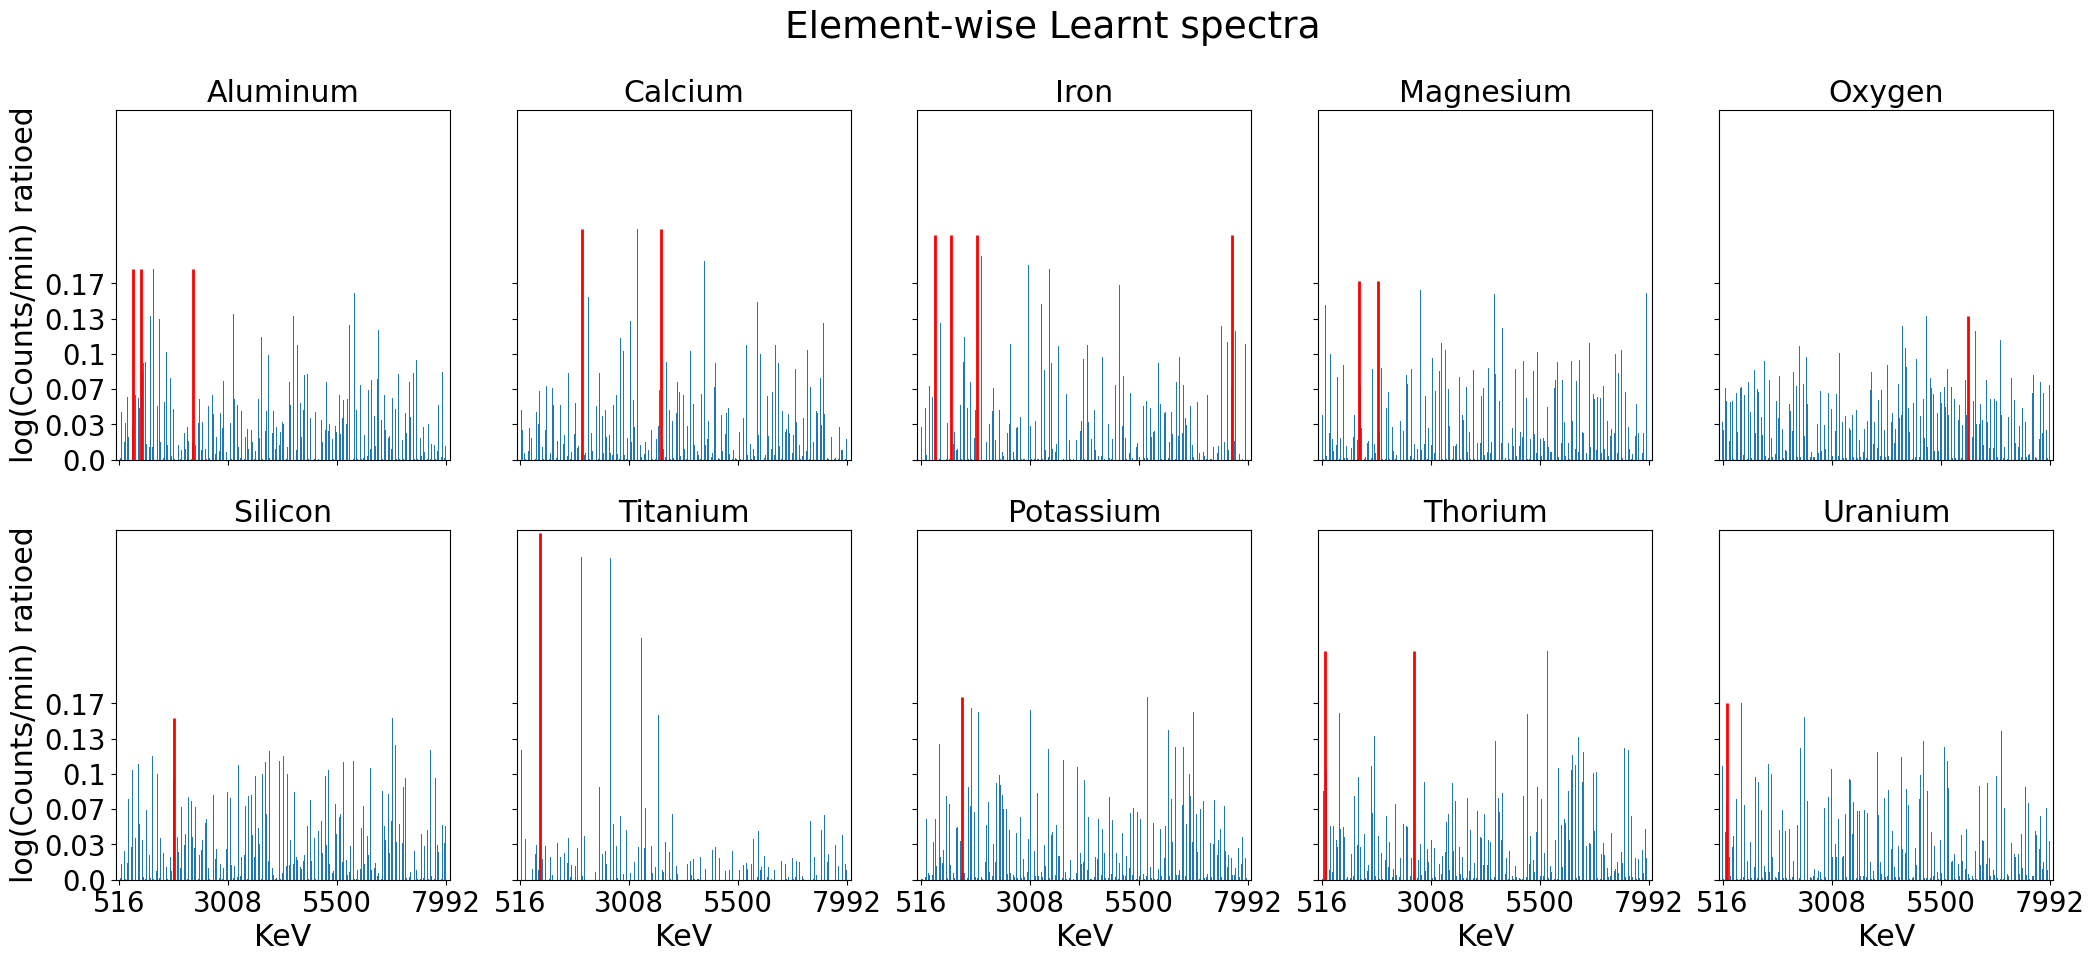

In [75]:
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=True)


#iterate through all the elements
for i in range(len(allElementNames)):

    #get the name of the current element
    currentElementName=allElementNames[i]

    #get the mean spectrum for the current element
    currentElementSpectrum=foldWiseLearntElementalSpectra[:,i,j]

    #plot the peak postions
    if len(elementalPeaks[currentElementName])>0:
        axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                              ymin=0,
                              ymax=np.amax(currentElementSpectrum),
                              colors='red',
                              lw=2)
        #add the position of the peaks as text
        #for currentPeakPositon in elementalPeaks[currentElementName]:
            #axes[i//5,i%5].text(x=currentPeakPositon,
            #                    y=np.amax(currentElementSpectrum)+0.0001,
            #                    s=str(currentPeakPositon),
            #                    fontsize=baseFontSize*1)
    
    
    #plot the spectrum
    axes[i//5,i%5].bar(relaventEnergyBands,
                       currentElementSpectrum,
                       lw=10,
                       width=10)
    
    
    
    #add the title
    axes[i//5,i%5].set_title(currentElementName,
                             fontsize=baseFontSize*1.2)

    #set the margin
    axes[i//5,i%5].margins(0.01)

    #add xticks and label
    if i//5==1:
        axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                  labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                                  0).astype('int'),
                                  fontsize=baseFontSize*1.1)
        axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

    #add yticks and label
    if i%5==0:
        axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

    axes[i//5,i%5].set_yticks(np.arange(0,
                                np.amax(foldWiseLearntElementalSpectra[:,i,j])+np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks,
                                np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks),
                      labels=np.round(np.arange(0,
                                                np.amax(foldWiseLearntElementalSpectra[:,i,j])+np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks,
                                                np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks),
                                      2),
                      fontsize=baseFontSize*1.1)
#add a title
figure.suptitle(f"Element-wise Learnt spectra",
                fontsize=baseFontSize*1.5)

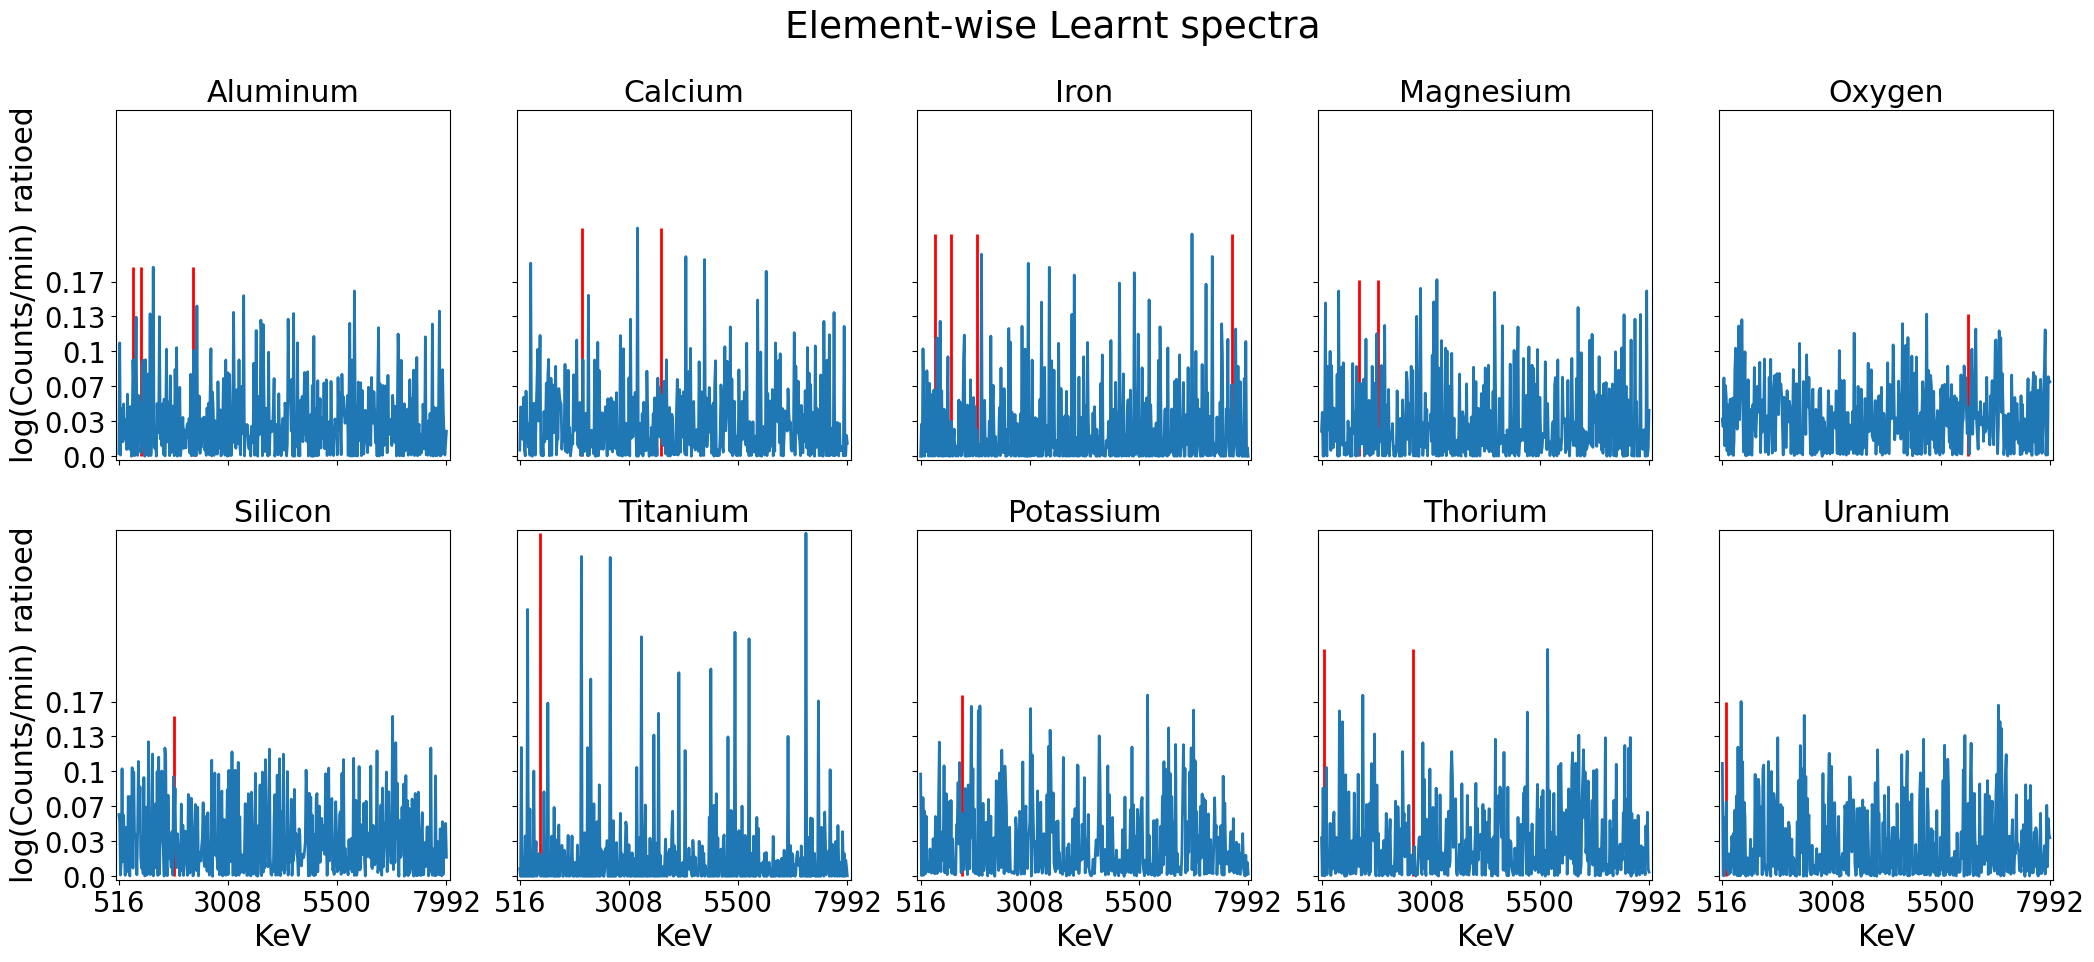

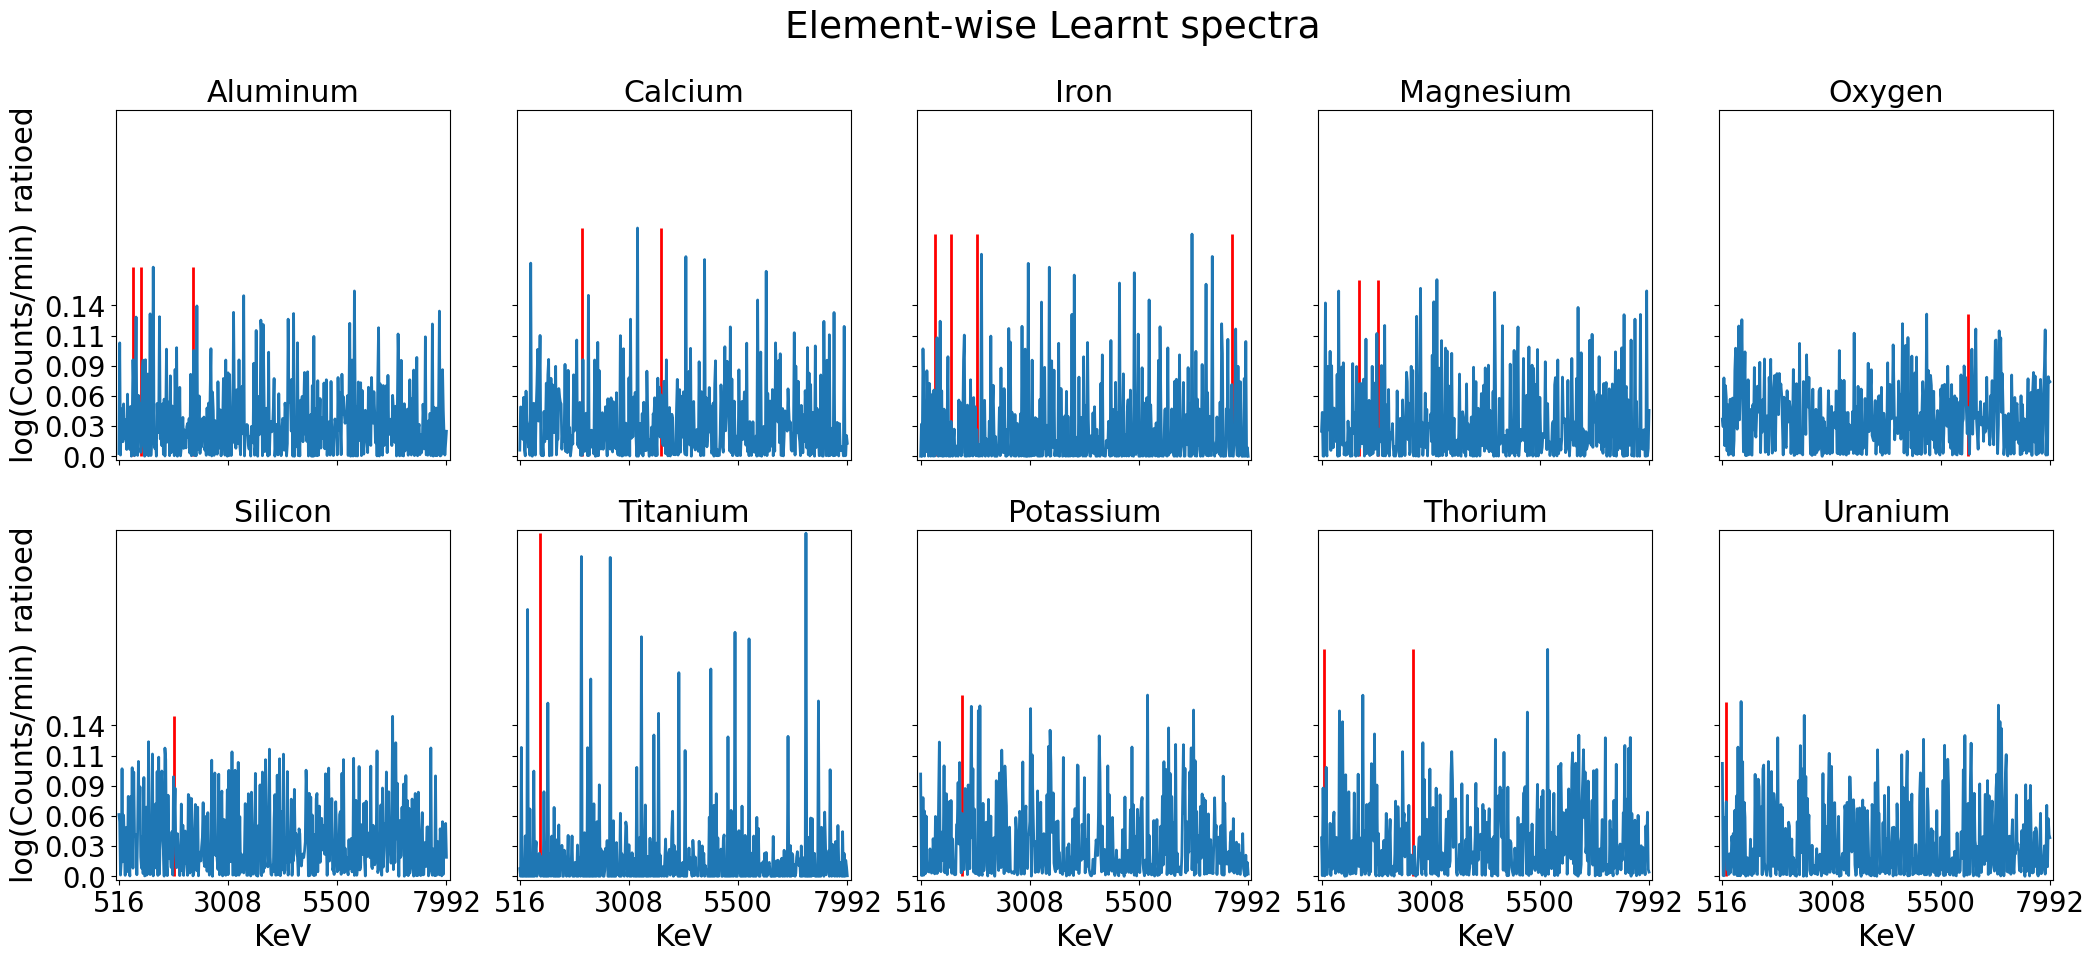

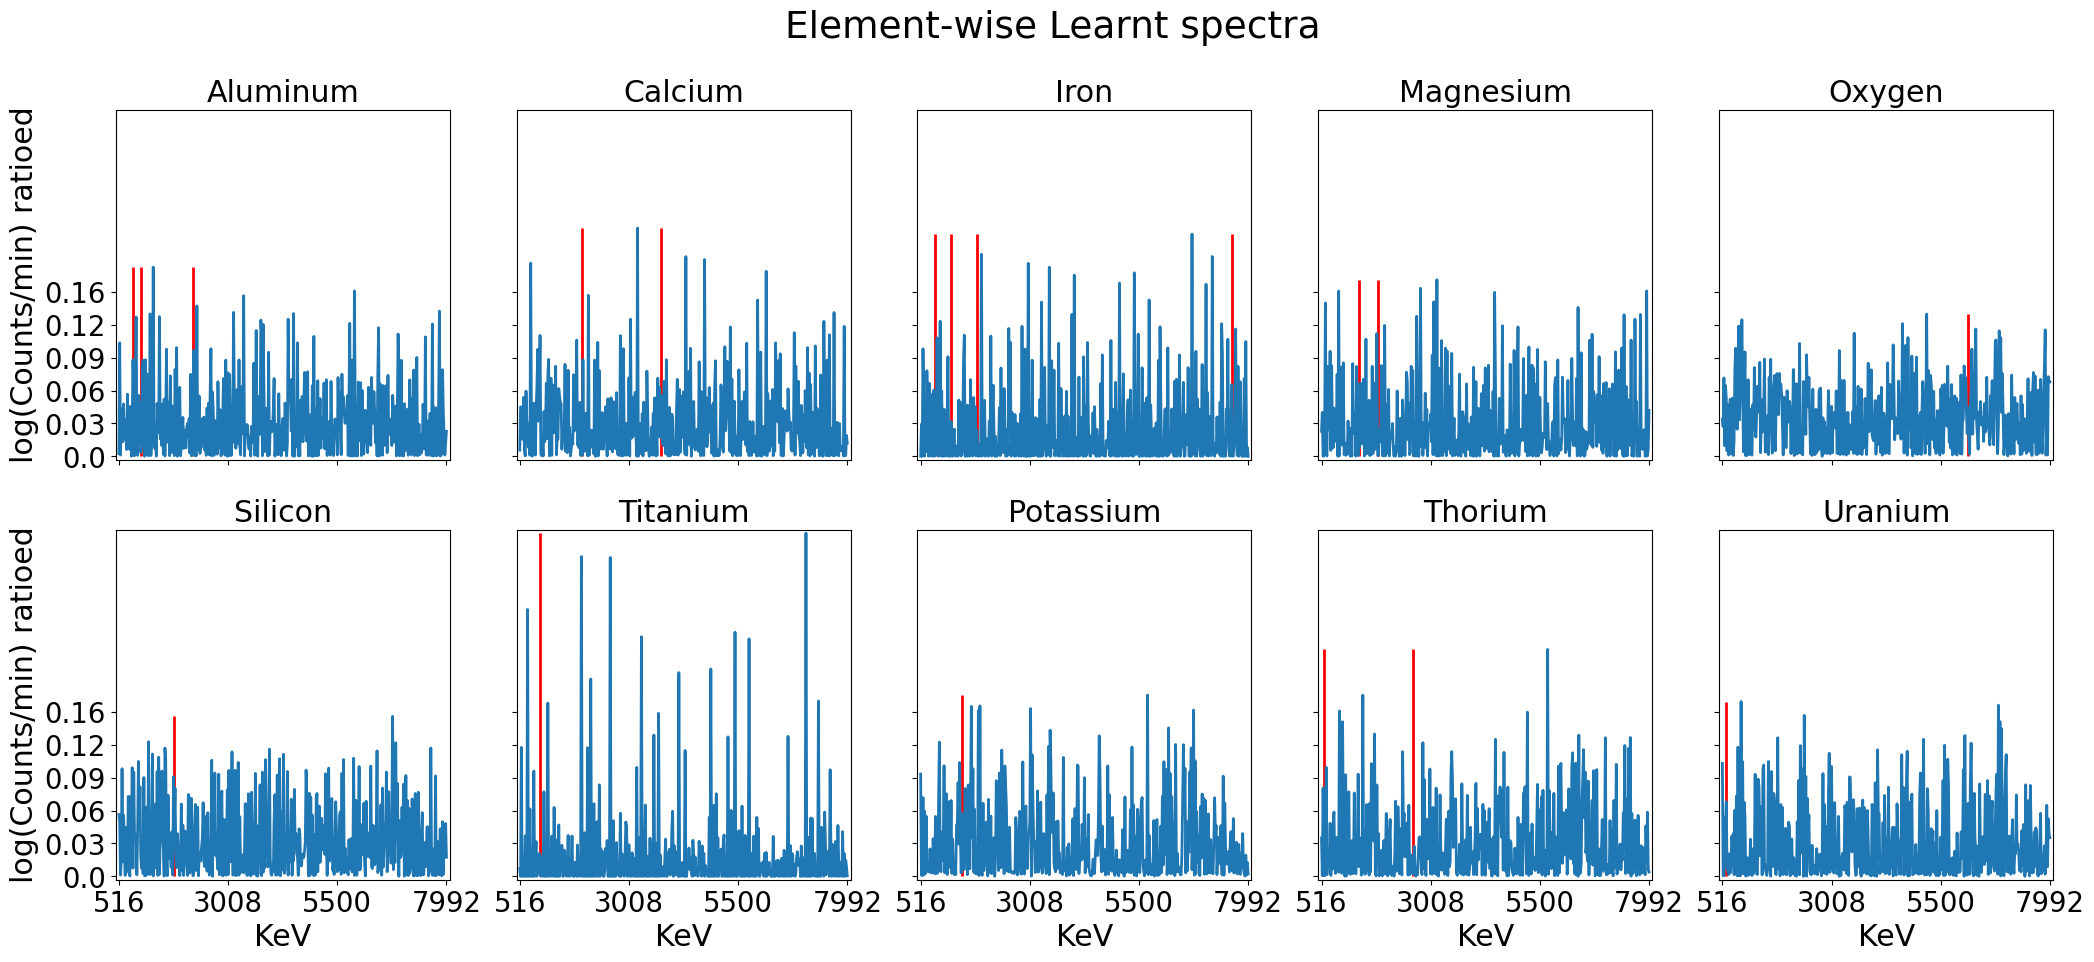

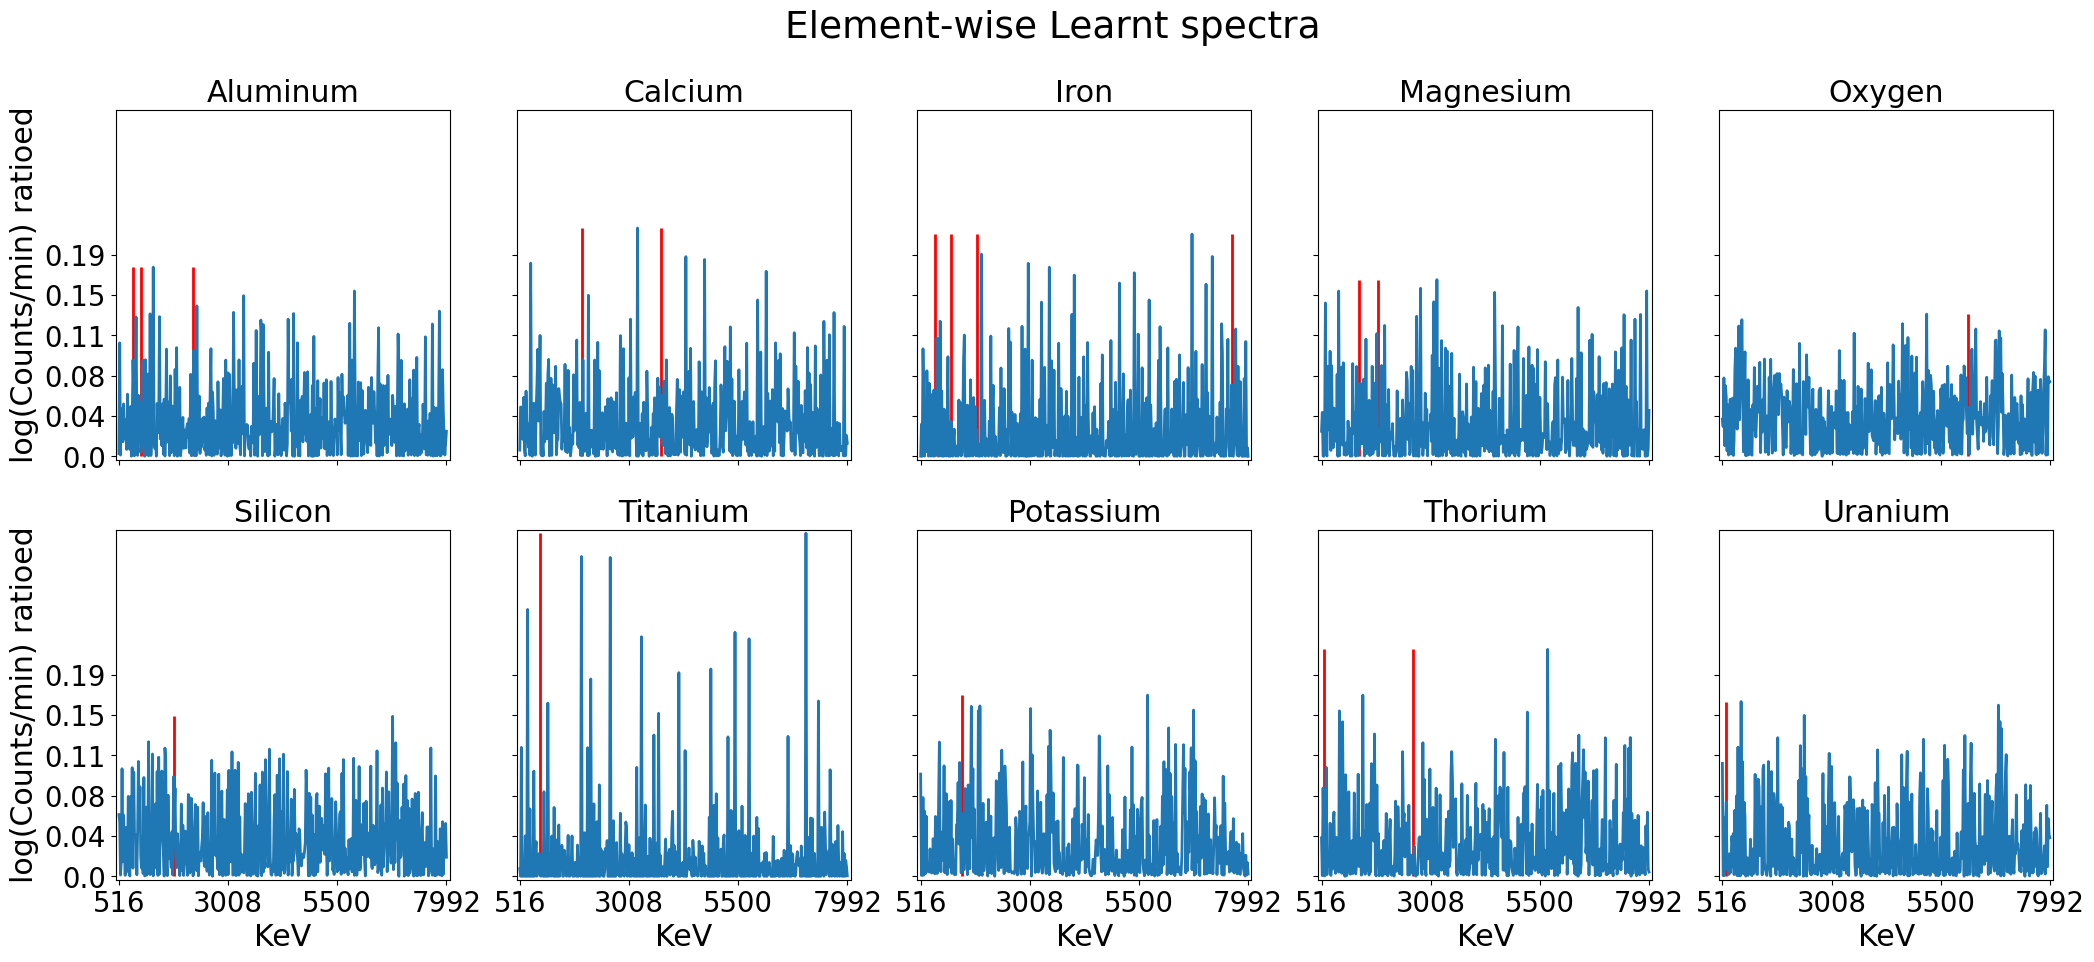

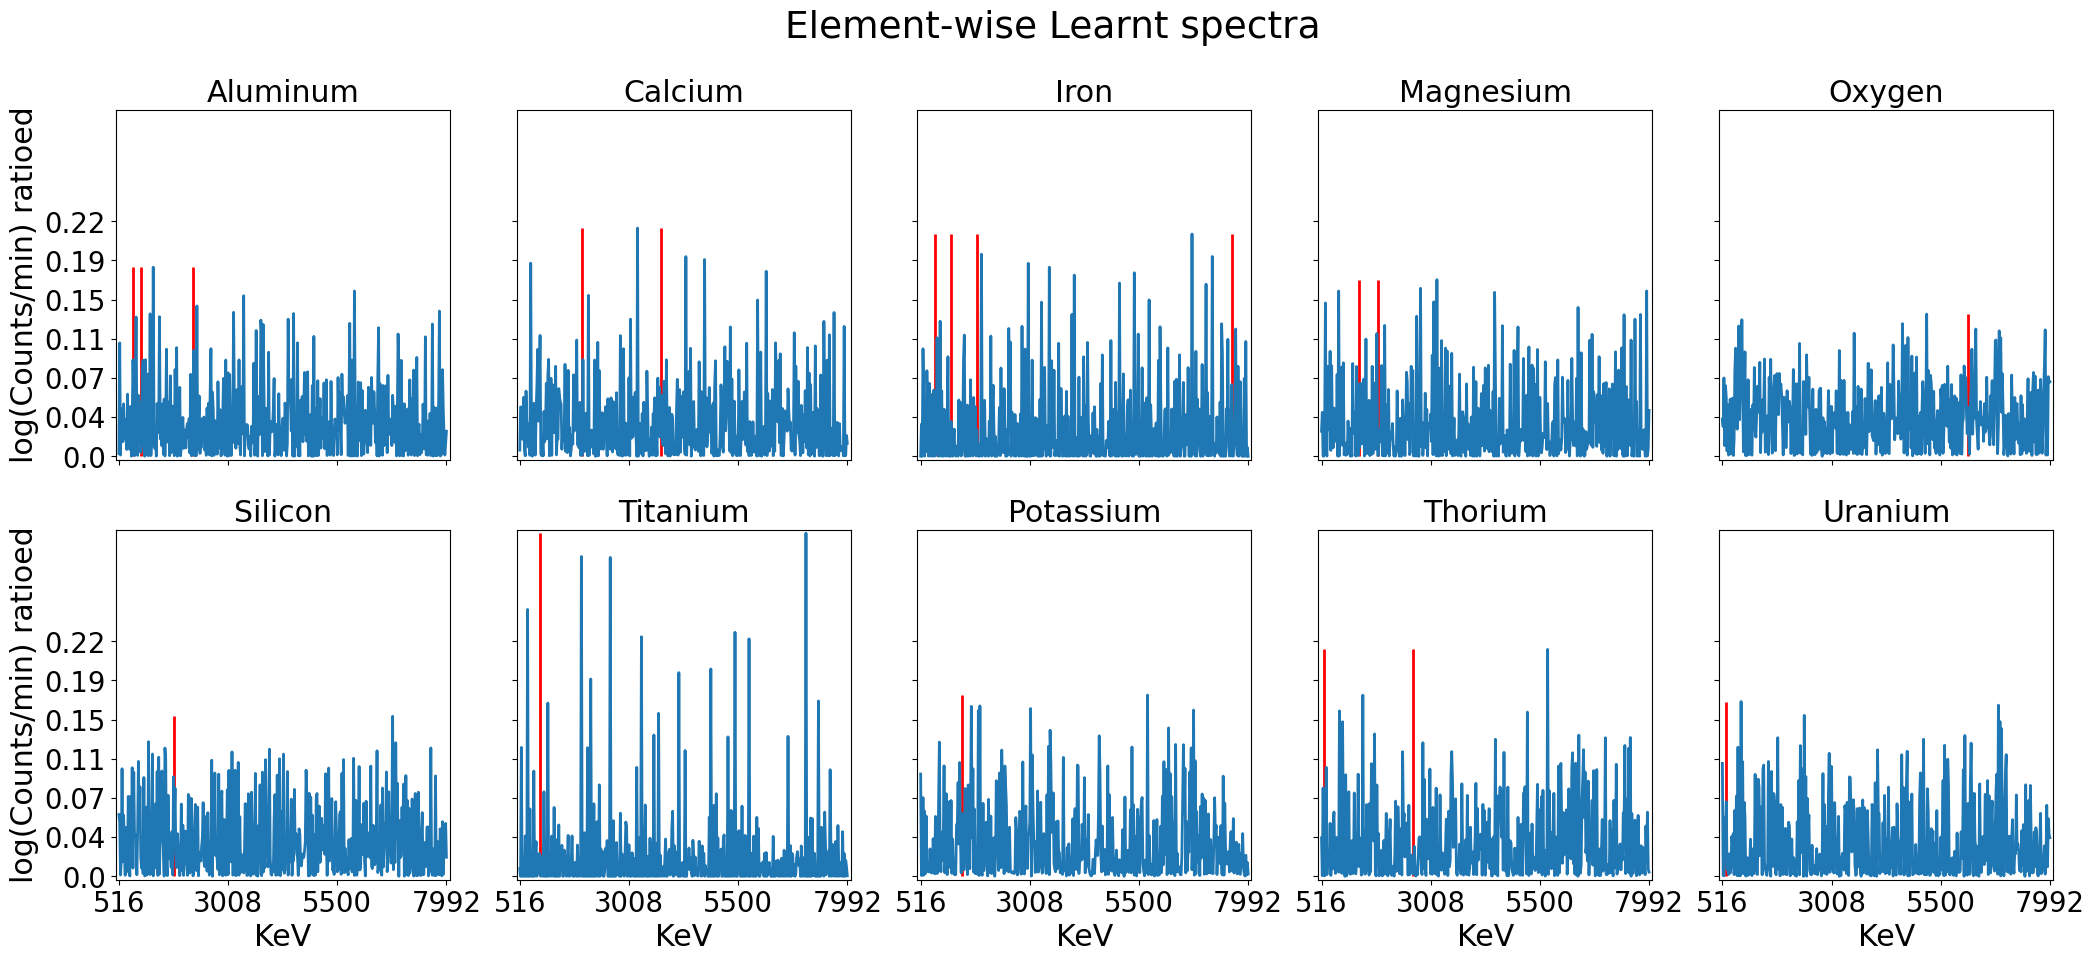

In [77]:
for j in range(5):
    #create a figure 
    figure,axes=plt.subplots(nrows=2,
                             ncols=5,
                             figsize=(5*5,5*2),
                             dpi=100,
                             sharex=True,
                             sharey=True)


    #iterate through all the elements
    for i in range(len(allElementNames)):

        #get the name of the current element
        currentElementName=allElementNames[i]

        #get the mean spectrum for the current element
        currentElementSpectrum=foldWiseLearntElementalSpectra[:,i,0]

        #plot the peak postions
        if len(elementalPeaks[currentElementName])>0:
            axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                                  ymin=0,
                                  ymax=np.amax(currentElementSpectrum),
                                  colors='red',
                                  lw=2)
            #add the position of the peaks as text
            #for currentPeakPositon in elementalPeaks[currentElementName]:
                #axes[i//5,i%5].text(x=currentPeakPositon,
                #                    y=np.amax(currentElementSpectrum)+0.0001,
                #                    s=str(currentPeakPositon),
                #                    fontsize=baseFontSize*1)



        #plot the spectrum
        axes[i//5,i%5].plot(relaventEnergyBands,
                            currentElementSpectrum,
                            lw=2)


        #add the title
        axes[i//5,i%5].set_title(currentElementName,
                                 fontsize=baseFontSize*1.2)

        #set the margin
        axes[i//5,i%5].margins(0.01)

        #add xticks and label
        if i//5==1:
            axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                                np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                np.ptp(relaventEnergyBands)/noOfXticks),
                                      labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                                np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                                np.ptp(relaventEnergyBands)/noOfXticks),
                                                      0).astype('int'),
                                      fontsize=baseFontSize*1.1)
            axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

        #add yticks and label
        if i%5==0:
            axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

        axes[i//5,i%5].set_yticks(np.arange(0,
                                    np.amax(foldWiseLearntElementalSpectra[:,i,j])+np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks,
                                    np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks),
                          labels=np.round(np.arange(0,
                                                    np.amax(foldWiseLearntElementalSpectra[:,i,j])+np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks,
                                                    np.ptp(foldWiseLearntElementalSpectra[:,i,j])/noOfYticks),
                                          2),
                          fontsize=baseFontSize*1.1)
    #add a title
    figure.suptitle(f"Element-wise Learnt spectra",
                    fontsize=baseFontSize*1.5)

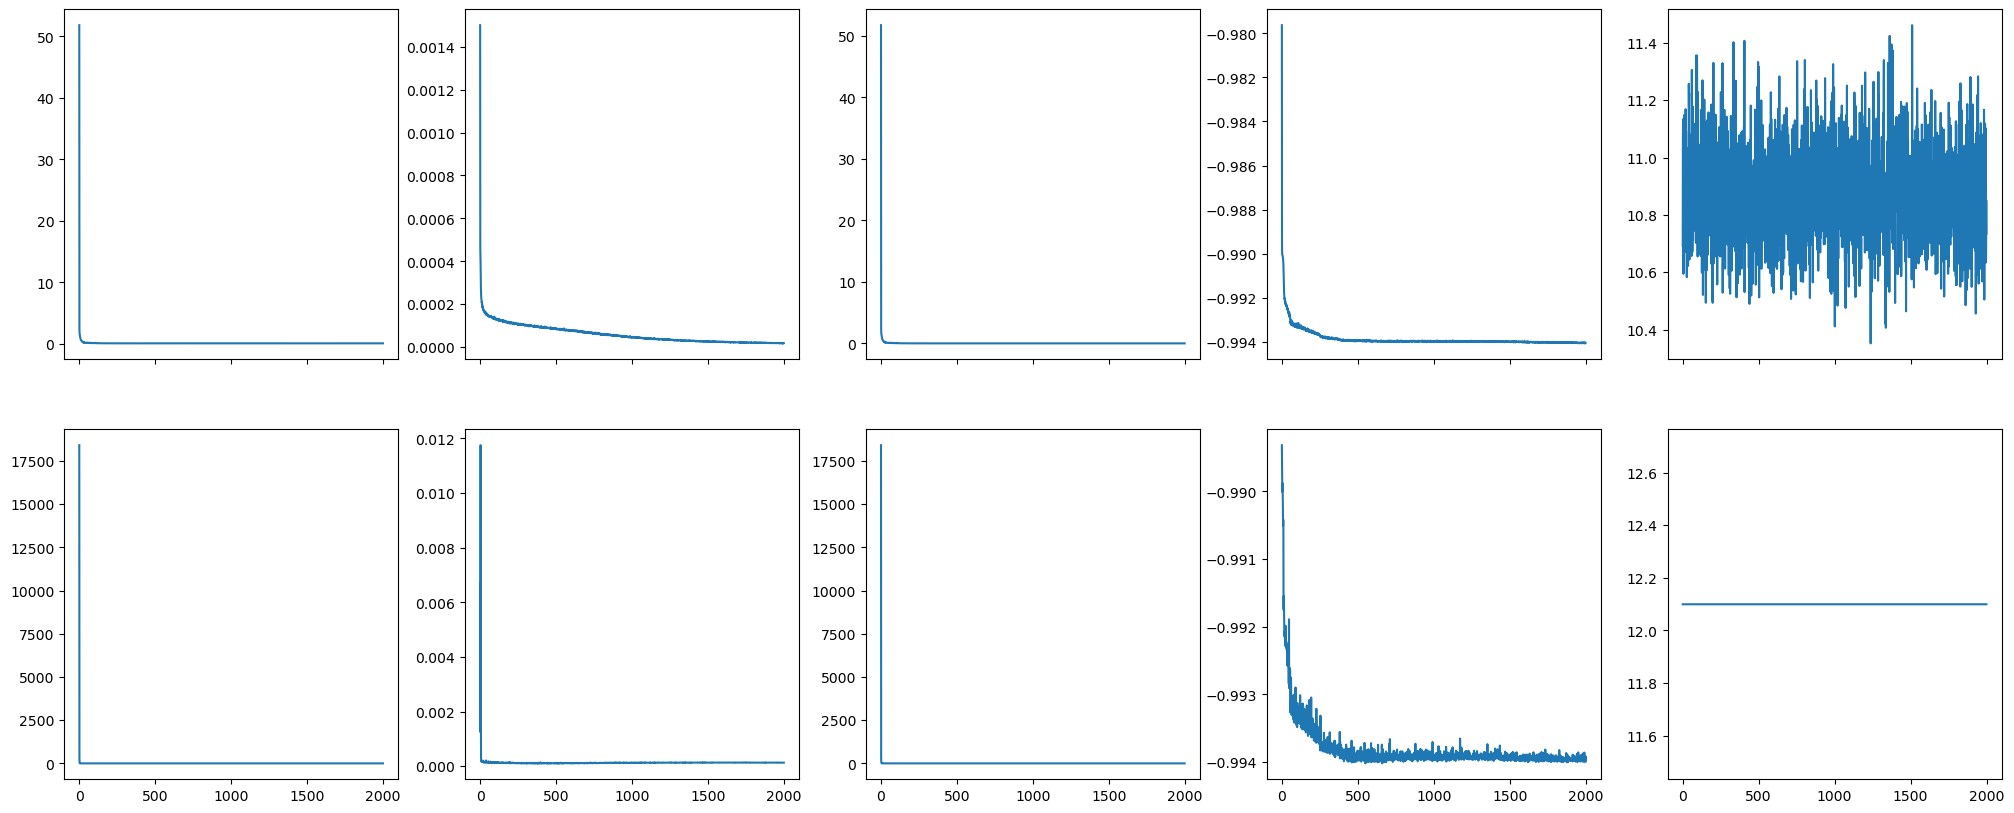

In [78]:
#get the history for the current fold
currentHistory=modelTrainingHistories[j].history
#create a figure
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=False)
#create an array to hold names of losses
lossNames=["Total","Regular Element","Nuclear Elements","Reconstruction","Regularization"]
#iterate through the history
for key,i in zip(currentHistory,range(len(currentHistory))):
    #check if the loss is for training or validation
    if i//5==0:
        #get the name for the current loss
        title="Training_"+lossNames[i%5]
    else:
        #get the name for the current loss
        title="Testing_"+lossNames[i%5]
    #plot the loss
    axes[i//5,i%5].plot(np.arange(len(currentHistory[key])),
                        currentHistory[key])
    

In [92]:
#create an array to hold correlation between elemental abundances
correlationBetweenAbundances=np.zeros((10,5))

In [115]:
#normalize the spectra
reconstructedPreProcessedSpectra=reconstructedPreProcessedSpectra/np.linalg.norm(reconstructedPreProcessedSpectra,
                                                                                 axis=-1,
                                                                                 keepdims=True)

In [116]:
#import PCA from sklearn
from sklearn.decomposition import PCA
#import cosine distance from scipy
from scipy.spatial.distance import cosine as cosineDistance

#define a function which given an array of spectra, explained-variance ratio, and no of spectra to be selected
#returns the indices of most interesting (most unlike the others) spectra
def extractMostExtremeSpectraWithDEMUD(spectra,varianceToExplain,noOfSpectraToRetrive):
    #create an array to hold the indices of the selected (interesting) super-pixels
    selectedSpectraIndices=[]
    #create a PCA object which explains over 95% of the variance in the data
    pcaObject=PCA(n_components=varianceToExplain,
                  svd_solver='auto')
    #compute the PCA model for the spectra and use it to reconstruct the orginal spectra
    reconstructedSpectra=pcaObject.inverse_transform(pcaObject.fit_transform(spectra))
    #create an array to save the reconstruction error (cosine distance)
    reconstructionErrors=np.full(spectra.shape[0],
                                 np.nan)
    #compute the cosine distance between the orginal and reconstructed spectra
    for i in range(spectra.shape[0]):
        reconstructionErrors[i]=cosineDistance(spectra[i,:],
                                               reconstructedSpectra[i,:])
    #save the index of the spectra with the greatest error
    selectedSpectraIndices.append(np.argmax(reconstructionErrors))

    #iteratively extract the most dissimar spectra
    for i in range(noOfSpectraToRetrive-1):
        #fit PCA to the selected spectra
        pcaObject.fit(spectra[selectedSpectraIndices,:])
        #apply PCA and then reconstruct the spectra
        reconstructedSpectra=pcaObject.inverse_transform(pcaObject.transform(spectra))
        #create an array to save the reconstruction error (cosine distance)
        reconstructionErrors=np.full(spectra.shape[0],np.nan)
        #compute the cosine distance between the orginal and reconstructed spectra
        for i in range(spectra.shape[0]):
            reconstructionErrors[i]=cosineDistance(spectra[i,:],
                                                   reconstructedSpectra[i,:])
        #remove the error of the selected pixels
        reconstructionErrors=np.delete(reconstructionErrors,
                                       selectedSpectraIndices)
        #get the index of the spectra with the greatest error
        selectedSpectraIndices.append(np.delete(np.arange(0,spectra.shape[0],1),
                                                selectedSpectraIndices,axis=0)[np.argmax(reconstructionErrors)])
        
    return selectedSpectraIndices

Processing fold no. 0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


Processing fold no. 1


C:\ProgramData\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


Processing fold no. 2


C:\ProgramData\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


Processing fold no. 3


C:\ProgramData\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


Processing fold no. 4


C:\ProgramData\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


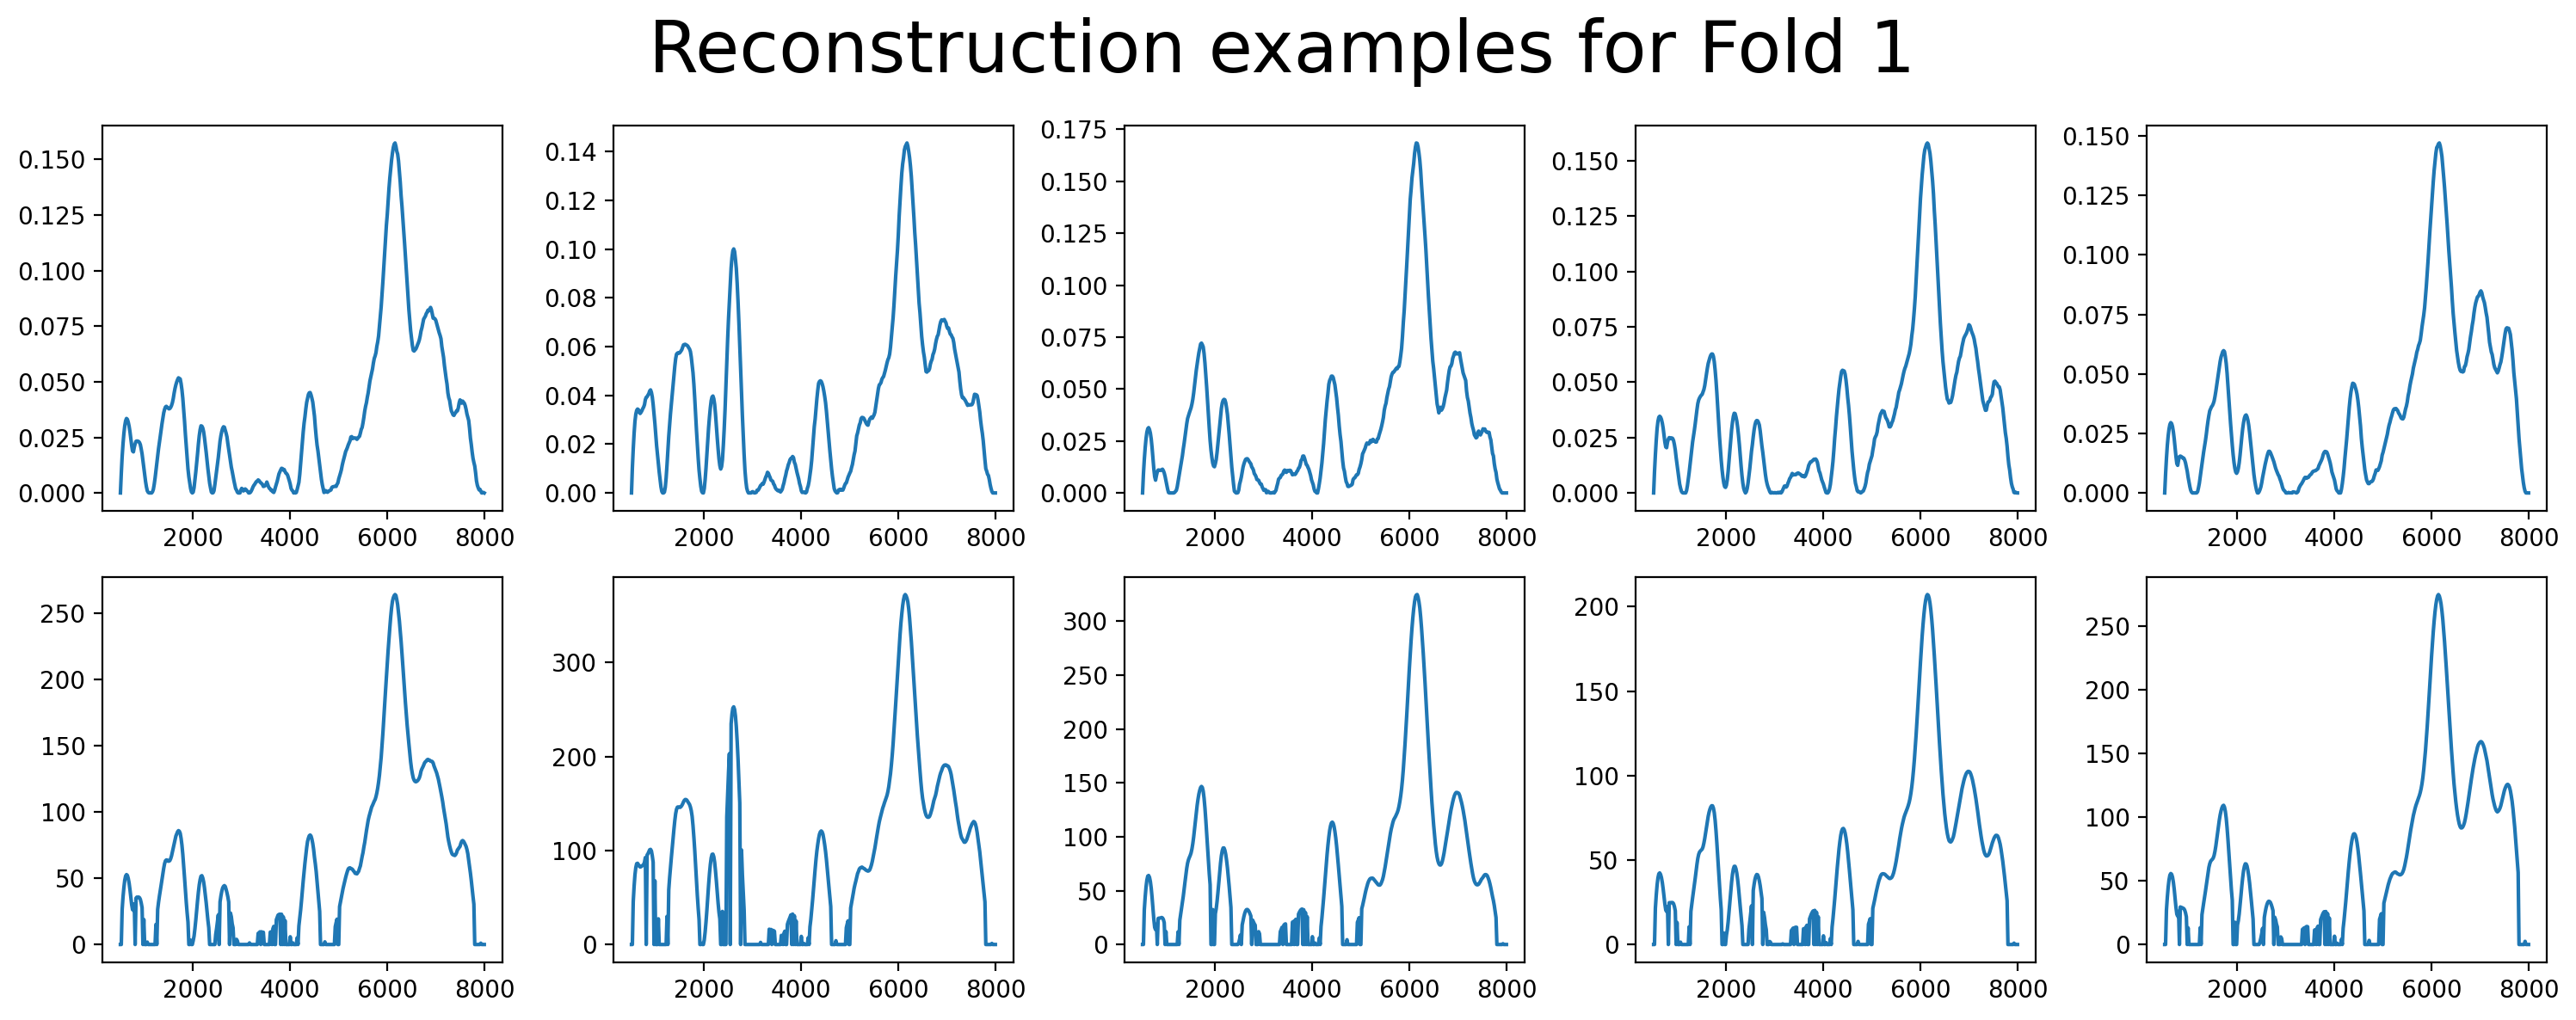

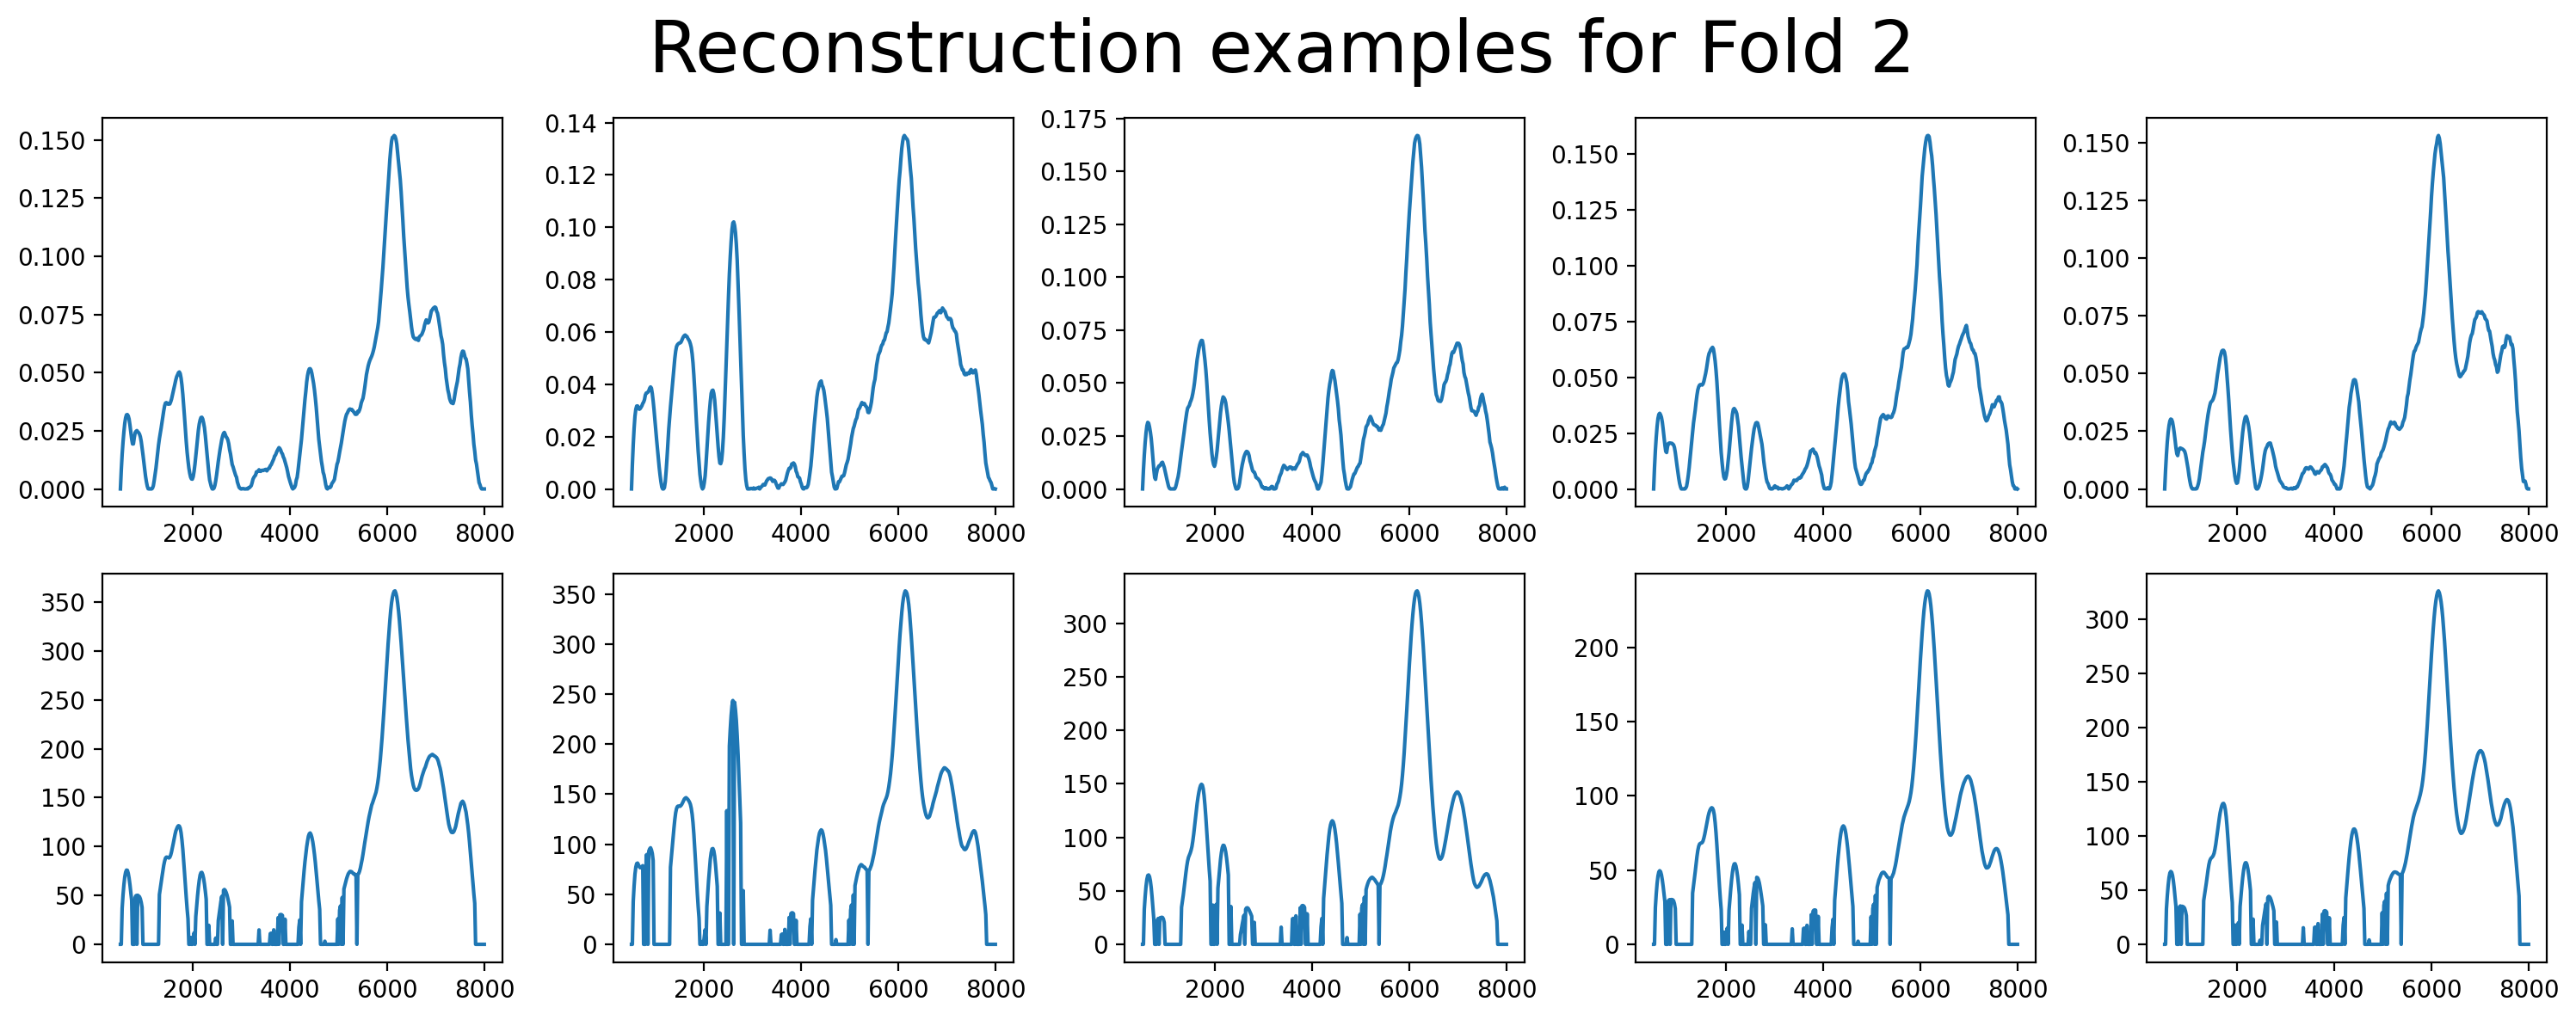

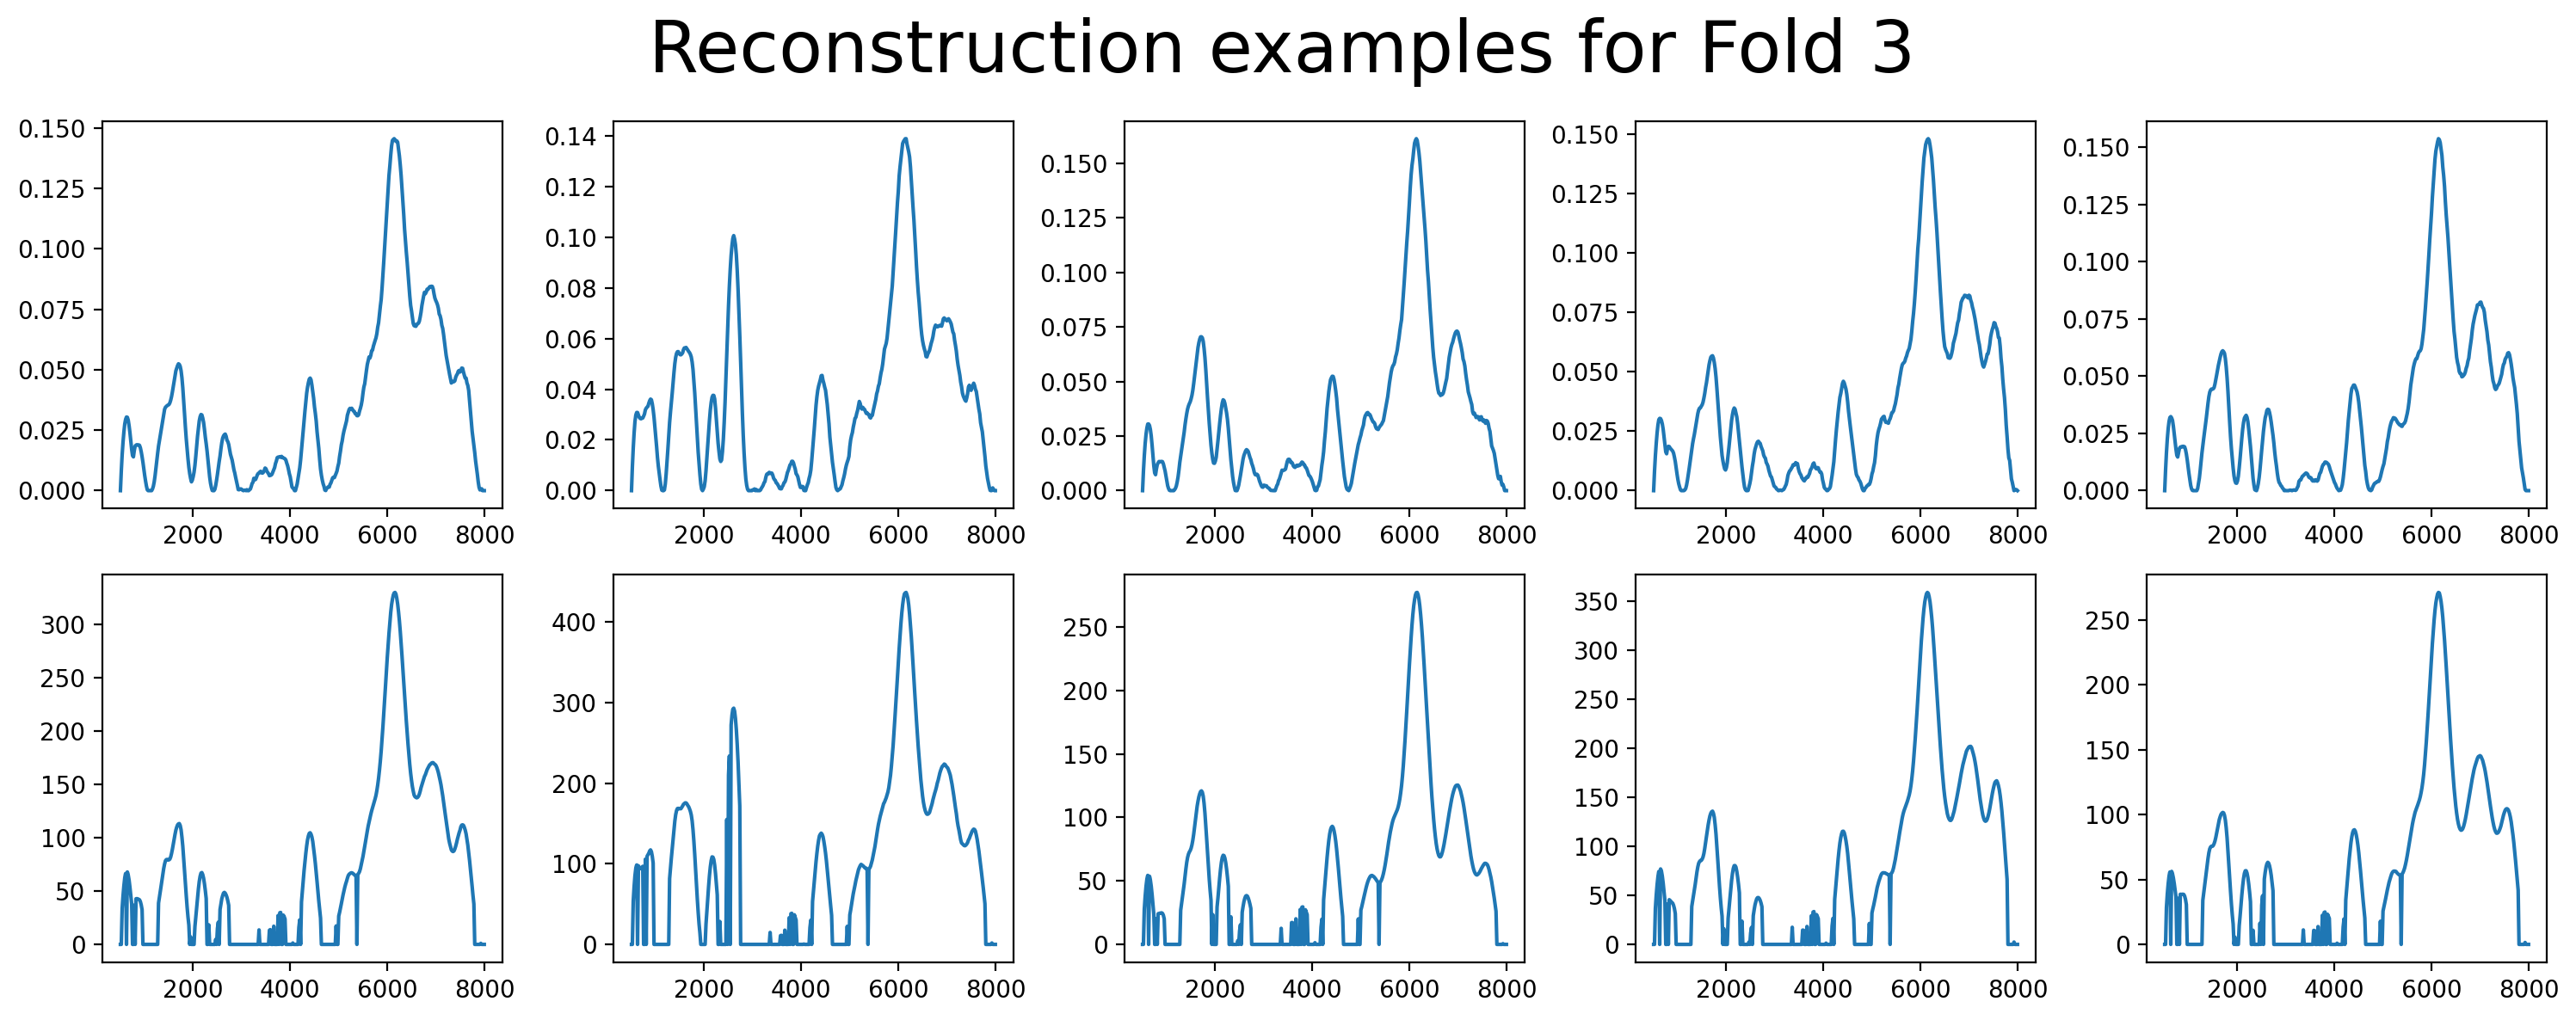

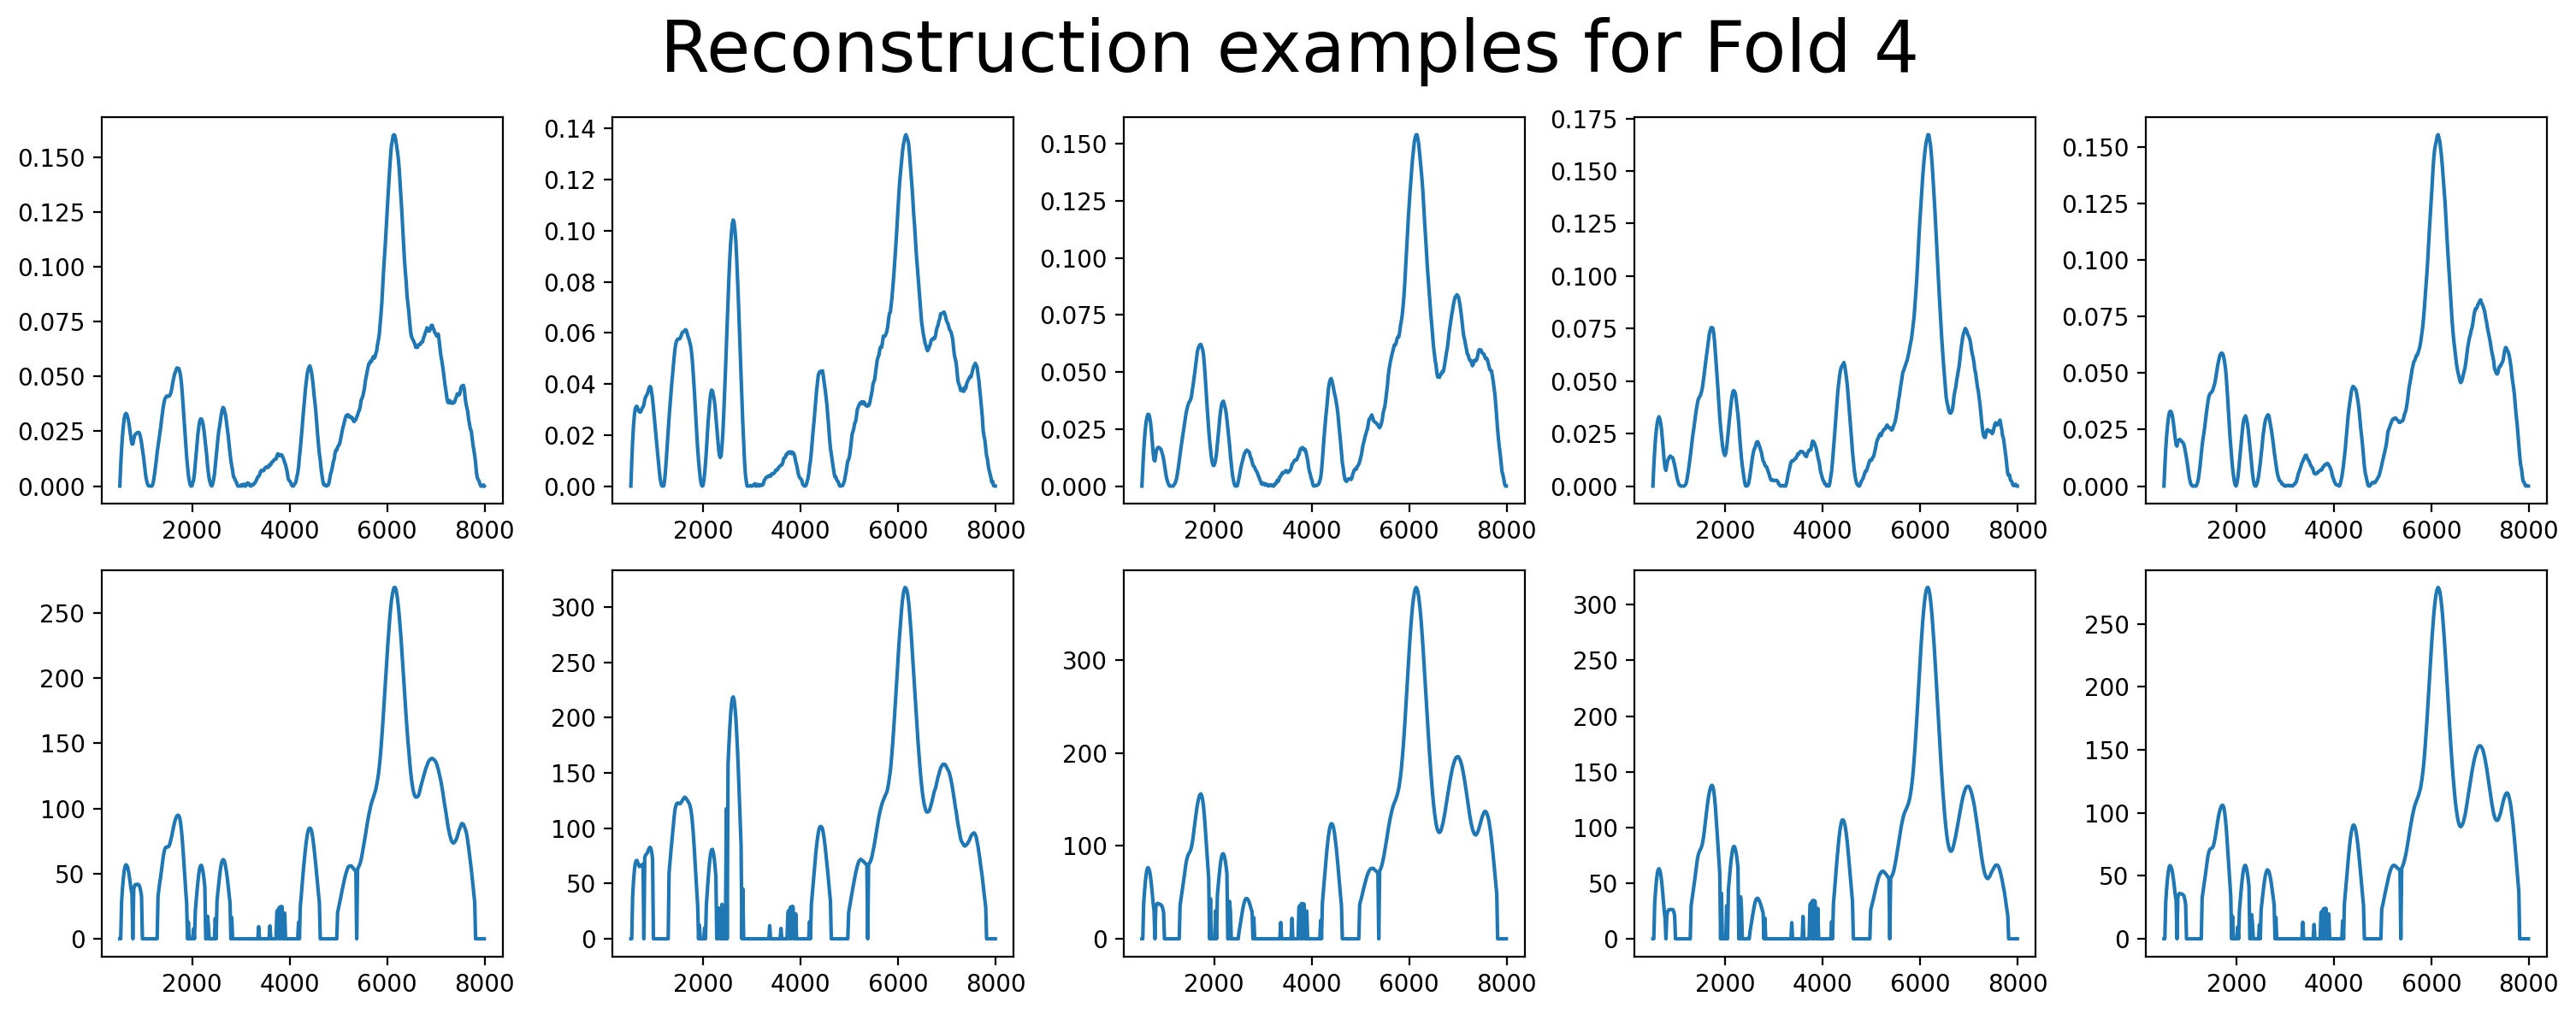

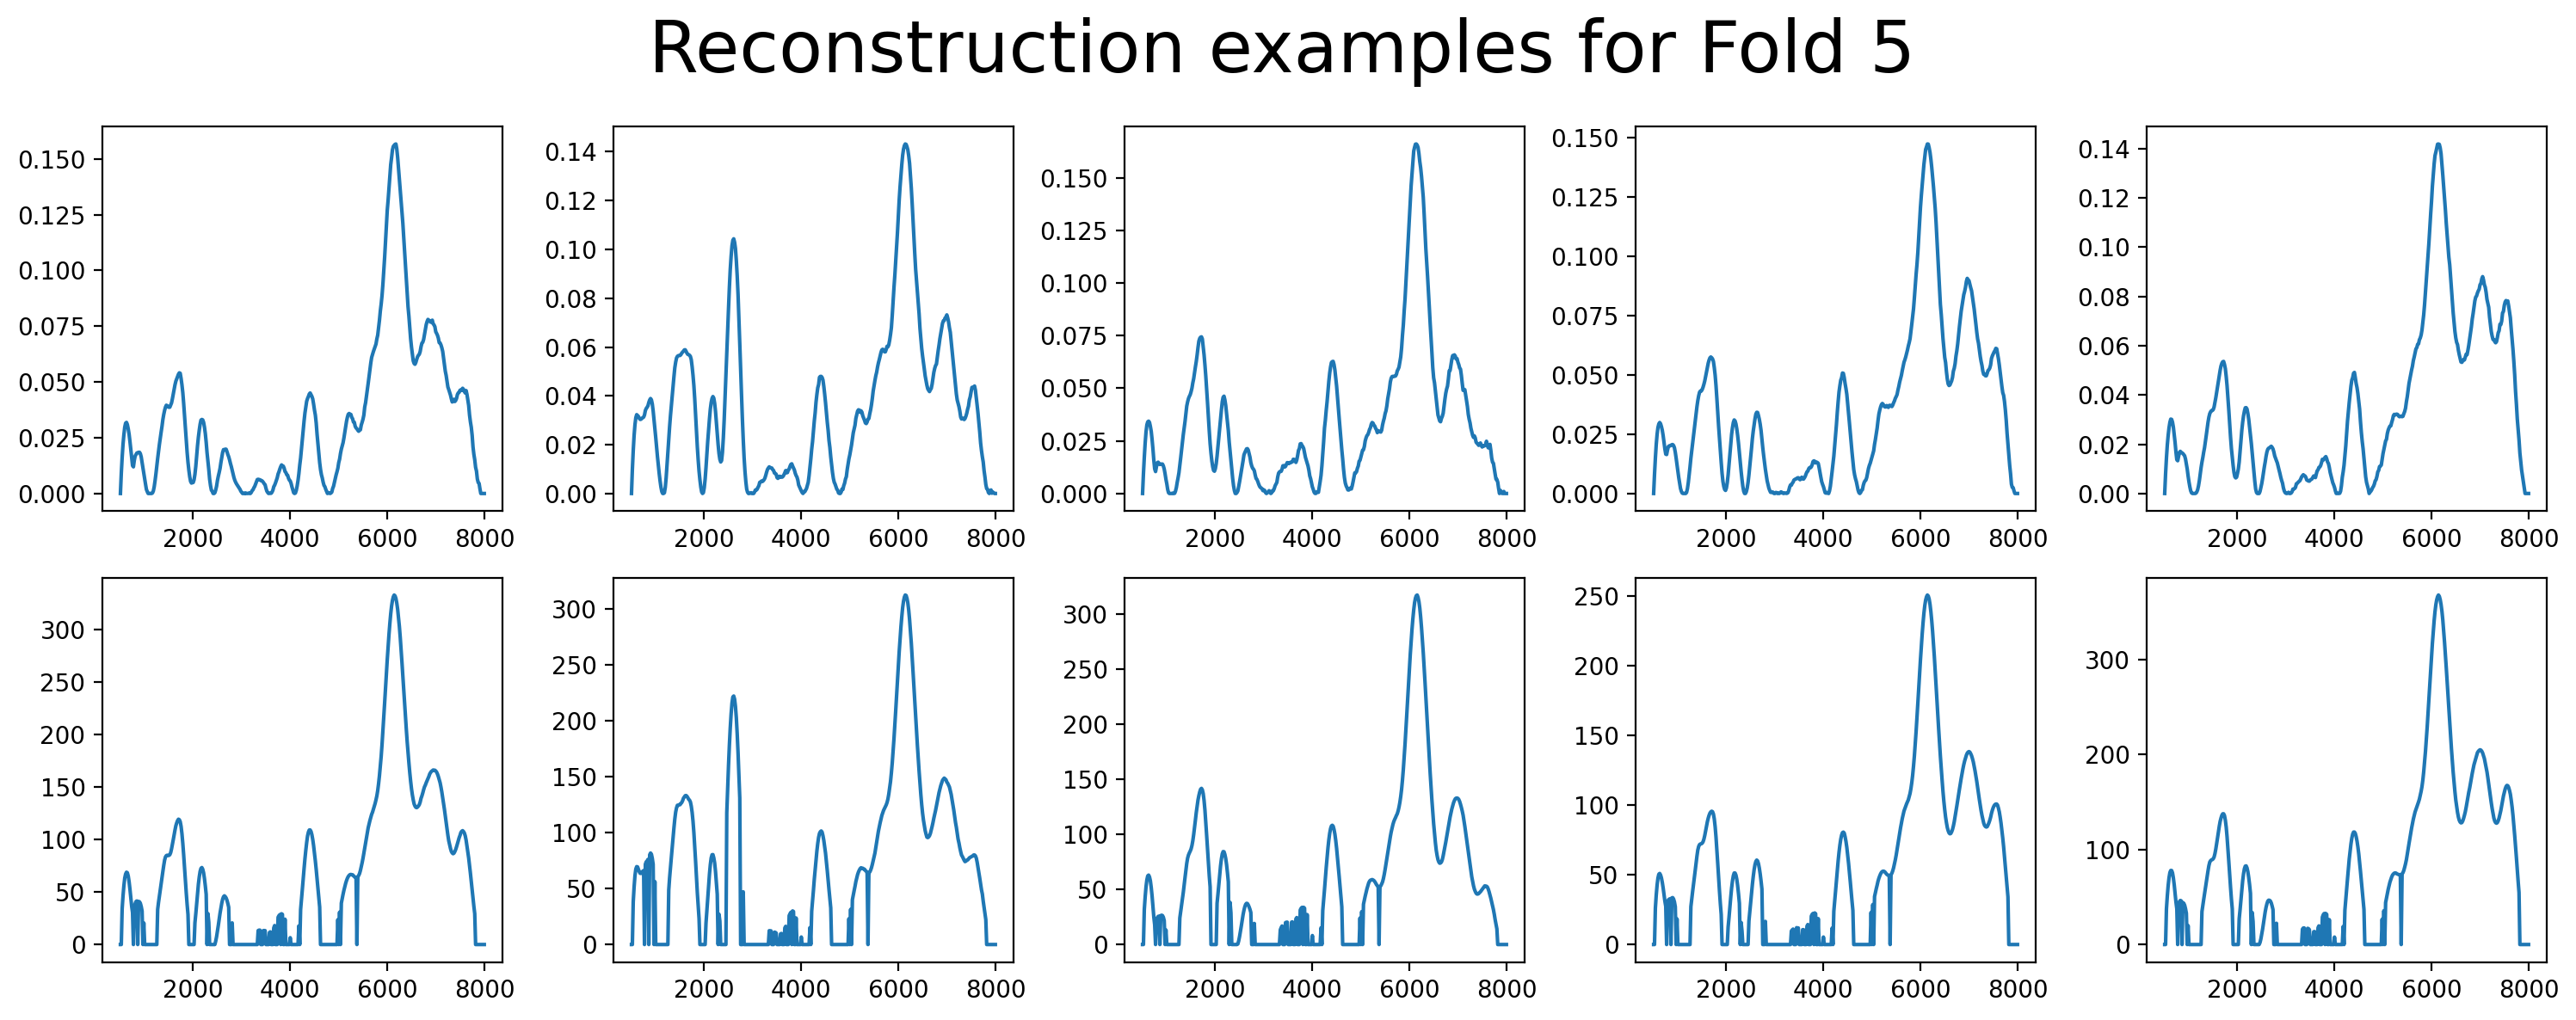

In [125]:

#create a figure


#iterate through the folds
for j,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):
    #print the number of the fold
    print(f"Processing fold no. {j}")
    
    #get the actual values for the test data in the current fold
    ogRegularAbundances=regularElementalAbundances[testingIndices,:]
    ogNuclearAbundances=nuclearElementalAbundances[testingIndices,:]
    ogPreProcessedSpectra=preprocessedSpectra[testingIndices,:]
    #get the predicted values for the test data in the current fold
    predictedRegularAbundances=foldWisePredictedRegularAbundances[testingIndices,:]
    predictedNuclearAbundances=foldWisePredictedNuclearAbundaces[testingIndices,:]
    reconstructedPreProcessedSpectra=foldWiseReconstructedSpectra[testingIndices,:]
    
    #iterate through the regular elements
    for i in range(ogRegularAbundances.shape[1]):
        correlationBetweenAbundances[i,j]=np.corrcoef(ogRegularAbundances[:,i],predictedRegularAbundances[:,i])[0,1]
    
    #iterate through the nuclear elements
    for i in range(ogNuclearAbundances.shape[1]):
        correlationBetweenAbundances[i+ogRegularAbundances.shape[1],j]=np.corrcoef(ogNuclearAbundances[:,i],predictedNuclearAbundances[:,i])[0,1]
    
    #get indices of the most extreme spectra
    extremeIndices=extractMostExtremeSpectraWithDEMUD(reconstructedPreProcessedSpectra,
                                                      varianceToExplain=0.98,
                                                      noOfSpectraToRetrive=5)
    
    
    #create a figure 
    figure,axes=plt.subplots(nrows=2,
                             ncols=5,
                             figsize=(15,6),
                             dpi=200)
    #plot the most extreme original spectra
    for i in range(len(extremeIndices)):
        axes[0,i].plot(relaventEnergyBands,
                       ogPreProcessedSpectra[extremeIndices[i],:])
    
    #plot the reconstructed versions of the extreme spectra
    for i in range(len(extremeIndices)):
        axes[1,i].plot(relaventEnergyBands,
                       reconstructedPreProcessedSpectra[extremeIndices[i],:])
        
    
    figure.suptitle(f"Reconstruction examples for Fold {j+1}",
                    fontsize=30)
    plt.tight_layout()

In [126]:

for i in range(len(regularElementNames)):
    print(f"{regularElementNames[i]}\t---\t{round(np.mean(correlationBetweenAbundances[i,:]),2)}\t---\t{round(np.std(correlationBetweenAbundances[i,:]),2)}")
for i in range(len(nuclearElementNames)):
    print(f"{nuclearElementNames[i]}\t---\t{round(np.mean(correlationBetweenAbundances[i+7,:]),2)}\t---\t{round(np.std(correlationBetweenAbundances[i+7,:]),2)}")

print("\n\n")

Aluminum	---	0.79	---	0.02
Calcium	---	0.68	---	0.02
Iron	---	0.96	---	0.0
Magnesium	---	0.86	---	0.01
Oxygen	---	0.86	---	0.01
Silicon	---	0.83	---	0.01
Titanium	---	0.94	---	0.01
Potassium	---	0.98	---	0.0
Thorium	---	0.99	---	0.0
Uranium	---	0.98	---	0.0



